# Introduction

This work is a part of my application process for the Senior Data Scientist role at 1BStories.

## Objective

Our primary goal is to develop a model that efficiently identifies usable space within a social media safezone for a 9:16 aspect ratio vertical video. This space must not intersect with any facial regions in a video, ensuring that any added text or graphics do not obstruct viewers' faces. This capability is crucial for creating engaging and professional content that respects the viewer's experience.

## Scoring Criteria

The solution presented in this notebook has been rigorously tested for correctness, processing speed, and flexibility to cater to the 9:16 and horizontal 16:9 video format.

## Assumptions

The following table outlines the assumptions made during the development of this model. These are critical for understanding the scope and limitations of the solution provided.

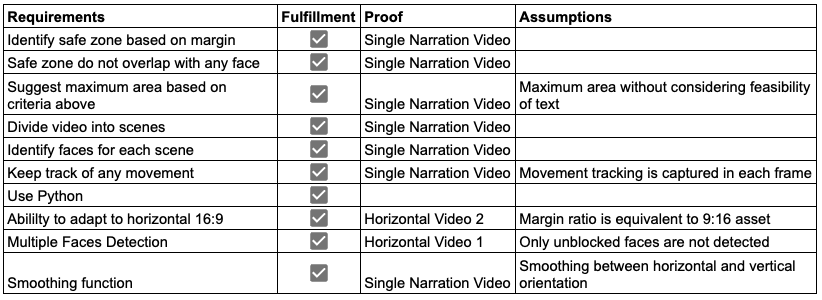

Links to video (with facial boundaries):
- [Single Narration Video using Dlib CNN](https://drive.google.com/file/d/1bnyWP-D5bfEgsiLaR8wo7nFFElpYyiO8/view?usp=sharing) - very slow
- [Single Narration Video using DNN with Caffe Framework](https://drive.google.com/file/d/1VCdK9ZDho680DSBTUawthWMN5ykrpJ9i/view?usp=sharing) - quick
- [Horizontal Video 1](https://drive.google.com/file/d/1qDaF3rSW7vFVYUdmidumnOCC8UDileea/view?usp=sharing)
- [Horizontal Video 2](https://drive.google.com/file/d/1sLsFpVaW7KG16qj4a9s5zwtwbYcwYHt5/view?usp=sharing)

Links to video (without facial boundaries):
- [Single Narration Video using DNN with Caffe Framework](https://drive.google.com/file/d/1no5twOpIAWgzEkQ_b1Srv1-DDz6weJ8V/view?usp=sharing)
- [Horizontal Video 1](https://drive.google.com/file/d/1p7bv7j1oj8cJTfE5spYBDUoNPysZmHSe/view?usp=sharing)
- [Horizontal Video 2](https://drive.google.com/file/d/1BG9dk8Dx7ej6Qpb5m9T4--uCvu3fhBRY/view?usp=sharing)

Links to video (original videos):
- [Single Narration Video using DNN with Caffe Framework](https://drive.google.com/file/d/1xr295GsVl4ScIMZvHgfn1PnCf9XpfPnj/view?usp=sharing)
- [Horizontal Video 1](https://drive.google.com/file/d/1Z1aic1b1Degghs7D1lFz2BPtn1OvP0rS/view?usp=sharing)
- [Horizontal Video 2](https://drive.google.com/file/d/1LhLHuvWEa2yV03RcyEzb4__WZnzQkvdY/view?usp=sharing)

## Solution Strategy

In addressing the task at hand, the strategy hinges on three functions, each designed to meet specific criteria essential for the solution's success. Below is an overview of these functions and the unique challenges they aim to overcome:

### Core Functions

1. **Face Detector**: This function is crucial for identifying faces within the video. The main challenge lies in selecting a detector that not only operates efficiently but can also handle a variety of complex scenarios. These include detecting non-frontal faces, faces against a similarly colored background, faces of different sizes, and faces that may be partially obscured.
<br>

2. **Orientation Detector**: Stability in determining the best orientation for the video is important. The orientation detector must deliver consistent results (non-jittery) while ensuring that each video frame is processed only once (to ensure efficiency). Additionally, it is essential to translate face boundaries into coordinates that accommodate both orientations accurately.
<br>

3. **Biggest Safe Zone Finder**: A rule-based approach is inefficient for addressing situations with multiple faces effectively. Thus, an optimized solution is necessary to navigate the complexities of identifying the largest safe zone free from obstructions.
<br>

### Proposed Solution

1. **Face Detector**: It is proposed to use a DNN model that balances speed and detection quality, offering an efficient solution capable of handling the challenges. More details are provided in the analysis below. [More analysis below](#facial_detector_models_performance)
<br>

2. **Orientation Detector**: By leveraging the detected faces, the orientation is determined based on the prevalence of faces in each orientation. A decay function is applied to the count of faces per orientation, giving greater weight to more recently detected faces, thereby enhancing the relevance and accuracy of the orientation determination.
<br>

3. **Biggest Safe Zone Finder**: Employing dynamic programming, we ensure the identification of the largest usable area is both swift and precise, significantly improving upon traditional rule-based methods.
<br>

### Implementation Details

Below are the Python functions developed to bring our solution to life:

1. **Face Detector**: `model_loader`([link](#model_loader)), `inference_caller`([link](#inference_caller))
2. **Orientation Detector**: `detect_faces_in_rotations`([link](#detect_faces_in_rotations)), `FaceOrientationCounter` ([link](#FaceOrientationCounter))
3. **Biggest Safe Zone Finder**: `safe_zone_finder`([link](#safe_zone_finder))


## Function Call Graph

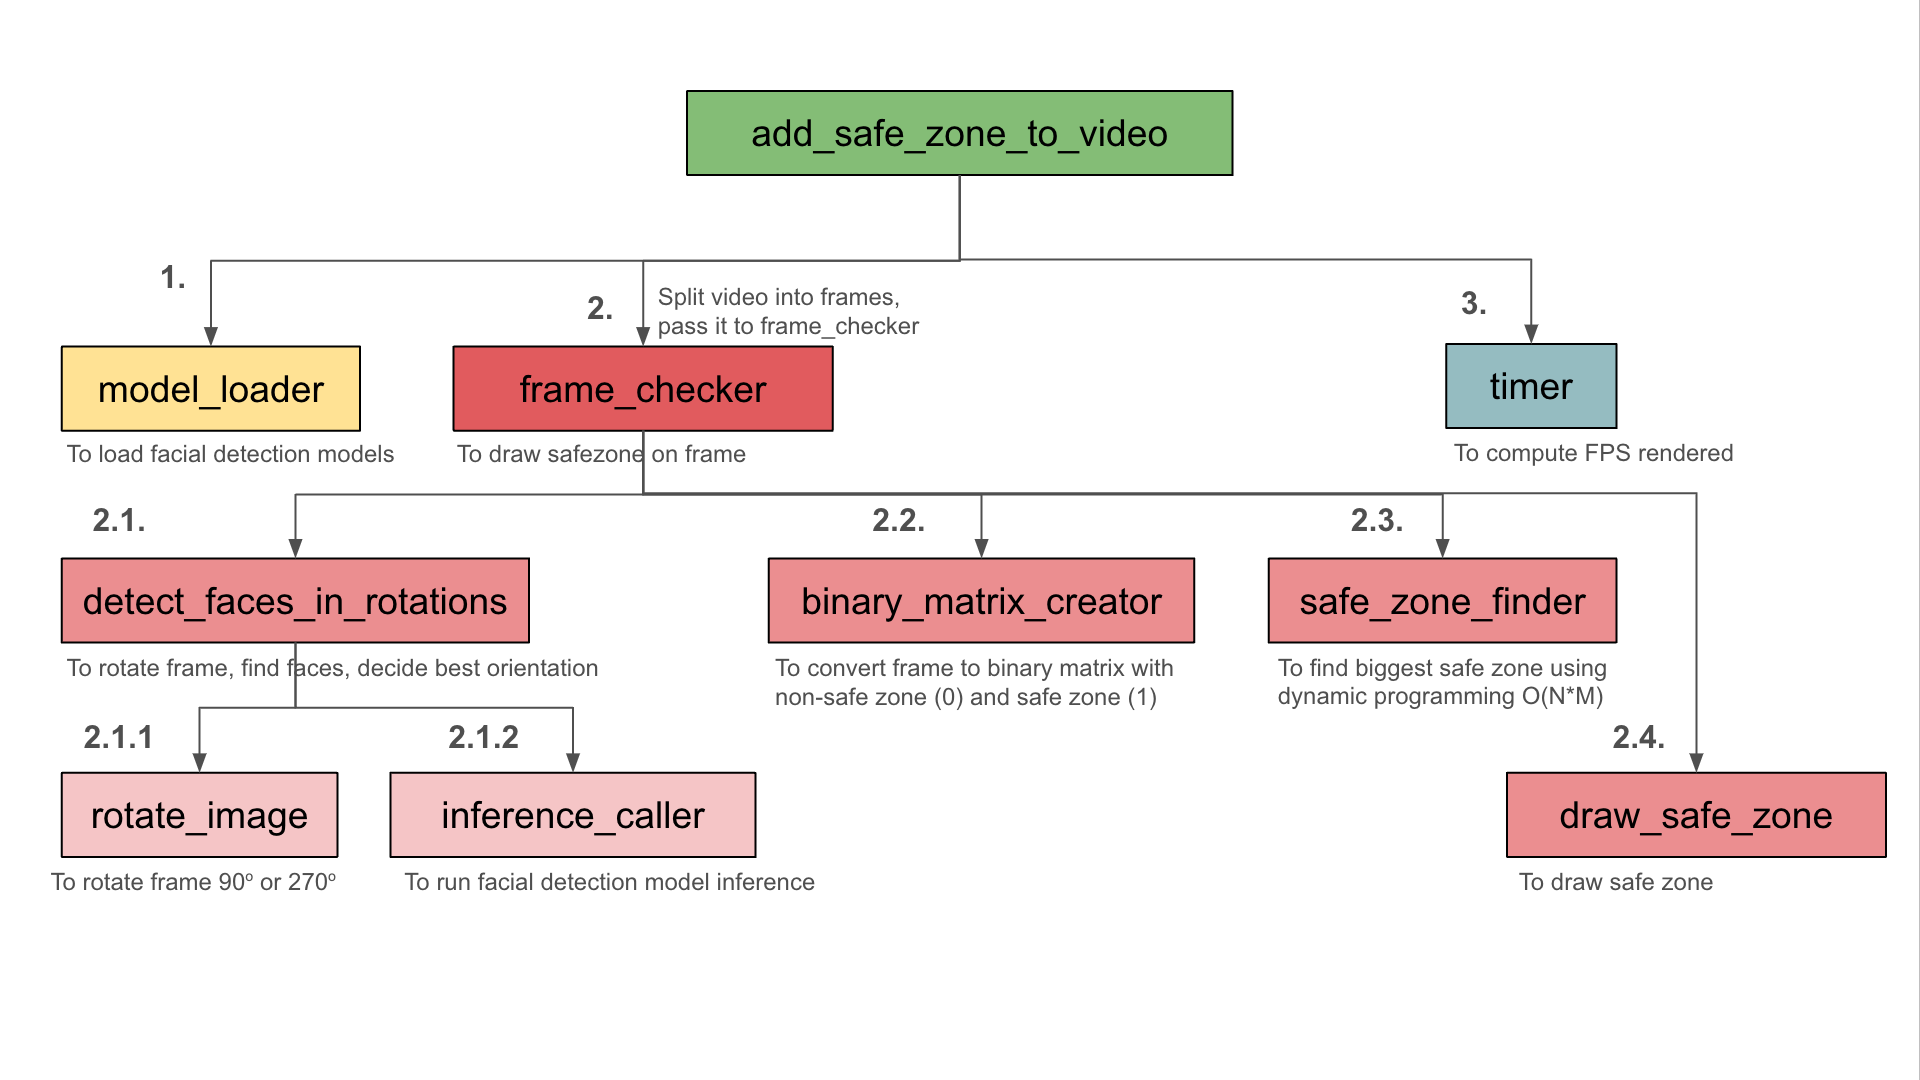

## Facial Detection Models Comparison


| Models       | Summary                                                                                                      | Strength                  | Weaknesses                                        | Source |
|:-------------|:-------------------------------------------------------------------------------------------------------------|:--------------------------|:--------------------------------------------------|:-------|
| Haar Cascade | - Utilizes Haar wavelet-based feature (does not require multiplication, only addition)<br>- Trained with positive and negative images<br>- Trick: Adaboost to select facial features, Cascade of classifier to select facial region | Highly efficient          | - Not suitable for non-frontal faces<br>- Complex background<br>- Sensitive to lighting | [Link](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html) |
| HOG + SVM    | - Create Histogram of Gradient, split face and non-face using SVM<br>- Detection is based on assessing HOG features across sliding window at various position and scales | Good balance between accuracy and speed/efficiency | - Not suitable for non-frontal faces<br>- Not suitable for occlusion (blocked face)<br>- Not suitable for low resolution image | [Link](https://github.com/mbrotos/Face-Detection-SVM-HOG) |
| Mediapipe    | - Cross-platform framework leveraging CPU and GPU                                                            | Highly efficient          | - Not as accurate relative to NN models                  | [Link](https://developers.google.com/mediapipe/) |
| CNN          | - Deep CNN which enables high accuracy at the cost of resources                                              | Highly accurate           | Computationally intensive                         |  |
| MTCNN        | - Three stages of CNN (P-Net <propose>, R-Net <refine>, O-Net <output>)<br>- Cascading framework prevents parallel processing across stages | Highly accurate           | Computationally intensive                         | [Link](https://github.com/ipazc/mtcnn?tab=readme-ov-file#zhang2016) |
| DNN with Caffe Framework        | - Provided by OpenCV DNN Module (highly optimized, automatic used of backend resources)<br>- Allows vectorization and parallel computing<br>- Weighted provided by Caffe framework (designed for efficiency) | Highly accurate yet quick | Can be resource intensive as it is still a DNN    | [Link](https://caffe.berkeleyvision.org/) |


<a id="facial_detector_models_performance"></a>
### Facial Detector Models Performance

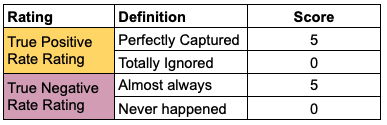

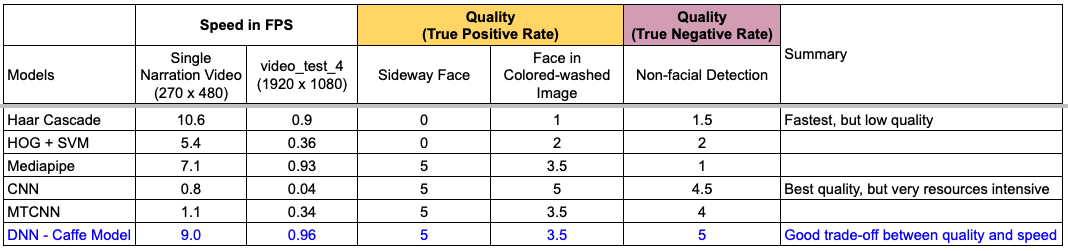

## Skip to Summary

Link to [summary](#summary)

## Functions

### Import Libraries

Link to the environment requirement: [Link](./requirements.yml)

In [110]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import time

from IPython.display import HTML

## Function Declaration

In [37]:
def binary_matrix_creator(img, left_pct, right_pct, top_pct, bottom_pct, faces):
    # Load image
    img_height, img_width = img.shape[:2]

    # Compute boundary limits
    left_bound = int(left_pct * img_width)
    right_bound = int((1 - right_pct) * img_width)
    top_bound = int(top_pct * img_height)
    bottom_bound = int((1 - bottom_pct) * img_height)

    # Recrate the matrix using binary matrix
    binary_matrix = np.ones((img_height, img_width), dtype=int)
    
    # Mark areas outside the allowed boundaries as non-safe zone (0)
    binary_matrix[:, :left_bound] = 0
    binary_matrix[:, right_bound:] = 0
    binary_matrix[:top_bound, :] = 0
    binary_matrix[bottom_bound:, :] = 0

    # Mark areas occupied by faces as non-safe zone (0)
    for x, y, w, h in faces:
        binary_matrix[y:y+h, x:x+w] = 0

    return binary_matrix

<a id="safe_zone_finder"></a>

In [38]:
def safe_zone_finder(matrix):
    # To handle empty matrix (base case)
    if not matrix or not matrix[0]:
        return 0, 0, 0, 0

    # Variables initiation
    n, m = len(matrix), len(matrix[0])
    height = [0] * m
    left = [0] * m
    right = [m] * m
    max_rectangle = (0, 0, 0, 0)  # x, y, width, height as initial max
    max_area = 0

    for i in range(n):
        cur_left, cur_right = 0, m
        # Update height, left, and right for each column in the current row
        for j in range(m):
            if matrix[i][j] == '1':
                height[j] += 1
                left[j] = max(left[j], cur_left)
            else:
                height[j] = 0
                left[j] = 0
                cur_left = j + 1

            # Update right for the current row from right to left
            if matrix[i][m - 1 - j] == '1':
                right[m - 1 - j] = min(right[m - 1 - j], cur_right)
            else:
                right[m - 1 - j] = m
                cur_right = m - 1 - j

        # Compute and update maximum area rectangle for each column
        for j in range(m):
            width = right[j] - left[j]
            area = width * height[j]
            if area > max_area:
                max_rectangle = (left[j], i - height[j] + 1, width, height[j])
                max_area = area

    return max_rectangle  # Return x, y, width, height of the maximum rectangle

In [39]:
def rotate_image(frame, angle):
    (h, w) = frame.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # Get the rotation matrix for the specified angle
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)

    # Perform the rotation
    cos = abs(M[0, 0])
    sin = abs(M[0, 1])

    # Compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # Adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # Perform the actual rotation and return the image
    rotated_frame = cv2.warpAffine(frame, M, (nW, nH))

    return rotated_frame, M

<a id="FaceOrientationCounter"></a>

In [48]:
class FaceOrientationCounter:
    def __init__(self):
        # Initialize counters for each orientation
        self.counters = {0: 0, 90: 0, 270: 0}
        
    def update(self, angle, faces_detected):
        # Increase the counter for the current angle if faces are detected
        if faces_detected > 0:
            self.counters[angle] = (faces_detected + self.counters[angle])/2
            
        # Decrease the counters slightly each time to favor recent observations
        for ang in self.counters:
            if ang != angle:
                self.counters[ang] *= 0.9  # Decay factor for 'forgetting' older observations
                
    def get_preferred_orientation(self):
        # Determine the orientation with the highest counter value
        preferred_angle = max(self.counters, key=self.counters.get)
        return preferred_angle

<a id="detect_faces_in_rotations"></a>

In [40]:
def detect_faces_in_rotations(frame, model_name, model, orientation_counter=None):
    # Define the rotation angles
    rotation_angles = [0, 90, 270]
    detected_faces = dict()

    original_w, original_h = frame.shape[1], frame.shape[0]
    most_faces_detected = 0
    best_angle = 0

    for angle in rotation_angles:
        # Rotate the image
        rotated_frame, M = rotate_image(frame, angle)
        
        # Detect faces
        faces = inference_caller(model_name, model, rotated_frame)

        if len(faces) > most_faces_detected:
            # If more faces are detected, update the counter and the best angle
            most_faces_detected = len(faces)
            best_angle = angle
            detected_faces[angle] = [(x, y, w, h) for (x, y, w, h) in faces]
#         print(f'angle: {angle}, faces: {faces}, detected_faces: {detected_faces}, best_angle: {best_angle}')
            
    # Update orientation counter if it's provided
    if orientation_counter is not None:
        orientation_counter.update(best_angle, most_faces_detected)
        best_angle = orientation_counter.get_preferred_orientation()

    # Adjust detected faces based on the best angle
    adjusted_faces = []
    if most_faces_detected > 0 and best_angle in detected_faces:
        for (x, y, w, h) in detected_faces[best_angle]:
            # Calculate the inverse rotation for the detected face coordinates based on the best angle
            rotated_frame, M = rotate_image(frame, best_angle)
            inv_M = cv2.invertAffineTransform(M)
            original_coords = np.array([[x + w/2, y + h/2]], dtype=np.float32)
            original_coords = np.array([original_coords])
            # Transform back the coordinates of the center of the face
            transformed_coords = cv2.transform(original_coords, inv_M)
            ox, oy = transformed_coords[0][0]
            ox, oy = int(ox - w/2), int(oy - h/2)
            
            # Store the corrected face box
            adjusted_faces.append((ox, oy, w, h))
    
    return adjusted_faces

In [113]:
def frame_checker(model_name, model, frame, orientation_counter):
    # Boundaries
    left_pct, right_pct, top_pct, bottom_pct = 0.05,  0.1, 0.05, 0.15

    # Detect faces
    faces = detect_faces_in_rotations(frame, model_name, model, orientation_counter)

#     # To show faces
#     for face in faces:
#         (x, y, w, h) = face
#         cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)

    # Convert image into binary array to perform find the largest safe zone
    binary_array = binary_matrix_creator(frame, left_pct, right_pct, top_pct, bottom_pct, faces)
    array = binary_array.astype(str).tolist()
    
    result_frame = draw_safe_zone(frame, (safe_zone_finder(array)))
    
    return result_frame

In [42]:
def timer(frames_processed, start_time, fps, total_frames):
    frames_processed += 1

    # Calculate total time and average time taken to render per frame
    elapsed_time = (time.time() - start_time)
    average_time_per_frame = elapsed_time / frames_processed

    # Calculate the remaining frames to render and estimated remaining time to complete video
    remaining_frames = total_frames - frames_processed
    estimated_remaining_time = remaining_frames * average_time_per_frame
    
    # Print
    print(f"Total frames: {total_frames}, Remaining frames: {remaining_frames}, Est. remaining time: {estimated_remaining_time:.1f} s, Total elapsed time: {elapsed_time:.1f}, FPS: {1/average_time_per_frame:.2f}")
        
    return frames_processed

In [43]:
def draw_safe_zone(image, safe_zone):
    # Draw green square around the safe zone
    x, y, w, h = safe_zone
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return image

<a id="add_safe_zone_to_video"></a>

In [44]:
def add_safe_zone_to_video(input_video_path, output_video_path, model_name):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)
    
    # Obtain video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Define the codec and create a VideoWriter object to write the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'XVID' if you face issues with 'mp4v'
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))
    
    frames_processed = 0
    start_time = time.time()
    
    model = model_loader(model_name)
    
    # Initialize the counter object outside of your frame processing loop
    orientation_counter = FaceOrientationCounter()
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Add the green frame into the frame
        edited_frame = frame_checker(model_name, model , frame, orientation_counter)
        
        # Write the frame with the safe zone to the output video
        out.write(edited_frame)
        
        # Frame counter/ timer (optional)
        frames_processed = timer(frames_processed, start_time, fps, total_frames)
        
        # Break the loop if 'q' is pressed (for real-time viewing)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release everything when job is finished
    cap.release()
    out.release()
    cv2.destroyAllWindows()

<a id="model_loader"></a>

In [72]:
def model_loader(model_name):
    # To select face detection model and return the detection model object
    match model_name:
        case "Haar Cascade":
            return cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
        case "Dlib - HOG + SVM":
            return dlib.get_frontal_face_detector()
        case "Dlib - CNN":
            return dlib.cnn_face_detection_model_v1('model/mmod_human_face_detector.dat')
        case "MTCNN":
            return MTCNN()
        case "Mediapipe":
            return mp.solutions.face_detection
        case "DNN":
            model_path = 'model/deploy.prototxt'
            weights_path = 'model/res10_300x300_ssd_iter_140000.caffemodel'
            return cv2.dnn.readNetFromCaffe(model_path, weights_path)

<a id="inference_caller"></a>

In [93]:
def inference_caller(model_name, model, frame):
    # To select face detection model and return faces boundaries in the form of x, y, width and height
    match model_name:
        case "Haar Cascade":
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = model.detectMultiScale(frame_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        case "Dlib - HOG + SVM":
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            detected_faces = model(frame_rgb, 1)
            faces = [[face.left(), face.top(), face.width(), face.height()] for face in detected_faces]
        case "Dlib - CNN":
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            detected_faces = model(frame_rgb, 1)
            faces = [[face.rect.left(), face.rect.top(), face.rect.width(), face.rect.height()] for face in detected_faces]
        case "MTCNN":
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            detected_faces = model.detect_faces(frame_rgb)
            faces = [face['box'] for face in detected_faces]
        case "Mediapipe":
#             frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            with model.FaceDetection(min_detection_confidence=0.3, model_selection = 1) as mp_model:
                detected_faces = mp_model.process(frame)
            
            faces = list()
            if detected_faces.detections:
                for face in detected_faces.detections:
                    # Each detection has a location_data field with a relative_bounding_box
                    bboxC = face.location_data.relative_bounding_box
                    ih, iw, _ = frame.shape
                    x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)
                    faces.append([x, y, w, h])
        case "DNN":
            blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
            model.setInput(blob)
            detected_faces = model.forward()
            
            # Process detections
            (h, w) = frame.shape[:2]
            faces = list()
            for i in range(0, detected_faces.shape[2]):
                confidence = detected_faces[0, 0, i, 2]
                if confidence > 0.5:
                    box = detected_faces[0, 0, i, 3:7] * np.array([w, h, w, h])
                    (startX, startY, endX, endY) = box.astype("int")
                    faces.append((startX, startY, endX - startX, endY - startY))
                                
    return faces

## Models Inference

### Haar Cascade

In [22]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] haar_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Haar Cascade"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 107, Remaining frames: 106, Est. remaining time: 140.5 s, Total elapsed time: 1.3, FPS: 0.75
Total frames: 107, Remaining frames: 105, Est. remaining time: 129.1 s, Total elapsed time: 2.5, FPS: 0.81
Total frames: 107, Remaining frames: 104, Est. remaining time: 124.8 s, Total elapsed time: 3.6, FPS: 0.83
Total frames: 107, Remaining frames: 103, Est. remaining time: 121.7 s, Total elapsed time: 4.7, FPS: 0.85
Total frames: 107, Remaining frames: 102, Est. remaining time: 119.7 s, Total elapsed time: 5.9, FPS: 0.85
Total frames: 107, Remaining frames: 101, Est. remaining time: 117.6 s, Total elapsed time: 7.0, FPS: 0.86
Total frames: 107, Remaining frames: 100, Est. remaining time: 115.9 s, Total elapsed time: 8.1, FPS: 0.86
Total frames: 107, Remaining frames: 99, Est. remaining time: 114.6 s, Total elapsed time: 9.3, FPS: 0.86
Total frames: 107, Remaining frames: 98, Est. remaining time: 113.3 s, Total elapsed time: 10.4, FPS: 0.87
Total frames: 107, Remaining frames: 9

Total frames: 107, Remaining frames: 28, Est. remaining time: 31.6 s, Total elapsed time: 89.0, FPS: 0.89
Total frames: 107, Remaining frames: 27, Est. remaining time: 30.4 s, Total elapsed time: 90.2, FPS: 0.89
Total frames: 107, Remaining frames: 26, Est. remaining time: 29.3 s, Total elapsed time: 91.3, FPS: 0.89
Total frames: 107, Remaining frames: 25, Est. remaining time: 28.2 s, Total elapsed time: 92.4, FPS: 0.89
Total frames: 107, Remaining frames: 24, Est. remaining time: 27.1 s, Total elapsed time: 93.6, FPS: 0.89
Total frames: 107, Remaining frames: 23, Est. remaining time: 25.9 s, Total elapsed time: 94.7, FPS: 0.89
Total frames: 107, Remaining frames: 22, Est. remaining time: 24.8 s, Total elapsed time: 95.8, FPS: 0.89
Total frames: 107, Remaining frames: 21, Est. remaining time: 23.7 s, Total elapsed time: 96.9, FPS: 0.89
Total frames: 107, Remaining frames: 20, Est. remaining time: 22.5 s, Total elapsed time: 98.1, FPS: 0.89
Total frames: 107, Remaining frames: 19, Est. 

In [31]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] haar_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Haar Cascade"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 2289, Remaining frames: 2288, Est. remaining time: 275.8 s, Total elapsed time: 0.1, FPS: 8.30
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 239.8 s, Total elapsed time: 0.2, FPS: 9.54
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 227.8 s, Total elapsed time: 0.3, FPS: 10.04
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 224.0 s, Total elapsed time: 0.4, FPS: 10.20
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 220.6 s, Total elapsed time: 0.5, FPS: 10.35
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 218.7 s, Total elapsed time: 0.6, FPS: 10.44
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 217.8 s, Total elapsed time: 0.7, FPS: 10.48
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 215.8 s, Total elapsed time: 0.8, FPS: 10.57
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 214.6 s, Total elapsed time: 0.8, FPS: 10.62
Total frames

Total frames: 2289, Remaining frames: 2212, Est. remaining time: 206.7 s, Total elapsed time: 7.2, FPS: 10.70
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 206.5 s, Total elapsed time: 7.3, FPS: 10.71
Total frames: 2289, Remaining frames: 2210, Est. remaining time: 206.3 s, Total elapsed time: 7.4, FPS: 10.71
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 206.1 s, Total elapsed time: 7.5, FPS: 10.72
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 206.0 s, Total elapsed time: 7.6, FPS: 10.72
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 205.8 s, Total elapsed time: 7.6, FPS: 10.72
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 205.6 s, Total elapsed time: 7.7, FPS: 10.73
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 205.7 s, Total elapsed time: 7.8, FPS: 10.72
Total frames: 2289, Remaining frames: 2204, Est. remaining time: 206.2 s, Total elapsed time: 8.0, FPS: 10.69
Total fram

Total frames: 2289, Remaining frames: 2137, Est. remaining time: 197.9 s, Total elapsed time: 14.1, FPS: 10.80
Total frames: 2289, Remaining frames: 2136, Est. remaining time: 198.1 s, Total elapsed time: 14.2, FPS: 10.78
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 198.0 s, Total elapsed time: 14.3, FPS: 10.78
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 197.8 s, Total elapsed time: 14.4, FPS: 10.79
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 197.7 s, Total elapsed time: 14.5, FPS: 10.79
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 197.6 s, Total elapsed time: 14.5, FPS: 10.79
Total frames: 2289, Remaining frames: 2131, Est. remaining time: 197.4 s, Total elapsed time: 14.6, FPS: 10.79
Total frames: 2289, Remaining frames: 2130, Est. remaining time: 197.3 s, Total elapsed time: 14.7, FPS: 10.80
Total frames: 2289, Remaining frames: 2129, Est. remaining time: 197.1 s, Total elapsed time: 14.8, FPS: 10.80
T

Total frames: 2289, Remaining frames: 2061, Est. remaining time: 189.7 s, Total elapsed time: 21.0, FPS: 10.87
Total frames: 2289, Remaining frames: 2060, Est. remaining time: 189.6 s, Total elapsed time: 21.1, FPS: 10.87
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 189.5 s, Total elapsed time: 21.2, FPS: 10.87
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 189.3 s, Total elapsed time: 21.3, FPS: 10.87
Total frames: 2289, Remaining frames: 2057, Est. remaining time: 189.2 s, Total elapsed time: 21.3, FPS: 10.87
Total frames: 2289, Remaining frames: 2056, Est. remaining time: 189.1 s, Total elapsed time: 21.4, FPS: 10.87
Total frames: 2289, Remaining frames: 2055, Est. remaining time: 189.0 s, Total elapsed time: 21.5, FPS: 10.87
Total frames: 2289, Remaining frames: 2054, Est. remaining time: 188.9 s, Total elapsed time: 21.6, FPS: 10.87
Total frames: 2289, Remaining frames: 2053, Est. remaining time: 188.8 s, Total elapsed time: 21.7, FPS: 10.88
T

Total frames: 2289, Remaining frames: 1985, Est. remaining time: 182.9 s, Total elapsed time: 28.0, FPS: 10.85
Total frames: 2289, Remaining frames: 1984, Est. remaining time: 182.8 s, Total elapsed time: 28.1, FPS: 10.85
Total frames: 2289, Remaining frames: 1983, Est. remaining time: 182.7 s, Total elapsed time: 28.2, FPS: 10.86
Total frames: 2289, Remaining frames: 1982, Est. remaining time: 182.6 s, Total elapsed time: 28.3, FPS: 10.86
Total frames: 2289, Remaining frames: 1981, Est. remaining time: 182.5 s, Total elapsed time: 28.4, FPS: 10.86
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 182.4 s, Total elapsed time: 28.5, FPS: 10.86
Total frames: 2289, Remaining frames: 1979, Est. remaining time: 182.3 s, Total elapsed time: 28.5, FPS: 10.86
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 182.1 s, Total elapsed time: 28.6, FPS: 10.86
Total frames: 2289, Remaining frames: 1977, Est. remaining time: 182.0 s, Total elapsed time: 28.7, FPS: 10.86
T

Total frames: 2289, Remaining frames: 1909, Est. remaining time: 175.8 s, Total elapsed time: 35.0, FPS: 10.86
Total frames: 2289, Remaining frames: 1908, Est. remaining time: 175.7 s, Total elapsed time: 35.1, FPS: 10.86
Total frames: 2289, Remaining frames: 1907, Est. remaining time: 175.6 s, Total elapsed time: 35.2, FPS: 10.86
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 175.5 s, Total elapsed time: 35.3, FPS: 10.86
Total frames: 2289, Remaining frames: 1905, Est. remaining time: 175.4 s, Total elapsed time: 35.4, FPS: 10.86
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 175.3 s, Total elapsed time: 35.4, FPS: 10.86
Total frames: 2289, Remaining frames: 1903, Est. remaining time: 175.2 s, Total elapsed time: 35.5, FPS: 10.86
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 175.1 s, Total elapsed time: 35.6, FPS: 10.86
Total frames: 2289, Remaining frames: 1901, Est. remaining time: 175.0 s, Total elapsed time: 35.7, FPS: 10.86
T

Total frames: 2289, Remaining frames: 1833, Est. remaining time: 168.8 s, Total elapsed time: 42.0, FPS: 10.86
Total frames: 2289, Remaining frames: 1832, Est. remaining time: 168.7 s, Total elapsed time: 42.1, FPS: 10.86
Total frames: 2289, Remaining frames: 1831, Est. remaining time: 168.6 s, Total elapsed time: 42.2, FPS: 10.86
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 168.5 s, Total elapsed time: 42.3, FPS: 10.86
Total frames: 2289, Remaining frames: 1829, Est. remaining time: 168.4 s, Total elapsed time: 42.4, FPS: 10.86
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 168.3 s, Total elapsed time: 42.4, FPS: 10.86
Total frames: 2289, Remaining frames: 1827, Est. remaining time: 168.2 s, Total elapsed time: 42.5, FPS: 10.86
Total frames: 2289, Remaining frames: 1826, Est. remaining time: 168.1 s, Total elapsed time: 42.6, FPS: 10.86
Total frames: 2289, Remaining frames: 1825, Est. remaining time: 168.0 s, Total elapsed time: 42.7, FPS: 10.86
T

Total frames: 2289, Remaining frames: 1758, Est. remaining time: 161.8 s, Total elapsed time: 48.9, FPS: 10.87
Total frames: 2289, Remaining frames: 1757, Est. remaining time: 161.7 s, Total elapsed time: 48.9, FPS: 10.87
Total frames: 2289, Remaining frames: 1756, Est. remaining time: 161.6 s, Total elapsed time: 49.0, FPS: 10.87
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 161.5 s, Total elapsed time: 49.1, FPS: 10.87
Total frames: 2289, Remaining frames: 1754, Est. remaining time: 161.4 s, Total elapsed time: 49.2, FPS: 10.87
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 161.3 s, Total elapsed time: 49.3, FPS: 10.87
Total frames: 2289, Remaining frames: 1752, Est. remaining time: 161.2 s, Total elapsed time: 49.4, FPS: 10.87
Total frames: 2289, Remaining frames: 1751, Est. remaining time: 161.1 s, Total elapsed time: 49.5, FPS: 10.87
Total frames: 2289, Remaining frames: 1750, Est. remaining time: 161.0 s, Total elapsed time: 49.6, FPS: 10.87
T

Total frames: 2289, Remaining frames: 1682, Est. remaining time: 155.9 s, Total elapsed time: 56.2, FPS: 10.79
Total frames: 2289, Remaining frames: 1681, Est. remaining time: 155.8 s, Total elapsed time: 56.3, FPS: 10.79
Total frames: 2289, Remaining frames: 1680, Est. remaining time: 155.6 s, Total elapsed time: 56.4, FPS: 10.79
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 155.5 s, Total elapsed time: 56.5, FPS: 10.79
Total frames: 2289, Remaining frames: 1678, Est. remaining time: 155.4 s, Total elapsed time: 56.6, FPS: 10.80
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 155.3 s, Total elapsed time: 56.7, FPS: 10.80
Total frames: 2289, Remaining frames: 1676, Est. remaining time: 155.2 s, Total elapsed time: 56.8, FPS: 10.80
Total frames: 2289, Remaining frames: 1675, Est. remaining time: 155.1 s, Total elapsed time: 56.8, FPS: 10.80
Total frames: 2289, Remaining frames: 1674, Est. remaining time: 155.0 s, Total elapsed time: 56.9, FPS: 10.80
T

Total frames: 2289, Remaining frames: 1608, Est. remaining time: 148.1 s, Total elapsed time: 62.7, FPS: 10.86
Total frames: 2289, Remaining frames: 1607, Est. remaining time: 148.0 s, Total elapsed time: 62.8, FPS: 10.86
Total frames: 2289, Remaining frames: 1606, Est. remaining time: 147.8 s, Total elapsed time: 62.9, FPS: 10.86
Total frames: 2289, Remaining frames: 1605, Est. remaining time: 147.7 s, Total elapsed time: 63.0, FPS: 10.86
Total frames: 2289, Remaining frames: 1604, Est. remaining time: 147.6 s, Total elapsed time: 63.0, FPS: 10.86
Total frames: 2289, Remaining frames: 1603, Est. remaining time: 147.5 s, Total elapsed time: 63.1, FPS: 10.87
Total frames: 2289, Remaining frames: 1602, Est. remaining time: 147.4 s, Total elapsed time: 63.2, FPS: 10.87
Total frames: 2289, Remaining frames: 1601, Est. remaining time: 147.3 s, Total elapsed time: 63.3, FPS: 10.87
Total frames: 2289, Remaining frames: 1600, Est. remaining time: 147.2 s, Total elapsed time: 63.4, FPS: 10.87
T

Total frames: 2289, Remaining frames: 1534, Est. remaining time: 140.5 s, Total elapsed time: 69.1, FPS: 10.92
Total frames: 2289, Remaining frames: 1533, Est. remaining time: 140.4 s, Total elapsed time: 69.2, FPS: 10.92
Total frames: 2289, Remaining frames: 1532, Est. remaining time: 140.3 s, Total elapsed time: 69.3, FPS: 10.92
Total frames: 2289, Remaining frames: 1531, Est. remaining time: 140.2 s, Total elapsed time: 69.4, FPS: 10.92
Total frames: 2289, Remaining frames: 1530, Est. remaining time: 140.1 s, Total elapsed time: 69.5, FPS: 10.92
Total frames: 2289, Remaining frames: 1529, Est. remaining time: 139.9 s, Total elapsed time: 69.6, FPS: 10.93
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 139.8 s, Total elapsed time: 69.6, FPS: 10.93
Total frames: 2289, Remaining frames: 1527, Est. remaining time: 139.7 s, Total elapsed time: 69.7, FPS: 10.93
Total frames: 2289, Remaining frames: 1526, Est. remaining time: 139.6 s, Total elapsed time: 69.8, FPS: 10.93
T

Total frames: 2289, Remaining frames: 1459, Est. remaining time: 133.0 s, Total elapsed time: 75.6, FPS: 10.97
Total frames: 2289, Remaining frames: 1458, Est. remaining time: 132.9 s, Total elapsed time: 75.8, FPS: 10.97
Total frames: 2289, Remaining frames: 1457, Est. remaining time: 132.8 s, Total elapsed time: 75.9, FPS: 10.97
Total frames: 2289, Remaining frames: 1456, Est. remaining time: 132.8 s, Total elapsed time: 76.0, FPS: 10.97
Total frames: 2289, Remaining frames: 1455, Est. remaining time: 132.7 s, Total elapsed time: 76.1, FPS: 10.97
Total frames: 2289, Remaining frames: 1454, Est. remaining time: 132.6 s, Total elapsed time: 76.1, FPS: 10.97
Total frames: 2289, Remaining frames: 1453, Est. remaining time: 132.5 s, Total elapsed time: 76.2, FPS: 10.97
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 132.4 s, Total elapsed time: 76.3, FPS: 10.97
Total frames: 2289, Remaining frames: 1451, Est. remaining time: 132.3 s, Total elapsed time: 76.4, FPS: 10.97
T

Total frames: 2289, Remaining frames: 1385, Est. remaining time: 125.7 s, Total elapsed time: 82.0, FPS: 11.02
Total frames: 2289, Remaining frames: 1384, Est. remaining time: 125.5 s, Total elapsed time: 82.1, FPS: 11.02
Total frames: 2289, Remaining frames: 1383, Est. remaining time: 125.4 s, Total elapsed time: 82.2, FPS: 11.03
Total frames: 2289, Remaining frames: 1382, Est. remaining time: 125.3 s, Total elapsed time: 82.2, FPS: 11.03
Total frames: 2289, Remaining frames: 1381, Est. remaining time: 125.2 s, Total elapsed time: 82.3, FPS: 11.03
Total frames: 2289, Remaining frames: 1380, Est. remaining time: 125.1 s, Total elapsed time: 82.4, FPS: 11.03
Total frames: 2289, Remaining frames: 1379, Est. remaining time: 125.0 s, Total elapsed time: 82.5, FPS: 11.03
Total frames: 2289, Remaining frames: 1378, Est. remaining time: 124.9 s, Total elapsed time: 82.5, FPS: 11.04
Total frames: 2289, Remaining frames: 1377, Est. remaining time: 124.8 s, Total elapsed time: 82.6, FPS: 11.04
T

Total frames: 2289, Remaining frames: 1311, Est. remaining time: 117.7 s, Total elapsed time: 87.8, FPS: 11.14
Total frames: 2289, Remaining frames: 1310, Est. remaining time: 117.6 s, Total elapsed time: 87.9, FPS: 11.14
Total frames: 2289, Remaining frames: 1309, Est. remaining time: 117.5 s, Total elapsed time: 88.0, FPS: 11.14
Total frames: 2289, Remaining frames: 1308, Est. remaining time: 117.4 s, Total elapsed time: 88.1, FPS: 11.14
Total frames: 2289, Remaining frames: 1307, Est. remaining time: 117.3 s, Total elapsed time: 88.1, FPS: 11.14
Total frames: 2289, Remaining frames: 1306, Est. remaining time: 117.2 s, Total elapsed time: 88.2, FPS: 11.14
Total frames: 2289, Remaining frames: 1305, Est. remaining time: 117.1 s, Total elapsed time: 88.3, FPS: 11.15
Total frames: 2289, Remaining frames: 1304, Est. remaining time: 117.0 s, Total elapsed time: 88.4, FPS: 11.15
Total frames: 2289, Remaining frames: 1303, Est. remaining time: 116.9 s, Total elapsed time: 88.4, FPS: 11.15
T

Total frames: 2289, Remaining frames: 1236, Est. remaining time: 110.2 s, Total elapsed time: 93.8, FPS: 11.22
Total frames: 2289, Remaining frames: 1235, Est. remaining time: 110.1 s, Total elapsed time: 93.9, FPS: 11.22
Total frames: 2289, Remaining frames: 1234, Est. remaining time: 110.0 s, Total elapsed time: 94.0, FPS: 11.22
Total frames: 2289, Remaining frames: 1233, Est. remaining time: 109.9 s, Total elapsed time: 94.1, FPS: 11.22
Total frames: 2289, Remaining frames: 1232, Est. remaining time: 109.8 s, Total elapsed time: 94.2, FPS: 11.23
Total frames: 2289, Remaining frames: 1231, Est. remaining time: 109.7 s, Total elapsed time: 94.2, FPS: 11.23
Total frames: 2289, Remaining frames: 1230, Est. remaining time: 109.6 s, Total elapsed time: 94.3, FPS: 11.23
Total frames: 2289, Remaining frames: 1229, Est. remaining time: 109.5 s, Total elapsed time: 94.4, FPS: 11.23
Total frames: 2289, Remaining frames: 1228, Est. remaining time: 109.4 s, Total elapsed time: 94.5, FPS: 11.23
T

Total frames: 2289, Remaining frames: 1161, Est. remaining time: 102.8 s, Total elapsed time: 99.8, FPS: 11.30
Total frames: 2289, Remaining frames: 1160, Est. remaining time: 102.7 s, Total elapsed time: 99.9, FPS: 11.30
Total frames: 2289, Remaining frames: 1159, Est. remaining time: 102.6 s, Total elapsed time: 100.0, FPS: 11.30
Total frames: 2289, Remaining frames: 1158, Est. remaining time: 102.5 s, Total elapsed time: 100.1, FPS: 11.30
Total frames: 2289, Remaining frames: 1157, Est. remaining time: 102.4 s, Total elapsed time: 100.2, FPS: 11.30
Total frames: 2289, Remaining frames: 1156, Est. remaining time: 102.3 s, Total elapsed time: 100.2, FPS: 11.30
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 102.2 s, Total elapsed time: 100.3, FPS: 11.30
Total frames: 2289, Remaining frames: 1154, Est. remaining time: 102.1 s, Total elapsed time: 100.4, FPS: 11.31
Total frames: 2289, Remaining frames: 1153, Est. remaining time: 102.0 s, Total elapsed time: 100.5, FPS: 

Total frames: 2289, Remaining frames: 1086, Est. remaining time: 95.6 s, Total elapsed time: 105.9, FPS: 11.36
Total frames: 2289, Remaining frames: 1085, Est. remaining time: 95.5 s, Total elapsed time: 106.0, FPS: 11.36
Total frames: 2289, Remaining frames: 1084, Est. remaining time: 95.4 s, Total elapsed time: 106.1, FPS: 11.36
Total frames: 2289, Remaining frames: 1083, Est. remaining time: 95.3 s, Total elapsed time: 106.2, FPS: 11.36
Total frames: 2289, Remaining frames: 1082, Est. remaining time: 95.3 s, Total elapsed time: 106.3, FPS: 11.36
Total frames: 2289, Remaining frames: 1081, Est. remaining time: 95.2 s, Total elapsed time: 106.3, FPS: 11.36
Total frames: 2289, Remaining frames: 1080, Est. remaining time: 95.1 s, Total elapsed time: 106.4, FPS: 11.36
Total frames: 2289, Remaining frames: 1079, Est. remaining time: 95.0 s, Total elapsed time: 106.5, FPS: 11.36
Total frames: 2289, Remaining frames: 1078, Est. remaining time: 94.9 s, Total elapsed time: 106.6, FPS: 11.36
T

Total frames: 2289, Remaining frames: 1011, Est. remaining time: 89.0 s, Total elapsed time: 112.5, FPS: 11.36
Total frames: 2289, Remaining frames: 1010, Est. remaining time: 88.9 s, Total elapsed time: 112.6, FPS: 11.36
Total frames: 2289, Remaining frames: 1009, Est. remaining time: 88.8 s, Total elapsed time: 112.7, FPS: 11.36
Total frames: 2289, Remaining frames: 1008, Est. remaining time: 88.7 s, Total elapsed time: 112.8, FPS: 11.36
Total frames: 2289, Remaining frames: 1007, Est. remaining time: 88.7 s, Total elapsed time: 112.9, FPS: 11.36
Total frames: 2289, Remaining frames: 1006, Est. remaining time: 88.6 s, Total elapsed time: 113.0, FPS: 11.36
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 88.5 s, Total elapsed time: 113.0, FPS: 11.36
Total frames: 2289, Remaining frames: 1004, Est. remaining time: 88.4 s, Total elapsed time: 113.1, FPS: 11.36
Total frames: 2289, Remaining frames: 1003, Est. remaining time: 88.3 s, Total elapsed time: 113.2, FPS: 11.36
T

Total frames: 2289, Remaining frames: 936, Est. remaining time: 82.3 s, Total elapsed time: 119.0, FPS: 11.37
Total frames: 2289, Remaining frames: 935, Est. remaining time: 82.3 s, Total elapsed time: 119.1, FPS: 11.37
Total frames: 2289, Remaining frames: 934, Est. remaining time: 82.2 s, Total elapsed time: 119.2, FPS: 11.37
Total frames: 2289, Remaining frames: 933, Est. remaining time: 82.1 s, Total elapsed time: 119.3, FPS: 11.37
Total frames: 2289, Remaining frames: 932, Est. remaining time: 82.0 s, Total elapsed time: 119.4, FPS: 11.37
Total frames: 2289, Remaining frames: 931, Est. remaining time: 81.9 s, Total elapsed time: 119.5, FPS: 11.37
Total frames: 2289, Remaining frames: 930, Est. remaining time: 81.8 s, Total elapsed time: 119.6, FPS: 11.37
Total frames: 2289, Remaining frames: 929, Est. remaining time: 81.7 s, Total elapsed time: 119.6, FPS: 11.37
Total frames: 2289, Remaining frames: 928, Est. remaining time: 81.6 s, Total elapsed time: 119.7, FPS: 11.37
Total fram

Total frames: 2289, Remaining frames: 861, Est. remaining time: 75.7 s, Total elapsed time: 125.5, FPS: 11.38
Total frames: 2289, Remaining frames: 860, Est. remaining time: 75.6 s, Total elapsed time: 125.6, FPS: 11.38
Total frames: 2289, Remaining frames: 859, Est. remaining time: 75.5 s, Total elapsed time: 125.7, FPS: 11.38
Total frames: 2289, Remaining frames: 858, Est. remaining time: 75.4 s, Total elapsed time: 125.8, FPS: 11.38
Total frames: 2289, Remaining frames: 857, Est. remaining time: 75.3 s, Total elapsed time: 125.9, FPS: 11.38
Total frames: 2289, Remaining frames: 856, Est. remaining time: 75.2 s, Total elapsed time: 126.0, FPS: 11.38
Total frames: 2289, Remaining frames: 855, Est. remaining time: 75.2 s, Total elapsed time: 126.1, FPS: 11.38
Total frames: 2289, Remaining frames: 854, Est. remaining time: 75.1 s, Total elapsed time: 126.1, FPS: 11.38
Total frames: 2289, Remaining frames: 853, Est. remaining time: 75.0 s, Total elapsed time: 126.2, FPS: 11.38
Total fram

Total frames: 2289, Remaining frames: 786, Est. remaining time: 69.1 s, Total elapsed time: 132.1, FPS: 11.38
Total frames: 2289, Remaining frames: 785, Est. remaining time: 69.0 s, Total elapsed time: 132.2, FPS: 11.38
Total frames: 2289, Remaining frames: 784, Est. remaining time: 68.9 s, Total elapsed time: 132.3, FPS: 11.37
Total frames: 2289, Remaining frames: 783, Est. remaining time: 68.8 s, Total elapsed time: 132.4, FPS: 11.37
Total frames: 2289, Remaining frames: 782, Est. remaining time: 68.8 s, Total elapsed time: 132.5, FPS: 11.37
Total frames: 2289, Remaining frames: 781, Est. remaining time: 68.7 s, Total elapsed time: 132.6, FPS: 11.37
Total frames: 2289, Remaining frames: 780, Est. remaining time: 68.6 s, Total elapsed time: 132.7, FPS: 11.37
Total frames: 2289, Remaining frames: 779, Est. remaining time: 68.5 s, Total elapsed time: 132.8, FPS: 11.37
Total frames: 2289, Remaining frames: 778, Est. remaining time: 68.4 s, Total elapsed time: 132.9, FPS: 11.37
Total fram

Total frames: 2289, Remaining frames: 711, Est. remaining time: 62.8 s, Total elapsed time: 139.3, FPS: 11.33
Total frames: 2289, Remaining frames: 710, Est. remaining time: 62.7 s, Total elapsed time: 139.4, FPS: 11.33
Total frames: 2289, Remaining frames: 709, Est. remaining time: 62.6 s, Total elapsed time: 139.5, FPS: 11.32
Total frames: 2289, Remaining frames: 708, Est. remaining time: 62.5 s, Total elapsed time: 139.6, FPS: 11.32
Total frames: 2289, Remaining frames: 707, Est. remaining time: 62.4 s, Total elapsed time: 139.7, FPS: 11.32
Total frames: 2289, Remaining frames: 706, Est. remaining time: 62.4 s, Total elapsed time: 139.8, FPS: 11.32
Total frames: 2289, Remaining frames: 705, Est. remaining time: 62.3 s, Total elapsed time: 139.9, FPS: 11.32
Total frames: 2289, Remaining frames: 704, Est. remaining time: 62.2 s, Total elapsed time: 140.0, FPS: 11.32
Total frames: 2289, Remaining frames: 703, Est. remaining time: 62.1 s, Total elapsed time: 140.1, FPS: 11.32
Total fram

Total frames: 2289, Remaining frames: 634, Est. remaining time: 56.2 s, Total elapsed time: 146.8, FPS: 11.28
Total frames: 2289, Remaining frames: 633, Est. remaining time: 56.1 s, Total elapsed time: 146.9, FPS: 11.28
Total frames: 2289, Remaining frames: 632, Est. remaining time: 56.1 s, Total elapsed time: 147.0, FPS: 11.28
Total frames: 2289, Remaining frames: 631, Est. remaining time: 56.0 s, Total elapsed time: 147.1, FPS: 11.27
Total frames: 2289, Remaining frames: 630, Est. remaining time: 55.9 s, Total elapsed time: 147.1, FPS: 11.27
Total frames: 2289, Remaining frames: 629, Est. remaining time: 55.8 s, Total elapsed time: 147.2, FPS: 11.27
Total frames: 2289, Remaining frames: 628, Est. remaining time: 55.7 s, Total elapsed time: 147.3, FPS: 11.27
Total frames: 2289, Remaining frames: 627, Est. remaining time: 55.6 s, Total elapsed time: 147.4, FPS: 11.27
Total frames: 2289, Remaining frames: 626, Est. remaining time: 55.5 s, Total elapsed time: 147.5, FPS: 11.27
Total fram

Total frames: 2289, Remaining frames: 558, Est. remaining time: 49.5 s, Total elapsed time: 153.6, FPS: 11.27
Total frames: 2289, Remaining frames: 557, Est. remaining time: 49.4 s, Total elapsed time: 153.7, FPS: 11.27
Total frames: 2289, Remaining frames: 556, Est. remaining time: 49.3 s, Total elapsed time: 153.8, FPS: 11.27
Total frames: 2289, Remaining frames: 555, Est. remaining time: 49.3 s, Total elapsed time: 153.9, FPS: 11.27
Total frames: 2289, Remaining frames: 554, Est. remaining time: 49.2 s, Total elapsed time: 154.0, FPS: 11.27
Total frames: 2289, Remaining frames: 553, Est. remaining time: 49.1 s, Total elapsed time: 154.1, FPS: 11.27
Total frames: 2289, Remaining frames: 552, Est. remaining time: 49.0 s, Total elapsed time: 154.2, FPS: 11.26
Total frames: 2289, Remaining frames: 551, Est. remaining time: 48.9 s, Total elapsed time: 154.3, FPS: 11.26
Total frames: 2289, Remaining frames: 550, Est. remaining time: 48.8 s, Total elapsed time: 154.4, FPS: 11.26
Total fram

Total frames: 2289, Remaining frames: 481, Est. remaining time: 42.7 s, Total elapsed time: 160.5, FPS: 11.26
Total frames: 2289, Remaining frames: 480, Est. remaining time: 42.6 s, Total elapsed time: 160.6, FPS: 11.26
Total frames: 2289, Remaining frames: 479, Est. remaining time: 42.5 s, Total elapsed time: 160.7, FPS: 11.26
Total frames: 2289, Remaining frames: 478, Est. remaining time: 42.4 s, Total elapsed time: 160.8, FPS: 11.26
Total frames: 2289, Remaining frames: 477, Est. remaining time: 42.3 s, Total elapsed time: 160.9, FPS: 11.26
Total frames: 2289, Remaining frames: 476, Est. remaining time: 42.3 s, Total elapsed time: 161.0, FPS: 11.26
Total frames: 2289, Remaining frames: 475, Est. remaining time: 42.2 s, Total elapsed time: 161.0, FPS: 11.26
Total frames: 2289, Remaining frames: 474, Est. remaining time: 42.1 s, Total elapsed time: 161.1, FPS: 11.26
Total frames: 2289, Remaining frames: 473, Est. remaining time: 42.0 s, Total elapsed time: 161.2, FPS: 11.26
Total fram

Total frames: 2289, Remaining frames: 404, Est. remaining time: 35.9 s, Total elapsed time: 167.5, FPS: 11.26
Total frames: 2289, Remaining frames: 403, Est. remaining time: 35.8 s, Total elapsed time: 167.5, FPS: 11.26
Total frames: 2289, Remaining frames: 402, Est. remaining time: 35.7 s, Total elapsed time: 167.6, FPS: 11.26
Total frames: 2289, Remaining frames: 401, Est. remaining time: 35.6 s, Total elapsed time: 167.7, FPS: 11.26
Total frames: 2289, Remaining frames: 400, Est. remaining time: 35.5 s, Total elapsed time: 167.8, FPS: 11.26
Total frames: 2289, Remaining frames: 399, Est. remaining time: 35.4 s, Total elapsed time: 167.9, FPS: 11.26
Total frames: 2289, Remaining frames: 398, Est. remaining time: 35.4 s, Total elapsed time: 168.0, FPS: 11.26
Total frames: 2289, Remaining frames: 397, Est. remaining time: 35.3 s, Total elapsed time: 168.1, FPS: 11.26
Total frames: 2289, Remaining frames: 396, Est. remaining time: 35.2 s, Total elapsed time: 168.2, FPS: 11.26
Total fram

Total frames: 2289, Remaining frames: 327, Est. remaining time: 29.1 s, Total elapsed time: 174.8, FPS: 11.22
Total frames: 2289, Remaining frames: 326, Est. remaining time: 29.0 s, Total elapsed time: 174.9, FPS: 11.22
Total frames: 2289, Remaining frames: 325, Est. remaining time: 29.0 s, Total elapsed time: 175.0, FPS: 11.22
Total frames: 2289, Remaining frames: 324, Est. remaining time: 28.9 s, Total elapsed time: 175.1, FPS: 11.22
Total frames: 2289, Remaining frames: 323, Est. remaining time: 28.8 s, Total elapsed time: 175.2, FPS: 11.22
Total frames: 2289, Remaining frames: 322, Est. remaining time: 28.7 s, Total elapsed time: 175.3, FPS: 11.22
Total frames: 2289, Remaining frames: 321, Est. remaining time: 28.6 s, Total elapsed time: 175.4, FPS: 11.22
Total frames: 2289, Remaining frames: 320, Est. remaining time: 28.5 s, Total elapsed time: 175.4, FPS: 11.22
Total frames: 2289, Remaining frames: 319, Est. remaining time: 28.4 s, Total elapsed time: 175.5, FPS: 11.22
Total fram

Total frames: 2289, Remaining frames: 252, Est. remaining time: 22.5 s, Total elapsed time: 181.6, FPS: 11.22
Total frames: 2289, Remaining frames: 251, Est. remaining time: 22.4 s, Total elapsed time: 181.7, FPS: 11.22
Total frames: 2289, Remaining frames: 250, Est. remaining time: 22.3 s, Total elapsed time: 181.7, FPS: 11.22
Total frames: 2289, Remaining frames: 249, Est. remaining time: 22.2 s, Total elapsed time: 181.8, FPS: 11.22
Total frames: 2289, Remaining frames: 248, Est. remaining time: 22.1 s, Total elapsed time: 181.9, FPS: 11.22
Total frames: 2289, Remaining frames: 247, Est. remaining time: 22.0 s, Total elapsed time: 182.0, FPS: 11.22
Total frames: 2289, Remaining frames: 246, Est. remaining time: 21.9 s, Total elapsed time: 182.1, FPS: 11.22
Total frames: 2289, Remaining frames: 245, Est. remaining time: 21.8 s, Total elapsed time: 182.2, FPS: 11.22
Total frames: 2289, Remaining frames: 244, Est. remaining time: 21.7 s, Total elapsed time: 182.3, FPS: 11.22
Total fram

Total frames: 2289, Remaining frames: 176, Est. remaining time: 15.7 s, Total elapsed time: 188.4, FPS: 11.21
Total frames: 2289, Remaining frames: 175, Est. remaining time: 15.6 s, Total elapsed time: 188.5, FPS: 11.21
Total frames: 2289, Remaining frames: 174, Est. remaining time: 15.5 s, Total elapsed time: 188.6, FPS: 11.21
Total frames: 2289, Remaining frames: 173, Est. remaining time: 15.4 s, Total elapsed time: 188.7, FPS: 11.21
Total frames: 2289, Remaining frames: 172, Est. remaining time: 15.3 s, Total elapsed time: 188.8, FPS: 11.21
Total frames: 2289, Remaining frames: 171, Est. remaining time: 15.2 s, Total elapsed time: 188.9, FPS: 11.21
Total frames: 2289, Remaining frames: 170, Est. remaining time: 15.2 s, Total elapsed time: 189.0, FPS: 11.21
Total frames: 2289, Remaining frames: 169, Est. remaining time: 15.1 s, Total elapsed time: 189.0, FPS: 11.21
Total frames: 2289, Remaining frames: 168, Est. remaining time: 15.0 s, Total elapsed time: 189.1, FPS: 11.22
Total fram

Total frames: 2289, Remaining frames: 100, Est. remaining time: 8.9 s, Total elapsed time: 195.0, FPS: 11.22
Total frames: 2289, Remaining frames: 99, Est. remaining time: 8.8 s, Total elapsed time: 195.1, FPS: 11.22
Total frames: 2289, Remaining frames: 98, Est. remaining time: 8.7 s, Total elapsed time: 195.2, FPS: 11.22
Total frames: 2289, Remaining frames: 97, Est. remaining time: 8.6 s, Total elapsed time: 195.3, FPS: 11.23
Total frames: 2289, Remaining frames: 96, Est. remaining time: 8.6 s, Total elapsed time: 195.4, FPS: 11.23
Total frames: 2289, Remaining frames: 95, Est. remaining time: 8.5 s, Total elapsed time: 195.4, FPS: 11.23
Total frames: 2289, Remaining frames: 94, Est. remaining time: 8.4 s, Total elapsed time: 195.5, FPS: 11.23
Total frames: 2289, Remaining frames: 93, Est. remaining time: 8.3 s, Total elapsed time: 195.6, FPS: 11.23
Total frames: 2289, Remaining frames: 92, Est. remaining time: 8.2 s, Total elapsed time: 195.7, FPS: 11.23
Total frames: 2289, Remaini

Total frames: 2289, Remaining frames: 23, Est. remaining time: 2.0 s, Total elapsed time: 201.6, FPS: 11.24
Total frames: 2289, Remaining frames: 22, Est. remaining time: 2.0 s, Total elapsed time: 201.7, FPS: 11.24
Total frames: 2289, Remaining frames: 21, Est. remaining time: 1.9 s, Total elapsed time: 201.8, FPS: 11.24
Total frames: 2289, Remaining frames: 20, Est. remaining time: 1.8 s, Total elapsed time: 201.9, FPS: 11.24
Total frames: 2289, Remaining frames: 19, Est. remaining time: 1.7 s, Total elapsed time: 202.0, FPS: 11.24
Total frames: 2289, Remaining frames: 18, Est. remaining time: 1.6 s, Total elapsed time: 202.1, FPS: 11.24
Total frames: 2289, Remaining frames: 17, Est. remaining time: 1.5 s, Total elapsed time: 202.2, FPS: 11.24
Total frames: 2289, Remaining frames: 16, Est. remaining time: 1.4 s, Total elapsed time: 202.3, FPS: 11.24
Total frames: 2289, Remaining frames: 15, Est. remaining time: 1.3 s, Total elapsed time: 202.4, FPS: 11.24
Total frames: 2289, Remainin

### Dlib - HOG + SVM

In [23]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] dlib_hogsvm_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Dlib - HOG + SVM"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 107, Remaining frames: 106, Est. remaining time: 323.7 s, Total elapsed time: 3.1, FPS: 0.33
Total frames: 107, Remaining frames: 105, Est. remaining time: 306.6 s, Total elapsed time: 5.8, FPS: 0.34
Total frames: 107, Remaining frames: 104, Est. remaining time: 298.5 s, Total elapsed time: 8.6, FPS: 0.35
Total frames: 107, Remaining frames: 103, Est. remaining time: 293.0 s, Total elapsed time: 11.4, FPS: 0.35
Total frames: 107, Remaining frames: 102, Est. remaining time: 288.6 s, Total elapsed time: 14.1, FPS: 0.35
Total frames: 107, Remaining frames: 101, Est. remaining time: 284.5 s, Total elapsed time: 16.9, FPS: 0.35
Total frames: 107, Remaining frames: 100, Est. remaining time: 281.5 s, Total elapsed time: 19.7, FPS: 0.36
Total frames: 107, Remaining frames: 99, Est. remaining time: 278.2 s, Total elapsed time: 22.5, FPS: 0.36
Total frames: 107, Remaining frames: 98, Est. remaining time: 274.9 s, Total elapsed time: 25.2, FPS: 0.36
Total frames: 107, Remaining fram

Total frames: 107, Remaining frames: 29, Est. remaining time: 81.5 s, Total elapsed time: 219.2, FPS: 0.36
Total frames: 107, Remaining frames: 28, Est. remaining time: 78.7 s, Total elapsed time: 222.0, FPS: 0.36
Total frames: 107, Remaining frames: 27, Est. remaining time: 75.9 s, Total elapsed time: 224.8, FPS: 0.36
Total frames: 107, Remaining frames: 26, Est. remaining time: 73.0 s, Total elapsed time: 227.6, FPS: 0.36
Total frames: 107, Remaining frames: 25, Est. remaining time: 70.2 s, Total elapsed time: 230.3, FPS: 0.36
Total frames: 107, Remaining frames: 24, Est. remaining time: 67.4 s, Total elapsed time: 233.1, FPS: 0.36
Total frames: 107, Remaining frames: 23, Est. remaining time: 64.6 s, Total elapsed time: 235.9, FPS: 0.36
Total frames: 107, Remaining frames: 22, Est. remaining time: 61.8 s, Total elapsed time: 238.7, FPS: 0.36
Total frames: 107, Remaining frames: 21, Est. remaining time: 59.0 s, Total elapsed time: 241.5, FPS: 0.36
Total frames: 107, Remaining frames: 

In [28]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] dlib_hogsvm_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Dlib - HOG + SVM"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 2289, Remaining frames: 2288, Est. remaining time: 809.8 s, Total elapsed time: 0.4, FPS: 2.83
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 621.4 s, Total elapsed time: 0.5, FPS: 3.68
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 559.2 s, Total elapsed time: 0.7, FPS: 4.09
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 526.0 s, Total elapsed time: 0.9, FPS: 4.34
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 506.7 s, Total elapsed time: 1.1, FPS: 4.51
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 497.9 s, Total elapsed time: 1.3, FPS: 4.59
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 496.0 s, Total elapsed time: 1.5, FPS: 4.60
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 488.0 s, Total elapsed time: 1.7, FPS: 4.67
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 479.4 s, Total elapsed time: 1.9, FPS: 4.76
Total frames: 2289,

Total frames: 2289, Remaining frames: 2212, Est. remaining time: 416.0 s, Total elapsed time: 14.5, FPS: 5.32
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 416.2 s, Total elapsed time: 14.7, FPS: 5.31
Total frames: 2289, Remaining frames: 2210, Est. remaining time: 415.9 s, Total elapsed time: 14.9, FPS: 5.31
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 416.0 s, Total elapsed time: 15.1, FPS: 5.31
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 415.8 s, Total elapsed time: 15.3, FPS: 5.31
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 415.4 s, Total elapsed time: 15.4, FPS: 5.31
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 415.1 s, Total elapsed time: 15.6, FPS: 5.31
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 414.7 s, Total elapsed time: 15.8, FPS: 5.32
Total frames: 2289, Remaining frames: 2204, Est. remaining time: 414.4 s, Total elapsed time: 16.0, FPS: 5.32
Total fram

Total frames: 2289, Remaining frames: 2136, Est. remaining time: 399.4 s, Total elapsed time: 28.6, FPS: 5.35
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 399.2 s, Total elapsed time: 28.8, FPS: 5.35
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 399.0 s, Total elapsed time: 29.0, FPS: 5.35
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 398.7 s, Total elapsed time: 29.2, FPS: 5.35
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 398.4 s, Total elapsed time: 29.3, FPS: 5.35
Total frames: 2289, Remaining frames: 2131, Est. remaining time: 398.2 s, Total elapsed time: 29.5, FPS: 5.35
Total frames: 2289, Remaining frames: 2130, Est. remaining time: 397.9 s, Total elapsed time: 29.7, FPS: 5.35
Total frames: 2289, Remaining frames: 2129, Est. remaining time: 397.7 s, Total elapsed time: 29.9, FPS: 5.35
Total frames: 2289, Remaining frames: 2128, Est. remaining time: 397.4 s, Total elapsed time: 30.1, FPS: 5.35
Total fram

Total frames: 2289, Remaining frames: 2060, Est. remaining time: 381.7 s, Total elapsed time: 42.4, FPS: 5.40
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 381.5 s, Total elapsed time: 42.6, FPS: 5.40
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 381.3 s, Total elapsed time: 42.8, FPS: 5.40
Total frames: 2289, Remaining frames: 2057, Est. remaining time: 381.1 s, Total elapsed time: 43.0, FPS: 5.40
Total frames: 2289, Remaining frames: 2056, Est. remaining time: 380.9 s, Total elapsed time: 43.2, FPS: 5.40
Total frames: 2289, Remaining frames: 2055, Est. remaining time: 380.7 s, Total elapsed time: 43.3, FPS: 5.40
Total frames: 2289, Remaining frames: 2054, Est. remaining time: 380.4 s, Total elapsed time: 43.5, FPS: 5.40
Total frames: 2289, Remaining frames: 2053, Est. remaining time: 380.2 s, Total elapsed time: 43.7, FPS: 5.40
Total frames: 2289, Remaining frames: 2052, Est. remaining time: 380.0 s, Total elapsed time: 43.9, FPS: 5.40
Total fram

Total frames: 2289, Remaining frames: 1984, Est. remaining time: 367.6 s, Total elapsed time: 56.5, FPS: 5.40
Total frames: 2289, Remaining frames: 1983, Est. remaining time: 367.4 s, Total elapsed time: 56.7, FPS: 5.40
Total frames: 2289, Remaining frames: 1982, Est. remaining time: 367.2 s, Total elapsed time: 56.9, FPS: 5.40
Total frames: 2289, Remaining frames: 1981, Est. remaining time: 367.0 s, Total elapsed time: 57.1, FPS: 5.40
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 366.8 s, Total elapsed time: 57.2, FPS: 5.40
Total frames: 2289, Remaining frames: 1979, Est. remaining time: 366.6 s, Total elapsed time: 57.4, FPS: 5.40
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 366.4 s, Total elapsed time: 57.6, FPS: 5.40
Total frames: 2289, Remaining frames: 1977, Est. remaining time: 366.2 s, Total elapsed time: 57.8, FPS: 5.40
Total frames: 2289, Remaining frames: 1976, Est. remaining time: 366.0 s, Total elapsed time: 58.0, FPS: 5.40
Total fram

Total frames: 2289, Remaining frames: 1908, Est. remaining time: 352.6 s, Total elapsed time: 70.4, FPS: 5.41
Total frames: 2289, Remaining frames: 1907, Est. remaining time: 352.4 s, Total elapsed time: 70.6, FPS: 5.41
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 352.2 s, Total elapsed time: 70.8, FPS: 5.41
Total frames: 2289, Remaining frames: 1905, Est. remaining time: 352.0 s, Total elapsed time: 71.0, FPS: 5.41
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 351.8 s, Total elapsed time: 71.1, FPS: 5.41
Total frames: 2289, Remaining frames: 1903, Est. remaining time: 351.6 s, Total elapsed time: 71.3, FPS: 5.41
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 351.4 s, Total elapsed time: 71.5, FPS: 5.41
Total frames: 2289, Remaining frames: 1901, Est. remaining time: 351.2 s, Total elapsed time: 71.7, FPS: 5.41
Total frames: 2289, Remaining frames: 1900, Est. remaining time: 351.0 s, Total elapsed time: 71.9, FPS: 5.41
Total fram

Total frames: 2289, Remaining frames: 1833, Est. remaining time: 338.6 s, Total elapsed time: 84.2, FPS: 5.41
Total frames: 2289, Remaining frames: 1832, Est. remaining time: 338.4 s, Total elapsed time: 84.4, FPS: 5.41
Total frames: 2289, Remaining frames: 1831, Est. remaining time: 338.2 s, Total elapsed time: 84.6, FPS: 5.41
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 338.0 s, Total elapsed time: 84.8, FPS: 5.41
Total frames: 2289, Remaining frames: 1829, Est. remaining time: 337.8 s, Total elapsed time: 85.0, FPS: 5.41
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 337.6 s, Total elapsed time: 85.1, FPS: 5.41
Total frames: 2289, Remaining frames: 1827, Est. remaining time: 337.4 s, Total elapsed time: 85.3, FPS: 5.41
Total frames: 2289, Remaining frames: 1826, Est. remaining time: 337.2 s, Total elapsed time: 85.5, FPS: 5.41
Total frames: 2289, Remaining frames: 1825, Est. remaining time: 337.0 s, Total elapsed time: 85.7, FPS: 5.41
Total fram

Total frames: 2289, Remaining frames: 1757, Est. remaining time: 324.1 s, Total elapsed time: 98.1, FPS: 5.42
Total frames: 2289, Remaining frames: 1756, Est. remaining time: 323.9 s, Total elapsed time: 98.3, FPS: 5.42
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 323.7 s, Total elapsed time: 98.5, FPS: 5.42
Total frames: 2289, Remaining frames: 1754, Est. remaining time: 323.6 s, Total elapsed time: 98.7, FPS: 5.42
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 323.4 s, Total elapsed time: 98.9, FPS: 5.42
Total frames: 2289, Remaining frames: 1752, Est. remaining time: 323.2 s, Total elapsed time: 99.1, FPS: 5.42
Total frames: 2289, Remaining frames: 1751, Est. remaining time: 323.0 s, Total elapsed time: 99.2, FPS: 5.42
Total frames: 2289, Remaining frames: 1750, Est. remaining time: 322.8 s, Total elapsed time: 99.4, FPS: 5.42
Total frames: 2289, Remaining frames: 1749, Est. remaining time: 322.6 s, Total elapsed time: 99.6, FPS: 5.42
Total fram

Total frames: 2289, Remaining frames: 1683, Est. remaining time: 310.2 s, Total elapsed time: 111.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1682, Est. remaining time: 310.0 s, Total elapsed time: 111.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1681, Est. remaining time: 309.9 s, Total elapsed time: 112.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1680, Est. remaining time: 309.7 s, Total elapsed time: 112.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 309.5 s, Total elapsed time: 112.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1678, Est. remaining time: 309.3 s, Total elapsed time: 112.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 309.1 s, Total elapsed time: 112.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1676, Est. remaining time: 308.9 s, Total elapsed time: 113.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1675, Est. remaining time: 308.7 s, Total elapsed time: 113.2, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1609, Est. remaining time: 296.3 s, Total elapsed time: 125.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1608, Est. remaining time: 296.2 s, Total elapsed time: 125.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1607, Est. remaining time: 296.0 s, Total elapsed time: 125.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1606, Est. remaining time: 295.8 s, Total elapsed time: 125.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1605, Est. remaining time: 295.6 s, Total elapsed time: 126.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1604, Est. remaining time: 295.4 s, Total elapsed time: 126.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1603, Est. remaining time: 295.2 s, Total elapsed time: 126.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1602, Est. remaining time: 295.0 s, Total elapsed time: 126.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1601, Est. remaining time: 294.8 s, Total elapsed time: 126.7, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1535, Est. remaining time: 282.5 s, Total elapsed time: 138.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1534, Est. remaining time: 282.3 s, Total elapsed time: 138.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1533, Est. remaining time: 282.1 s, Total elapsed time: 139.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1532, Est. remaining time: 281.9 s, Total elapsed time: 139.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1531, Est. remaining time: 281.7 s, Total elapsed time: 139.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1530, Est. remaining time: 281.5 s, Total elapsed time: 139.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1529, Est. remaining time: 281.3 s, Total elapsed time: 139.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 281.2 s, Total elapsed time: 140.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1527, Est. remaining time: 281.0 s, Total elapsed time: 140.2, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1460, Est. remaining time: 268.7 s, Total elapsed time: 152.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1459, Est. remaining time: 268.6 s, Total elapsed time: 152.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1458, Est. remaining time: 268.4 s, Total elapsed time: 153.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1457, Est. remaining time: 268.3 s, Total elapsed time: 153.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1456, Est. remaining time: 268.1 s, Total elapsed time: 153.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1455, Est. remaining time: 267.9 s, Total elapsed time: 153.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1454, Est. remaining time: 267.7 s, Total elapsed time: 153.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1453, Est. remaining time: 267.5 s, Total elapsed time: 153.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 267.4 s, Total elapsed time: 154.1, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1386, Est. remaining time: 255.2 s, Total elapsed time: 166.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1385, Est. remaining time: 255.0 s, Total elapsed time: 166.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1384, Est. remaining time: 254.8 s, Total elapsed time: 166.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1383, Est. remaining time: 254.6 s, Total elapsed time: 166.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1382, Est. remaining time: 254.5 s, Total elapsed time: 167.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1381, Est. remaining time: 254.3 s, Total elapsed time: 167.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1380, Est. remaining time: 254.1 s, Total elapsed time: 167.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1379, Est. remaining time: 253.9 s, Total elapsed time: 167.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1378, Est. remaining time: 253.9 s, Total elapsed time: 167.9, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1312, Est. remaining time: 241.7 s, Total elapsed time: 179.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1311, Est. remaining time: 241.5 s, Total elapsed time: 180.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1310, Est. remaining time: 241.3 s, Total elapsed time: 180.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1309, Est. remaining time: 241.1 s, Total elapsed time: 180.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1308, Est. remaining time: 240.9 s, Total elapsed time: 180.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1307, Est. remaining time: 240.7 s, Total elapsed time: 180.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1306, Est. remaining time: 240.5 s, Total elapsed time: 181.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1305, Est. remaining time: 240.3 s, Total elapsed time: 181.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1304, Est. remaining time: 240.2 s, Total elapsed time: 181.4, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1238, Est. remaining time: 227.9 s, Total elapsed time: 193.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1237, Est. remaining time: 227.7 s, Total elapsed time: 193.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1236, Est. remaining time: 227.5 s, Total elapsed time: 193.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1235, Est. remaining time: 227.3 s, Total elapsed time: 194.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1234, Est. remaining time: 227.1 s, Total elapsed time: 194.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1233, Est. remaining time: 226.9 s, Total elapsed time: 194.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1232, Est. remaining time: 226.8 s, Total elapsed time: 194.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1231, Est. remaining time: 226.6 s, Total elapsed time: 194.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1230, Est. remaining time: 226.4 s, Total elapsed time: 194.9, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1163, Est. remaining time: 214.0 s, Total elapsed time: 207.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1162, Est. remaining time: 213.8 s, Total elapsed time: 207.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1161, Est. remaining time: 213.6 s, Total elapsed time: 207.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1160, Est. remaining time: 213.4 s, Total elapsed time: 207.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1159, Est. remaining time: 213.3 s, Total elapsed time: 207.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1158, Est. remaining time: 213.1 s, Total elapsed time: 208.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1157, Est. remaining time: 212.9 s, Total elapsed time: 208.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1156, Est. remaining time: 212.7 s, Total elapsed time: 208.5, FPS: 5.44
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 212.5 s, Total elapsed time: 208.6, FPS: 5.44
T

Total frames: 2289, Remaining frames: 1088, Est. remaining time: 200.2 s, Total elapsed time: 221.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1087, Est. remaining time: 200.1 s, Total elapsed time: 221.2, FPS: 5.43
Total frames: 2289, Remaining frames: 1086, Est. remaining time: 199.9 s, Total elapsed time: 221.4, FPS: 5.43
Total frames: 2289, Remaining frames: 1085, Est. remaining time: 199.7 s, Total elapsed time: 221.6, FPS: 5.43
Total frames: 2289, Remaining frames: 1084, Est. remaining time: 199.5 s, Total elapsed time: 221.8, FPS: 5.43
Total frames: 2289, Remaining frames: 1083, Est. remaining time: 199.3 s, Total elapsed time: 221.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1082, Est. remaining time: 199.1 s, Total elapsed time: 222.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1081, Est. remaining time: 199.0 s, Total elapsed time: 222.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1080, Est. remaining time: 198.8 s, Total elapsed time: 222.5, FPS: 5.43
T

Total frames: 2289, Remaining frames: 1013, Est. remaining time: 186.5 s, Total elapsed time: 235.0, FPS: 5.43
Total frames: 2289, Remaining frames: 1012, Est. remaining time: 186.4 s, Total elapsed time: 235.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1011, Est. remaining time: 186.2 s, Total elapsed time: 235.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1010, Est. remaining time: 186.0 s, Total elapsed time: 235.5, FPS: 5.43
Total frames: 2289, Remaining frames: 1009, Est. remaining time: 185.8 s, Total elapsed time: 235.7, FPS: 5.43
Total frames: 2289, Remaining frames: 1008, Est. remaining time: 185.6 s, Total elapsed time: 235.9, FPS: 5.43
Total frames: 2289, Remaining frames: 1007, Est. remaining time: 185.4 s, Total elapsed time: 236.1, FPS: 5.43
Total frames: 2289, Remaining frames: 1006, Est. remaining time: 185.2 s, Total elapsed time: 236.3, FPS: 5.43
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 185.1 s, Total elapsed time: 236.4, FPS: 5.43
T

Total frames: 2289, Remaining frames: 938, Est. remaining time: 172.7 s, Total elapsed time: 248.7, FPS: 5.43
Total frames: 2289, Remaining frames: 937, Est. remaining time: 172.5 s, Total elapsed time: 248.9, FPS: 5.43
Total frames: 2289, Remaining frames: 936, Est. remaining time: 172.3 s, Total elapsed time: 249.1, FPS: 5.43
Total frames: 2289, Remaining frames: 935, Est. remaining time: 172.2 s, Total elapsed time: 249.3, FPS: 5.43
Total frames: 2289, Remaining frames: 934, Est. remaining time: 172.0 s, Total elapsed time: 249.5, FPS: 5.43
Total frames: 2289, Remaining frames: 933, Est. remaining time: 171.8 s, Total elapsed time: 249.7, FPS: 5.43
Total frames: 2289, Remaining frames: 932, Est. remaining time: 171.6 s, Total elapsed time: 249.8, FPS: 5.43
Total frames: 2289, Remaining frames: 931, Est. remaining time: 171.4 s, Total elapsed time: 250.0, FPS: 5.43
Total frames: 2289, Remaining frames: 930, Est. remaining time: 171.2 s, Total elapsed time: 250.2, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 863, Est. remaining time: 158.9 s, Total elapsed time: 262.6, FPS: 5.43
Total frames: 2289, Remaining frames: 862, Est. remaining time: 158.7 s, Total elapsed time: 262.7, FPS: 5.43
Total frames: 2289, Remaining frames: 861, Est. remaining time: 158.5 s, Total elapsed time: 262.9, FPS: 5.43
Total frames: 2289, Remaining frames: 860, Est. remaining time: 158.3 s, Total elapsed time: 263.1, FPS: 5.43
Total frames: 2289, Remaining frames: 859, Est. remaining time: 158.2 s, Total elapsed time: 263.3, FPS: 5.43
Total frames: 2289, Remaining frames: 858, Est. remaining time: 158.0 s, Total elapsed time: 263.5, FPS: 5.43
Total frames: 2289, Remaining frames: 857, Est. remaining time: 157.8 s, Total elapsed time: 263.7, FPS: 5.43
Total frames: 2289, Remaining frames: 856, Est. remaining time: 157.6 s, Total elapsed time: 263.8, FPS: 5.43
Total frames: 2289, Remaining frames: 855, Est. remaining time: 157.4 s, Total elapsed time: 264.0, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 787, Est. remaining time: 144.9 s, Total elapsed time: 276.5, FPS: 5.43
Total frames: 2289, Remaining frames: 786, Est. remaining time: 144.7 s, Total elapsed time: 276.6, FPS: 5.43
Total frames: 2289, Remaining frames: 785, Est. remaining time: 144.5 s, Total elapsed time: 276.8, FPS: 5.43
Total frames: 2289, Remaining frames: 784, Est. remaining time: 144.3 s, Total elapsed time: 277.0, FPS: 5.43
Total frames: 2289, Remaining frames: 783, Est. remaining time: 144.1 s, Total elapsed time: 277.2, FPS: 5.43
Total frames: 2289, Remaining frames: 782, Est. remaining time: 143.9 s, Total elapsed time: 277.4, FPS: 5.43
Total frames: 2289, Remaining frames: 781, Est. remaining time: 143.7 s, Total elapsed time: 277.5, FPS: 5.43
Total frames: 2289, Remaining frames: 780, Est. remaining time: 143.6 s, Total elapsed time: 277.7, FPS: 5.43
Total frames: 2289, Remaining frames: 779, Est. remaining time: 143.4 s, Total elapsed time: 277.9, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 711, Est. remaining time: 130.9 s, Total elapsed time: 290.4, FPS: 5.43
Total frames: 2289, Remaining frames: 710, Est. remaining time: 130.7 s, Total elapsed time: 290.6, FPS: 5.43
Total frames: 2289, Remaining frames: 709, Est. remaining time: 130.5 s, Total elapsed time: 290.8, FPS: 5.43
Total frames: 2289, Remaining frames: 708, Est. remaining time: 130.3 s, Total elapsed time: 291.0, FPS: 5.43
Total frames: 2289, Remaining frames: 707, Est. remaining time: 130.1 s, Total elapsed time: 291.2, FPS: 5.43
Total frames: 2289, Remaining frames: 706, Est. remaining time: 129.9 s, Total elapsed time: 291.4, FPS: 5.43
Total frames: 2289, Remaining frames: 705, Est. remaining time: 129.8 s, Total elapsed time: 291.6, FPS: 5.43
Total frames: 2289, Remaining frames: 704, Est. remaining time: 129.6 s, Total elapsed time: 291.8, FPS: 5.43
Total frames: 2289, Remaining frames: 703, Est. remaining time: 129.4 s, Total elapsed time: 292.0, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 636, Est. remaining time: 117.1 s, Total elapsed time: 304.2, FPS: 5.43
Total frames: 2289, Remaining frames: 635, Est. remaining time: 116.9 s, Total elapsed time: 304.4, FPS: 5.43
Total frames: 2289, Remaining frames: 634, Est. remaining time: 116.7 s, Total elapsed time: 304.6, FPS: 5.43
Total frames: 2289, Remaining frames: 633, Est. remaining time: 116.5 s, Total elapsed time: 304.8, FPS: 5.43
Total frames: 2289, Remaining frames: 632, Est. remaining time: 116.3 s, Total elapsed time: 305.0, FPS: 5.43
Total frames: 2289, Remaining frames: 631, Est. remaining time: 116.1 s, Total elapsed time: 305.1, FPS: 5.43
Total frames: 2289, Remaining frames: 630, Est. remaining time: 115.9 s, Total elapsed time: 305.3, FPS: 5.43
Total frames: 2289, Remaining frames: 629, Est. remaining time: 115.8 s, Total elapsed time: 305.5, FPS: 5.43
Total frames: 2289, Remaining frames: 628, Est. remaining time: 115.6 s, Total elapsed time: 305.7, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 560, Est. remaining time: 103.1 s, Total elapsed time: 318.2, FPS: 5.43
Total frames: 2289, Remaining frames: 559, Est. remaining time: 102.9 s, Total elapsed time: 318.4, FPS: 5.43
Total frames: 2289, Remaining frames: 558, Est. remaining time: 102.7 s, Total elapsed time: 318.5, FPS: 5.43
Total frames: 2289, Remaining frames: 557, Est. remaining time: 102.5 s, Total elapsed time: 318.7, FPS: 5.43
Total frames: 2289, Remaining frames: 556, Est. remaining time: 102.3 s, Total elapsed time: 318.9, FPS: 5.43
Total frames: 2289, Remaining frames: 555, Est. remaining time: 102.1 s, Total elapsed time: 319.1, FPS: 5.43
Total frames: 2289, Remaining frames: 554, Est. remaining time: 101.9 s, Total elapsed time: 319.3, FPS: 5.43
Total frames: 2289, Remaining frames: 553, Est. remaining time: 101.8 s, Total elapsed time: 319.5, FPS: 5.43
Total frames: 2289, Remaining frames: 552, Est. remaining time: 101.6 s, Total elapsed time: 319.6, FPS: 5.43
Total fram

Total frames: 2289, Remaining frames: 483, Est. remaining time: 88.9 s, Total elapsed time: 332.3, FPS: 5.43
Total frames: 2289, Remaining frames: 482, Est. remaining time: 88.7 s, Total elapsed time: 332.5, FPS: 5.43
Total frames: 2289, Remaining frames: 481, Est. remaining time: 88.5 s, Total elapsed time: 332.7, FPS: 5.43
Total frames: 2289, Remaining frames: 480, Est. remaining time: 88.3 s, Total elapsed time: 332.9, FPS: 5.43
Total frames: 2289, Remaining frames: 479, Est. remaining time: 88.1 s, Total elapsed time: 333.0, FPS: 5.43
Total frames: 2289, Remaining frames: 478, Est. remaining time: 88.0 s, Total elapsed time: 333.2, FPS: 5.43
Total frames: 2289, Remaining frames: 477, Est. remaining time: 87.8 s, Total elapsed time: 333.4, FPS: 5.43
Total frames: 2289, Remaining frames: 476, Est. remaining time: 87.6 s, Total elapsed time: 333.6, FPS: 5.43
Total frames: 2289, Remaining frames: 475, Est. remaining time: 87.4 s, Total elapsed time: 333.8, FPS: 5.43
Total frames: 2289,

Total frames: 2289, Remaining frames: 407, Est. remaining time: 74.8 s, Total elapsed time: 346.0, FPS: 5.44
Total frames: 2289, Remaining frames: 406, Est. remaining time: 74.6 s, Total elapsed time: 346.2, FPS: 5.44
Total frames: 2289, Remaining frames: 405, Est. remaining time: 74.5 s, Total elapsed time: 346.4, FPS: 5.44
Total frames: 2289, Remaining frames: 404, Est. remaining time: 74.3 s, Total elapsed time: 346.5, FPS: 5.44
Total frames: 2289, Remaining frames: 403, Est. remaining time: 74.1 s, Total elapsed time: 346.7, FPS: 5.44
Total frames: 2289, Remaining frames: 402, Est. remaining time: 73.9 s, Total elapsed time: 346.9, FPS: 5.44
Total frames: 2289, Remaining frames: 401, Est. remaining time: 73.7 s, Total elapsed time: 347.1, FPS: 5.44
Total frames: 2289, Remaining frames: 400, Est. remaining time: 73.5 s, Total elapsed time: 347.3, FPS: 5.44
Total frames: 2289, Remaining frames: 399, Est. remaining time: 73.3 s, Total elapsed time: 347.4, FPS: 5.44
Total frames: 2289,

Total frames: 2289, Remaining frames: 331, Est. remaining time: 60.9 s, Total elapsed time: 360.0, FPS: 5.44
Total frames: 2289, Remaining frames: 330, Est. remaining time: 60.7 s, Total elapsed time: 360.1, FPS: 5.44
Total frames: 2289, Remaining frames: 329, Est. remaining time: 60.5 s, Total elapsed time: 360.3, FPS: 5.44
Total frames: 2289, Remaining frames: 328, Est. remaining time: 60.3 s, Total elapsed time: 360.5, FPS: 5.44
Total frames: 2289, Remaining frames: 327, Est. remaining time: 60.1 s, Total elapsed time: 360.7, FPS: 5.44
Total frames: 2289, Remaining frames: 326, Est. remaining time: 59.9 s, Total elapsed time: 360.9, FPS: 5.44
Total frames: 2289, Remaining frames: 325, Est. remaining time: 59.7 s, Total elapsed time: 361.1, FPS: 5.44
Total frames: 2289, Remaining frames: 324, Est. remaining time: 59.6 s, Total elapsed time: 361.2, FPS: 5.44
Total frames: 2289, Remaining frames: 323, Est. remaining time: 59.4 s, Total elapsed time: 361.4, FPS: 5.44
Total frames: 2289,

Total frames: 2289, Remaining frames: 255, Est. remaining time: 46.9 s, Total elapsed time: 373.8, FPS: 5.44
Total frames: 2289, Remaining frames: 254, Est. remaining time: 46.7 s, Total elapsed time: 374.0, FPS: 5.44
Total frames: 2289, Remaining frames: 253, Est. remaining time: 46.5 s, Total elapsed time: 374.1, FPS: 5.44
Total frames: 2289, Remaining frames: 252, Est. remaining time: 46.3 s, Total elapsed time: 374.3, FPS: 5.44
Total frames: 2289, Remaining frames: 251, Est. remaining time: 46.1 s, Total elapsed time: 374.5, FPS: 5.44
Total frames: 2289, Remaining frames: 250, Est. remaining time: 45.9 s, Total elapsed time: 374.7, FPS: 5.44
Total frames: 2289, Remaining frames: 249, Est. remaining time: 45.8 s, Total elapsed time: 374.9, FPS: 5.44
Total frames: 2289, Remaining frames: 248, Est. remaining time: 45.6 s, Total elapsed time: 375.0, FPS: 5.44
Total frames: 2289, Remaining frames: 247, Est. remaining time: 45.4 s, Total elapsed time: 375.2, FPS: 5.44
Total frames: 2289,

Total frames: 2289, Remaining frames: 179, Est. remaining time: 32.9 s, Total elapsed time: 387.6, FPS: 5.44
Total frames: 2289, Remaining frames: 178, Est. remaining time: 32.7 s, Total elapsed time: 387.7, FPS: 5.44
Total frames: 2289, Remaining frames: 177, Est. remaining time: 32.5 s, Total elapsed time: 387.9, FPS: 5.44
Total frames: 2289, Remaining frames: 176, Est. remaining time: 32.3 s, Total elapsed time: 388.1, FPS: 5.44
Total frames: 2289, Remaining frames: 175, Est. remaining time: 32.1 s, Total elapsed time: 388.3, FPS: 5.44
Total frames: 2289, Remaining frames: 174, Est. remaining time: 32.0 s, Total elapsed time: 388.5, FPS: 5.44
Total frames: 2289, Remaining frames: 173, Est. remaining time: 31.8 s, Total elapsed time: 388.6, FPS: 5.44
Total frames: 2289, Remaining frames: 172, Est. remaining time: 31.6 s, Total elapsed time: 388.8, FPS: 5.44
Total frames: 2289, Remaining frames: 171, Est. remaining time: 31.4 s, Total elapsed time: 389.0, FPS: 5.44
Total frames: 2289,

Total frames: 2289, Remaining frames: 103, Est. remaining time: 18.9 s, Total elapsed time: 401.4, FPS: 5.45
Total frames: 2289, Remaining frames: 102, Est. remaining time: 18.7 s, Total elapsed time: 401.6, FPS: 5.45
Total frames: 2289, Remaining frames: 101, Est. remaining time: 18.5 s, Total elapsed time: 401.8, FPS: 5.45
Total frames: 2289, Remaining frames: 100, Est. remaining time: 18.4 s, Total elapsed time: 401.9, FPS: 5.45
Total frames: 2289, Remaining frames: 99, Est. remaining time: 18.2 s, Total elapsed time: 402.1, FPS: 5.45
Total frames: 2289, Remaining frames: 98, Est. remaining time: 18.0 s, Total elapsed time: 402.3, FPS: 5.45
Total frames: 2289, Remaining frames: 97, Est. remaining time: 17.8 s, Total elapsed time: 402.5, FPS: 5.45
Total frames: 2289, Remaining frames: 96, Est. remaining time: 17.6 s, Total elapsed time: 402.7, FPS: 5.45
Total frames: 2289, Remaining frames: 95, Est. remaining time: 17.4 s, Total elapsed time: 402.8, FPS: 5.45
Total frames: 2289, Rema

Total frames: 2289, Remaining frames: 25, Est. remaining time: 4.6 s, Total elapsed time: 415.6, FPS: 5.45
Total frames: 2289, Remaining frames: 24, Est. remaining time: 4.4 s, Total elapsed time: 415.8, FPS: 5.45
Total frames: 2289, Remaining frames: 23, Est. remaining time: 4.2 s, Total elapsed time: 415.9, FPS: 5.45
Total frames: 2289, Remaining frames: 22, Est. remaining time: 4.0 s, Total elapsed time: 416.1, FPS: 5.45
Total frames: 2289, Remaining frames: 21, Est. remaining time: 3.9 s, Total elapsed time: 416.3, FPS: 5.45
Total frames: 2289, Remaining frames: 20, Est. remaining time: 3.7 s, Total elapsed time: 416.5, FPS: 5.45
Total frames: 2289, Remaining frames: 19, Est. remaining time: 3.5 s, Total elapsed time: 416.7, FPS: 5.45
Total frames: 2289, Remaining frames: 18, Est. remaining time: 3.3 s, Total elapsed time: 416.8, FPS: 5.45
Total frames: 2289, Remaining frames: 17, Est. remaining time: 3.1 s, Total elapsed time: 417.0, FPS: 5.45
Total frames: 2289, Remaining frames:

#### Dlib - CNN

In [33]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] dlib_cnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Dlib - CNN"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 107, Remaining frames: 106, Est. remaining time: 3117.9 s, Total elapsed time: 29.4, FPS: 0.03
Total frames: 107, Remaining frames: 105, Est. remaining time: 3034.9 s, Total elapsed time: 57.8, FPS: 0.03
Total frames: 107, Remaining frames: 104, Est. remaining time: 2954.7 s, Total elapsed time: 85.2, FPS: 0.04
Total frames: 107, Remaining frames: 103, Est. remaining time: 2903.1 s, Total elapsed time: 112.7, FPS: 0.04
Total frames: 107, Remaining frames: 102, Est. remaining time: 2879.3 s, Total elapsed time: 141.1, FPS: 0.04
Total frames: 107, Remaining frames: 101, Est. remaining time: 2846.7 s, Total elapsed time: 169.1, FPS: 0.04
Total frames: 107, Remaining frames: 100, Est. remaining time: 2804.4 s, Total elapsed time: 196.3, FPS: 0.04
Total frames: 107, Remaining frames: 99, Est. remaining time: 2766.3 s, Total elapsed time: 223.5, FPS: 0.04
Total frames: 107, Remaining frames: 98, Est. remaining time: 2732.2 s, Total elapsed time: 250.9, FPS: 0.04
Total frames: 1

Total frames: 107, Remaining frames: 31, Est. remaining time: 868.1 s, Total elapsed time: 2128.3, FPS: 0.04
Total frames: 107, Remaining frames: 30, Est. remaining time: 839.8 s, Total elapsed time: 2155.4, FPS: 0.04
Total frames: 107, Remaining frames: 29, Est. remaining time: 811.5 s, Total elapsed time: 2182.7, FPS: 0.04
Total frames: 107, Remaining frames: 28, Est. remaining time: 783.4 s, Total elapsed time: 2210.4, FPS: 0.04
Total frames: 107, Remaining frames: 27, Est. remaining time: 755.1 s, Total elapsed time: 2237.2, FPS: 0.04
Total frames: 107, Remaining frames: 26, Est. remaining time: 726.8 s, Total elapsed time: 2264.1, FPS: 0.04
Total frames: 107, Remaining frames: 25, Est. remaining time: 698.8 s, Total elapsed time: 2292.0, FPS: 0.04
Total frames: 107, Remaining frames: 24, Est. remaining time: 670.5 s, Total elapsed time: 2318.7, FPS: 0.04
Total frames: 107, Remaining frames: 23, Est. remaining time: 642.4 s, Total elapsed time: 2346.1, FPS: 0.04
Total frames: 107, 

In [32]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] dlib_cnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "Dlib - CNN"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 2289, Remaining frames: 2288, Est. remaining time: 3744.9 s, Total elapsed time: 1.6, FPS: 0.61
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 3441.2 s, Total elapsed time: 3.0, FPS: 0.66
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 3388.8 s, Total elapsed time: 4.4, FPS: 0.67
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 3327.4 s, Total elapsed time: 5.8, FPS: 0.69
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 3268.1 s, Total elapsed time: 7.2, FPS: 0.70
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 3218.3 s, Total elapsed time: 8.5, FPS: 0.71
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 3188.4 s, Total elapsed time: 9.8, FPS: 0.72
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 3202.4 s, Total elapsed time: 11.2, FPS: 0.71
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 3186.8 s, Total elapsed time: 12.6, FPS: 0.72
Total fr

Total frames: 2289, Remaining frames: 2214, Est. remaining time: 2881.2 s, Total elapsed time: 97.6, FPS: 0.77
Total frames: 2289, Remaining frames: 2213, Est. remaining time: 2878.3 s, Total elapsed time: 98.8, FPS: 0.77
Total frames: 2289, Remaining frames: 2212, Est. remaining time: 2875.8 s, Total elapsed time: 100.1, FPS: 0.77
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 2872.4 s, Total elapsed time: 101.3, FPS: 0.77
Total frames: 2289, Remaining frames: 2210, Est. remaining time: 2870.2 s, Total elapsed time: 102.6, FPS: 0.77
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 2866.8 s, Total elapsed time: 103.8, FPS: 0.77
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 2863.2 s, Total elapsed time: 105.0, FPS: 0.77
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 2859.7 s, Total elapsed time: 106.2, FPS: 0.77
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 2856.7 s, Total elapsed time: 107.5, FPS:

Total frames: 2289, Remaining frames: 2140, Est. remaining time: 2764.1 s, Total elapsed time: 192.5, FPS: 0.77
Total frames: 2289, Remaining frames: 2139, Est. remaining time: 2761.7 s, Total elapsed time: 193.7, FPS: 0.77
Total frames: 2289, Remaining frames: 2138, Est. remaining time: 2759.3 s, Total elapsed time: 194.9, FPS: 0.77
Total frames: 2289, Remaining frames: 2137, Est. remaining time: 2756.9 s, Total elapsed time: 196.1, FPS: 0.78
Total frames: 2289, Remaining frames: 2136, Est. remaining time: 2754.8 s, Total elapsed time: 197.3, FPS: 0.78
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 2752.5 s, Total elapsed time: 198.5, FPS: 0.78
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 2750.3 s, Total elapsed time: 199.8, FPS: 0.78
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 2748.4 s, Total elapsed time: 201.0, FPS: 0.78
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 2746.5 s, Total elapsed time: 202.3, FP

Total frames: 2289, Remaining frames: 2066, Est. remaining time: 2703.1 s, Total elapsed time: 291.8, FPS: 0.76
Total frames: 2289, Remaining frames: 2065, Est. remaining time: 2701.2 s, Total elapsed time: 293.0, FPS: 0.76
Total frames: 2289, Remaining frames: 2064, Est. remaining time: 2699.4 s, Total elapsed time: 294.3, FPS: 0.76
Total frames: 2289, Remaining frames: 2063, Est. remaining time: 2697.8 s, Total elapsed time: 295.5, FPS: 0.76
Total frames: 2289, Remaining frames: 2062, Est. remaining time: 2696.1 s, Total elapsed time: 296.8, FPS: 0.76
Total frames: 2289, Remaining frames: 2061, Est. remaining time: 2694.3 s, Total elapsed time: 298.1, FPS: 0.76
Total frames: 2289, Remaining frames: 2060, Est. remaining time: 2692.3 s, Total elapsed time: 299.3, FPS: 0.77
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 2693.2 s, Total elapsed time: 300.8, FPS: 0.76
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 2692.0 s, Total elapsed time: 302.2, FP

Total frames: 2289, Remaining frames: 1992, Est. remaining time: 2588.8 s, Total elapsed time: 386.0, FPS: 0.77
Total frames: 2289, Remaining frames: 1991, Est. remaining time: 2587.3 s, Total elapsed time: 387.2, FPS: 0.77
Total frames: 2289, Remaining frames: 1990, Est. remaining time: 2587.5 s, Total elapsed time: 388.8, FPS: 0.77
Total frames: 2289, Remaining frames: 1989, Est. remaining time: 2586.2 s, Total elapsed time: 390.1, FPS: 0.77
Total frames: 2289, Remaining frames: 1988, Est. remaining time: 2585.3 s, Total elapsed time: 391.4, FPS: 0.77
Total frames: 2289, Remaining frames: 1987, Est. remaining time: 2583.9 s, Total elapsed time: 392.7, FPS: 0.77
Total frames: 2289, Remaining frames: 1986, Est. remaining time: 2582.1 s, Total elapsed time: 394.0, FPS: 0.77
Total frames: 2289, Remaining frames: 1985, Est. remaining time: 2581.4 s, Total elapsed time: 395.3, FPS: 0.77
Total frames: 2289, Remaining frames: 1984, Est. remaining time: 2580.4 s, Total elapsed time: 396.7, FP

Total frames: 2289, Remaining frames: 1918, Est. remaining time: 2482.2 s, Total elapsed time: 480.1, FPS: 0.77
Total frames: 2289, Remaining frames: 1917, Est. remaining time: 2481.9 s, Total elapsed time: 481.6, FPS: 0.77
Total frames: 2289, Remaining frames: 1916, Est. remaining time: 2481.0 s, Total elapsed time: 483.0, FPS: 0.77
Total frames: 2289, Remaining frames: 1915, Est. remaining time: 2479.4 s, Total elapsed time: 484.2, FPS: 0.77
Total frames: 2289, Remaining frames: 1914, Est. remaining time: 2477.9 s, Total elapsed time: 485.5, FPS: 0.77
Total frames: 2289, Remaining frames: 1913, Est. remaining time: 2476.4 s, Total elapsed time: 486.7, FPS: 0.77
Total frames: 2289, Remaining frames: 1912, Est. remaining time: 2475.8 s, Total elapsed time: 488.2, FPS: 0.77
Total frames: 2289, Remaining frames: 1911, Est. remaining time: 2474.7 s, Total elapsed time: 489.5, FPS: 0.77
Total frames: 2289, Remaining frames: 1910, Est. remaining time: 2472.9 s, Total elapsed time: 490.7, FP

Total frames: 2289, Remaining frames: 1844, Est. remaining time: 2379.6 s, Total elapsed time: 574.3, FPS: 0.77
Total frames: 2289, Remaining frames: 1843, Est. remaining time: 2378.0 s, Total elapsed time: 575.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1842, Est. remaining time: 2376.3 s, Total elapsed time: 576.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1841, Est. remaining time: 2374.8 s, Total elapsed time: 577.9, FPS: 0.78
Total frames: 2289, Remaining frames: 1840, Est. remaining time: 2373.3 s, Total elapsed time: 579.1, FPS: 0.78
Total frames: 2289, Remaining frames: 1839, Est. remaining time: 2371.7 s, Total elapsed time: 580.4, FPS: 0.78
Total frames: 2289, Remaining frames: 1838, Est. remaining time: 2370.2 s, Total elapsed time: 581.6, FPS: 0.78
Total frames: 2289, Remaining frames: 1837, Est. remaining time: 2368.6 s, Total elapsed time: 582.8, FPS: 0.78
Total frames: 2289, Remaining frames: 1836, Est. remaining time: 2367.0 s, Total elapsed time: 584.0, FP

Total frames: 2289, Remaining frames: 1770, Est. remaining time: 2279.0 s, Total elapsed time: 668.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1769, Est. remaining time: 2277.5 s, Total elapsed time: 669.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1768, Est. remaining time: 2276.4 s, Total elapsed time: 670.8, FPS: 0.78
Total frames: 2289, Remaining frames: 1767, Est. remaining time: 2275.0 s, Total elapsed time: 672.1, FPS: 0.78
Total frames: 2289, Remaining frames: 1766, Est. remaining time: 2273.6 s, Total elapsed time: 673.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1765, Est. remaining time: 2272.1 s, Total elapsed time: 674.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1764, Est. remaining time: 2270.6 s, Total elapsed time: 675.8, FPS: 0.78
Total frames: 2289, Remaining frames: 1763, Est. remaining time: 2269.3 s, Total elapsed time: 677.1, FPS: 0.78
Total frames: 2289, Remaining frames: 1762, Est. remaining time: 2267.8 s, Total elapsed time: 678.3, FP

Total frames: 2289, Remaining frames: 1696, Est. remaining time: 2177.4 s, Total elapsed time: 761.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1695, Est. remaining time: 2176.4 s, Total elapsed time: 762.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1694, Est. remaining time: 2175.2 s, Total elapsed time: 764.0, FPS: 0.78
Total frames: 2289, Remaining frames: 1693, Est. remaining time: 2173.8 s, Total elapsed time: 765.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1692, Est. remaining time: 2173.0 s, Total elapsed time: 766.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1691, Est. remaining time: 2171.8 s, Total elapsed time: 768.0, FPS: 0.78
Total frames: 2289, Remaining frames: 1690, Est. remaining time: 2170.3 s, Total elapsed time: 769.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1689, Est. remaining time: 2168.9 s, Total elapsed time: 770.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1688, Est. remaining time: 2167.4 s, Total elapsed time: 771.7, FP

Total frames: 2289, Remaining frames: 1622, Est. remaining time: 2078.1 s, Total elapsed time: 854.6, FPS: 0.78
Total frames: 2289, Remaining frames: 1621, Est. remaining time: 2076.7 s, Total elapsed time: 855.8, FPS: 0.78
Total frames: 2289, Remaining frames: 1620, Est. remaining time: 2075.4 s, Total elapsed time: 857.1, FPS: 0.78
Total frames: 2289, Remaining frames: 1619, Est. remaining time: 2074.0 s, Total elapsed time: 858.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1618, Est. remaining time: 2072.5 s, Total elapsed time: 859.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1617, Est. remaining time: 2071.1 s, Total elapsed time: 860.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1616, Est. remaining time: 2069.7 s, Total elapsed time: 862.0, FPS: 0.78
Total frames: 2289, Remaining frames: 1615, Est. remaining time: 2068.5 s, Total elapsed time: 863.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1614, Est. remaining time: 2067.1 s, Total elapsed time: 864.5, FP

Total frames: 2289, Remaining frames: 1548, Est. remaining time: 1979.5 s, Total elapsed time: 947.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1547, Est. remaining time: 1978.0 s, Total elapsed time: 948.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1546, Est. remaining time: 1976.6 s, Total elapsed time: 950.0, FPS: 0.78
Total frames: 2289, Remaining frames: 1545, Est. remaining time: 1975.3 s, Total elapsed time: 951.2, FPS: 0.78
Total frames: 2289, Remaining frames: 1544, Est. remaining time: 1973.9 s, Total elapsed time: 952.4, FPS: 0.78
Total frames: 2289, Remaining frames: 1543, Est. remaining time: 1972.5 s, Total elapsed time: 953.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1542, Est. remaining time: 1971.1 s, Total elapsed time: 954.9, FPS: 0.78
Total frames: 2289, Remaining frames: 1541, Est. remaining time: 1969.7 s, Total elapsed time: 956.1, FPS: 0.78
Total frames: 2289, Remaining frames: 1540, Est. remaining time: 1968.3 s, Total elapsed time: 957.3, FP

Total frames: 2289, Remaining frames: 1475, Est. remaining time: 1881.5 s, Total elapsed time: 1038.3, FPS: 0.78
Total frames: 2289, Remaining frames: 1474, Est. remaining time: 1880.1 s, Total elapsed time: 1039.5, FPS: 0.78
Total frames: 2289, Remaining frames: 1473, Est. remaining time: 1878.6 s, Total elapsed time: 1040.7, FPS: 0.78
Total frames: 2289, Remaining frames: 1472, Est. remaining time: 1877.3 s, Total elapsed time: 1041.9, FPS: 0.78
Total frames: 2289, Remaining frames: 1471, Est. remaining time: 1875.9 s, Total elapsed time: 1043.2, FPS: 0.78
Total frames: 2289, Remaining frames: 1470, Est. remaining time: 1874.5 s, Total elapsed time: 1044.4, FPS: 0.78
Total frames: 2289, Remaining frames: 1469, Est. remaining time: 1873.1 s, Total elapsed time: 1045.6, FPS: 0.78
Total frames: 2289, Remaining frames: 1468, Est. remaining time: 1871.8 s, Total elapsed time: 1046.8, FPS: 0.78
Total frames: 2289, Remaining frames: 1467, Est. remaining time: 1871.0 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1402, Est. remaining time: 1784.6 s, Total elapsed time: 1129.1, FPS: 0.79
Total frames: 2289, Remaining frames: 1401, Est. remaining time: 1783.3 s, Total elapsed time: 1130.3, FPS: 0.79
Total frames: 2289, Remaining frames: 1400, Est. remaining time: 1782.1 s, Total elapsed time: 1131.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1399, Est. remaining time: 1780.7 s, Total elapsed time: 1132.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1398, Est. remaining time: 1779.3 s, Total elapsed time: 1134.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1397, Est. remaining time: 1778.0 s, Total elapsed time: 1135.3, FPS: 0.79
Total frames: 2289, Remaining frames: 1396, Est. remaining time: 1776.7 s, Total elapsed time: 1136.5, FPS: 0.79
Total frames: 2289, Remaining frames: 1395, Est. remaining time: 1775.4 s, Total elapsed time: 1137.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1394, Est. remaining time: 1774.0 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1329, Est. remaining time: 1689.0 s, Total elapsed time: 1220.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1328, Est. remaining time: 1687.6 s, Total elapsed time: 1221.2, FPS: 0.79
Total frames: 2289, Remaining frames: 1327, Est. remaining time: 1686.4 s, Total elapsed time: 1222.5, FPS: 0.79
Total frames: 2289, Remaining frames: 1326, Est. remaining time: 1685.0 s, Total elapsed time: 1223.7, FPS: 0.79
Total frames: 2289, Remaining frames: 1325, Est. remaining time: 1683.7 s, Total elapsed time: 1225.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1324, Est. remaining time: 1682.3 s, Total elapsed time: 1226.2, FPS: 0.79
Total frames: 2289, Remaining frames: 1323, Est. remaining time: 1681.0 s, Total elapsed time: 1227.4, FPS: 0.79
Total frames: 2289, Remaining frames: 1322, Est. remaining time: 1679.8 s, Total elapsed time: 1228.7, FPS: 0.79
Total frames: 2289, Remaining frames: 1321, Est. remaining time: 1678.4 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1256, Est. remaining time: 1594.4 s, Total elapsed time: 1311.3, FPS: 0.79
Total frames: 2289, Remaining frames: 1255, Est. remaining time: 1593.0 s, Total elapsed time: 1312.5, FPS: 0.79
Total frames: 2289, Remaining frames: 1254, Est. remaining time: 1591.7 s, Total elapsed time: 1313.7, FPS: 0.79
Total frames: 2289, Remaining frames: 1253, Est. remaining time: 1590.4 s, Total elapsed time: 1314.9, FPS: 0.79
Total frames: 2289, Remaining frames: 1252, Est. remaining time: 1589.0 s, Total elapsed time: 1316.2, FPS: 0.79
Total frames: 2289, Remaining frames: 1251, Est. remaining time: 1587.7 s, Total elapsed time: 1317.4, FPS: 0.79
Total frames: 2289, Remaining frames: 1250, Est. remaining time: 1586.5 s, Total elapsed time: 1318.7, FPS: 0.79
Total frames: 2289, Remaining frames: 1249, Est. remaining time: 1585.1 s, Total elapsed time: 1319.9, FPS: 0.79
Total frames: 2289, Remaining frames: 1248, Est. remaining time: 1584.0 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1183, Est. remaining time: 1503.3 s, Total elapsed time: 1405.4, FPS: 0.79
Total frames: 2289, Remaining frames: 1182, Est. remaining time: 1502.1 s, Total elapsed time: 1406.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1181, Est. remaining time: 1501.4 s, Total elapsed time: 1408.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1180, Est. remaining time: 1500.5 s, Total elapsed time: 1410.2, FPS: 0.79
Total frames: 2289, Remaining frames: 1179, Est. remaining time: 1499.2 s, Total elapsed time: 1411.5, FPS: 0.79
Total frames: 2289, Remaining frames: 1178, Est. remaining time: 1498.0 s, Total elapsed time: 1412.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1177, Est. remaining time: 1496.7 s, Total elapsed time: 1414.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1176, Est. remaining time: 1495.4 s, Total elapsed time: 1415.3, FPS: 0.79
Total frames: 2289, Remaining frames: 1175, Est. remaining time: 1494.1 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1110, Est. remaining time: 1410.0 s, Total elapsed time: 1497.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1109, Est. remaining time: 1408.6 s, Total elapsed time: 1498.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1108, Est. remaining time: 1407.3 s, Total elapsed time: 1500.1, FPS: 0.79
Total frames: 2289, Remaining frames: 1107, Est. remaining time: 1406.2 s, Total elapsed time: 1501.5, FPS: 0.79
Total frames: 2289, Remaining frames: 1106, Est. remaining time: 1404.9 s, Total elapsed time: 1502.8, FPS: 0.79
Total frames: 2289, Remaining frames: 1105, Est. remaining time: 1403.6 s, Total elapsed time: 1504.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1104, Est. remaining time: 1402.5 s, Total elapsed time: 1505.4, FPS: 0.79
Total frames: 2289, Remaining frames: 1103, Est. remaining time: 1401.2 s, Total elapsed time: 1506.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1102, Est. remaining time: 1400.0 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 1037, Est. remaining time: 1317.0 s, Total elapsed time: 1590.0, FPS: 0.79
Total frames: 2289, Remaining frames: 1036, Est. remaining time: 1316.8 s, Total elapsed time: 1592.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1035, Est. remaining time: 1316.3 s, Total elapsed time: 1594.9, FPS: 0.79
Total frames: 2289, Remaining frames: 1034, Est. remaining time: 1315.2 s, Total elapsed time: 1596.3, FPS: 0.79
Total frames: 2289, Remaining frames: 1033, Est. remaining time: 1314.4 s, Total elapsed time: 1598.1, FPS: 0.79
Total frames: 2289, Remaining frames: 1032, Est. remaining time: 1313.1 s, Total elapsed time: 1599.4, FPS: 0.79
Total frames: 2289, Remaining frames: 1031, Est. remaining time: 1311.8 s, Total elapsed time: 1600.6, FPS: 0.79
Total frames: 2289, Remaining frames: 1030, Est. remaining time: 1310.6 s, Total elapsed time: 1601.9, FPS: 0.79
Total frames: 2289, Remaining frames: 1029, Est. remaining time: 1309.4 s, Total elapsed time: 1

Total frames: 2289, Remaining frames: 964, Est. remaining time: 1229.3 s, Total elapsed time: 1689.7, FPS: 0.78
Total frames: 2289, Remaining frames: 963, Est. remaining time: 1228.1 s, Total elapsed time: 1691.0, FPS: 0.78
Total frames: 2289, Remaining frames: 962, Est. remaining time: 1226.9 s, Total elapsed time: 1692.4, FPS: 0.78
Total frames: 2289, Remaining frames: 961, Est. remaining time: 1225.6 s, Total elapsed time: 1693.6, FPS: 0.78
Total frames: 2289, Remaining frames: 960, Est. remaining time: 1224.5 s, Total elapsed time: 1695.2, FPS: 0.78
Total frames: 2289, Remaining frames: 959, Est. remaining time: 1223.3 s, Total elapsed time: 1696.5, FPS: 0.78
Total frames: 2289, Remaining frames: 958, Est. remaining time: 1222.0 s, Total elapsed time: 1697.7, FPS: 0.78
Total frames: 2289, Remaining frames: 957, Est. remaining time: 1220.7 s, Total elapsed time: 1699.0, FPS: 0.78
Total frames: 2289, Remaining frames: 956, Est. remaining time: 1219.4 s, Total elapsed time: 1700.3, FP

Total frames: 2289, Remaining frames: 890, Est. remaining time: 1138.8 s, Total elapsed time: 1790.1, FPS: 0.78
Total frames: 2289, Remaining frames: 889, Est. remaining time: 1137.5 s, Total elapsed time: 1791.3, FPS: 0.78
Total frames: 2289, Remaining frames: 888, Est. remaining time: 1136.3 s, Total elapsed time: 1792.8, FPS: 0.78
Total frames: 2289, Remaining frames: 887, Est. remaining time: 1135.1 s, Total elapsed time: 1794.1, FPS: 0.78
Total frames: 2289, Remaining frames: 886, Est. remaining time: 1133.8 s, Total elapsed time: 1795.3, FPS: 0.78
Total frames: 2289, Remaining frames: 885, Est. remaining time: 1132.5 s, Total elapsed time: 1796.6, FPS: 0.78
Total frames: 2289, Remaining frames: 884, Est. remaining time: 1131.2 s, Total elapsed time: 1797.9, FPS: 0.78
Total frames: 2289, Remaining frames: 883, Est. remaining time: 1129.9 s, Total elapsed time: 1799.1, FPS: 0.78
Total frames: 2289, Remaining frames: 882, Est. remaining time: 1128.8 s, Total elapsed time: 1800.6, FP

Total frames: 2289, Remaining frames: 816, Est. remaining time: 1044.9 s, Total elapsed time: 1886.3, FPS: 0.78
Total frames: 2289, Remaining frames: 815, Est. remaining time: 1043.7 s, Total elapsed time: 1887.5, FPS: 0.78
Total frames: 2289, Remaining frames: 814, Est. remaining time: 1042.4 s, Total elapsed time: 1888.8, FPS: 0.78
Total frames: 2289, Remaining frames: 813, Est. remaining time: 1041.1 s, Total elapsed time: 1890.0, FPS: 0.78
Total frames: 2289, Remaining frames: 812, Est. remaining time: 1039.9 s, Total elapsed time: 1891.5, FPS: 0.78
Total frames: 2289, Remaining frames: 811, Est. remaining time: 1038.6 s, Total elapsed time: 1892.7, FPS: 0.78
Total frames: 2289, Remaining frames: 810, Est. remaining time: 1037.2 s, Total elapsed time: 1893.9, FPS: 0.78
Total frames: 2289, Remaining frames: 809, Est. remaining time: 1035.9 s, Total elapsed time: 1895.1, FPS: 0.78
Total frames: 2289, Remaining frames: 808, Est. remaining time: 1034.6 s, Total elapsed time: 1896.4, FP

Total frames: 2289, Remaining frames: 742, Est. remaining time: 949.6 s, Total elapsed time: 1979.7, FPS: 0.78
Total frames: 2289, Remaining frames: 741, Est. remaining time: 948.6 s, Total elapsed time: 1981.6, FPS: 0.78
Total frames: 2289, Remaining frames: 740, Est. remaining time: 947.4 s, Total elapsed time: 1983.1, FPS: 0.78
Total frames: 2289, Remaining frames: 739, Est. remaining time: 946.1 s, Total elapsed time: 1984.4, FPS: 0.78
Total frames: 2289, Remaining frames: 738, Est. remaining time: 944.8 s, Total elapsed time: 1985.7, FPS: 0.78
Total frames: 2289, Remaining frames: 737, Est. remaining time: 943.7 s, Total elapsed time: 1987.2, FPS: 0.78
Total frames: 2289, Remaining frames: 736, Est. remaining time: 942.4 s, Total elapsed time: 1988.5, FPS: 0.78
Total frames: 2289, Remaining frames: 735, Est. remaining time: 941.1 s, Total elapsed time: 1989.8, FPS: 0.78
Total frames: 2289, Remaining frames: 734, Est. remaining time: 939.8 s, Total elapsed time: 1991.0, FPS: 0.78
T

Total frames: 2289, Remaining frames: 668, Est. remaining time: 856.0 s, Total elapsed time: 2077.1, FPS: 0.78
Total frames: 2289, Remaining frames: 667, Est. remaining time: 854.7 s, Total elapsed time: 2078.5, FPS: 0.78
Total frames: 2289, Remaining frames: 666, Est. remaining time: 853.4 s, Total elapsed time: 2079.7, FPS: 0.78
Total frames: 2289, Remaining frames: 665, Est. remaining time: 852.1 s, Total elapsed time: 2081.0, FPS: 0.78
Total frames: 2289, Remaining frames: 664, Est. remaining time: 850.9 s, Total elapsed time: 2082.4, FPS: 0.78
Total frames: 2289, Remaining frames: 663, Est. remaining time: 849.7 s, Total elapsed time: 2083.8, FPS: 0.78
Total frames: 2289, Remaining frames: 662, Est. remaining time: 848.4 s, Total elapsed time: 2085.1, FPS: 0.78
Total frames: 2289, Remaining frames: 661, Est. remaining time: 847.1 s, Total elapsed time: 2086.3, FPS: 0.78
Total frames: 2289, Remaining frames: 660, Est. remaining time: 845.8 s, Total elapsed time: 2087.6, FPS: 0.78
T

Total frames: 2289, Remaining frames: 594, Est. remaining time: 763.4 s, Total elapsed time: 2178.4, FPS: 0.78
Total frames: 2289, Remaining frames: 593, Est. remaining time: 762.1 s, Total elapsed time: 2179.7, FPS: 0.78
Total frames: 2289, Remaining frames: 592, Est. remaining time: 760.9 s, Total elapsed time: 2181.1, FPS: 0.78
Total frames: 2289, Remaining frames: 591, Est. remaining time: 759.7 s, Total elapsed time: 2182.6, FPS: 0.78
Total frames: 2289, Remaining frames: 590, Est. remaining time: 758.4 s, Total elapsed time: 2184.0, FPS: 0.78
Total frames: 2289, Remaining frames: 589, Est. remaining time: 757.1 s, Total elapsed time: 2185.3, FPS: 0.78
Total frames: 2289, Remaining frames: 588, Est. remaining time: 755.8 s, Total elapsed time: 2186.6, FPS: 0.78
Total frames: 2289, Remaining frames: 587, Est. remaining time: 754.6 s, Total elapsed time: 2187.8, FPS: 0.78
Total frames: 2289, Remaining frames: 586, Est. remaining time: 753.3 s, Total elapsed time: 2189.1, FPS: 0.78
T

Total frames: 2289, Remaining frames: 520, Est. remaining time: 669.4 s, Total elapsed time: 2277.2, FPS: 0.78
Total frames: 2289, Remaining frames: 519, Est. remaining time: 668.1 s, Total elapsed time: 2278.5, FPS: 0.78
Total frames: 2289, Remaining frames: 518, Est. remaining time: 666.8 s, Total elapsed time: 2279.8, FPS: 0.78
Total frames: 2289, Remaining frames: 517, Est. remaining time: 665.6 s, Total elapsed time: 2281.2, FPS: 0.78
Total frames: 2289, Remaining frames: 516, Est. remaining time: 664.3 s, Total elapsed time: 2282.5, FPS: 0.78
Total frames: 2289, Remaining frames: 515, Est. remaining time: 663.0 s, Total elapsed time: 2283.8, FPS: 0.78
Total frames: 2289, Remaining frames: 514, Est. remaining time: 661.7 s, Total elapsed time: 2285.1, FPS: 0.78
Total frames: 2289, Remaining frames: 513, Est. remaining time: 660.4 s, Total elapsed time: 2286.5, FPS: 0.78
Total frames: 2289, Remaining frames: 512, Est. remaining time: 659.2 s, Total elapsed time: 2287.7, FPS: 0.78
T

Total frames: 2289, Remaining frames: 446, Est. remaining time: 575.1 s, Total elapsed time: 2376.4, FPS: 0.78
Total frames: 2289, Remaining frames: 445, Est. remaining time: 573.8 s, Total elapsed time: 2377.7, FPS: 0.78
Total frames: 2289, Remaining frames: 444, Est. remaining time: 572.5 s, Total elapsed time: 2379.0, FPS: 0.78
Total frames: 2289, Remaining frames: 443, Est. remaining time: 571.2 s, Total elapsed time: 2380.3, FPS: 0.78
Total frames: 2289, Remaining frames: 442, Est. remaining time: 569.9 s, Total elapsed time: 2381.6, FPS: 0.78
Total frames: 2289, Remaining frames: 441, Est. remaining time: 568.6 s, Total elapsed time: 2382.9, FPS: 0.78
Total frames: 2289, Remaining frames: 440, Est. remaining time: 567.4 s, Total elapsed time: 2384.2, FPS: 0.78
Total frames: 2289, Remaining frames: 439, Est. remaining time: 566.1 s, Total elapsed time: 2385.5, FPS: 0.78
Total frames: 2289, Remaining frames: 438, Est. remaining time: 564.8 s, Total elapsed time: 2386.7, FPS: 0.78
T

Total frames: 2289, Remaining frames: 372, Est. remaining time: 479.7 s, Total elapsed time: 2472.0, FPS: 0.78
Total frames: 2289, Remaining frames: 371, Est. remaining time: 478.5 s, Total elapsed time: 2473.5, FPS: 0.78
Total frames: 2289, Remaining frames: 370, Est. remaining time: 477.2 s, Total elapsed time: 2475.0, FPS: 0.78
Total frames: 2289, Remaining frames: 369, Est. remaining time: 475.9 s, Total elapsed time: 2476.2, FPS: 0.78
Total frames: 2289, Remaining frames: 368, Est. remaining time: 474.6 s, Total elapsed time: 2477.6, FPS: 0.78
Total frames: 2289, Remaining frames: 367, Est. remaining time: 473.4 s, Total elapsed time: 2479.3, FPS: 0.78
Total frames: 2289, Remaining frames: 366, Est. remaining time: 472.1 s, Total elapsed time: 2480.7, FPS: 0.78
Total frames: 2289, Remaining frames: 365, Est. remaining time: 470.9 s, Total elapsed time: 2482.1, FPS: 0.78
Total frames: 2289, Remaining frames: 364, Est. remaining time: 469.6 s, Total elapsed time: 2483.3, FPS: 0.78
T

Total frames: 2289, Remaining frames: 298, Est. remaining time: 384.5 s, Total elapsed time: 2569.1, FPS: 0.77
Total frames: 2289, Remaining frames: 297, Est. remaining time: 383.2 s, Total elapsed time: 2570.3, FPS: 0.77
Total frames: 2289, Remaining frames: 296, Est. remaining time: 381.9 s, Total elapsed time: 2571.6, FPS: 0.78
Total frames: 2289, Remaining frames: 295, Est. remaining time: 380.6 s, Total elapsed time: 2572.8, FPS: 0.78
Total frames: 2289, Remaining frames: 294, Est. remaining time: 379.3 s, Total elapsed time: 2574.0, FPS: 0.78
Total frames: 2289, Remaining frames: 293, Est. remaining time: 378.0 s, Total elapsed time: 2575.3, FPS: 0.78
Total frames: 2289, Remaining frames: 292, Est. remaining time: 376.7 s, Total elapsed time: 2576.6, FPS: 0.78
Total frames: 2289, Remaining frames: 291, Est. remaining time: 375.5 s, Total elapsed time: 2577.8, FPS: 0.78
Total frames: 2289, Remaining frames: 290, Est. remaining time: 374.2 s, Total elapsed time: 2579.1, FPS: 0.78
T

Total frames: 2289, Remaining frames: 224, Est. remaining time: 289.4 s, Total elapsed time: 2667.9, FPS: 0.77
Total frames: 2289, Remaining frames: 223, Est. remaining time: 288.1 s, Total elapsed time: 2669.1, FPS: 0.77
Total frames: 2289, Remaining frames: 222, Est. remaining time: 286.8 s, Total elapsed time: 2670.4, FPS: 0.77
Total frames: 2289, Remaining frames: 221, Est. remaining time: 285.5 s, Total elapsed time: 2671.7, FPS: 0.77
Total frames: 2289, Remaining frames: 220, Est. remaining time: 284.2 s, Total elapsed time: 2672.9, FPS: 0.77
Total frames: 2289, Remaining frames: 219, Est. remaining time: 282.9 s, Total elapsed time: 2674.2, FPS: 0.77
Total frames: 2289, Remaining frames: 218, Est. remaining time: 281.6 s, Total elapsed time: 2675.5, FPS: 0.77
Total frames: 2289, Remaining frames: 217, Est. remaining time: 280.4 s, Total elapsed time: 2676.9, FPS: 0.77
Total frames: 2289, Remaining frames: 216, Est. remaining time: 279.1 s, Total elapsed time: 2678.4, FPS: 0.77
T

Total frames: 2289, Remaining frames: 150, Est. remaining time: 193.9 s, Total elapsed time: 2765.4, FPS: 0.77
Total frames: 2289, Remaining frames: 149, Est. remaining time: 192.6 s, Total elapsed time: 2766.7, FPS: 0.77
Total frames: 2289, Remaining frames: 148, Est. remaining time: 191.3 s, Total elapsed time: 2767.9, FPS: 0.77
Total frames: 2289, Remaining frames: 147, Est. remaining time: 190.0 s, Total elapsed time: 2769.3, FPS: 0.77
Total frames: 2289, Remaining frames: 146, Est. remaining time: 188.8 s, Total elapsed time: 2770.6, FPS: 0.77
Total frames: 2289, Remaining frames: 145, Est. remaining time: 187.5 s, Total elapsed time: 2771.8, FPS: 0.77
Total frames: 2289, Remaining frames: 144, Est. remaining time: 186.2 s, Total elapsed time: 2773.1, FPS: 0.77
Total frames: 2289, Remaining frames: 143, Est. remaining time: 184.9 s, Total elapsed time: 2774.3, FPS: 0.77
Total frames: 2289, Remaining frames: 142, Est. remaining time: 183.6 s, Total elapsed time: 2775.5, FPS: 0.77
T

Total frames: 2289, Remaining frames: 75, Est. remaining time: 96.9 s, Total elapsed time: 2861.8, FPS: 0.77
Total frames: 2289, Remaining frames: 74, Est. remaining time: 95.7 s, Total elapsed time: 2863.1, FPS: 0.77
Total frames: 2289, Remaining frames: 73, Est. remaining time: 94.4 s, Total elapsed time: 2864.5, FPS: 0.77
Total frames: 2289, Remaining frames: 72, Est. remaining time: 93.1 s, Total elapsed time: 2865.9, FPS: 0.77
Total frames: 2289, Remaining frames: 71, Est. remaining time: 91.8 s, Total elapsed time: 2867.1, FPS: 0.77
Total frames: 2289, Remaining frames: 70, Est. remaining time: 90.5 s, Total elapsed time: 2868.3, FPS: 0.77
Total frames: 2289, Remaining frames: 69, Est. remaining time: 89.2 s, Total elapsed time: 2869.6, FPS: 0.77
Total frames: 2289, Remaining frames: 68, Est. remaining time: 87.9 s, Total elapsed time: 2870.8, FPS: 0.77
Total frames: 2289, Remaining frames: 67, Est. remaining time: 86.6 s, Total elapsed time: 2872.0, FPS: 0.77
Total frames: 2289,

### MTCNN

In [24]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] mtcnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "MTCNN"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 106, Est. remaining time: 407.7 s, Total elapsed time: 3.8, FPS: 0.26
1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 105, Est. remaining time: 360.2 s, Total elapsed time: 6.9, FPS: 0.29
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 104, Est. remaining time: 339.7 s, Total elapsed time: 9.8, FPS: 0.31
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 103, Est. remaining time: 326.6 s, Total elapsed time: 12.7, FPS: 0.32
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 102, Est. remaining time: 317.0 s, Total elapsed time: 15.5, FPS: 0.32
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 101, Est. remaining time: 311.2 s, Total elapsed time: 18.5, FPS: 0.32
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 99, Est. remaining time: 305.4 s, Total elapsed time: 24.7, FPS: 0.32
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 98, Est. remaining time: 300.3 s, Total elapsed time: 27.6, FPS: 0.33
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 97, Est. remaining time: 295.3 s, Total elapsed time: 30.4, FPS: 0.33
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 96, Est. remaining time: 292.2 s, Total elapsed time: 33.5, FPS: 0.33
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 95, Est. remaining time: 288.0 s, Total elapsed time: 36.4, FPS: 0.33
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 94, Est. remaining time: 283.7 s, Total elapsed time: 39.2, FPS: 0.33
1/1 [==============================] - 0s 9ms/

1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 92, Est. remaining time: 275.5 s, Total elapsed time: 44.9, FPS: 0.33
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 91, Est. remaining time: 271.7 s, Total elapsed time: 47.8, FPS: 0.33
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 90, Est. remaining time: 267.8 s, Total elapsed time: 50.6, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 89, Est. remaining time: 264.4 s, Total elapsed time: 53.5, FPS: 0.34


1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 88, Est. remaining time: 260.8 s, Total elapsed time: 56.3, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 87, Est. remaining time: 257.4 s, Total elapsed time: 59.2, FPS: 0.34
1/1 [==============================] - 0s 8ms/step
Total frames: 107, Remaining frames: 86, Est. remaining time: 253.6 s, Total elapsed time: 61.9, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 85, Est. remaining time: 250.9 s, Total elapsed time: 64.9, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 84, Est. remaining time: 248.5 s, Total elapsed time: 68.0, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 83, Est. remaining time: 248.3 s, Total elapsed time: 71.8, FPS: 0.33
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 100ms/step
Total frames: 107, Remaining frames: 81, Est. remaining time: 242.9 s, Total elapsed time: 78.0, FPS: 0.33
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 80, Est. remaining time: 240.0 s, Total elapsed time: 81.0, FPS: 0.33
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 79, Est. remaining time: 236.4 s, Total elapsed time: 83.8, FPS: 0.33
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 78, Est. remaining time: 232.8 s, Total elapsed time: 86.6, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 77, Est. remaining time: 229.3 s, Total elapsed time: 89.3, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 76, Est. remaining time: 225.8 s, Total elapsed time: 92.1, FPS: 0.34
1/1 [==============================] - 0s 8ms/step

1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 74, Est. remaining time: 219.0 s, Total elapsed time: 97.7, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 73, Est. remaining time: 215.7 s, Total elapsed time: 100.5, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 72, Est. remaining time: 212.7 s, Total elapsed time: 103.4, FPS: 0.34
1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 71, Est. remaining time: 209.9 s, Total elapsed time: 106.4, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 70, Est. remaining time: 206.7 s, Total elapsed time: 109.3, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 69, Est. remaining time: 203.4 s, Total elapsed time: 112.0, FPS: 0.34
1/1 [==============================] - 0s 9m

1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 67, Est. remaining time: 197.1 s, Total elapsed time: 117.7, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 66, Est. remaining time: 193.9 s, Total elapsed time: 120.5, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 65, Est. remaining time: 191.0 s, Total elapsed time: 123.4, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 64, Est. remaining time: 188.1 s, Total elapsed time: 126.4, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 63, Est. remaining time: 185.3 s, Total elapsed time: 129.4, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 62, Est. remaining time: 182.3 s, Total elapsed time: 132.3, FPS: 0.34
1/1 [==============================] - 0s 10

1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 60, Est. remaining time: 176.5 s, Total elapsed time: 138.3, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 59, Est. remaining time: 173.5 s, Total elapsed time: 141.2, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 58, Est. remaining time: 170.5 s, Total elapsed time: 144.1, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 57, Est. remaining time: 167.5 s, Total elapsed time: 146.9, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 56, Est. remaining time: 164.4 s, Total elapsed time: 149.8, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 55, Est. remaining time: 161.4 s, Total elapsed time: 152.6, FPS: 0.34
1/1 [==============================] - 0s

1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 52, Est. remaining time: 152.5 s, Total elapsed time: 161.3, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 51, Est. remaining time: 149.5 s, Total elapsed time: 164.2, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 50, Est. remaining time: 146.6 s, Total elapsed time: 167.1, FPS: 0.34
1/1 [==============================] - 0s 10ms/step
Total frames: 107, Remaining frames: 49, Est. remaining time: 143.7 s, Total elapsed time: 170.1, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 48, Est. remaining time: 140.7 s, Total elapsed time: 172.9, FPS: 0.34
1/1 [==============================] - 0s 9ms/step
Total frames: 107, Remaining frames: 47, Est. remaining time: 137.7 s, Total elapsed time: 175.8, FPS: 0.34
1/1 [==============================] - 0s

1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 45, Est. remaining time: 131.7 s, Total elapsed time: 181.5, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 44, Est. remaining time: 128.7 s, Total elapsed time: 184.3, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 43, Est. remaining time: 125.8 s, Total elapsed time: 187.2, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 42, Est. remaining time: 122.9 s, Total elapsed time: 190.2, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 41, Est. remaining time: 119.9 s, Total elapsed time: 193.0, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 40, Est. remaining time: 117.0 s, Total elapsed time: 195.9, FPS: 0.34
1/1 [==============================] - 0

1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 38, Est. remaining time: 111.1 s, Total elapsed time: 201.7, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 37, Est. remaining time: 108.1 s, Total elapsed time: 204.6, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 36, Est. remaining time: 105.2 s, Total elapsed time: 207.5, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 35, Est. remaining time: 102.2 s, Total elapsed time: 210.3, FPS: 0.34


1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 34, Est. remaining time: 99.3 s, Total elapsed time: 213.2, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 33, Est. remaining time: 96.4 s, Total elapsed time: 216.2, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 32, Est. remaining time: 93.5 s, Total elapsed time: 219.0, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 31, Est. remaining time: 90.5 s, Total elapsed time: 221.9, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 30, Est. remaining time: 87.6 s, Total elapsed time: 224.8, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 29, Est. remaining time: 84.8 s, Total elapsed time: 228.1, FPS: 0.34
1/1 [==============================] - 0s 11ms

1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 27, Est. remaining time: 79.1 s, Total elapsed time: 234.4, FPS: 0.34
1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 26, Est. remaining time: 76.2 s, Total elapsed time: 237.4, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 25, Est. remaining time: 73.3 s, Total elapsed time: 240.4, FPS: 0.34
1/1 [==============================] - 0s 14ms/step
Total frames: 107, Remaining frames: 24, Est. remaining time: 70.5 s, Total elapsed time: 243.7, FPS: 0.34
1/1 [==============================] - 0s 15ms/step
Total frames: 107, Remaining frames: 23, Est. remaining time: 67.5 s, Total elapsed time: 246.7, FPS: 0.34
1/1 [==============================] - 0s 12ms/step
Total frames: 107, Remaining frames: 22, Est. remaining time: 64.6 s, Total elapsed time: 249.7, FPS: 0.34
1/1 [==============================] - 0s 13ms

1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 20, Est. remaining time: 58.8 s, Total elapsed time: 255.7, FPS: 0.34
1/1 [==============================] - 0s 11ms/step
Total frames: 107, Remaining frames: 19, Est. remaining time: 55.9 s, Total elapsed time: 258.9, FPS: 0.34
1/1 [==============================] - 0s 14ms/step
Total frames: 107, Remaining frames: 18, Est. remaining time: 53.0 s, Total elapsed time: 262.0, FPS: 0.34
1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 17, Est. remaining time: 50.1 s, Total elapsed time: 265.1, FPS: 0.34


1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 16, Est. remaining time: 47.1 s, Total elapsed time: 268.2, FPS: 0.34
1/1 [==============================] - 0s 13ms/step
Total frames: 107, Remaining frames: 15, Est. remaining time: 44.2 s, Total elapsed time: 271.4, FPS: 0.34


In [29]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] mtcnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = "MTCNN"

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

1/1 [==============================] - 0s 63ms/step
Total frames: 2289, Remaining frames: 2288, Est. remaining time: 3045.2 s, Total elapsed time: 1.3, FPS: 0.75
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 2481.8 s, Total elapsed time: 2.2, FPS: 0.92
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 2317.4 s, Total elapsed time: 3.0, FPS: 0.99
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 2219.0 s, Total elapsed time: 3.9, FPS: 1.03
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 2248.0 s, Total elapsed time: 4.9, FPS: 1.02
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 2193.3 s, Total elapsed time: 5.8, FPS: 1.04
1/1 [============================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2278, Est. remaining time: 2078.4 s, Total elapsed time: 10.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2277, Est. remaining time: 2063.5 s, Total elapsed time: 10.9, FPS: 1.10
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2276, Est. remaining time: 2049.5 s, Total elapsed time: 11.7, FPS: 1.11
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2275, Est. remaining time: 2040.2 s, Total elapsed time: 12.6, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2274, Est. remaining time: 2033.8 s, Total elapsed time: 13.4, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2273, Est. remaining time: 2022.8 s, Total elapsed time: 14.2, FPS: 1.12


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2272, Est. remaining time: 2021.8 s, Total elapsed time: 15.1, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2271, Est. remaining time: 2017.0 s, Total elapsed time: 16.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2270, Est. remaining time: 2024.0 s, Total elapsed time: 16.9, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2269, Est. remaining time: 2018.7 s, Total elapsed time: 17.8, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2268, Est. remaining time: 2013.4 s, Total elapsed time: 18.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2267, Est. remaining time: 2010.9 s, Total elapsed time: 19.5, FPS: 1.13
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2262, Est. remaining time: 2003.4 s, Total elapsed time: 23.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2261, Est. remaining time: 1999.4 s, Total elapsed time: 24.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2260, Est. remaining time: 1997.4 s, Total elapsed time: 25.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2259, Est. remaining time: 1994.4 s, Total elapsed time: 26.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2258, Est. remaining time: 1990.5 s, Total elapsed time: 27.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2257, Est. remaining time: 1987.8 s, Total elapsed time: 28.2, FPS: 1.14
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2251, Est. remaining time: 1981.8 s, Total elapsed time: 33.5, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2250, Est. remaining time: 1979.6 s, Total elapsed time: 34.3, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2249, Est. remaining time: 1976.9 s, Total elapsed time: 35.2, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2248, Est. remaining time: 1974.7 s, Total elapsed time: 36.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2247, Est. remaining time: 1975.9 s, Total elapsed time: 36.9, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2246, Est. remaining time: 1973.8 s, Total elapsed time: 37.8, FPS: 1.14
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2241, Est. remaining time: 1961.2 s, Total elapsed time: 42.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2240, Est. remaining time: 1963.6 s, Total elapsed time: 43.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2239, Est. remaining time: 1960.0 s, Total elapsed time: 43.8, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 2238, Est. remaining time: 1957.2 s, Total elapsed time: 44.6, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2237, Est. remaining time: 1954.3 s, Total elapsed time: 45.4, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2236, Est. remaining time: 1951.4 s, Total elapsed time: 46.3, FPS: 1.15
2/2 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2230, Est. remaining time: 1939.6 s, Total elapsed time: 51.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2229, Est. remaining time: 1937.8 s, Total elapsed time: 52.2, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2228, Est. remaining time: 1936.6 s, Total elapsed time: 53.0, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2227, Est. remaining time: 1935.0 s, Total elapsed time: 53.9, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2226, Est. remaining time: 1937.4 s, Total elapsed time: 54.8, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2225, Est. remaining time: 1935.8 s, Total elapsed time: 55.7, FPS: 1.15
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2219, Est. remaining time: 1927.7 s, Total elapsed time: 60.8, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2218, Est. remaining time: 1926.2 s, Total elapsed time: 61.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2217, Est. remaining time: 1925.5 s, Total elapsed time: 62.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2216, Est. remaining time: 1923.8 s, Total elapsed time: 63.4, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2215, Est. remaining time: 1922.2 s, Total elapsed time: 64.2, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2214, Est. remaining time: 1920.5 s, Total elapsed time: 65.1, FPS: 1.15
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 1914.3 s, Total elapsed time: 70.2, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 1912.8 s, Total elapsed time: 71.1, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 1911.1 s, Total elapsed time: 71.9, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 1909.1 s, Total elapsed time: 72.7, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2204, Est. remaining time: 1906.9 s, Total elapsed time: 73.5, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2203, Est. remaining time: 1905.0 s, Total elapsed time: 74.4, FPS: 1.16
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2198, Est. remaining time: 1897.3 s, Total elapsed time: 78.6, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2197, Est. remaining time: 1898.3 s, Total elapsed time: 79.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2196, Est. remaining time: 1898.1 s, Total elapsed time: 80.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2195, Est. remaining time: 1899.3 s, Total elapsed time: 81.3, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2194, Est. remaining time: 1897.7 s, Total elapsed time: 82.2, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2193, Est. remaining time: 1896.0 s, Total elapsed time: 83.0, FPS: 1.16
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2187, Est. remaining time: 1885.3 s, Total elapsed time: 87.9, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2186, Est. remaining time: 1883.7 s, Total elapsed time: 88.8, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2185, Est. remaining time: 1882.0 s, Total elapsed time: 89.6, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2184, Est. remaining time: 1880.2 s, Total elapsed time: 90.4, FPS: 1.16
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 2183, Est. remaining time: 1878.5 s, Total elapsed time: 91.2, FPS: 1.16
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 2182, Est. remaining time: 1878.8 s, Total elapsed time: 92.1, FPS: 1.16
1/1 [=====================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 2176, Est. remaining time: 1881.1 s, Total elapsed time: 97.7, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2175, Est. remaining time: 1879.9 s, Total elapsed time: 98.5, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2174, Est. remaining time: 1878.2 s, Total elapsed time: 99.4, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2173, Est. remaining time: 1876.5 s, Total elapsed time: 100.2, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2172, Est. remaining time: 1874.8 s, Total elapsed time: 101.0, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2171, Est. remaining time: 1873.3 s, Total elapsed time: 101.8, FPS: 1.16
1/1 [===================

2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2165, Est. remaining time: 1868.5 s, Total elapsed time: 107.0, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2164, Est. remaining time: 1868.1 s, Total elapsed time: 107.9, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2163, Est. remaining time: 1867.4 s, Total elapsed time: 108.8, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2162, Est. remaining time: 1865.9 s, Total elapsed time: 109.6, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2161, Est. remaining time: 1864.3 s, Total elapsed time: 110.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2160, Est. remaining time: 1863.1 s, Total elapsed time: 111.3, FPS: 1.16


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2159, Est. remaining time: 1862.0 s, Total elapsed time: 112.1, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2158, Est. remaining time: 1860.8 s, Total elapsed time: 113.0, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2157, Est. remaining time: 1860.0 s, Total elapsed time: 113.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2156, Est. remaining time: 1859.0 s, Total elapsed time: 114.7, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2155, Est. remaining time: 1857.4 s, Total elapsed time: 115.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2154, Est. remaining time: 1856.3 s, Total elapsed time: 116.3, FPS: 1.16
1/1 [=================

2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2149, Est. remaining time: 1850.5 s, Total elapsed time: 120.6, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2148, Est. remaining time: 1849.2 s, Total elapsed time: 121.4, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2147, Est. remaining time: 1847.6 s, Total elapsed time: 122.2, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2146, Est. remaining time: 1846.5 s, Total elapsed time: 123.0, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2145, Est. remaining time: 1844.9 s, Total elapsed time: 123.9, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2144, Est. remaining time: 1843.5 s, Total elapsed time: 124.7, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2138, Est. remaining time: 1837.7 s, Total elapsed time: 129.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2137, Est. remaining time: 1836.9 s, Total elapsed time: 130.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2136, Est. remaining time: 1835.4 s, Total elapsed time: 131.5, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 1834.1 s, Total elapsed time: 132.3, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 1833.1 s, Total elapsed time: 133.1, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 1831.9 s, Total elapsed time: 134.0, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2127, Est. remaining time: 1826.3 s, Total elapsed time: 139.1, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2126, Est. remaining time: 1825.6 s, Total elapsed time: 140.0, FPS: 1.16
1/1 [==============================] - 0s 30ms/step
Total frames: 2289, Remaining frames: 2125, Est. remaining time: 1828.6 s, Total elapsed time: 141.1, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2124, Est. remaining time: 1827.9 s, Total elapsed time: 142.0, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2123, Est. remaining time: 1827.0 s, Total elapsed time: 142.9, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2122, Est. remaining time: 1825.9 s, Total elapsed time: 143.7, FPS: 1.16
2/2 [================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2117, Est. remaining time: 1820.8 s, Total elapsed time: 147.9, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2116, Est. remaining time: 1820.0 s, Total elapsed time: 148.8, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2115, Est. remaining time: 1819.4 s, Total elapsed time: 149.7, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2114, Est. remaining time: 1818.7 s, Total elapsed time: 150.6, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2113, Est. remaining time: 1818.0 s, Total elapsed time: 151.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2112, Est. remaining time: 1817.3 s, Total elapsed time: 152.3, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2106, Est. remaining time: 1812.6 s, Total elapsed time: 157.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2105, Est. remaining time: 1811.5 s, Total elapsed time: 158.3, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2104, Est. remaining time: 1810.4 s, Total elapsed time: 159.2, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2103, Est. remaining time: 1809.3 s, Total elapsed time: 160.0, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2102, Est. remaining time: 1807.9 s, Total elapsed time: 160.8, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2101, Est. remaining time: 1806.5 s, Total elapsed time: 161.7, FPS: 1.16
1/1 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2096, Est. remaining time: 1801.7 s, Total elapsed time: 165.9, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2095, Est. remaining time: 1800.5 s, Total elapsed time: 166.7, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2094, Est. remaining time: 1799.4 s, Total elapsed time: 167.6, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2093, Est. remaining time: 1798.5 s, Total elapsed time: 168.4, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2092, Est. remaining time: 1797.0 s, Total elapsed time: 169.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2091, Est. remaining time: 1795.6 s, Total elapsed time: 170.0, FPS: 1.16
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2085, Est. remaining time: 1790.1 s, Total elapsed time: 175.1, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2084, Est. remaining time: 1789.1 s, Total elapsed time: 176.0, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2083, Est. remaining time: 1789.3 s, Total elapsed time: 176.9, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2082, Est. remaining time: 1788.4 s, Total elapsed time: 177.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2081, Est. remaining time: 1787.7 s, Total elapsed time: 178.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2080, Est. remaining time: 1787.2 s, Total elapsed time: 179.6, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2075, Est. remaining time: 1783.3 s, Total elapsed time: 183.9, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2074, Est. remaining time: 1782.1 s, Total elapsed time: 184.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2073, Est. remaining time: 1780.8 s, Total elapsed time: 185.6, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2072, Est. remaining time: 1779.6 s, Total elapsed time: 186.4, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2071, Est. remaining time: 1778.4 s, Total elapsed time: 187.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2070, Est. remaining time: 1777.3 s, Total elapsed time: 188.0, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2064, Est. remaining time: 1772.3 s, Total elapsed time: 193.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2063, Est. remaining time: 1771.2 s, Total elapsed time: 194.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2062, Est. remaining time: 1770.3 s, Total elapsed time: 194.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2061, Est. remaining time: 1769.3 s, Total elapsed time: 195.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2060, Est. remaining time: 1768.3 s, Total elapsed time: 196.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 1767.4 s, Total elapsed time: 197.4, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2053, Est. remaining time: 1762.8 s, Total elapsed time: 202.6, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2052, Est. remaining time: 1761.8 s, Total elapsed time: 203.5, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2051, Est. remaining time: 1760.8 s, Total elapsed time: 204.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2050, Est. remaining time: 1759.9 s, Total elapsed time: 205.2, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2049, Est. remaining time: 1759.0 s, Total elapsed time: 206.0, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2048, Est. remaining time: 1758.1 s, Total elapsed time: 206.9, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2043, Est. remaining time: 1753.4 s, Total elapsed time: 211.1, FPS: 1.17
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2042, Est. remaining time: 1752.5 s, Total elapsed time: 212.0, FPS: 1.17
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2041, Est. remaining time: 1752.5 s, Total elapsed time: 212.9, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2040, Est. remaining time: 1751.6 s, Total elapsed time: 213.8, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 2039, Est. remaining time: 1750.6 s, Total elapsed time: 214.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2038, Est. remaining time: 1750.1 s, Total elapsed time: 215.5, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2032, Est. remaining time: 1745.6 s, Total elapsed time: 220.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2031, Est. remaining time: 1744.9 s, Total elapsed time: 221.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2030, Est. remaining time: 1744.2 s, Total elapsed time: 222.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2029, Est. remaining time: 1743.4 s, Total elapsed time: 223.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2028, Est. remaining time: 1742.7 s, Total elapsed time: 224.3, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2027, Est. remaining time: 1742.9 s, Total elapsed time: 225.3, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2022, Est. remaining time: 1739.1 s, Total elapsed time: 229.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2021, Est. remaining time: 1738.4 s, Total elapsed time: 230.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2020, Est. remaining time: 1737.6 s, Total elapsed time: 231.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2019, Est. remaining time: 1736.5 s, Total elapsed time: 232.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2018, Est. remaining time: 1735.8 s, Total elapsed time: 233.1, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2017, Est. remaining time: 1734.8 s, Total elapsed time: 233.9, FPS: 1.16
1/1 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2012, Est. remaining time: 1730.9 s, Total elapsed time: 238.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2011, Est. remaining time: 1730.0 s, Total elapsed time: 239.2, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2010, Est. remaining time: 1729.0 s, Total elapsed time: 240.0, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2009, Est. remaining time: 1728.0 s, Total elapsed time: 240.8, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2008, Est. remaining time: 1726.9 s, Total elapsed time: 241.7, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 2007, Est. remaining time: 1725.8 s, Total elapsed time: 242.5, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2001, Est. remaining time: 1719.3 s, Total elapsed time: 247.5, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 2000, Est. remaining time: 1718.2 s, Total elapsed time: 248.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1999, Est. remaining time: 1717.7 s, Total elapsed time: 249.2, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1998, Est. remaining time: 1716.6 s, Total elapsed time: 250.0, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1997, Est. remaining time: 1715.4 s, Total elapsed time: 250.8, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1996, Est. remaining time: 1714.3 s, Total elapsed time: 251.6, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1990, Est. remaining time: 1708.5 s, Total elapsed time: 256.7, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1989, Est. remaining time: 1707.7 s, Total elapsed time: 257.6, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1988, Est. remaining time: 1707.0 s, Total elapsed time: 258.5, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1987, Est. remaining time: 1706.2 s, Total elapsed time: 259.3, FPS: 1.16
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1986, Est. remaining time: 1705.5 s, Total elapsed time: 260.2, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1985, Est. remaining time: 1707.3 s, Total elapsed time: 261.5, FPS: 1.16
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 1703.8 s, Total elapsed time: 265.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1979, Est. remaining time: 1703.2 s, Total elapsed time: 266.8, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 1702.4 s, Total elapsed time: 267.7, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1977, Est. remaining time: 1701.7 s, Total elapsed time: 268.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1976, Est. remaining time: 1701.0 s, Total elapsed time: 269.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1975, Est. remaining time: 1700.4 s, Total elapsed time: 270.3, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1970, Est. remaining time: 1696.9 s, Total elapsed time: 274.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1969, Est. remaining time: 1696.0 s, Total elapsed time: 275.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1968, Est. remaining time: 1695.2 s, Total elapsed time: 276.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1967, Est. remaining time: 1694.4 s, Total elapsed time: 277.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1966, Est. remaining time: 1693.7 s, Total elapsed time: 278.3, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1965, Est. remaining time: 1693.1 s, Total elapsed time: 279.2, FPS: 1.16
3/3 [=================

2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1959, Est. remaining time: 1688.1 s, Total elapsed time: 284.4, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1958, Est. remaining time: 1687.2 s, Total elapsed time: 285.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1957, Est. remaining time: 1687.1 s, Total elapsed time: 286.2, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1956, Est. remaining time: 1686.1 s, Total elapsed time: 287.1, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1955, Est. remaining time: 1685.2 s, Total elapsed time: 287.9, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1954, Est. remaining time: 1684.3 s, Total elapsed time: 288.8, FPS: 1.16
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1949, Est. remaining time: 1680.2 s, Total elapsed time: 293.1, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1948, Est. remaining time: 1679.5 s, Total elapsed time: 294.0, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1947, Est. remaining time: 1678.5 s, Total elapsed time: 294.8, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1946, Est. remaining time: 1677.6 s, Total elapsed time: 295.7, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1945, Est. remaining time: 1676.7 s, Total elapsed time: 296.5, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1944, Est. remaining time: 1675.8 s, Total elapsed time: 297.4, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1938, Est. remaining time: 1670.9 s, Total elapsed time: 302.6, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1937, Est. remaining time: 1670.0 s, Total elapsed time: 303.5, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1936, Est. remaining time: 1669.2 s, Total elapsed time: 304.3, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1935, Est. remaining time: 1668.5 s, Total elapsed time: 305.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1934, Est. remaining time: 1667.8 s, Total elapsed time: 306.1, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1933, Est. remaining time: 1666.8 s, Total elapsed time: 307.0, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1928, Est. remaining time: 1662.3 s, Total elapsed time: 311.2, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1927, Est. remaining time: 1661.9 s, Total elapsed time: 312.2, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1926, Est. remaining time: 1661.0 s, Total elapsed time: 313.1, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1925, Est. remaining time: 1660.1 s, Total elapsed time: 313.9, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1924, Est. remaining time: 1659.2 s, Total elapsed time: 314.8, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1923, Est. remaining time: 1658.3 s, Total elapsed time: 315.6, FPS: 1.16
3/3 [=================

2/2 [==============================] - 0s 4ms/step
Total frames: 2289, Remaining frames: 1917, Est. remaining time: 1653.0 s, Total elapsed time: 320.8, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1916, Est. remaining time: 1652.3 s, Total elapsed time: 321.7, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1915, Est. remaining time: 1651.5 s, Total elapsed time: 322.5, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1914, Est. remaining time: 1650.7 s, Total elapsed time: 323.4, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1913, Est. remaining time: 1650.4 s, Total elapsed time: 324.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1912, Est. remaining time: 1649.6 s, Total elapsed time: 325.3, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 1643.5 s, Total elapsed time: 330.3, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1905, Est. remaining time: 1642.6 s, Total elapsed time: 331.1, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 1641.7 s, Total elapsed time: 332.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1903, Est. remaining time: 1640.7 s, Total elapsed time: 332.8, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 1639.8 s, Total elapsed time: 333.7, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1901, Est. remaining time: 1638.9 s, Total elapsed time: 334.5, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1896, Est. remaining time: 1634.6 s, Total elapsed time: 338.8, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1895, Est. remaining time: 1633.6 s, Total elapsed time: 339.6, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1894, Est. remaining time: 1632.6 s, Total elapsed time: 340.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1893, Est. remaining time: 1631.7 s, Total elapsed time: 341.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1892, Est. remaining time: 1630.7 s, Total elapsed time: 342.2, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1891, Est. remaining time: 1629.6 s, Total elapsed time: 343.0, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1885, Est. remaining time: 1624.5 s, Total elapsed time: 348.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1884, Est. remaining time: 1623.5 s, Total elapsed time: 349.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1883, Est. remaining time: 1622.5 s, Total elapsed time: 349.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1882, Est. remaining time: 1621.6 s, Total elapsed time: 350.7, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1881, Est. remaining time: 1620.5 s, Total elapsed time: 351.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1880, Est. remaining time: 1619.6 s, Total elapsed time: 352.4, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1874, Est. remaining time: 1613.7 s, Total elapsed time: 357.4, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1873, Est. remaining time: 1612.7 s, Total elapsed time: 358.2, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1872, Est. remaining time: 1611.7 s, Total elapsed time: 359.0, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1871, Est. remaining time: 1610.7 s, Total elapsed time: 359.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1870, Est. remaining time: 1610.3 s, Total elapsed time: 360.8, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1869, Est. remaining time: 1609.4 s, Total elapsed time: 361.7, FPS: 1.16
1/1 [=================

2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1863, Est. remaining time: 1603.7 s, Total elapsed time: 366.7, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1862, Est. remaining time: 1602.6 s, Total elapsed time: 367.5, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1861, Est. remaining time: 1601.6 s, Total elapsed time: 368.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1860, Est. remaining time: 1600.6 s, Total elapsed time: 369.2, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1859, Est. remaining time: 1599.6 s, Total elapsed time: 370.0, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1858, Est. remaining time: 1598.6 s, Total elapsed time: 370.8, FPS: 1.16
3/3 [=================

2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1853, Est. remaining time: 1594.3 s, Total elapsed time: 375.1, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1852, Est. remaining time: 1593.4 s, Total elapsed time: 376.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1851, Est. remaining time: 1592.6 s, Total elapsed time: 376.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1850, Est. remaining time: 1591.9 s, Total elapsed time: 377.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1849, Est. remaining time: 1591.2 s, Total elapsed time: 378.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1848, Est. remaining time: 1590.6 s, Total elapsed time: 379.6, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1842, Est. remaining time: 1586.2 s, Total elapsed time: 384.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1841, Est. remaining time: 1585.9 s, Total elapsed time: 385.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1840, Est. remaining time: 1585.0 s, Total elapsed time: 386.8, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1839, Est. remaining time: 1584.1 s, Total elapsed time: 387.6, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1838, Est. remaining time: 1583.1 s, Total elapsed time: 388.5, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1837, Est. remaining time: 1582.2 s, Total elapsed time: 389.3, FPS: 1.16
3/3 [=================

3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1831, Est. remaining time: 1577.1 s, Total elapsed time: 394.5, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 1576.2 s, Total elapsed time: 395.3, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1829, Est. remaining time: 1575.3 s, Total elapsed time: 396.2, FPS: 1.16
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 1574.3 s, Total elapsed time: 397.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1827, Est. remaining time: 1573.5 s, Total elapsed time: 397.9, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1826, Est. remaining time: 1573.3 s, Total elapsed time: 398.9, FPS: 1.16
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1821, Est. remaining time: 1568.5 s, Total elapsed time: 403.1, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1820, Est. remaining time: 1567.5 s, Total elapsed time: 403.9, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1819, Est. remaining time: 1566.5 s, Total elapsed time: 404.8, FPS: 1.16
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1818, Est. remaining time: 1565.6 s, Total elapsed time: 405.6, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1817, Est. remaining time: 1564.8 s, Total elapsed time: 406.5, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1816, Est. remaining time: 1563.8 s, Total elapsed time: 407.3, FPS: 1.16
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1810, Est. remaining time: 1558.1 s, Total elapsed time: 412.3, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1809, Est. remaining time: 1557.2 s, Total elapsed time: 413.2, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1808, Est. remaining time: 1556.2 s, Total elapsed time: 414.0, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1807, Est. remaining time: 1555.2 s, Total elapsed time: 414.8, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1806, Est. remaining time: 1554.3 s, Total elapsed time: 415.7, FPS: 1.16
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1805, Est. remaining time: 1553.3 s, Total elapsed time: 416.5, FPS: 1.16
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1799, Est. remaining time: 1548.1 s, Total elapsed time: 421.7, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1798, Est. remaining time: 1547.3 s, Total elapsed time: 422.5, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1797, Est. remaining time: 1546.5 s, Total elapsed time: 423.4, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1796, Est. remaining time: 1546.0 s, Total elapsed time: 424.4, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1795, Est. remaining time: 1545.2 s, Total elapsed time: 425.3, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1794, Est. remaining time: 1544.5 s, Total elapsed time: 426.2, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1789, Est. remaining time: 1540.2 s, Total elapsed time: 430.5, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1788, Est. remaining time: 1539.4 s, Total elapsed time: 431.3, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1787, Est. remaining time: 1538.6 s, Total elapsed time: 432.2, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1786, Est. remaining time: 1537.7 s, Total elapsed time: 433.1, FPS: 1.16
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1785, Est. remaining time: 1536.9 s, Total elapsed time: 433.9, FPS: 1.16
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1784, Est. remaining time: 1536.1 s, Total elapsed time: 434.8, FPS: 1.16
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1778, Est. remaining time: 1531.7 s, Total elapsed time: 440.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1777, Est. remaining time: 1531.4 s, Total elapsed time: 441.2, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1776, Est. remaining time: 1530.7 s, Total elapsed time: 442.1, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1775, Est. remaining time: 1529.7 s, Total elapsed time: 443.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1774, Est. remaining time: 1528.8 s, Total elapsed time: 443.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1773, Est. remaining time: 1527.9 s, Total elapsed time: 444.7, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1768, Est. remaining time: 1524.1 s, Total elapsed time: 449.1, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1767, Est. remaining time: 1523.4 s, Total elapsed time: 450.0, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1766, Est. remaining time: 1522.6 s, Total elapsed time: 450.9, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1765, Est. remaining time: 1521.8 s, Total elapsed time: 451.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1764, Est. remaining time: 1521.4 s, Total elapsed time: 452.8, FPS: 1.16
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1763, Est. remaining time: 1522.4 s, Total elapsed time: 454.2, FPS: 1.16
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1758, Est. remaining time: 1525.3 s, Total elapsed time: 460.7, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1757, Est. remaining time: 1524.5 s, Total elapsed time: 461.6, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1756, Est. remaining time: 1523.6 s, Total elapsed time: 462.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 1522.7 s, Total elapsed time: 463.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1754, Est. remaining time: 1521.9 s, Total elapsed time: 464.2, FPS: 1.15
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 1521.8 s, Total elapsed time: 465.3, FPS: 1.15
3/3 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1747, Est. remaining time: 1517.7 s, Total elapsed time: 470.9, FPS: 1.15
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1746, Est. remaining time: 1516.9 s, Total elapsed time: 471.8, FPS: 1.15
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1745, Est. remaining time: 1516.1 s, Total elapsed time: 472.6, FPS: 1.15
3/3 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1744, Est. remaining time: 1515.3 s, Total elapsed time: 473.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1743, Est. remaining time: 1514.6 s, Total elapsed time: 474.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1742, Est. remaining time: 1513.9 s, Total elapsed time: 475.4, FPS: 1.15
2/2 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1737, Est. remaining time: 1510.4 s, Total elapsed time: 480.0, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1736, Est. remaining time: 1509.5 s, Total elapsed time: 480.8, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1735, Est. remaining time: 1508.6 s, Total elapsed time: 481.7, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1734, Est. remaining time: 1507.6 s, Total elapsed time: 482.6, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1733, Est. remaining time: 1506.7 s, Total elapsed time: 483.4, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1732, Est. remaining time: 1505.8 s, Total elapsed time: 484.3, FPS: 1.15
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1726, Est. remaining time: 1501.2 s, Total elapsed time: 489.7, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1725, Est. remaining time: 1501.1 s, Total elapsed time: 490.8, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1724, Est. remaining time: 1500.2 s, Total elapsed time: 491.6, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1723, Est. remaining time: 1499.2 s, Total elapsed time: 492.5, FPS: 1.15
2/2 [==============================] - 0s 4ms/step
Total frames: 2289, Remaining frames: 1722, Est. remaining time: 1498.4 s, Total elapsed time: 493.4, FPS: 1.15
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 1721, Est. remaining time: 1497.6 s, Total elapsed time: 494.3, FPS: 1.15
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1716, Est. remaining time: 1493.3 s, Total elapsed time: 498.6, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1715, Est. remaining time: 1492.4 s, Total elapsed time: 499.5, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1714, Est. remaining time: 1491.6 s, Total elapsed time: 500.4, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1713, Est. remaining time: 1491.6 s, Total elapsed time: 501.6, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1712, Est. remaining time: 1490.7 s, Total elapsed time: 502.4, FPS: 1.15
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1711, Est. remaining time: 1490.2 s, Total elapsed time: 503.4, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1706, Est. remaining time: 1486.0 s, Total elapsed time: 507.8, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1705, Est. remaining time: 1485.2 s, Total elapsed time: 508.7, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1704, Est. remaining time: 1484.3 s, Total elapsed time: 509.6, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1703, Est. remaining time: 1483.4 s, Total elapsed time: 510.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1702, Est. remaining time: 1482.6 s, Total elapsed time: 511.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1701, Est. remaining time: 1481.8 s, Total elapsed time: 512.2, FPS: 1.15


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1700, Est. remaining time: 1481.0 s, Total elapsed time: 513.1, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1699, Est. remaining time: 1480.2 s, Total elapsed time: 514.0, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1698, Est. remaining time: 1479.3 s, Total elapsed time: 514.9, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1697, Est. remaining time: 1478.8 s, Total elapsed time: 515.9, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1696, Est. remaining time: 1477.9 s, Total elapsed time: 516.8, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1695, Est. remaining time: 1477.2 s, Total elapsed time: 517.7, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1690, Est. remaining time: 1472.8 s, Total elapsed time: 522.0, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1689, Est. remaining time: 1471.9 s, Total elapsed time: 522.9, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1688, Est. remaining time: 1470.8 s, Total elapsed time: 523.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1687, Est. remaining time: 1469.8 s, Total elapsed time: 524.5, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1686, Est. remaining time: 1468.7 s, Total elapsed time: 525.3, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1685, Est. remaining time: 1467.8 s, Total elapsed time: 526.1, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 1462.1 s, Total elapsed time: 531.2, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1678, Est. remaining time: 1461.2 s, Total elapsed time: 532.0, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 1460.2 s, Total elapsed time: 532.9, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1676, Est. remaining time: 1459.2 s, Total elapsed time: 533.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1675, Est. remaining time: 1458.3 s, Total elapsed time: 534.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1674, Est. remaining time: 1457.3 s, Total elapsed time: 535.4, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1669, Est. remaining time: 1452.4 s, Total elapsed time: 539.5, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1668, Est. remaining time: 1451.7 s, Total elapsed time: 540.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1667, Est. remaining time: 1450.8 s, Total elapsed time: 541.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1666, Est. remaining time: 1449.8 s, Total elapsed time: 542.1, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1665, Est. remaining time: 1448.8 s, Total elapsed time: 543.0, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1664, Est. remaining time: 1447.8 s, Total elapsed time: 543.8, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1658, Est. remaining time: 1442.7 s, Total elapsed time: 549.1, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1657, Est. remaining time: 1442.0 s, Total elapsed time: 550.0, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1656, Est. remaining time: 1441.1 s, Total elapsed time: 550.9, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1655, Est. remaining time: 1440.3 s, Total elapsed time: 551.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1654, Est. remaining time: 1439.7 s, Total elapsed time: 552.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1653, Est. remaining time: 1439.0 s, Total elapsed time: 553.7, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1647, Est. remaining time: 1433.9 s, Total elapsed time: 559.0, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1646, Est. remaining time: 1433.1 s, Total elapsed time: 559.8, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1645, Est. remaining time: 1432.4 s, Total elapsed time: 560.8, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1644, Est. remaining time: 1431.6 s, Total elapsed time: 561.7, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1643, Est. remaining time: 1430.8 s, Total elapsed time: 562.6, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1642, Est. remaining time: 1430.0 s, Total elapsed time: 563.5, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1637, Est. remaining time: 1426.8 s, Total elapsed time: 568.3, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1636, Est. remaining time: 1426.1 s, Total elapsed time: 569.2, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1635, Est. remaining time: 1425.4 s, Total elapsed time: 570.2, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1634, Est. remaining time: 1424.6 s, Total elapsed time: 571.1, FPS: 1.15
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1633, Est. remaining time: 1423.8 s, Total elapsed time: 572.0, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1632, Est. remaining time: 1423.0 s, Total elapsed time: 572.9, FPS: 1.15
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1627, Est. remaining time: 1419.2 s, Total elapsed time: 577.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1626, Est. remaining time: 1418.3 s, Total elapsed time: 578.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1625, Est. remaining time: 1417.9 s, Total elapsed time: 579.4, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1624, Est. remaining time: 1417.1 s, Total elapsed time: 580.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1623, Est. remaining time: 1416.2 s, Total elapsed time: 581.1, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1622, Est. remaining time: 1415.3 s, Total elapsed time: 582.0, FPS: 1.15


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1621, Est. remaining time: 1414.5 s, Total elapsed time: 582.9, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1620, Est. remaining time: 1413.6 s, Total elapsed time: 583.8, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1619, Est. remaining time: 1412.7 s, Total elapsed time: 584.6, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1618, Est. remaining time: 1411.8 s, Total elapsed time: 585.5, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1617, Est. remaining time: 1410.9 s, Total elapsed time: 586.3, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1616, Est. remaining time: 1410.0 s, Total elapsed time: 587.2, FPS: 1.15
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1611, Est. remaining time: 1405.8 s, Total elapsed time: 591.6, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1610, Est. remaining time: 1405.1 s, Total elapsed time: 592.6, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1609, Est. remaining time: 1404.2 s, Total elapsed time: 593.5, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1608, Est. remaining time: 1403.3 s, Total elapsed time: 594.3, FPS: 1.15
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1607, Est. remaining time: 1402.4 s, Total elapsed time: 595.2, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1606, Est. remaining time: 1401.6 s, Total elapsed time: 596.1, FPS: 1.15
1/1 [================

1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 1600, Est. remaining time: 1396.6 s, Total elapsed time: 601.4, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1599, Est. remaining time: 1395.8 s, Total elapsed time: 602.3, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1598, Est. remaining time: 1395.1 s, Total elapsed time: 603.3, FPS: 1.15
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1597, Est. remaining time: 1394.3 s, Total elapsed time: 604.2, FPS: 1.15
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1596, Est. remaining time: 1393.7 s, Total elapsed time: 605.2, FPS: 1.15
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1595, Est. remaining time: 1392.9 s, Total elapsed time: 606.1, FPS: 1.15
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1594, Est. remaining time: 1392.2 s, Total elapsed time: 607.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1593, Est. remaining time: 1391.5 s, Total elapsed time: 607.9, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1592, Est. remaining time: 1390.7 s, Total elapsed time: 608.9, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1591, Est. remaining time: 1390.0 s, Total elapsed time: 609.8, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1590, Est. remaining time: 1389.2 s, Total elapsed time: 610.7, FPS: 1.14
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1584, Est. remaining time: 1384.6 s, Total elapsed time: 616.2, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1583, Est. remaining time: 1383.8 s, Total elapsed time: 617.1, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1582, Est. remaining time: 1383.1 s, Total elapsed time: 618.1, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1581, Est. remaining time: 1382.6 s, Total elapsed time: 619.1, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1580, Est. remaining time: 1381.9 s, Total elapsed time: 620.1, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1579, Est. remaining time: 1381.2 s, Total elapsed time: 621.1, FPS: 1.14
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1574, Est. remaining time: 1377.6 s, Total elapsed time: 625.8, FPS: 1.14
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1573, Est. remaining time: 1376.8 s, Total elapsed time: 626.7, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1572, Est. remaining time: 1376.0 s, Total elapsed time: 627.6, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1571, Est. remaining time: 1375.1 s, Total elapsed time: 628.5, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1570, Est. remaining time: 1374.3 s, Total elapsed time: 629.4, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1569, Est. remaining time: 1373.4 s, Total elapsed time: 630.3, FPS: 1.14
1/1 [================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1564, Est. remaining time: 1369.4 s, Total elapsed time: 634.8, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1563, Est. remaining time: 1368.5 s, Total elapsed time: 635.7, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1562, Est. remaining time: 1368.3 s, Total elapsed time: 636.8, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1561, Est. remaining time: 1368.5 s, Total elapsed time: 638.2, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1560, Est. remaining time: 1370.4 s, Total elapsed time: 640.4, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1559, Est. remaining time: 1369.8 s, Total elapsed time: 641.4, FPS: 1.14
2/2 [=============

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1553, Est. remaining time: 1365.5 s, Total elapsed time: 647.1, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1552, Est. remaining time: 1364.7 s, Total elapsed time: 648.1, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1551, Est. remaining time: 1364.0 s, Total elapsed time: 649.0, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1550, Est. remaining time: 1363.2 s, Total elapsed time: 649.9, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1549, Est. remaining time: 1362.3 s, Total elapsed time: 650.8, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1548, Est. remaining time: 1361.6 s, Total elapsed time: 651.8, FPS: 1.14
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1543, Est. remaining time: 1357.5 s, Total elapsed time: 656.3, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1542, Est. remaining time: 1356.6 s, Total elapsed time: 657.2, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1541, Est. remaining time: 1355.7 s, Total elapsed time: 658.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1540, Est. remaining time: 1355.0 s, Total elapsed time: 659.0, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1539, Est. remaining time: 1354.1 s, Total elapsed time: 659.9, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1538, Est. remaining time: 1353.3 s, Total elapsed time: 660.8, FPS: 1.14
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1532, Est. remaining time: 1348.1 s, Total elapsed time: 666.1, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1531, Est. remaining time: 1347.2 s, Total elapsed time: 667.0, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1530, Est. remaining time: 1346.3 s, Total elapsed time: 667.9, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1529, Est. remaining time: 1345.4 s, Total elapsed time: 668.8, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 1344.6 s, Total elapsed time: 669.6, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1527, Est. remaining time: 1343.8 s, Total elapsed time: 670.6, FPS: 1.14
1/1 [===============

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1522, Est. remaining time: 1339.7 s, Total elapsed time: 675.1, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1521, Est. remaining time: 1338.8 s, Total elapsed time: 676.0, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1520, Est. remaining time: 1337.8 s, Total elapsed time: 676.8, FPS: 1.14
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1519, Est. remaining time: 1336.9 s, Total elapsed time: 677.7, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1518, Est. remaining time: 1336.0 s, Total elapsed time: 678.6, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1517, Est. remaining time: 1335.1 s, Total elapsed time: 679.4, FPS: 1.14
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1511, Est. remaining time: 1330.9 s, Total elapsed time: 685.3, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1510, Est. remaining time: 1330.1 s, Total elapsed time: 686.2, FPS: 1.14
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1509, Est. remaining time: 1329.3 s, Total elapsed time: 687.1, FPS: 1.14
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1508, Est. remaining time: 1328.5 s, Total elapsed time: 688.0, FPS: 1.14
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1507, Est. remaining time: 1327.6 s, Total elapsed time: 688.9, FPS: 1.14
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1506, Est. remaining time: 1326.8 s, Total elapsed time: 689.8, FPS: 1.14
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1501, Est. remaining time: 1322.7 s, Total elapsed time: 694.4, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1500, Est. remaining time: 1322.0 s, Total elapsed time: 695.4, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1499, Est. remaining time: 1321.2 s, Total elapsed time: 696.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1498, Est. remaining time: 1320.6 s, Total elapsed time: 697.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1497, Est. remaining time: 1319.9 s, Total elapsed time: 698.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1496, Est. remaining time: 1319.1 s, Total elapsed time: 699.2, FPS: 1.13
1/1 [================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1491, Est. remaining time: 1315.5 s, Total elapsed time: 704.1, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1490, Est. remaining time: 1314.7 s, Total elapsed time: 705.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1489, Est. remaining time: 1313.9 s, Total elapsed time: 705.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1488, Est. remaining time: 1313.0 s, Total elapsed time: 706.8, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1487, Est. remaining time: 1312.6 s, Total elapsed time: 707.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1486, Est. remaining time: 1311.8 s, Total elapsed time: 708.8, FPS: 1.13
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1481, Est. remaining time: 1307.8 s, Total elapsed time: 713.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1480, Est. remaining time: 1307.0 s, Total elapsed time: 714.4, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1479, Est. remaining time: 1306.0 s, Total elapsed time: 715.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1478, Est. remaining time: 1305.1 s, Total elapsed time: 716.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1477, Est. remaining time: 1304.3 s, Total elapsed time: 717.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1476, Est. remaining time: 1303.4 s, Total elapsed time: 718.0, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1475, Est. remaining time: 1302.6 s, Total elapsed time: 718.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1474, Est. remaining time: 1301.8 s, Total elapsed time: 719.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1473, Est. remaining time: 1301.0 s, Total elapsed time: 720.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1472, Est. remaining time: 1300.1 s, Total elapsed time: 721.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1471, Est. remaining time: 1299.3 s, Total elapsed time: 722.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1470, Est. remaining time: 1298.7 s, Total elapsed time: 723.6, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1465, Est. remaining time: 1294.4 s, Total elapsed time: 728.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1464, Est. remaining time: 1293.4 s, Total elapsed time: 728.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1463, Est. remaining time: 1292.5 s, Total elapsed time: 729.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1462, Est. remaining time: 1291.7 s, Total elapsed time: 730.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1461, Est. remaining time: 1290.8 s, Total elapsed time: 731.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1460, Est. remaining time: 1290.0 s, Total elapsed time: 732.4, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1454, Est. remaining time: 1284.9 s, Total elapsed time: 737.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1453, Est. remaining time: 1284.1 s, Total elapsed time: 738.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 1283.4 s, Total elapsed time: 739.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1451, Est. remaining time: 1282.7 s, Total elapsed time: 740.8, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1450, Est. remaining time: 1281.9 s, Total elapsed time: 741.7, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1449, Est. remaining time: 1281.0 s, Total elapsed time: 742.6, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1444, Est. remaining time: 1276.8 s, Total elapsed time: 747.2, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1443, Est. remaining time: 1275.9 s, Total elapsed time: 748.0, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1442, Est. remaining time: 1275.2 s, Total elapsed time: 749.0, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1441, Est. remaining time: 1274.2 s, Total elapsed time: 749.9, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1440, Est. remaining time: 1273.4 s, Total elapsed time: 750.7, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1439, Est. remaining time: 1272.4 s, Total elapsed time: 751.6, FPS: 1.13
2/2 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1433, Est. remaining time: 1267.1 s, Total elapsed time: 756.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1432, Est. remaining time: 1266.2 s, Total elapsed time: 757.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1431, Est. remaining time: 1265.3 s, Total elapsed time: 758.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1430, Est. remaining time: 1264.5 s, Total elapsed time: 759.6, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1429, Est. remaining time: 1263.7 s, Total elapsed time: 760.5, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1428, Est. remaining time: 1263.1 s, Total elapsed time: 761.5, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1423, Est. remaining time: 1258.8 s, Total elapsed time: 766.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1422, Est. remaining time: 1258.0 s, Total elapsed time: 767.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1421, Est. remaining time: 1257.1 s, Total elapsed time: 767.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1420, Est. remaining time: 1256.2 s, Total elapsed time: 768.7, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1419, Est. remaining time: 1255.3 s, Total elapsed time: 769.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1418, Est. remaining time: 1254.5 s, Total elapsed time: 770.6, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1412, Est. remaining time: 1249.5 s, Total elapsed time: 776.1, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1411, Est. remaining time: 1248.6 s, Total elapsed time: 777.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1410, Est. remaining time: 1247.8 s, Total elapsed time: 777.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1409, Est. remaining time: 1246.9 s, Total elapsed time: 778.8, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1408, Est. remaining time: 1246.1 s, Total elapsed time: 779.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1407, Est. remaining time: 1245.3 s, Total elapsed time: 780.6, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1402, Est. remaining time: 1241.2 s, Total elapsed time: 785.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1401, Est. remaining time: 1240.3 s, Total elapsed time: 786.2, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1400, Est. remaining time: 1239.4 s, Total elapsed time: 787.0, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1399, Est. remaining time: 1238.7 s, Total elapsed time: 788.0, FPS: 1.13
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 1398, Est. remaining time: 1237.8 s, Total elapsed time: 788.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1397, Est. remaining time: 1236.9 s, Total elapsed time: 789.8, FPS: 1.13
2/2 [=================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1392, Est. remaining time: 1232.5 s, Total elapsed time: 794.2, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1391, Est. remaining time: 1231.6 s, Total elapsed time: 795.1, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1390, Est. remaining time: 1230.7 s, Total elapsed time: 795.9, FPS: 1.13
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 1389, Est. remaining time: 1229.7 s, Total elapsed time: 796.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1388, Est. remaining time: 1228.8 s, Total elapsed time: 797.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1387, Est. remaining time: 1227.8 s, Total elapsed time: 798.5, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1386, Est. remaining time: 1226.9 s, Total elapsed time: 799.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1385, Est. remaining time: 1225.9 s, Total elapsed time: 800.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1384, Est. remaining time: 1225.2 s, Total elapsed time: 801.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1383, Est. remaining time: 1224.2 s, Total elapsed time: 802.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1382, Est. remaining time: 1223.3 s, Total elapsed time: 802.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1381, Est. remaining time: 1222.4 s, Total elapsed time: 803.7, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1375, Est. remaining time: 1216.8 s, Total elapsed time: 808.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1374, Est. remaining time: 1215.8 s, Total elapsed time: 809.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1373, Est. remaining time: 1214.9 s, Total elapsed time: 810.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1372, Est. remaining time: 1213.9 s, Total elapsed time: 811.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1371, Est. remaining time: 1213.0 s, Total elapsed time: 812.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1370, Est. remaining time: 1212.1 s, Total elapsed time: 813.1, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1364, Est. remaining time: 1206.7 s, Total elapsed time: 818.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1363, Est. remaining time: 1205.7 s, Total elapsed time: 819.2, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1362, Est. remaining time: 1204.6 s, Total elapsed time: 819.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1361, Est. remaining time: 1203.8 s, Total elapsed time: 820.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1360, Est. remaining time: 1202.9 s, Total elapsed time: 821.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1359, Est. remaining time: 1202.0 s, Total elapsed time: 822.5, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 1354, Est. remaining time: 1198.6 s, Total elapsed time: 827.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1353, Est. remaining time: 1198.2 s, Total elapsed time: 828.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1352, Est. remaining time: 1197.5 s, Total elapsed time: 829.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1351, Est. remaining time: 1196.6 s, Total elapsed time: 830.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1350, Est. remaining time: 1195.7 s, Total elapsed time: 831.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1349, Est. remaining time: 1194.8 s, Total elapsed time: 832.5, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1343, Est. remaining time: 1189.6 s, Total elapsed time: 838.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1342, Est. remaining time: 1189.0 s, Total elapsed time: 839.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1341, Est. remaining time: 1188.1 s, Total elapsed time: 839.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1340, Est. remaining time: 1187.2 s, Total elapsed time: 840.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1339, Est. remaining time: 1186.3 s, Total elapsed time: 841.7, FPS: 1.13
1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1338, Est. remaining time: 1185.8 s, Total elapsed time: 842.8, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1337, Est. remaining time: 1184.7 s, Total elapsed time: 843.6, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1336, Est. remaining time: 1183.7 s, Total elapsed time: 844.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1335, Est. remaining time: 1182.6 s, Total elapsed time: 845.1, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1334, Est. remaining time: 1181.6 s, Total elapsed time: 845.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1333, Est. remaining time: 1180.5 s, Total elapsed time: 846.7, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1332, Est. remaining time: 1179.5 s, Total elapsed time: 847.4, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1331, Est. remaining time: 1178.7 s, Total elapsed time: 848.4, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1330, Est. remaining time: 1177.7 s, Total elapsed time: 849.2, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1329, Est. remaining time: 1176.7 s, Total elapsed time: 850.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1328, Est. remaining time: 1175.6 s, Total elapsed time: 850.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1327, Est. remaining time: 1174.6 s, Total elapsed time: 851.5, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1320, Est. remaining time: 1168.2 s, Total elapsed time: 857.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1319, Est. remaining time: 1167.2 s, Total elapsed time: 858.4, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1318, Est. remaining time: 1166.2 s, Total elapsed time: 859.2, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1317, Est. remaining time: 1165.5 s, Total elapsed time: 860.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1316, Est. remaining time: 1164.6 s, Total elapsed time: 861.1, FPS: 1.13
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1315, Est. remaining time: 1163.7 s, Total elapsed time: 861.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1314, Est. remaining time: 1162.8 s, Total elapsed time: 862.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1313, Est. remaining time: 1161.8 s, Total elapsed time: 863.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1312, Est. remaining time: 1160.9 s, Total elapsed time: 864.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1311, Est. remaining time: 1160.0 s, Total elapsed time: 865.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1310, Est. remaining time: 1159.3 s, Total elapsed time: 866.4, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1309, Est. remaining time: 1158.3 s, Total elapsed time: 867.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1308, Est. remaining time: 1157.4 s, Total elapsed time: 868.1, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1307, Est. remaining time: 1156.6 s, Total elapsed time: 869.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1306, Est. remaining time: 1155.9 s, Total elapsed time: 870.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1305, Est. remaining time: 1154.9 s, Total elapsed time: 870.9, FPS: 1.13
1/1 [==============================] - 0s 18ms/step
Total frames: 2289, Remaining frames: 1304, Est. remaining time: 1154.1 s, Total elapsed time: 871.8, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1298, Est. remaining time: 1148.8 s, Total elapsed time: 877.1, FPS: 1.13
1/1 [==============================] - 0s 33ms/step
Total frames: 2289, Remaining frames: 1297, Est. remaining time: 1148.1 s, Total elapsed time: 878.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1296, Est. remaining time: 1147.2 s, Total elapsed time: 879.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1295, Est. remaining time: 1146.3 s, Total elapsed time: 879.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1294, Est. remaining time: 1145.3 s, Total elapsed time: 880.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1293, Est. remaining time: 1144.4 s, Total elapsed time: 881.5, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1287, Est. remaining time: 1139.2 s, Total elapsed time: 887.0, FPS: 1.13
1/1 [==============================] - 0s 14ms/step
Total frames: 2289, Remaining frames: 1286, Est. remaining time: 1138.5 s, Total elapsed time: 888.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1285, Est. remaining time: 1137.7 s, Total elapsed time: 888.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1284, Est. remaining time: 1136.7 s, Total elapsed time: 889.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1283, Est. remaining time: 1135.8 s, Total elapsed time: 890.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1282, Est. remaining time: 1134.9 s, Total elapsed time: 891.4, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1276, Est. remaining time: 1129.7 s, Total elapsed time: 896.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1275, Est. remaining time: 1128.8 s, Total elapsed time: 897.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1274, Est. remaining time: 1127.8 s, Total elapsed time: 898.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1273, Est. remaining time: 1126.9 s, Total elapsed time: 899.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1272, Est. remaining time: 1126.2 s, Total elapsed time: 900.4, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1271, Est. remaining time: 1125.3 s, Total elapsed time: 901.3, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1265, Est. remaining time: 1119.9 s, Total elapsed time: 906.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1264, Est. remaining time: 1119.0 s, Total elapsed time: 907.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1263, Est. remaining time: 1118.1 s, Total elapsed time: 908.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1262, Est. remaining time: 1117.4 s, Total elapsed time: 909.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1261, Est. remaining time: 1116.4 s, Total elapsed time: 910.2, FPS: 1.13
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1260, Est. remaining time: 1115.5 s, Total elapsed time: 911.0, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1259, Est. remaining time: 1114.8 s, Total elapsed time: 912.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1258, Est. remaining time: 1113.9 s, Total elapsed time: 912.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1257, Est. remaining time: 1112.9 s, Total elapsed time: 913.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1256, Est. remaining time: 1112.0 s, Total elapsed time: 914.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1255, Est. remaining time: 1111.1 s, Total elapsed time: 915.4, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1249, Est. remaining time: 1105.8 s, Total elapsed time: 920.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1248, Est. remaining time: 1104.9 s, Total elapsed time: 921.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1247, Est. remaining time: 1104.1 s, Total elapsed time: 922.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1246, Est. remaining time: 1103.2 s, Total elapsed time: 923.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1245, Est. remaining time: 1102.6 s, Total elapsed time: 924.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1244, Est. remaining time: 1101.6 s, Total elapsed time: 925.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1243, Est. remaining time: 1100.7 s, Total elapsed time: 926.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1242, Est. remaining time: 1099.8 s, Total elapsed time: 927.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1241, Est. remaining time: 1098.9 s, Total elapsed time: 928.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1240, Est. remaining time: 1097.9 s, Total elapsed time: 928.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1239, Est. remaining time: 1097.0 s, Total elapsed time: 929.7, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1238, Est. remaining time: 1096.2 s, Total elapsed time: 930.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1237, Est. remaining time: 1095.3 s, Total elapsed time: 931.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1236, Est. remaining time: 1094.4 s, Total elapsed time: 932.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1235, Est. remaining time: 1093.5 s, Total elapsed time: 933.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1234, Est. remaining time: 1092.5 s, Total elapsed time: 934.1, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1233, Est. remaining time: 1091.7 s, Total elapsed time: 935.0, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1227, Est. remaining time: 1086.4 s, Total elapsed time: 940.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1226, Est. remaining time: 1085.5 s, Total elapsed time: 941.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1225, Est. remaining time: 1084.7 s, Total elapsed time: 942.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1224, Est. remaining time: 1083.9 s, Total elapsed time: 943.1, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1223, Est. remaining time: 1083.0 s, Total elapsed time: 943.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1222, Est. remaining time: 1082.0 s, Total elapsed time: 944.8, FPS: 1.13
1/1 [=================

Total frames: 2289, Remaining frames: 1217, Est. remaining time: 1078.0 s, Total elapsed time: 949.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1216, Est. remaining time: 1077.1 s, Total elapsed time: 950.5, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1215, Est. remaining time: 1076.2 s, Total elapsed time: 951.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1214, Est. remaining time: 1075.4 s, Total elapsed time: 952.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1213, Est. remaining time: 1074.5 s, Total elapsed time: 953.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1212, Est. remaining time: 1073.8 s, Total elapsed time: 954.2, FPS: 1.13
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1211, Est. remaining time: 1072.8 s, Total elapsed time: 955.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1210, Est. remaining time: 1071.9 s, Total elapsed time: 955.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1209, Est. remaining time: 1071.1 s, Total elapsed time: 956.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1208, Est. remaining time: 1070.3 s, Total elapsed time: 957.8, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1207, Est. remaining time: 1069.4 s, Total elapsed time: 958.6, FPS: 1.13
1/1 [==============================] - 0s 15ms/step
Total frames: 2289, Remaining frames: 1206, Est. remaining time: 1068.4 s, Total elapsed time: 959.5, FPS: 1.13
1/1 [================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1200, Est. remaining time: 1063.3 s, Total elapsed time: 965.0, FPS: 1.13
1/1 [==============================] - 0s 15ms/step
Total frames: 2289, Remaining frames: 1199, Est. remaining time: 1062.5 s, Total elapsed time: 965.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1198, Est. remaining time: 1061.7 s, Total elapsed time: 966.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1197, Est. remaining time: 1060.8 s, Total elapsed time: 967.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1196, Est. remaining time: 1059.9 s, Total elapsed time: 968.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1195, Est. remaining time: 1059.0 s, Total elapsed time: 969.5, FPS: 1.13
1/1 [================

Total frames: 2289, Remaining frames: 1190, Est. remaining time: 1054.7 s, Total elapsed time: 974.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1189, Est. remaining time: 1053.8 s, Total elapsed time: 974.9, FPS: 1.13
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 1188, Est. remaining time: 1052.9 s, Total elapsed time: 975.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1187, Est. remaining time: 1052.1 s, Total elapsed time: 976.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1186, Est. remaining time: 1051.2 s, Total elapsed time: 977.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1185, Est. remaining time: 1050.5 s, Total elapsed time: 978.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Re

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1179, Est. remaining time: 1045.7 s, Total elapsed time: 984.5, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1178, Est. remaining time: 1044.8 s, Total elapsed time: 985.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1177, Est. remaining time: 1044.0 s, Total elapsed time: 986.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1176, Est. remaining time: 1043.1 s, Total elapsed time: 987.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1175, Est. remaining time: 1042.2 s, Total elapsed time: 988.1, FPS: 1.13
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1174, Est. remaining time: 1041.4 s, Total elapsed time: 989.0, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1173, Est. remaining time: 1040.6 s, Total elapsed time: 990.1, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1172, Est. remaining time: 1039.8 s, Total elapsed time: 991.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1171, Est. remaining time: 1038.9 s, Total elapsed time: 991.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1170, Est. remaining time: 1037.9 s, Total elapsed time: 992.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1169, Est. remaining time: 1037.0 s, Total elapsed time: 993.6, FPS: 1.13


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1168, Est. remaining time: 1036.2 s, Total elapsed time: 994.5, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1167, Est. remaining time: 1035.3 s, Total elapsed time: 995.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1166, Est. remaining time: 1034.5 s, Total elapsed time: 996.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1165, Est. remaining time: 1033.7 s, Total elapsed time: 997.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1164, Est. remaining time: 1032.8 s, Total elapsed time: 998.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1163, Est. remaining time: 1031.9 s, Total elapsed time: 999.1, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1158, Est. remaining time: 1027.8 s, Total elapsed time: 1003.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1157, Est. remaining time: 1026.9 s, Total elapsed time: 1004.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1156, Est. remaining time: 1026.0 s, Total elapsed time: 1005.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 1025.1 s, Total elapsed time: 1006.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1154, Est. remaining time: 1024.1 s, Total elapsed time: 1007.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1153, Est. remaining time: 1023.4 s, Total elapsed time: 1008.3, FPS: 1.13
1/1 [===========

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1147, Est. remaining time: 1018.0 s, Total elapsed time: 1013.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1146, Est. remaining time: 1017.3 s, Total elapsed time: 1014.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1145, Est. remaining time: 1016.4 s, Total elapsed time: 1015.5, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1144, Est. remaining time: 1015.5 s, Total elapsed time: 1016.3, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1143, Est. remaining time: 1014.5 s, Total elapsed time: 1017.2, FPS: 1.13
1/1 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1142, Est. remaining time: 1013.6 s, Total elapsed time: 1018.1, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1141, Est. remaining time: 1012.7 s, Total elapsed time: 1018.9, FPS: 1.13
1/1 [==============================] - 0s 16ms/step
Total frames: 2289, Remaining frames: 1140, Est. remaining time: 1011.9 s, Total elapsed time: 1019.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1139, Est. remaining time: 1011.0 s, Total elapsed time: 1020.8, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1138, Est. remaining time: 1010.1 s, Total elapsed time: 1021.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1137, Est. remaining time: 1009.2 s, Total elapsed time: 1022.6, FPS: 1.13
1/1 [==========

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1131, Est. remaining time: 1004.2 s, Total elapsed time: 1028.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1130, Est. remaining time: 1003.3 s, Total elapsed time: 1029.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1129, Est. remaining time: 1002.4 s, Total elapsed time: 1030.0, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1128, Est. remaining time: 1001.6 s, Total elapsed time: 1030.9, FPS: 1.13
1/1 [==============================] - 0s 13ms/step
Total frames: 2289, Remaining frames: 1127, Est. remaining time: 1000.8 s, Total elapsed time: 1031.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1126, Est. remaining time: 1000.0 s, Total elapsed time: 1032.8, FPS: 1.13
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 1125, Est. remaining time: 999.0 s, Total elapsed time: 1033.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1124, Est. remaining time: 998.1 s, Total elapsed time: 1034.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1123, Est. remaining time: 997.2 s, Total elapsed time: 1035.4, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1122, Est. remaining time: 996.3 s, Total elapsed time: 1036.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1121, Est. remaining time: 995.4 s, Total elapsed time: 1037.1, FPS: 1.13
1/1 [===============

1/1 [==============================] - 0s 16ms/step
Total frames: 2289, Remaining frames: 1120, Est. remaining time: 994.6 s, Total elapsed time: 1038.1, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1119, Est. remaining time: 993.7 s, Total elapsed time: 1039.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1118, Est. remaining time: 993.0 s, Total elapsed time: 1040.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1117, Est. remaining time: 992.1 s, Total elapsed time: 1040.9, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1116, Est. remaining time: 991.2 s, Total elapsed time: 1041.8, FPS: 1.13
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1115, Est. remaining time: 990.3 s, Total elapsed time: 1042.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1114, Est. remaining time: 989.4 s, Total elapsed time: 1043.6, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1113, Est. remaining time: 988.6 s, Total elapsed time: 1044.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1112, Est. remaining time: 987.7 s, Total elapsed time: 1045.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1111, Est. remaining time: 986.8 s, Total elapsed time: 1046.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1110, Est. remaining time: 985.9 s, Total elapsed time: 1047.2, FPS: 1.13
1/1 [=================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1104, Est. remaining time: 980.7 s, Total elapsed time: 1052.7, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1103, Est. remaining time: 979.8 s, Total elapsed time: 1053.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1102, Est. remaining time: 978.9 s, Total elapsed time: 1054.4, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1101, Est. remaining time: 978.0 s, Total elapsed time: 1055.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1100, Est. remaining time: 977.2 s, Total elapsed time: 1056.3, FPS: 1.13
1/1 [==============================] - 0s 9ms/step


Total frames: 2289, Remaining frames: 1099, Est. remaining time: 976.3 s, Total elapsed time: 1057.2, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1098, Est. remaining time: 975.4 s, Total elapsed time: 1058.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1097, Est. remaining time: 974.5 s, Total elapsed time: 1058.9, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1096, Est. remaining time: 973.6 s, Total elapsed time: 1059.7, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1095, Est. remaining time: 972.7 s, Total elapsed time: 1060.6, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1094, Est. remaining time: 971.8 s, Total elapsed time: 1061.5, FPS: 1.13
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Re

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1088, Est. remaining time: 966.6 s, Total elapsed time: 1067.0, FPS: 1.13
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1087, Est. remaining time: 966.2 s, Total elapsed time: 1068.4, FPS: 1.13
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1086, Est. remaining time: 965.4 s, Total elapsed time: 1069.4, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1085, Est. remaining time: 964.6 s, Total elapsed time: 1070.4, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1084, Est. remaining time: 963.8 s, Total elapsed time: 1071.4, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1083, Est. remaining time: 963.0 s, Total elapsed time: 1072.4, FPS: 1.12
1/1 [==============

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1078, Est. remaining time: 959.1 s, Total elapsed time: 1077.5, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1077, Est. remaining time: 958.3 s, Total elapsed time: 1078.5, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1076, Est. remaining time: 957.6 s, Total elapsed time: 1079.6, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1075, Est. remaining time: 957.0 s, Total elapsed time: 1080.7, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1074, Est. remaining time: 956.2 s, Total elapsed time: 1081.7, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1073, Est. remaining time: 955.4 s, Total elapsed time: 1082.7, FPS: 1.12
1/1 [=============

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1068, Est. remaining time: 951.5 s, Total elapsed time: 1087.8, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1067, Est. remaining time: 950.7 s, Total elapsed time: 1088.8, FPS: 1.12
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 1066, Est. remaining time: 949.9 s, Total elapsed time: 1089.8, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1065, Est. remaining time: 949.1 s, Total elapsed time: 1090.8, FPS: 1.12
1/1 [==============================] - 0s 27ms/step
Total frames: 2289, Remaining frames: 1064, Est. remaining time: 948.4 s, Total elapsed time: 1091.9, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1063, Est. remaining time: 947.7 s, Total elapsed time: 1093.1, FPS: 1.12
1/1 [=============

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1058, Est. remaining time: 943.9 s, Total elapsed time: 1098.2, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1057, Est. remaining time: 943.0 s, Total elapsed time: 1099.2, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1056, Est. remaining time: 942.2 s, Total elapsed time: 1100.2, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1055, Est. remaining time: 941.5 s, Total elapsed time: 1101.2, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1054, Est. remaining time: 940.7 s, Total elapsed time: 1102.2, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1053, Est. remaining time: 939.9 s, Total elapsed time: 1103.2, FPS: 1.12
1/1 [===============

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1048, Est. remaining time: 936.1 s, Total elapsed time: 1108.5, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1047, Est. remaining time: 935.3 s, Total elapsed time: 1109.4, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1046, Est. remaining time: 934.6 s, Total elapsed time: 1110.6, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1045, Est. remaining time: 933.8 s, Total elapsed time: 1111.6, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1044, Est. remaining time: 933.0 s, Total elapsed time: 1112.6, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1043, Est. remaining time: 932.1 s, Total elapsed time: 1113.6, FPS: 1.12
1/1 [=============

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1038, Est. remaining time: 928.2 s, Total elapsed time: 1118.7, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1037, Est. remaining time: 927.4 s, Total elapsed time: 1119.7, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1036, Est. remaining time: 926.7 s, Total elapsed time: 1120.8, FPS: 1.12
1/1 [==============================] - 0s 15ms/step
Total frames: 2289, Remaining frames: 1035, Est. remaining time: 926.0 s, Total elapsed time: 1121.9, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1034, Est. remaining time: 925.2 s, Total elapsed time: 1123.0, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1033, Est. remaining time: 924.4 s, Total elapsed time: 1124.0, FPS: 1.12
1/1 [=============

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1028, Est. remaining time: 920.4 s, Total elapsed time: 1129.0, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1027, Est. remaining time: 919.6 s, Total elapsed time: 1130.0, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1026, Est. remaining time: 918.8 s, Total elapsed time: 1131.0, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1025, Est. remaining time: 917.9 s, Total elapsed time: 1132.0, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1024, Est. remaining time: 917.1 s, Total elapsed time: 1133.0, FPS: 1.12
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1023, Est. remaining time: 916.5 s, Total elapsed time: 1134.2, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1022, Est. remaining time: 915.7 s, Total elapsed time: 1135.2, FPS: 1.12
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1021, Est. remaining time: 914.9 s, Total elapsed time: 1136.2, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1020, Est. remaining time: 914.1 s, Total elapsed time: 1137.2, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1019, Est. remaining time: 913.2 s, Total elapsed time: 1138.2, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1018, Est. remaining time: 912.4 s, Total elapsed time: 1139.1, FPS: 1.12
1/1 [==============

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1013, Est. remaining time: 908.4 s, Total elapsed time: 1144.2, FPS: 1.12
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1012, Est. remaining time: 907.6 s, Total elapsed time: 1145.2, FPS: 1.12
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1011, Est. remaining time: 906.9 s, Total elapsed time: 1146.4, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1010, Est. remaining time: 906.0 s, Total elapsed time: 1147.3, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1009, Est. remaining time: 905.3 s, Total elapsed time: 1148.4, FPS: 1.11


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1008, Est. remaining time: 904.5 s, Total elapsed time: 1149.4, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1007, Est. remaining time: 903.6 s, Total elapsed time: 1150.4, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1006, Est. remaining time: 902.8 s, Total elapsed time: 1151.4, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 902.2 s, Total elapsed time: 1152.7, FPS: 1.11
1/1 [==============================] - 0s 13ms/step
Total frames: 2289, Remaining frames: 1004, Est. remaining time: 901.4 s, Total elapsed time: 1153.7, FPS: 1.11


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 1003, Est. remaining time: 900.6 s, Total elapsed time: 1154.7, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1002, Est. remaining time: 899.7 s, Total elapsed time: 1155.6, FPS: 1.11
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 1001, Est. remaining time: 898.9 s, Total elapsed time: 1156.6, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 1000, Est. remaining time: 898.1 s, Total elapsed time: 1157.6, FPS: 1.11
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 999, Est. remaining time: 897.4 s, Total elapsed time: 1158.7, FPS: 1.11


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 998, Est. remaining time: 896.5 s, Total elapsed time: 1159.7, FPS: 1.11
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 997, Est. remaining time: 896.4 s, Total elapsed time: 1161.6, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 996, Est. remaining time: 896.1 s, Total elapsed time: 1163.4, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 995, Est. remaining time: 895.4 s, Total elapsed time: 1164.5, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 994, Est. remaining time: 894.6 s, Total elapsed time: 1165.5, FPS: 1.11


1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 993, Est. remaining time: 894.1 s, Total elapsed time: 1166.9, FPS: 1.11
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 992, Est. remaining time: 895.6 s, Total elapsed time: 1171.0, FPS: 1.11
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 991, Est. remaining time: 894.9 s, Total elapsed time: 1172.1, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 990, Est. remaining time: 894.1 s, Total elapsed time: 1173.1, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 989, Est. remaining time: 893.3 s, Total elapsed time: 1174.3, FPS: 1.11


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 988, Est. remaining time: 892.7 s, Total elapsed time: 1175.5, FPS: 1.11
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 987, Est. remaining time: 891.9 s, Total elapsed time: 1176.6, FPS: 1.11
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 986, Est. remaining time: 891.2 s, Total elapsed time: 1177.7, FPS: 1.11
1/1 [==============================] - 0s 106ms/step
Total frames: 2289, Remaining frames: 985, Est. remaining time: 892.2 s, Total elapsed time: 1181.1, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 984, Est. remaining time: 891.4 s, Total elapsed time: 1182.2, FPS: 1.10


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 983, Est. remaining time: 890.5 s, Total elapsed time: 1183.2, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 982, Est. remaining time: 889.7 s, Total elapsed time: 1184.2, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 981, Est. remaining time: 888.9 s, Total elapsed time: 1185.1, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 980, Est. remaining time: 888.0 s, Total elapsed time: 1186.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 979, Est. remaining time: 887.2 s, Total elapsed time: 1187.2, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 978, Est. remaining time: 886.3 s, Total elapsed time: 1188.1, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 977, Est. remaining time: 885.4 s, Total elapsed time: 1189.0, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 976, Est. remaining time: 884.5 s, Total elapsed time: 1189.9, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 975, Est. remaining time: 883.7 s, Total elapsed time: 1191.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 974, Est. remaining time: 882.9 s, Total elapsed time: 1191.9, FPS: 1.10


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 973, Est. remaining time: 882.1 s, Total elapsed time: 1193.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 972, Est. remaining time: 881.2 s, Total elapsed time: 1194.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 971, Est. remaining time: 880.3 s, Total elapsed time: 1194.9, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 970, Est. remaining time: 879.5 s, Total elapsed time: 1195.9, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 969, Est. remaining time: 878.6 s, Total elapsed time: 1196.9, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 968, Est. remaining time: 877.7 s, Total elapsed time: 1197.8, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 967, Est. remaining time: 876.9 s, Total elapsed time: 1198.9, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 966, Est. remaining time: 876.0 s, Total elapsed time: 1199.8, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 965, Est. remaining time: 875.2 s, Total elapsed time: 1200.7, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 964, Est. remaining time: 874.3 s, Total elapsed time: 1201.7, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 963, Est. remaining time: 873.4 s, Total elapsed time: 1202.6, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 962, Est. remaining time: 872.5 s, Total elapsed time: 1203.5, FPS: 1.10
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 961, Est. remaining time: 871.6 s, Total elapsed time: 1204.5, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 960, Est. remaining time: 870.8 s, Total elapsed time: 1205.5, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 959, Est. remaining time: 869.9 s, Total elapsed time: 1206.4, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 958, Est. remaining time: 869.0 s, Total elapsed time: 1207.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 957, Est. remaining time: 868.1 s, Total elapsed time: 1208.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 956, Est. remaining time: 867.3 s, Total elapsed time: 1209.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 955, Est. remaining time: 866.4 s, Total elapsed time: 1210.2, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 954, Est. remaining time: 865.6 s, Total elapsed time: 1211.3, FPS: 1.10


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 953, Est. remaining time: 864.7 s, Total elapsed time: 1212.2, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 952, Est. remaining time: 863.8 s, Total elapsed time: 1213.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 951, Est. remaining time: 862.9 s, Total elapsed time: 1214.0, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 950, Est. remaining time: 862.0 s, Total elapsed time: 1214.9, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 949, Est. remaining time: 861.1 s, Total elapsed time: 1215.9, FPS: 1.10


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 948, Est. remaining time: 860.3 s, Total elapsed time: 1217.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 947, Est. remaining time: 861.7 s, Total elapsed time: 1221.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 946, Est. remaining time: 860.8 s, Total elapsed time: 1222.0, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 945, Est. remaining time: 859.9 s, Total elapsed time: 1222.9, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 944, Est. remaining time: 859.0 s, Total elapsed time: 1223.9, FPS: 1.10


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 943, Est. remaining time: 858.2 s, Total elapsed time: 1225.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 942, Est. remaining time: 857.4 s, Total elapsed time: 1226.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 941, Est. remaining time: 856.6 s, Total elapsed time: 1227.0, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 940, Est. remaining time: 855.7 s, Total elapsed time: 1228.0, FPS: 1.10
1/1 [==============================] - 0s 21ms/step
Total frames: 2289, Remaining frames: 939, Est. remaining time: 856.5 s, Total elapsed time: 1231.4, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 938, Est. remaining time: 855.6 s, Total elapsed time: 1232.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 937, Est. remaining time: 854.7 s, Total elapsed time: 1233.2, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 936, Est. remaining time: 853.8 s, Total elapsed time: 1234.2, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 935, Est. remaining time: 852.9 s, Total elapsed time: 1235.1, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 934, Est. remaining time: 852.0 s, Total elapsed time: 1236.0, FPS: 1.10


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 933, Est. remaining time: 851.1 s, Total elapsed time: 1237.0, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 932, Est. remaining time: 850.2 s, Total elapsed time: 1238.0, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 931, Est. remaining time: 849.3 s, Total elapsed time: 1238.9, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 930, Est. remaining time: 848.5 s, Total elapsed time: 1239.9, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 929, Est. remaining time: 847.6 s, Total elapsed time: 1240.8, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 928, Est. remaining time: 846.7 s, Total elapsed time: 1241.7, FPS: 1.10
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 927, Est. remaining time: 845.8 s, Total elapsed time: 1242.7, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 926, Est. remaining time: 845.0 s, Total elapsed time: 1243.7, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 925, Est. remaining time: 844.1 s, Total elapsed time: 1244.6, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 924, Est. remaining time: 843.1 s, Total elapsed time: 1245.6, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 923, Est. remaining time: 842.2 s, Total elapsed time: 1246.5, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 922, Est. remaining time: 841.3 s, Total elapsed time: 1247.4, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 921, Est. remaining time: 840.4 s, Total elapsed time: 1248.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 920, Est. remaining time: 839.6 s, Total elapsed time: 1249.4, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 919, Est. remaining time: 838.7 s, Total elapsed time: 1250.4, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 918, Est. remaining time: 837.8 s, Total elapsed time: 1251.3, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 917, Est. remaining time: 836.9 s, Total elapsed time: 1252.2, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 916, Est. remaining time: 836.1 s, Total elapsed time: 1253.2, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 915, Est. remaining time: 835.2 s, Total elapsed time: 1254.1, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 914, Est. remaining time: 834.4 s, Total elapsed time: 1255.2, FPS: 1.10


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 913, Est. remaining time: 833.5 s, Total elapsed time: 1256.1, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 912, Est. remaining time: 832.6 s, Total elapsed time: 1257.1, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 911, Est. remaining time: 831.7 s, Total elapsed time: 1258.0, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 910, Est. remaining time: 830.8 s, Total elapsed time: 1258.9, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 909, Est. remaining time: 829.9 s, Total elapsed time: 1259.9, FPS: 1.10


1/1 [==============================] - 0s 19ms/step
Total frames: 2289, Remaining frames: 908, Est. remaining time: 829.0 s, Total elapsed time: 1260.9, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 907, Est. remaining time: 828.1 s, Total elapsed time: 1261.8, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 906, Est. remaining time: 827.2 s, Total elapsed time: 1262.8, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 905, Est. remaining time: 826.3 s, Total elapsed time: 1263.7, FPS: 1.10
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 904, Est. remaining time: 825.4 s, Total elapsed time: 1264.6, FPS: 1.10


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 903, Est. remaining time: 824.6 s, Total elapsed time: 1265.7, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 902, Est. remaining time: 823.7 s, Total elapsed time: 1266.6, FPS: 1.10
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 901, Est. remaining time: 824.8 s, Total elapsed time: 1270.6, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 900, Est. remaining time: 823.9 s, Total elapsed time: 1271.5, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 899, Est. remaining time: 822.9 s, Total elapsed time: 1272.4, FPS: 1.09


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 898, Est. remaining time: 822.1 s, Total elapsed time: 1273.4, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 897, Est. remaining time: 821.1 s, Total elapsed time: 1274.3, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 896, Est. remaining time: 820.2 s, Total elapsed time: 1275.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 895, Est. remaining time: 819.4 s, Total elapsed time: 1276.3, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 894, Est. remaining time: 818.5 s, Total elapsed time: 1277.2, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 893, Est. remaining time: 817.6 s, Total elapsed time: 1278.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 892, Est. remaining time: 816.8 s, Total elapsed time: 1279.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 891, Est. remaining time: 817.3 s, Total elapsed time: 1282.4, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 890, Est. remaining time: 816.4 s, Total elapsed time: 1283.3, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 889, Est. remaining time: 815.6 s, Total elapsed time: 1284.3, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 888, Est. remaining time: 814.6 s, Total elapsed time: 1285.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 887, Est. remaining time: 813.7 s, Total elapsed time: 1286.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 886, Est. remaining time: 812.8 s, Total elapsed time: 1287.1, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 885, Est. remaining time: 812.0 s, Total elapsed time: 1288.2, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 884, Est. remaining time: 811.2 s, Total elapsed time: 1289.2, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 883, Est. remaining time: 810.3 s, Total elapsed time: 1290.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 882, Est. remaining time: 809.3 s, Total elapsed time: 1291.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 881, Est. remaining time: 808.4 s, Total elapsed time: 1292.0, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 880, Est. remaining time: 807.5 s, Total elapsed time: 1292.9, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 879, Est. remaining time: 806.7 s, Total elapsed time: 1294.0, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 878, Est. remaining time: 805.8 s, Total elapsed time: 1294.9, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 877, Est. remaining time: 804.9 s, Total elapsed time: 1295.9, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 876, Est. remaining time: 804.0 s, Total elapsed time: 1296.9, FPS: 1.09
1/1 [==============================] - 0s 13ms/step
Total frames: 2289, Remaining frames: 875, Est. remaining time: 803.1 s, Total elapsed time: 1297.8, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 874, Est. remaining time: 802.2 s, Total elapsed time: 1298.7, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 873, Est. remaining time: 801.4 s, Total elapsed time: 1299.8, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 872, Est. remaining time: 800.5 s, Total elapsed time: 1300.7, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 871, Est. remaining time: 799.5 s, Total elapsed time: 1301.6, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 870, Est. remaining time: 798.6 s, Total elapsed time: 1302.6, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 869, Est. remaining time: 797.7 s, Total elapsed time: 1303.5, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 868, Est. remaining time: 796.8 s, Total elapsed time: 1304.4, FPS: 1.09
1/1 [==============================] - 0s 17ms/step
Total frames: 2289, Remaining frames: 867, Est. remaining time: 795.9 s, Total elapsed time: 1305.4, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 866, Est. remaining time: 795.0 s, Total elapsed time: 1306.4, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 865, Est. remaining time: 794.1 s, Total elapsed time: 1307.3, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 864, Est. remaining time: 793.2 s, Total elapsed time: 1308.2, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 863, Est. remaining time: 792.3 s, Total elapsed time: 1309.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 862, Est. remaining time: 791.4 s, Total elapsed time: 1310.1, FPS: 1.09
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 861, Est. remaining time: 790.6 s, Total elapsed time: 1311.2, FPS: 1.09
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 860, Est. remaining time: 789.8 s, Total elapsed time: 1312.3, FPS: 1.09
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 859, Est. remaining time: 788.9 s, Total elapsed time: 1313.2, FPS: 1.09


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 858, Est. remaining time: 787.9 s, Total elapsed time: 1314.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 857, Est. remaining time: 787.0 s, Total elapsed time: 1315.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 856, Est. remaining time: 786.1 s, Total elapsed time: 1316.0, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 855, Est. remaining time: 785.2 s, Total elapsed time: 1316.9, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 854, Est. remaining time: 786.3 s, Total elapsed time: 1321.3, FPS: 1.09


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 853, Est. remaining time: 785.4 s, Total elapsed time: 1322.2, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 852, Est. remaining time: 784.5 s, Total elapsed time: 1323.1, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 851, Est. remaining time: 783.6 s, Total elapsed time: 1324.0, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 850, Est. remaining time: 782.6 s, Total elapsed time: 1325.0, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 849, Est. remaining time: 781.8 s, Total elapsed time: 1326.0, FPS: 1.09


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 848, Est. remaining time: 780.9 s, Total elapsed time: 1327.0, FPS: 1.09
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 847, Est. remaining time: 780.0 s, Total elapsed time: 1328.0, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 846, Est. remaining time: 779.1 s, Total elapsed time: 1328.9, FPS: 1.09
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 845, Est. remaining time: 779.6 s, Total elapsed time: 1332.2, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 844, Est. remaining time: 778.7 s, Total elapsed time: 1333.2, FPS: 1.08


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 843, Est. remaining time: 777.8 s, Total elapsed time: 1334.2, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 842, Est. remaining time: 776.9 s, Total elapsed time: 1335.1, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 841, Est. remaining time: 775.9 s, Total elapsed time: 1336.0, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 840, Est. remaining time: 775.0 s, Total elapsed time: 1336.9, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 839, Est. remaining time: 774.1 s, Total elapsed time: 1337.8, FPS: 1.08


1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 838, Est. remaining time: 773.2 s, Total elapsed time: 1338.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 837, Est. remaining time: 772.3 s, Total elapsed time: 1339.8, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 836, Est. remaining time: 771.5 s, Total elapsed time: 1340.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 835, Est. remaining time: 770.5 s, Total elapsed time: 1341.7, FPS: 1.08
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 834, Est. remaining time: 769.6 s, Total elapsed time: 1342.7, FPS: 1.08


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 833, Est. remaining time: 768.7 s, Total elapsed time: 1343.6, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 832, Est. remaining time: 767.8 s, Total elapsed time: 1344.5, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 831, Est. remaining time: 766.9 s, Total elapsed time: 1345.6, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 830, Est. remaining time: 766.0 s, Total elapsed time: 1346.5, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 829, Est. remaining time: 765.1 s, Total elapsed time: 1347.4, FPS: 1.08


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 828, Est. remaining time: 764.2 s, Total elapsed time: 1348.3, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 827, Est. remaining time: 763.2 s, Total elapsed time: 1349.3, FPS: 1.08
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 826, Est. remaining time: 762.3 s, Total elapsed time: 1350.2, FPS: 1.08
1/1 [==============================] - 0s 18ms/step
Total frames: 2289, Remaining frames: 825, Est. remaining time: 761.8 s, Total elapsed time: 1351.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 824, Est. remaining time: 760.9 s, Total elapsed time: 1352.8, FPS: 1.08


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 823, Est. remaining time: 759.9 s, Total elapsed time: 1353.7, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 822, Est. remaining time: 759.1 s, Total elapsed time: 1354.7, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 821, Est. remaining time: 758.2 s, Total elapsed time: 1355.7, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 820, Est. remaining time: 757.2 s, Total elapsed time: 1356.6, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 819, Est. remaining time: 756.4 s, Total elapsed time: 1357.7, FPS: 1.08


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 818, Est. remaining time: 755.5 s, Total elapsed time: 1358.6, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 817, Est. remaining time: 754.6 s, Total elapsed time: 1359.5, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 816, Est. remaining time: 753.6 s, Total elapsed time: 1360.4, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 815, Est. remaining time: 752.7 s, Total elapsed time: 1361.3, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 814, Est. remaining time: 751.8 s, Total elapsed time: 1362.2, FPS: 1.08


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 813, Est. remaining time: 750.9 s, Total elapsed time: 1363.3, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 812, Est. remaining time: 750.0 s, Total elapsed time: 1364.2, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 811, Est. remaining time: 749.1 s, Total elapsed time: 1365.2, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 810, Est. remaining time: 748.2 s, Total elapsed time: 1366.1, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 809, Est. remaining time: 747.3 s, Total elapsed time: 1367.1, FPS: 1.08


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 808, Est. remaining time: 748.0 s, Total elapsed time: 1370.9, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 807, Est. remaining time: 747.1 s, Total elapsed time: 1372.0, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 806, Est. remaining time: 746.2 s, Total elapsed time: 1373.0, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 805, Est. remaining time: 745.3 s, Total elapsed time: 1373.9, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 804, Est. remaining time: 744.3 s, Total elapsed time: 1374.8, FPS: 1.08


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 803, Est. remaining time: 743.4 s, Total elapsed time: 1375.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 802, Est. remaining time: 742.5 s, Total elapsed time: 1376.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 801, Est. remaining time: 741.7 s, Total elapsed time: 1377.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 800, Est. remaining time: 740.7 s, Total elapsed time: 1378.7, FPS: 1.08
1/1 [==============================] - 0s 39ms/step
Total frames: 2289, Remaining frames: 799, Est. remaining time: 741.1 s, Total elapsed time: 1381.9, FPS: 1.08


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 798, Est. remaining time: 740.1 s, Total elapsed time: 1382.9, FPS: 1.08
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 797, Est. remaining time: 739.3 s, Total elapsed time: 1384.0, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 796, Est. remaining time: 738.4 s, Total elapsed time: 1384.9, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 795, Est. remaining time: 737.5 s, Total elapsed time: 1385.9, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 794, Est. remaining time: 736.6 s, Total elapsed time: 1386.9, FPS: 1.08


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 793, Est. remaining time: 735.6 s, Total elapsed time: 1387.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 792, Est. remaining time: 734.7 s, Total elapsed time: 1388.7, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 791, Est. remaining time: 733.9 s, Total elapsed time: 1389.8, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 790, Est. remaining time: 732.9 s, Total elapsed time: 1390.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 789, Est. remaining time: 732.0 s, Total elapsed time: 1391.6, FPS: 1.08


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 788, Est. remaining time: 731.0 s, Total elapsed time: 1392.4, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 787, Est. remaining time: 730.0 s, Total elapsed time: 1393.2, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 786, Est. remaining time: 729.0 s, Total elapsed time: 1394.1, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 785, Est. remaining time: 728.0 s, Total elapsed time: 1394.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 784, Est. remaining time: 727.1 s, Total elapsed time: 1395.8, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 783, Est. remaining time: 726.1 s, Total elapsed time: 1396.6, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 777, Est. remaining time: 720.3 s, Total elapsed time: 1401.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 776, Est. remaining time: 719.3 s, Total elapsed time: 1402.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 775, Est. remaining time: 718.3 s, Total elapsed time: 1403.3, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 774, Est. remaining time: 717.4 s, Total elapsed time: 1404.1, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 773, Est. remaining time: 716.4 s, Total elapsed time: 1404.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 772, Est. remaining time: 715.4 s, Total elapsed time: 1405.8, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 766, Est. remaining time: 709.6 s, Total elapsed time: 1410.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 765, Est. remaining time: 708.6 s, Total elapsed time: 1411.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 764, Est. remaining time: 707.6 s, Total elapsed time: 1412.5, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 763, Est. remaining time: 706.8 s, Total elapsed time: 1413.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 762, Est. remaining time: 705.8 s, Total elapsed time: 1414.4, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 761, Est. remaining time: 704.8 s, Total elapsed time: 1415.2, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 755, Est. remaining time: 700.6 s, Total elapsed time: 1423.4, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 754, Est. remaining time: 699.6 s, Total elapsed time: 1424.2, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 753, Est. remaining time: 698.6 s, Total elapsed time: 1425.0, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 752, Est. remaining time: 697.6 s, Total elapsed time: 1425.8, FPS: 1.08
1/1 [==============================] - 0s 14ms/step
Total frames: 2289, Remaining frames: 751, Est. remaining time: 696.7 s, Total elapsed time: 1426.8, FPS: 1.08
1/1 [==============================] - 0s 26ms/step
Total frames: 2289, Remaining frames: 750, Est. remaining time: 695.8 s, Total elapsed time: 1427.9, FPS: 1.08
1/1 [=====================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 745, Est. remaining time: 692.2 s, Total elapsed time: 1434.6, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 744, Est. remaining time: 691.2 s, Total elapsed time: 1435.4, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 743, Est. remaining time: 690.2 s, Total elapsed time: 1436.2, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 742, Est. remaining time: 689.3 s, Total elapsed time: 1437.0, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 741, Est. remaining time: 688.3 s, Total elapsed time: 1437.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 740, Est. remaining time: 687.3 s, Total elapsed time: 1438.7, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 734, Est. remaining time: 681.5 s, Total elapsed time: 1443.8, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 733, Est. remaining time: 680.6 s, Total elapsed time: 1444.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 732, Est. remaining time: 679.6 s, Total elapsed time: 1445.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 731, Est. remaining time: 678.7 s, Total elapsed time: 1446.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 730, Est. remaining time: 677.7 s, Total elapsed time: 1447.3, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 729, Est. remaining time: 676.7 s, Total elapsed time: 1448.1, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 723, Est. remaining time: 671.0 s, Total elapsed time: 1453.3, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 722, Est. remaining time: 670.0 s, Total elapsed time: 1454.1, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 721, Est. remaining time: 669.1 s, Total elapsed time: 1455.0, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 720, Est. remaining time: 668.1 s, Total elapsed time: 1455.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 719, Est. remaining time: 667.1 s, Total elapsed time: 1456.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 718, Est. remaining time: 666.2 s, Total elapsed time: 1457.6, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 712, Est. remaining time: 660.4 s, Total elapsed time: 1462.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 711, Est. remaining time: 659.4 s, Total elapsed time: 1463.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 710, Est. remaining time: 658.5 s, Total elapsed time: 1464.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 709, Est. remaining time: 657.5 s, Total elapsed time: 1465.3, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 708, Est. remaining time: 656.6 s, Total elapsed time: 1466.2, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 707, Est. remaining time: 655.7 s, Total elapsed time: 1467.1, FPS: 1.08
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 702, Est. remaining time: 652.3 s, Total elapsed time: 1474.7, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 701, Est. remaining time: 651.4 s, Total elapsed time: 1475.6, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 700, Est. remaining time: 650.4 s, Total elapsed time: 1476.5, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 699, Est. remaining time: 649.5 s, Total elapsed time: 1477.4, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 698, Est. remaining time: 648.5 s, Total elapsed time: 1478.2, FPS: 1.08
1/1 [==============================] - 0s 36ms/step
Total frames: 2289, Remaining frames: 697, Est. remaining time: 648.8 s, Total elapsed time: 1481.9, FPS: 1.07
1/1 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 692, Est. remaining time: 644.2 s, Total elapsed time: 1486.6, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 691, Est. remaining time: 643.2 s, Total elapsed time: 1487.5, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 690, Est. remaining time: 642.2 s, Total elapsed time: 1488.3, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 689, Est. remaining time: 641.3 s, Total elapsed time: 1489.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 688, Est. remaining time: 640.3 s, Total elapsed time: 1490.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 687, Est. remaining time: 639.4 s, Total elapsed time: 1491.0, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 681, Est. remaining time: 633.7 s, Total elapsed time: 1496.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 680, Est. remaining time: 632.8 s, Total elapsed time: 1497.2, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 679, Est. remaining time: 631.8 s, Total elapsed time: 1498.2, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 678, Est. remaining time: 630.9 s, Total elapsed time: 1499.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 677, Est. remaining time: 629.9 s, Total elapsed time: 1499.9, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 676, Est. remaining time: 628.9 s, Total elapsed time: 1500.7, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 671, Est. remaining time: 624.2 s, Total elapsed time: 1505.2, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 670, Est. remaining time: 623.2 s, Total elapsed time: 1506.0, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 669, Est. remaining time: 622.3 s, Total elapsed time: 1506.9, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 668, Est. remaining time: 621.3 s, Total elapsed time: 1507.7, FPS: 1.08
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 667, Est. remaining time: 620.4 s, Total elapsed time: 1508.8, FPS: 1.08
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 666, Est. remaining time: 619.5 s, Total elapsed time: 1509.6, FPS: 1.08
2/2 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 660, Est. remaining time: 613.8 s, Total elapsed time: 1515.1, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 659, Est. remaining time: 612.9 s, Total elapsed time: 1516.0, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 658, Est. remaining time: 612.0 s, Total elapsed time: 1517.0, FPS: 1.08
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 657, Est. remaining time: 612.3 s, Total elapsed time: 1521.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 656, Est. remaining time: 611.3 s, Total elapsed time: 1521.8, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 655, Est. remaining time: 610.4 s, Total elapsed time: 1522.7, FPS: 1.07
2/2 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 650, Est. remaining time: 605.7 s, Total elapsed time: 1527.4, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 649, Est. remaining time: 604.8 s, Total elapsed time: 1528.2, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 648, Est. remaining time: 603.9 s, Total elapsed time: 1529.2, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 647, Est. remaining time: 603.8 s, Total elapsed time: 1532.3, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 646, Est. remaining time: 602.8 s, Total elapsed time: 1533.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 645, Est. remaining time: 601.9 s, Total elapsed time: 1534.0, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 640, Est. remaining time: 597.1 s, Total elapsed time: 1538.4, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 639, Est. remaining time: 596.1 s, Total elapsed time: 1539.2, FPS: 1.07
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 638, Est. remaining time: 595.1 s, Total elapsed time: 1540.0, FPS: 1.07
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 637, Est. remaining time: 594.3 s, Total elapsed time: 1541.1, FPS: 1.07
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 636, Est. remaining time: 593.3 s, Total elapsed time: 1542.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 635, Est. remaining time: 592.3 s, Total elapsed time: 1542.9, FPS: 1.07
2/2 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 629, Est. remaining time: 586.7 s, Total elapsed time: 1548.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 628, Est. remaining time: 585.7 s, Total elapsed time: 1549.2, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 627, Est. remaining time: 584.8 s, Total elapsed time: 1550.1, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 626, Est. remaining time: 583.9 s, Total elapsed time: 1551.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 625, Est. remaining time: 583.0 s, Total elapsed time: 1552.1, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 624, Est. remaining time: 582.1 s, Total elapsed time: 1553.1, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 619, Est. remaining time: 577.4 s, Total elapsed time: 1557.8, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 618, Est. remaining time: 576.5 s, Total elapsed time: 1558.7, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 617, Est. remaining time: 575.5 s, Total elapsed time: 1559.6, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 616, Est. remaining time: 574.6 s, Total elapsed time: 1560.5, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 615, Est. remaining time: 573.6 s, Total elapsed time: 1561.4, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 614, Est. remaining time: 572.7 s, Total elapsed time: 1562.3, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 609, Est. remaining time: 568.1 s, Total elapsed time: 1567.1, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 608, Est. remaining time: 568.3 s, Total elapsed time: 1571.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 607, Est. remaining time: 567.3 s, Total elapsed time: 1572.1, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 606, Est. remaining time: 566.4 s, Total elapsed time: 1573.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 605, Est. remaining time: 565.5 s, Total elapsed time: 1573.9, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 604, Est. remaining time: 564.5 s, Total elapsed time: 1574.8, FPS: 1.07
2/2 [=======================

1/1 [==============================] - 0s 38ms/step
Total frames: 2289, Remaining frames: 599, Est. remaining time: 560.1 s, Total elapsed time: 1580.3, FPS: 1.07
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 598, Est. remaining time: 559.6 s, Total elapsed time: 1582.5, FPS: 1.07
2/2 [==============================] - 0s 1ms/step
Total frames: 2289, Remaining frames: 597, Est. remaining time: 558.7 s, Total elapsed time: 1583.5, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 596, Est. remaining time: 557.8 s, Total elapsed time: 1584.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 595, Est. remaining time: 556.8 s, Total elapsed time: 1585.3, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 594, Est. remaining time: 555.9 s, Total elapsed time: 1586.2, FPS: 1.07
1/1 [======================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 589, Est. remaining time: 551.1 s, Total elapsed time: 1590.7, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 588, Est. remaining time: 550.2 s, Total elapsed time: 1591.6, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 587, Est. remaining time: 549.2 s, Total elapsed time: 1592.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 586, Est. remaining time: 548.3 s, Total elapsed time: 1593.3, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 585, Est. remaining time: 547.3 s, Total elapsed time: 1594.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 584, Est. remaining time: 546.4 s, Total elapsed time: 1595.2, FPS: 1.07
1/1 [=======================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 579, Est. remaining time: 541.7 s, Total elapsed time: 1599.8, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 578, Est. remaining time: 540.7 s, Total elapsed time: 1600.6, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 577, Est. remaining time: 539.8 s, Total elapsed time: 1601.6, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 576, Est. remaining time: 538.8 s, Total elapsed time: 1602.5, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 575, Est. remaining time: 537.9 s, Total elapsed time: 1603.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 574, Est. remaining time: 537.1 s, Total elapsed time: 1604.6, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 569, Est. remaining time: 532.4 s, Total elapsed time: 1609.5, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 568, Est. remaining time: 531.5 s, Total elapsed time: 1610.4, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 567, Est. remaining time: 530.5 s, Total elapsed time: 1611.3, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 566, Est. remaining time: 529.6 s, Total elapsed time: 1612.3, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 565, Est. remaining time: 528.7 s, Total elapsed time: 1613.2, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 564, Est. remaining time: 527.7 s, Total elapsed time: 1614.1, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 559, Est. remaining time: 524.1 s, Total elapsed time: 1622.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 558, Est. remaining time: 523.2 s, Total elapsed time: 1622.9, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 557, Est. remaining time: 522.2 s, Total elapsed time: 1623.9, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 556, Est. remaining time: 521.3 s, Total elapsed time: 1624.8, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 555, Est. remaining time: 520.4 s, Total elapsed time: 1625.8, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 554, Est. remaining time: 519.5 s, Total elapsed time: 1626.8, FPS: 1.07
1/1 [=======================

2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 549, Est. remaining time: 515.5 s, Total elapsed time: 1633.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 548, Est. remaining time: 514.6 s, Total elapsed time: 1634.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 547, Est. remaining time: 513.6 s, Total elapsed time: 1635.7, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 546, Est. remaining time: 512.7 s, Total elapsed time: 1636.6, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 545, Est. remaining time: 511.7 s, Total elapsed time: 1637.5, FPS: 1.07
2/2 [==============================] - 0s 3ms/step
Total frames: 2289, Remaining frames: 544, Est. remaining time: 510.8 s, Total elapsed time: 1638.5, FPS: 1.07
2/2 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 539, Est. remaining time: 506.1 s, Total elapsed time: 1643.1, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 538, Est. remaining time: 505.1 s, Total elapsed time: 1644.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 537, Est. remaining time: 504.2 s, Total elapsed time: 1645.1, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 536, Est. remaining time: 503.3 s, Total elapsed time: 1646.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 535, Est. remaining time: 502.3 s, Total elapsed time: 1646.9, FPS: 1.07
2/2 [==============================] - 0s 2ms/step
Total frames: 2289, Remaining frames: 534, Est. remaining time: 501.4 s, Total elapsed time: 1647.8, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 529, Est. remaining time: 496.7 s, Total elapsed time: 1652.6, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 528, Est. remaining time: 495.8 s, Total elapsed time: 1653.5, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 527, Est. remaining time: 494.8 s, Total elapsed time: 1654.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 526, Est. remaining time: 493.9 s, Total elapsed time: 1655.3, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 525, Est. remaining time: 492.9 s, Total elapsed time: 1656.2, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 524, Est. remaining time: 492.0 s, Total elapsed time: 1657.1, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 519, Est. remaining time: 487.3 s, Total elapsed time: 1661.8, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 518, Est. remaining time: 486.3 s, Total elapsed time: 1662.7, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 517, Est. remaining time: 485.4 s, Total elapsed time: 1663.7, FPS: 1.07
1/1 [==============================] - 0s 76ms/step
Total frames: 2289, Remaining frames: 516, Est. remaining time: 485.0 s, Total elapsed time: 1666.6, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 515, Est. remaining time: 484.3 s, Total elapsed time: 1668.4, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 514, Est. remaining time: 483.5 s, Total elapsed time: 1669.6, FPS: 1.06
1/1 [====================

1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 509, Est. remaining time: 479.0 s, Total elapsed time: 1675.2, FPS: 1.06
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 508, Est. remaining time: 478.2 s, Total elapsed time: 1676.5, FPS: 1.06
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 507, Est. remaining time: 477.3 s, Total elapsed time: 1677.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 506, Est. remaining time: 476.4 s, Total elapsed time: 1678.7, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 505, Est. remaining time: 475.5 s, Total elapsed time: 1679.8, FPS: 1.06
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 504, Est. remaining time: 474.7 s, Total elapsed time: 1681.1, FPS: 1.06
1/1 [==================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 499, Est. remaining time: 470.2 s, Total elapsed time: 1686.6, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 498, Est. remaining time: 469.3 s, Total elapsed time: 1687.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 497, Est. remaining time: 468.4 s, Total elapsed time: 1688.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 496, Est. remaining time: 467.4 s, Total elapsed time: 1689.7, FPS: 1.06
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 495, Est. remaining time: 466.5 s, Total elapsed time: 1690.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 494, Est. remaining time: 465.6 s, Total elapsed time: 1691.6, FPS: 1.06
1/1 [====================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 489, Est. remaining time: 461.0 s, Total elapsed time: 1696.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 488, Est. remaining time: 460.1 s, Total elapsed time: 1697.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 487, Est. remaining time: 459.1 s, Total elapsed time: 1698.8, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 486, Est. remaining time: 458.1 s, Total elapsed time: 1699.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 485, Est. remaining time: 457.2 s, Total elapsed time: 1700.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 484, Est. remaining time: 456.2 s, Total elapsed time: 1701.4, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 479, Est. remaining time: 451.5 s, Total elapsed time: 1706.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 478, Est. remaining time: 450.5 s, Total elapsed time: 1706.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 477, Est. remaining time: 449.6 s, Total elapsed time: 1707.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 476, Est. remaining time: 448.6 s, Total elapsed time: 1708.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 475, Est. remaining time: 447.7 s, Total elapsed time: 1709.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 474, Est. remaining time: 446.7 s, Total elapsed time: 1710.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 468, Est. remaining time: 441.0 s, Total elapsed time: 1716.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 467, Est. remaining time: 440.0 s, Total elapsed time: 1716.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 466, Est. remaining time: 439.1 s, Total elapsed time: 1717.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 465, Est. remaining time: 438.1 s, Total elapsed time: 1718.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 464, Est. remaining time: 437.2 s, Total elapsed time: 1719.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 463, Est. remaining time: 436.3 s, Total elapsed time: 1720.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 458, Est. remaining time: 431.5 s, Total elapsed time: 1725.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 457, Est. remaining time: 430.5 s, Total elapsed time: 1726.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 456, Est. remaining time: 429.6 s, Total elapsed time: 1727.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 455, Est. remaining time: 428.7 s, Total elapsed time: 1727.9, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 454, Est. remaining time: 427.7 s, Total elapsed time: 1728.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 453, Est. remaining time: 426.8 s, Total elapsed time: 1729.7, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 452, Est. remaining time: 425.9 s, Total elapsed time: 1730.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 451, Est. remaining time: 424.9 s, Total elapsed time: 1731.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 450, Est. remaining time: 424.0 s, Total elapsed time: 1732.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 449, Est. remaining time: 423.0 s, Total elapsed time: 1733.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 448, Est. remaining time: 422.1 s, Total elapsed time: 1734.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 447, Est. remaining time: 421.2 s, Total elapsed time: 1735.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 442, Est. remaining time: 416.5 s, Total elapsed time: 1740.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 441, Est. remaining time: 415.5 s, Total elapsed time: 1741.2, FPS: 1.06
1/1 [==============================] - 0s 12ms/step
Total frames: 2289, Remaining frames: 440, Est. remaining time: 414.6 s, Total elapsed time: 1742.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 439, Est. remaining time: 413.7 s, Total elapsed time: 1743.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 438, Est. remaining time: 412.8 s, Total elapsed time: 1744.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 437, Est. remaining time: 411.8 s, Total elapsed time: 1745.2, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 431, Est. remaining time: 406.2 s, Total elapsed time: 1751.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 430, Est. remaining time: 405.2 s, Total elapsed time: 1751.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 429, Est. remaining time: 404.3 s, Total elapsed time: 1752.8, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 428, Est. remaining time: 403.3 s, Total elapsed time: 1753.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 427, Est. remaining time: 402.4 s, Total elapsed time: 1754.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 426, Est. remaining time: 401.5 s, Total elapsed time: 1755.7, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 420, Est. remaining time: 395.8 s, Total elapsed time: 1761.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 419, Est. remaining time: 394.9 s, Total elapsed time: 1762.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 418, Est. remaining time: 393.9 s, Total elapsed time: 1763.2, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 417, Est. remaining time: 393.0 s, Total elapsed time: 1764.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 416, Est. remaining time: 392.0 s, Total elapsed time: 1765.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 415, Est. remaining time: 391.1 s, Total elapsed time: 1765.9, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 410, Est. remaining time: 386.4 s, Total elapsed time: 1770.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 409, Est. remaining time: 385.4 s, Total elapsed time: 1771.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 408, Est. remaining time: 384.5 s, Total elapsed time: 1772.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 407, Est. remaining time: 383.5 s, Total elapsed time: 1773.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 406, Est. remaining time: 382.6 s, Total elapsed time: 1774.5, FPS: 1.06
1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 405, Est. remaining time: 381.7 s, Total elapsed time: 1775.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 404, Est. remaining time: 380.7 s, Total elapsed time: 1776.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 403, Est. remaining time: 379.8 s, Total elapsed time: 1777.3, FPS: 1.06
1/1 [==============================] - 0s 11ms/step
Total frames: 2289, Remaining frames: 402, Est. remaining time: 378.8 s, Total elapsed time: 1778.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 401, Est. remaining time: 377.9 s, Total elapsed time: 1779.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 400, Est. remaining time: 377.0 s, Total elapsed time: 1780.2, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 394, Est. remaining time: 371.3 s, Total elapsed time: 1785.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 393, Est. remaining time: 370.4 s, Total elapsed time: 1787.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 392, Est. remaining time: 369.5 s, Total elapsed time: 1787.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 391, Est. remaining time: 368.5 s, Total elapsed time: 1788.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 390, Est. remaining time: 367.6 s, Total elapsed time: 1789.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 389, Est. remaining time: 366.7 s, Total elapsed time: 1790.8, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 383, Est. remaining time: 361.0 s, Total elapsed time: 1796.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 382, Est. remaining time: 360.0 s, Total elapsed time: 1797.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 381, Est. remaining time: 359.1 s, Total elapsed time: 1798.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 380, Est. remaining time: 358.1 s, Total elapsed time: 1799.2, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 379, Est. remaining time: 357.2 s, Total elapsed time: 1800.2, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 378, Est. remaining time: 356.3 s, Total elapsed time: 1801.1, FPS: 1.06
1/1 [=====================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 373, Est. remaining time: 351.6 s, Total elapsed time: 1805.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 372, Est. remaining time: 350.6 s, Total elapsed time: 1806.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 371, Est. remaining time: 349.6 s, Total elapsed time: 1807.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 370, Est. remaining time: 348.7 s, Total elapsed time: 1808.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 369, Est. remaining time: 347.8 s, Total elapsed time: 1809.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 368, Est. remaining time: 346.8 s, Total elapsed time: 1810.5, FPS: 1.06


1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 367, Est. remaining time: 345.9 s, Total elapsed time: 1811.4, FPS: 1.06
1/1 [==============================] - 0s 12ms/step
Total frames: 2289, Remaining frames: 366, Est. remaining time: 344.9 s, Total elapsed time: 1812.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 365, Est. remaining time: 344.0 s, Total elapsed time: 1813.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 364, Est. remaining time: 343.2 s, Total elapsed time: 1814.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 363, Est. remaining time: 342.2 s, Total elapsed time: 1815.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 362, Est. remaining time: 341.3 s, Total elapsed time: 1816.6, FPS: 1.06
1/1 [=====================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 357, Est. remaining time: 336.5 s, Total elapsed time: 1821.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 356, Est. remaining time: 335.6 s, Total elapsed time: 1822.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 355, Est. remaining time: 334.6 s, Total elapsed time: 1823.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 354, Est. remaining time: 333.7 s, Total elapsed time: 1823.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 353, Est. remaining time: 332.7 s, Total elapsed time: 1824.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 352, Est. remaining time: 331.8 s, Total elapsed time: 1825.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 351, Est. remaining time: 330.8 s, Total elapsed time: 1826.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 350, Est. remaining time: 329.9 s, Total elapsed time: 1827.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 349, Est. remaining time: 328.9 s, Total elapsed time: 1828.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 348, Est. remaining time: 328.0 s, Total elapsed time: 1829.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 347, Est. remaining time: 327.0 s, Total elapsed time: 1830.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 346, Est. remaining time: 326.1 s, Total elapsed time: 1831.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 345, Est. remaining time: 325.1 s, Total elapsed time: 1832.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 344, Est. remaining time: 324.2 s, Total elapsed time: 1833.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 343, Est. remaining time: 323.2 s, Total elapsed time: 1833.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 342, Est. remaining time: 322.3 s, Total elapsed time: 1834.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 341, Est. remaining time: 321.3 s, Total elapsed time: 1835.7, FPS: 1.06


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 340, Est. remaining time: 320.4 s, Total elapsed time: 1836.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 339, Est. remaining time: 319.4 s, Total elapsed time: 1837.4, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 338, Est. remaining time: 318.5 s, Total elapsed time: 1838.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 337, Est. remaining time: 317.5 s, Total elapsed time: 1839.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 336, Est. remaining time: 316.6 s, Total elapsed time: 1840.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 335, Est. remaining time: 315.6 s, Total elapsed time: 1841.0, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 329, Est. remaining time: 310.0 s, Total elapsed time: 1846.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 328, Est. remaining time: 309.0 s, Total elapsed time: 1847.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 327, Est. remaining time: 308.1 s, Total elapsed time: 1848.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 326, Est. remaining time: 307.1 s, Total elapsed time: 1849.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 325, Est. remaining time: 306.2 s, Total elapsed time: 1850.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 324, Est. remaining time: 305.2 s, Total elapsed time: 1851.1, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 318, Est. remaining time: 299.5 s, Total elapsed time: 1856.6, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 317, Est. remaining time: 298.6 s, Total elapsed time: 1857.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 316, Est. remaining time: 297.7 s, Total elapsed time: 1858.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 315, Est. remaining time: 296.7 s, Total elapsed time: 1859.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 314, Est. remaining time: 295.8 s, Total elapsed time: 1860.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 313, Est. remaining time: 294.8 s, Total elapsed time: 1861.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 312, Est. remaining time: 293.9 s, Total elapsed time: 1862.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 311, Est. remaining time: 292.9 s, Total elapsed time: 1862.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 310, Est. remaining time: 291.9 s, Total elapsed time: 1863.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 309, Est. remaining time: 291.0 s, Total elapsed time: 1864.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 308, Est. remaining time: 290.0 s, Total elapsed time: 1865.5, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 307, Est. remaining time: 289.1 s, Total elapsed time: 1866.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 306, Est. remaining time: 288.1 s, Total elapsed time: 1867.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 305, Est. remaining time: 287.2 s, Total elapsed time: 1868.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 304, Est. remaining time: 286.2 s, Total elapsed time: 1868.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 303, Est. remaining time: 285.3 s, Total elapsed time: 1869.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 302, Est. remaining time: 284.3 s, Total elapsed time: 1870.8, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 296, Est. remaining time: 278.6 s, Total elapsed time: 1876.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 295, Est. remaining time: 277.7 s, Total elapsed time: 1876.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 294, Est. remaining time: 276.7 s, Total elapsed time: 1877.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 293, Est. remaining time: 275.8 s, Total elapsed time: 1878.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 292, Est. remaining time: 274.8 s, Total elapsed time: 1879.5, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 291, Est. remaining time: 273.9 s, Total elapsed time: 1880.4, FPS: 1.06
1/1 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 285, Est. remaining time: 268.2 s, Total elapsed time: 1885.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 284, Est. remaining time: 267.2 s, Total elapsed time: 1886.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 283, Est. remaining time: 266.3 s, Total elapsed time: 1887.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 282, Est. remaining time: 265.3 s, Total elapsed time: 1888.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 281, Est. remaining time: 264.4 s, Total elapsed time: 1889.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 280, Est. remaining time: 263.4 s, Total elapsed time: 1890.1, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 274, Est. remaining time: 257.7 s, Total elapsed time: 1895.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 273, Est. remaining time: 256.8 s, Total elapsed time: 1896.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 272, Est. remaining time: 255.9 s, Total elapsed time: 1897.2, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 271, Est. remaining time: 254.9 s, Total elapsed time: 1898.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 270, Est. remaining time: 253.9 s, Total elapsed time: 1898.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 269, Est. remaining time: 253.0 s, Total elapsed time: 1899.8, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 263, Est. remaining time: 247.3 s, Total elapsed time: 1904.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 262, Est. remaining time: 246.3 s, Total elapsed time: 1905.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 261, Est. remaining time: 245.4 s, Total elapsed time: 1906.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 260, Est. remaining time: 244.4 s, Total elapsed time: 1907.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 259, Est. remaining time: 243.5 s, Total elapsed time: 1908.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 258, Est. remaining time: 242.5 s, Total elapsed time: 1909.3, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 252, Est. remaining time: 236.9 s, Total elapsed time: 1914.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 251, Est. remaining time: 235.9 s, Total elapsed time: 1915.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 250, Est. remaining time: 235.0 s, Total elapsed time: 1916.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 249, Est. remaining time: 234.1 s, Total elapsed time: 1917.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 248, Est. remaining time: 233.1 s, Total elapsed time: 1918.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 247, Est. remaining time: 232.2 s, Total elapsed time: 1919.4, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 241, Est. remaining time: 226.5 s, Total elapsed time: 1924.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 240, Est. remaining time: 225.6 s, Total elapsed time: 1925.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 239, Est. remaining time: 224.6 s, Total elapsed time: 1926.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 238, Est. remaining time: 223.7 s, Total elapsed time: 1927.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 237, Est. remaining time: 222.7 s, Total elapsed time: 1928.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 236, Est. remaining time: 221.8 s, Total elapsed time: 1929.3, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 230, Est. remaining time: 216.2 s, Total elapsed time: 1935.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 229, Est. remaining time: 215.2 s, Total elapsed time: 1936.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 228, Est. remaining time: 214.3 s, Total elapsed time: 1937.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 227, Est. remaining time: 213.3 s, Total elapsed time: 1937.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 226, Est. remaining time: 212.4 s, Total elapsed time: 1938.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 225, Est. remaining time: 211.4 s, Total elapsed time: 1939.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 219, Est. remaining time: 205.8 s, Total elapsed time: 1945.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 218, Est. remaining time: 204.8 s, Total elapsed time: 1945.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 217, Est. remaining time: 203.9 s, Total elapsed time: 1946.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 216, Est. remaining time: 203.0 s, Total elapsed time: 1947.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 215, Est. remaining time: 202.0 s, Total elapsed time: 1948.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 214, Est. remaining time: 201.1 s, Total elapsed time: 1949.5, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 208, Est. remaining time: 195.4 s, Total elapsed time: 1954.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 207, Est. remaining time: 194.5 s, Total elapsed time: 1955.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 206, Est. remaining time: 193.5 s, Total elapsed time: 1956.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 205, Est. remaining time: 192.6 s, Total elapsed time: 1957.6, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 204, Est. remaining time: 191.6 s, Total elapsed time: 1958.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 203, Est. remaining time: 190.7 s, Total elapsed time: 1959.6, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 197, Est. remaining time: 185.1 s, Total elapsed time: 1965.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 196, Est. remaining time: 184.1 s, Total elapsed time: 1966.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 195, Est. remaining time: 183.2 s, Total elapsed time: 1967.0, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 194, Est. remaining time: 182.2 s, Total elapsed time: 1967.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 193, Est. remaining time: 181.3 s, Total elapsed time: 1968.7, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 192, Est. remaining time: 180.3 s, Total elapsed time: 1969.6, FPS: 1.06
1/1 [=====================

1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 186, Est. remaining time: 174.7 s, Total elapsed time: 1975.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 185, Est. remaining time: 173.7 s, Total elapsed time: 1975.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 184, Est. remaining time: 172.8 s, Total elapsed time: 1977.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 183, Est. remaining time: 171.9 s, Total elapsed time: 1978.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 182, Est. remaining time: 170.9 s, Total elapsed time: 1978.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 181, Est. remaining time: 170.0 s, Total elapsed time: 1979.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 180, Est. remaining time: 169.0 s, Total elapsed time: 1980.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 179, Est. remaining time: 168.1 s, Total elapsed time: 1981.5, FPS: 1.06
1/1 [==============================] - 0s 14ms/step
Total frames: 2289, Remaining frames: 178, Est. remaining time: 167.2 s, Total elapsed time: 1982.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 177, Est. remaining time: 166.2 s, Total elapsed time: 1983.4, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 176, Est. remaining time: 165.3 s, Total elapsed time: 1984.3, FPS: 1.06


1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 175, Est. remaining time: 164.3 s, Total elapsed time: 1985.2, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 174, Est. remaining time: 163.4 s, Total elapsed time: 1986.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 173, Est. remaining time: 162.4 s, Total elapsed time: 1986.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 172, Est. remaining time: 161.5 s, Total elapsed time: 1987.8, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 171, Est. remaining time: 160.6 s, Total elapsed time: 1988.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 170, Est. remaining time: 159.6 s, Total elapsed time: 1989.7, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 14ms/step
Total frames: 2289, Remaining frames: 165, Est. remaining time: 154.9 s, Total elapsed time: 1994.3, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 164, Est. remaining time: 154.0 s, Total elapsed time: 1995.2, FPS: 1.07
1/1 [==============================] - 0s 7ms/step
Total frames: 2289, Remaining frames: 163, Est. remaining time: 153.0 s, Total elapsed time: 1996.1, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 162, Est. remaining time: 152.1 s, Total elapsed time: 1996.9, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 161, Est. remaining time: 151.2 s, Total elapsed time: 1997.8, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 160, Est. remaining time: 150.2 s, Total elapsed time: 1998.8, FPS: 1.07
1/1 [======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 159, Est. remaining time: 149.3 s, Total elapsed time: 1999.7, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 158, Est. remaining time: 148.3 s, Total elapsed time: 2000.8, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 157, Est. remaining time: 147.4 s, Total elapsed time: 2001.7, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 156, Est. remaining time: 146.5 s, Total elapsed time: 2002.6, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 155, Est. remaining time: 145.5 s, Total elapsed time: 2003.5, FPS: 1.07
1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 154, Est. remaining time: 144.6 s, Total elapsed time: 2004.7, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 153, Est. remaining time: 143.7 s, Total elapsed time: 2005.6, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 152, Est. remaining time: 142.7 s, Total elapsed time: 2006.5, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 151, Est. remaining time: 141.8 s, Total elapsed time: 2007.4, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 150, Est. remaining time: 140.8 s, Total elapsed time: 2008.3, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 149, Est. remaining time: 139.9 s, Total elapsed time: 2009.2, FPS: 1.07
1/1 [=======================

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 144, Est. remaining time: 135.2 s, Total elapsed time: 2014.0, FPS: 1.07
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 143, Est. remaining time: 134.3 s, Total elapsed time: 2014.9, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 142, Est. remaining time: 133.3 s, Total elapsed time: 2015.9, FPS: 1.07
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 141, Est. remaining time: 132.4 s, Total elapsed time: 2016.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 140, Est. remaining time: 131.5 s, Total elapsed time: 2017.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 139, Est. remaining time: 130.5 s, Total elapsed time: 2018.8, FPS: 1.06
1/1 [=======================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 133, Est. remaining time: 124.9 s, Total elapsed time: 2024.6, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 132, Est. remaining time: 124.0 s, Total elapsed time: 2025.5, FPS: 1.06
1/1 [==============================] - 0s 13ms/step
Total frames: 2289, Remaining frames: 131, Est. remaining time: 123.0 s, Total elapsed time: 2026.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 130, Est. remaining time: 122.1 s, Total elapsed time: 2027.4, FPS: 1.06
1/1 [==============================] - 0s 12ms/step
Total frames: 2289, Remaining frames: 129, Est. remaining time: 121.1 s, Total elapsed time: 2028.5, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 128, Est. remaining time: 120.2 s, Total elapsed time: 2029.5, FPS: 1.06
1/1 [=====================

1/1 [==============================] - 0s 16ms/step
Total frames: 2289, Remaining frames: 123, Est. remaining time: 115.5 s, Total elapsed time: 2034.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 122, Est. remaining time: 114.6 s, Total elapsed time: 2035.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 121, Est. remaining time: 113.6 s, Total elapsed time: 2036.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 120, Est. remaining time: 112.7 s, Total elapsed time: 2037.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 119, Est. remaining time: 111.8 s, Total elapsed time: 2038.2, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 118, Est. remaining time: 110.8 s, Total elapsed time: 2039.1, FPS: 1.06
1/1 [=====================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 113, Est. remaining time: 106.1 s, Total elapsed time: 2043.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 112, Est. remaining time: 105.2 s, Total elapsed time: 2044.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 111, Est. remaining time: 104.3 s, Total elapsed time: 2045.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 110, Est. remaining time: 103.3 s, Total elapsed time: 2047.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 109, Est. remaining time: 102.4 s, Total elapsed time: 2047.9, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 108, Est. remaining time: 101.5 s, Total elapsed time: 2048.9, FPS: 1.06


1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 107, Est. remaining time: 100.5 s, Total elapsed time: 2049.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 106, Est. remaining time: 99.6 s, Total elapsed time: 2050.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 105, Est. remaining time: 98.6 s, Total elapsed time: 2051.7, FPS: 1.06
1/1 [==============================] - 0s 10ms/step
Total frames: 2289, Remaining frames: 104, Est. remaining time: 97.7 s, Total elapsed time: 2052.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 103, Est. remaining time: 96.8 s, Total elapsed time: 2054.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 102, Est. remaining time: 95.8 s, Total elapsed time: 2055.1, FPS: 1.06
1/1 [===========================

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 97, Est. remaining time: 91.2 s, Total elapsed time: 2060.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 96, Est. remaining time: 90.2 s, Total elapsed time: 2061.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 95, Est. remaining time: 89.3 s, Total elapsed time: 2061.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 94, Est. remaining time: 88.3 s, Total elapsed time: 2062.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 93, Est. remaining time: 87.4 s, Total elapsed time: 2063.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 92, Est. remaining time: 86.5 s, Total elapsed time: 2064.6, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 87, Est. remaining time: 81.8 s, Total elapsed time: 2069.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 86, Est. remaining time: 80.8 s, Total elapsed time: 2070.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 85, Est. remaining time: 79.9 s, Total elapsed time: 2071.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 84, Est. remaining time: 78.9 s, Total elapsed time: 2072.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 83, Est. remaining time: 78.0 s, Total elapsed time: 2073.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 82, Est. remaining time: 77.1 s, Total elapsed time: 2074.0, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 76, Est. remaining time: 71.4 s, Total elapsed time: 2079.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 75, Est. remaining time: 70.5 s, Total elapsed time: 2080.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 74, Est. remaining time: 69.5 s, Total elapsed time: 2081.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 73, Est. remaining time: 68.6 s, Total elapsed time: 2082.2, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 72, Est. remaining time: 67.7 s, Total elapsed time: 2083.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 71, Est. remaining time: 66.7 s, Total elapsed time: 2084.2, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 66, Est. remaining time: 62.0 s, Total elapsed time: 2089.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 65, Est. remaining time: 61.1 s, Total elapsed time: 2089.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 64, Est. remaining time: 60.1 s, Total elapsed time: 2091.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 63, Est. remaining time: 59.2 s, Total elapsed time: 2092.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 62, Est. remaining time: 58.3 s, Total elapsed time: 2092.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 61, Est. remaining time: 57.3 s, Total elapsed time: 2093.9, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 56, Est. remaining time: 52.6 s, Total elapsed time: 2098.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 55, Est. remaining time: 51.7 s, Total elapsed time: 2099.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 54, Est. remaining time: 50.8 s, Total elapsed time: 2100.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 53, Est. remaining time: 49.8 s, Total elapsed time: 2101.8, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 52, Est. remaining time: 48.9 s, Total elapsed time: 2102.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 51, Est. remaining time: 47.9 s, Total elapsed time: 2103.9, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 46, Est. remaining time: 43.2 s, Total elapsed time: 2108.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 45, Est. remaining time: 42.3 s, Total elapsed time: 2109.5, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 44, Est. remaining time: 41.4 s, Total elapsed time: 2110.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 43, Est. remaining time: 40.4 s, Total elapsed time: 2111.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 42, Est. remaining time: 39.5 s, Total elapsed time: 2112.4, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 41, Est. remaining time: 38.5 s, Total elapsed time: 2113.3, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 35, Est. remaining time: 32.9 s, Total elapsed time: 2118.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 34, Est. remaining time: 32.0 s, Total elapsed time: 2119.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 33, Est. remaining time: 31.0 s, Total elapsed time: 2120.9, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 32, Est. remaining time: 30.1 s, Total elapsed time: 2121.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 31, Est. remaining time: 29.1 s, Total elapsed time: 2122.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 30, Est. remaining time: 28.2 s, Total elapsed time: 2123.6, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 24, Est. remaining time: 22.6 s, Total elapsed time: 2129.3, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 23, Est. remaining time: 21.6 s, Total elapsed time: 2130.3, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 22, Est. remaining time: 20.7 s, Total elapsed time: 2131.1, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 21, Est. remaining time: 19.7 s, Total elapsed time: 2132.0, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 20, Est. remaining time: 18.8 s, Total elapsed time: 2133.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 19, Est. remaining time: 17.9 s, Total elapsed time: 2134.0, FPS: 1.06
1/1 [==============================] - 0

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 14, Est. remaining time: 13.2 s, Total elapsed time: 2139.0, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 13, Est. remaining time: 12.2 s, Total elapsed time: 2139.9, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 12, Est. remaining time: 11.3 s, Total elapsed time: 2140.8, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 11, Est. remaining time: 10.3 s, Total elapsed time: 2141.7, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 10, Est. remaining time: 9.4 s, Total elapsed time: 2142.7, FPS: 1.06
1/1 [==============================] - 0s 9ms/step
Total frames: 2289, Remaining frames: 9, Est. remaining time: 8.5 s, Total elapsed time: 2143.6, FPS: 1.06
1/1 [==============================] - 0s 8

1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 3, Est. remaining time: 2.8 s, Total elapsed time: 2149.2, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 2, Est. remaining time: 1.9 s, Total elapsed time: 2150.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 1, Est. remaining time: 0.9 s, Total elapsed time: 2151.1, FPS: 1.06
1/1 [==============================] - 0s 8ms/step
Total frames: 2289, Remaining frames: 0, Est. remaining time: 0.0 s, Total elapsed time: 2152.1, FPS: 1.06


### Mediapipe

In [25]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] mediapipe_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'Mediapipe'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

I0000 00:00:1708313587.378555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313587.402792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313587.425052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 106, Est. remaining time: 120.4 s, Total elapsed time: 1.1, FPS: 0.88


I0000 00:00:1708313588.453413       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313588.476742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313588.500060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 105, Est. remaining time: 115.2 s, Total elapsed time: 2.2, FPS: 0.91


I0000 00:00:1708313589.510484       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313589.537107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313589.558702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 104, Est. remaining time: 112.1 s, Total elapsed time: 3.2, FPS: 0.93


I0000 00:00:1708313590.550521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313590.573944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313590.595862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 103, Est. remaining time: 110.0 s, Total elapsed time: 4.3, FPS: 0.94


I0000 00:00:1708313591.588066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313591.610260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313591.633058       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 102, Est. remaining time: 108.2 s, Total elapsed time: 5.3, FPS: 0.94


I0000 00:00:1708313592.619859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313592.641766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313592.664990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 101, Est. remaining time: 106.8 s, Total elapsed time: 6.3, FPS: 0.95


I0000 00:00:1708313593.658103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313593.680549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313593.702514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 100, Est. remaining time: 105.4 s, Total elapsed time: 7.4, FPS: 0.95


I0000 00:00:1708313594.694576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313594.717068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313594.739276       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 99, Est. remaining time: 104.0 s, Total elapsed time: 8.4, FPS: 0.95


I0000 00:00:1708313595.719656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313595.741972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313595.763902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 98, Est. remaining time: 102.7 s, Total elapsed time: 9.4, FPS: 0.95


I0000 00:00:1708313596.749000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313596.771284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313596.793204       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 97, Est. remaining time: 101.5 s, Total elapsed time: 10.5, FPS: 0.96


I0000 00:00:1708313597.777689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313597.800591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313597.822319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 96, Est. remaining time: 100.3 s, Total elapsed time: 11.5, FPS: 0.96


I0000 00:00:1708313598.812559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313598.834857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313598.856741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 95, Est. remaining time: 99.9 s, Total elapsed time: 12.6, FPS: 0.95


I0000 00:00:1708313599.929653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313599.952043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313599.976126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 94, Est. remaining time: 98.8 s, Total elapsed time: 13.7, FPS: 0.95


I0000 00:00:1708313600.972872       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313600.995581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313601.017588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 93, Est. remaining time: 97.6 s, Total elapsed time: 14.7, FPS: 0.95


I0000 00:00:1708313602.011256       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313602.033883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313602.056171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 92, Est. remaining time: 96.5 s, Total elapsed time: 15.7, FPS: 0.95


I0000 00:00:1708313603.045295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313603.068063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313603.090097       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 91, Est. remaining time: 95.3 s, Total elapsed time: 16.8, FPS: 0.95


I0000 00:00:1708313604.078422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313604.100952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313604.122674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 90, Est. remaining time: 94.2 s, Total elapsed time: 17.8, FPS: 0.96


I0000 00:00:1708313605.110624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313605.133574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313605.155502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 89, Est. remaining time: 93.1 s, Total elapsed time: 18.8, FPS: 0.96


I0000 00:00:1708313606.141998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313606.166303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313606.187559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 88, Est. remaining time: 92.0 s, Total elapsed time: 19.9, FPS: 0.96


I0000 00:00:1708313607.181171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313607.203507       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313607.225414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 87, Est. remaining time: 90.9 s, Total elapsed time: 20.9, FPS: 0.96


I0000 00:00:1708313608.212354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313608.234529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313608.255845       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 86, Est. remaining time: 89.8 s, Total elapsed time: 21.9, FPS: 0.96


I0000 00:00:1708313609.242745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313609.266094       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313609.287300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 85, Est. remaining time: 88.7 s, Total elapsed time: 23.0, FPS: 0.96


I0000 00:00:1708313610.278248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313610.300782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313610.322358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 84, Est. remaining time: 87.6 s, Total elapsed time: 24.0, FPS: 0.96


I0000 00:00:1708313611.309321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313611.333423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313611.355240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 83, Est. remaining time: 86.6 s, Total elapsed time: 25.0, FPS: 0.96


I0000 00:00:1708313612.343077       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313612.366641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313612.388429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 82, Est. remaining time: 85.5 s, Total elapsed time: 26.1, FPS: 0.96


I0000 00:00:1708313613.380016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313613.404901       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313613.428206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 81, Est. remaining time: 84.4 s, Total elapsed time: 27.1, FPS: 0.96


I0000 00:00:1708313614.411697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313614.433628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313614.456209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 80, Est. remaining time: 83.4 s, Total elapsed time: 28.1, FPS: 0.96


I0000 00:00:1708313615.450064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313615.472491       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313615.495440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 79, Est. remaining time: 82.3 s, Total elapsed time: 29.2, FPS: 0.96


I0000 00:00:1708313616.480932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313616.503012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313616.524865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 78, Est. remaining time: 81.2 s, Total elapsed time: 30.2, FPS: 0.96


I0000 00:00:1708313617.513732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313617.536423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313617.558102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 77, Est. remaining time: 80.2 s, Total elapsed time: 31.2, FPS: 0.96


I0000 00:00:1708313618.554600       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313618.578409       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313618.599823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 76, Est. remaining time: 79.1 s, Total elapsed time: 32.3, FPS: 0.96


I0000 00:00:1708313619.594235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313619.616698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313619.637610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 75, Est. remaining time: 78.1 s, Total elapsed time: 33.3, FPS: 0.96


I0000 00:00:1708313620.633802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313620.656071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313620.677398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 74, Est. remaining time: 77.0 s, Total elapsed time: 34.4, FPS: 0.96


I0000 00:00:1708313621.674916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313621.699442       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313621.720663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 73, Est. remaining time: 76.0 s, Total elapsed time: 35.4, FPS: 0.96


I0000 00:00:1708313622.702294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313622.724171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313622.745697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 72, Est. remaining time: 74.9 s, Total elapsed time: 36.4, FPS: 0.96


I0000 00:00:1708313623.734540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313623.757065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313623.778627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 71, Est. remaining time: 73.9 s, Total elapsed time: 37.5, FPS: 0.96


I0000 00:00:1708313624.771451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313624.795045       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313624.816208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 70, Est. remaining time: 72.8 s, Total elapsed time: 38.5, FPS: 0.96


I0000 00:00:1708313625.804147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313625.828077       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313625.849281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 69, Est. remaining time: 71.8 s, Total elapsed time: 39.5, FPS: 0.96


I0000 00:00:1708313626.829303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313626.851667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313626.873369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 68, Est. remaining time: 70.7 s, Total elapsed time: 40.5, FPS: 0.96


I0000 00:00:1708313627.858430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313627.881634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313627.903634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 67, Est. remaining time: 69.6 s, Total elapsed time: 41.6, FPS: 0.96


I0000 00:00:1708313628.894787       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313628.917472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313628.938915       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 66, Est. remaining time: 68.6 s, Total elapsed time: 42.6, FPS: 0.96


I0000 00:00:1708313629.926042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313629.948386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313629.969895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 65, Est. remaining time: 67.5 s, Total elapsed time: 43.6, FPS: 0.96


I0000 00:00:1708313630.955038       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313630.977699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313630.999728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 64, Est. remaining time: 66.5 s, Total elapsed time: 44.7, FPS: 0.96


I0000 00:00:1708313631.984627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313632.007223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313632.029007       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 63, Est. remaining time: 65.5 s, Total elapsed time: 45.8, FPS: 0.96


I0000 00:00:1708313633.085902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313633.108297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313633.130042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 62, Est. remaining time: 64.5 s, Total elapsed time: 46.8, FPS: 0.96


I0000 00:00:1708313634.127306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313634.149898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313634.171165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 61, Est. remaining time: 63.4 s, Total elapsed time: 47.8, FPS: 0.96


I0000 00:00:1708313635.158350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313635.180967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313635.202345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 60, Est. remaining time: 62.4 s, Total elapsed time: 48.9, FPS: 0.96


I0000 00:00:1708313636.187893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313636.210202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313636.232994       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 59, Est. remaining time: 61.3 s, Total elapsed time: 49.9, FPS: 0.96


I0000 00:00:1708313637.216841       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313637.240907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313637.262211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 58, Est. remaining time: 60.3 s, Total elapsed time: 50.9, FPS: 0.96


I0000 00:00:1708313638.251358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313638.274306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313638.295602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 57, Est. remaining time: 59.2 s, Total elapsed time: 52.0, FPS: 0.96


I0000 00:00:1708313639.285576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313639.307975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313639.329715       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 56, Est. remaining time: 58.2 s, Total elapsed time: 53.0, FPS: 0.96


I0000 00:00:1708313640.328240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313640.351057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313640.372778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 55, Est. remaining time: 57.2 s, Total elapsed time: 54.0, FPS: 0.96


I0000 00:00:1708313641.366117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313641.388674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313641.410079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 54, Est. remaining time: 56.1 s, Total elapsed time: 55.1, FPS: 0.96


I0000 00:00:1708313642.409015       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313642.433013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313642.454432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 53, Est. remaining time: 55.1 s, Total elapsed time: 56.1, FPS: 0.96


I0000 00:00:1708313643.442934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313643.466242       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313643.488080       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 52, Est. remaining time: 54.0 s, Total elapsed time: 57.2, FPS: 0.96


I0000 00:00:1708313644.481191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313644.503876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313644.525160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 51, Est. remaining time: 53.0 s, Total elapsed time: 58.2, FPS: 0.96


I0000 00:00:1708313645.515929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313645.538188       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313645.562778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 50, Est. remaining time: 52.0 s, Total elapsed time: 59.2, FPS: 0.96


I0000 00:00:1708313646.546651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313646.572704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313646.597719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 49, Est. remaining time: 50.9 s, Total elapsed time: 60.3, FPS: 0.96


I0000 00:00:1708313647.584414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313647.606925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313647.633045       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 48, Est. remaining time: 49.9 s, Total elapsed time: 61.3, FPS: 0.96


I0000 00:00:1708313648.620872       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313648.643071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313648.665326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 47, Est. remaining time: 48.8 s, Total elapsed time: 62.3, FPS: 0.96


I0000 00:00:1708313649.653813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313649.675842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313649.698336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 46, Est. remaining time: 47.8 s, Total elapsed time: 63.4, FPS: 0.96


I0000 00:00:1708313650.695503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313650.718878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313650.744070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 45, Est. remaining time: 46.8 s, Total elapsed time: 64.4, FPS: 0.96


I0000 00:00:1708313651.739541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313651.765064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313651.786820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 44, Est. remaining time: 45.7 s, Total elapsed time: 65.5, FPS: 0.96


I0000 00:00:1708313652.770158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313652.796189       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313652.817558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 43, Est. remaining time: 44.7 s, Total elapsed time: 66.5, FPS: 0.96


I0000 00:00:1708313653.803128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313653.829451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313653.850735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 42, Est. remaining time: 43.6 s, Total elapsed time: 67.5, FPS: 0.96


I0000 00:00:1708313654.837855       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313654.863808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313654.885256       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 41, Est. remaining time: 42.6 s, Total elapsed time: 68.6, FPS: 0.96


I0000 00:00:1708313655.869904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313655.895840       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313655.917315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 40, Est. remaining time: 41.5 s, Total elapsed time: 69.6, FPS: 0.96


I0000 00:00:1708313656.899864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313656.922517       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313656.945239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 39, Est. remaining time: 40.5 s, Total elapsed time: 70.6, FPS: 0.96


I0000 00:00:1708313657.927405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313657.950013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313657.971624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 38, Est. remaining time: 39.5 s, Total elapsed time: 71.6, FPS: 0.96


I0000 00:00:1708313658.957343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313658.980045       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313659.001525       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 37, Est. remaining time: 38.4 s, Total elapsed time: 72.7, FPS: 0.96


I0000 00:00:1708313659.987863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313660.010545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313660.032514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 36, Est. remaining time: 37.4 s, Total elapsed time: 73.7, FPS: 0.96


I0000 00:00:1708313661.013440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313661.035775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313661.057387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 35, Est. remaining time: 36.3 s, Total elapsed time: 74.7, FPS: 0.96


I0000 00:00:1708313662.037501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313662.061365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313662.083094       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 34, Est. remaining time: 35.3 s, Total elapsed time: 75.8, FPS: 0.96


I0000 00:00:1708313663.082136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313663.106074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313663.130909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 33, Est. remaining time: 34.3 s, Total elapsed time: 76.8, FPS: 0.96


I0000 00:00:1708313664.119921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313664.142850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313664.165054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 32, Est. remaining time: 33.2 s, Total elapsed time: 77.8, FPS: 0.96


I0000 00:00:1708313665.153236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313665.177100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313665.200959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 31, Est. remaining time: 32.2 s, Total elapsed time: 78.9, FPS: 0.96


I0000 00:00:1708313666.182325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313666.204893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313666.229132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 30, Est. remaining time: 31.1 s, Total elapsed time: 79.9, FPS: 0.96


I0000 00:00:1708313667.209887       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313667.232599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313667.256972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 29, Est. remaining time: 30.1 s, Total elapsed time: 80.9, FPS: 0.96


I0000 00:00:1708313668.247678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313668.270422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313668.291716       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 28, Est. remaining time: 29.0 s, Total elapsed time: 82.0, FPS: 0.96


I0000 00:00:1708313669.274102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313669.298590       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313669.320450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 27, Est. remaining time: 28.0 s, Total elapsed time: 83.0, FPS: 0.96


I0000 00:00:1708313670.316963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313670.339857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313670.362913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 26, Est. remaining time: 27.0 s, Total elapsed time: 84.0, FPS: 0.96


I0000 00:00:1708313671.346754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313671.369390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313671.391022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 25, Est. remaining time: 25.9 s, Total elapsed time: 85.1, FPS: 0.96


I0000 00:00:1708313672.384153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313672.407110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313672.428768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 24, Est. remaining time: 24.9 s, Total elapsed time: 86.2, FPS: 0.96


I0000 00:00:1708313673.481198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313673.503871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313673.529420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 23, Est. remaining time: 23.9 s, Total elapsed time: 87.2, FPS: 0.96


I0000 00:00:1708313674.528542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313674.550782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313674.573019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 22, Est. remaining time: 22.8 s, Total elapsed time: 88.2, FPS: 0.96


I0000 00:00:1708313675.565830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313675.588611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313675.611756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 21, Est. remaining time: 21.8 s, Total elapsed time: 89.3, FPS: 0.96


I0000 00:00:1708313676.599769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313676.621485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313676.644542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 20, Est. remaining time: 20.8 s, Total elapsed time: 90.3, FPS: 0.96


I0000 00:00:1708313677.638307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313677.661352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313677.683790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 19, Est. remaining time: 19.7 s, Total elapsed time: 91.4, FPS: 0.96


I0000 00:00:1708313678.682347       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313678.704649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313678.727900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 18, Est. remaining time: 18.7 s, Total elapsed time: 92.4, FPS: 0.96


I0000 00:00:1708313679.712551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313679.734838       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313679.756938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 17, Est. remaining time: 17.6 s, Total elapsed time: 93.4, FPS: 0.96


I0000 00:00:1708313680.754391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313680.776203       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313680.798434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 16, Est. remaining time: 16.6 s, Total elapsed time: 94.5, FPS: 0.96


I0000 00:00:1708313681.788678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313681.813311       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708313681.834894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 107, Remaining frames: 15, Est. remaining time: 15.6 s, Total elapsed time: 95.5, FPS: 0.96


In [69]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] mediapipe_test_model_1_conf_0.3_norgbconv_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'Mediapipe'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

I0000 00:00:1708332562.736254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332562.769021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332562.804500       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332562.906868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332562.936122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2288, Est. remaining time: 412.2 s, Total elapsed time: 0.2, FPS: 5.55
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 406.7 s, Total elapsed time: 0.4, FPS: 5.62


I0000 00:00:1708332562.983201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.080611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.109905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.143677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2286, Est. remaining time: 417.4 s, Total elapsed time: 0.5, FPS: 5.48
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 392.7 s, Total elapsed time: 0.7, FPS: 5.82


I0000 00:00:1708332563.277628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.298036       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.320934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.412748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.442848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.465211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2284, Est. remaining time: 380.2 s, Total elapsed time: 0.8, FPS: 6.01
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 380.3 s, Total elapsed time: 1.0, FPS: 6.00


I0000 00:00:1708332563.557175       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.579246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.616480       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.724268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.748250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.776272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.865766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.890925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332563.913555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2282, Est. remaining time: 371.9 s, Total elapsed time: 1.1, FPS: 6.14
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 364.6 s, Total elapsed time: 1.3, FPS: 6.26


I0000 00:00:1708332564.008365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.029286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.050316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.139239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.178911       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.199076       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2280, Est. remaining time: 358.3 s, Total elapsed time: 1.4, FPS: 6.36
Total frames: 2289, Remaining frames: 2279, Est. remaining time: 356.3 s, Total elapsed time: 1.6, FPS: 6.40


I0000 00:00:1708332564.288278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.308836       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.332569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.423481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.447683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.468031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2278, Est. remaining time: 351.7 s, Total elapsed time: 1.7, FPS: 6.48
Total frames: 2289, Remaining frames: 2277, Est. remaining time: 347.4 s, Total elapsed time: 1.8, FPS: 6.55


I0000 00:00:1708332564.562662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.592888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.613092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.701214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.722993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.745257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2276, Est. remaining time: 346.0 s, Total elapsed time: 2.0, FPS: 6.58
Total frames: 2289, Remaining frames: 2275, Est. remaining time: 342.9 s, Total elapsed time: 2.1, FPS: 6.63


I0000 00:00:1708332564.836014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.858893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.880652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.975368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332564.995724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.016438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2274, Est. remaining time: 340.3 s, Total elapsed time: 2.2, FPS: 6.68
Total frames: 2289, Remaining frames: 2273, Est. remaining time: 338.1 s, Total elapsed time: 2.4, FPS: 6.72


I0000 00:00:1708332565.108694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.132822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.156873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.247402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.267595       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.290958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2272, Est. remaining time: 337.1 s, Total elapsed time: 2.5, FPS: 6.74
Total frames: 2289, Remaining frames: 2271, Est. remaining time: 334.9 s, Total elapsed time: 2.7, FPS: 6.78


I0000 00:00:1708332565.379039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.399327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.420508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.524905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.547991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.571919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2270, Est. remaining time: 334.2 s, Total elapsed time: 2.8, FPS: 6.79
Total frames: 2289, Remaining frames: 2269, Est. remaining time: 333.0 s, Total elapsed time: 2.9, FPS: 6.81


I0000 00:00:1708332565.661613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.682257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.704242       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.792781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.813347       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.834173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2268, Est. remaining time: 331.3 s, Total elapsed time: 3.1, FPS: 6.85
Total frames: 2289, Remaining frames: 2267, Est. remaining time: 329.5 s, Total elapsed time: 3.2, FPS: 6.88


I0000 00:00:1708332565.922767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.945057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332565.965466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.059054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.080218       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.100738       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2266, Est. remaining time: 328.0 s, Total elapsed time: 3.3, FPS: 6.91
Total frames: 2289, Remaining frames: 2265, Est. remaining time: 331.3 s, Total elapsed time: 3.5, FPS: 6.84


I0000 00:00:1708332566.235443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.255797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.276283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.364434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.384660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.405116       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2264, Est. remaining time: 329.5 s, Total elapsed time: 3.6, FPS: 6.87
Total frames: 2289, Remaining frames: 2263, Est. remaining time: 327.9 s, Total elapsed time: 3.8, FPS: 6.90


I0000 00:00:1708332566.492912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.513009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.533337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.622111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.652674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.673126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2262, Est. remaining time: 326.4 s, Total elapsed time: 3.9, FPS: 6.93
Total frames: 2289, Remaining frames: 2261, Est. remaining time: 325.9 s, Total elapsed time: 4.0, FPS: 6.94


I0000 00:00:1708332566.763803       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.790882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.812649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.899627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.929864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332566.950310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2260, Est. remaining time: 325.3 s, Total elapsed time: 4.2, FPS: 6.95
Total frames: 2289, Remaining frames: 2259, Est. remaining time: 324.7 s, Total elapsed time: 4.3, FPS: 6.96


I0000 00:00:1708332567.037567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.075299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.117377       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.206564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.230645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2258, Est. remaining time: 326.4 s, Total elapsed time: 4.5, FPS: 6.92
Total frames: 2289, Remaining frames: 2257, Est. remaining time: 325.9 s, Total elapsed time: 4.6, FPS: 6.93


I0000 00:00:1708332567.258266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.349490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.370158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.390824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2256, Est. remaining time: 325.0 s, Total elapsed time: 4.8, FPS: 6.94
Total frames: 2289, Remaining frames: 2255, Est. remaining time: 325.1 s, Total elapsed time: 4.9, FPS: 6.94


I0000 00:00:1708332567.479561       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.506029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.535843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.626091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.648054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.669098       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2254, Est. remaining time: 324.1 s, Total elapsed time: 5.0, FPS: 6.96
Total frames: 2289, Remaining frames: 2253, Est. remaining time: 323.0 s, Total elapsed time: 5.2, FPS: 6.98


I0000 00:00:1708332567.757501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.777494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.798199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.886981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.907842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332567.934053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2252, Est. remaining time: 322.5 s, Total elapsed time: 5.3, FPS: 6.98
Total frames: 2289, Remaining frames: 2251, Est. remaining time: 321.6 s, Total elapsed time: 5.4, FPS: 7.00


I0000 00:00:1708332568.024428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.045621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.066552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.155763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.175975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.196162       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2250, Est. remaining time: 320.7 s, Total elapsed time: 5.6, FPS: 7.02
Total frames: 2289, Remaining frames: 2249, Est. remaining time: 319.8 s, Total elapsed time: 5.7, FPS: 7.03


I0000 00:00:1708332568.284248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.304362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.325090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.416146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.436569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.456803       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2248, Est. remaining time: 319.6 s, Total elapsed time: 5.8, FPS: 7.03
Total frames: 2289, Remaining frames: 2247, Est. remaining time: 319.3 s, Total elapsed time: 6.0, FPS: 7.04


I0000 00:00:1708332568.554791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.583293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.605645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.692626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.717631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.748339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2246, Est. remaining time: 321.4 s, Total elapsed time: 6.2, FPS: 6.99
Total frames: 2289, Remaining frames: 2245, Est. remaining time: 322.5 s, Total elapsed time: 6.3, FPS: 6.96


I0000 00:00:1708332568.879318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.911486       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332568.939302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.044639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.066450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.088551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.211915       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.232393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.267978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2244, Est. remaining time: 323.3 s, Total elapsed time: 6.5, FPS: 6.94
Total frames: 2289, Remaining frames: 2243, Est. remaining time: 324.1 s, Total elapsed time: 6.6, FPS: 6.92


I0000 00:00:1708332569.376551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.397857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.422898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.512528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.533504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.554779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2242, Est. remaining time: 323.8 s, Total elapsed time: 6.8, FPS: 6.92
Total frames: 2289, Remaining frames: 2241, Est. remaining time: 323.0 s, Total elapsed time: 6.9, FPS: 6.94


I0000 00:00:1708332569.644339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.664813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.685954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.785114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.805111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.825374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2240, Est. remaining time: 322.7 s, Total elapsed time: 7.1, FPS: 6.94
Total frames: 2289, Remaining frames: 2239, Est. remaining time: 322.0 s, Total elapsed time: 7.2, FPS: 6.95


I0000 00:00:1708332569.914702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.935285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332569.955778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.044482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.071793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.092107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2238, Est. remaining time: 321.2 s, Total elapsed time: 7.3, FPS: 6.97
Total frames: 2289, Remaining frames: 2237, Est. remaining time: 320.7 s, Total elapsed time: 7.5, FPS: 6.98


I0000 00:00:1708332570.179808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.215748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.236494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.325036       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.346731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.367034       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2236, Est. remaining time: 320.6 s, Total elapsed time: 7.6, FPS: 6.97
Total frames: 2289, Remaining frames: 2235, Est. remaining time: 319.9 s, Total elapsed time: 7.7, FPS: 6.99


I0000 00:00:1708332570.455879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.496174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.516863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.605931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.625883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.646200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2234, Est. remaining time: 320.1 s, Total elapsed time: 7.9, FPS: 6.98
Total frames: 2289, Remaining frames: 2233, Est. remaining time: 319.4 s, Total elapsed time: 8.0, FPS: 6.99


I0000 00:00:1708332570.736676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.756989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.778625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.866797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.887851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332570.908083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2232, Est. remaining time: 318.8 s, Total elapsed time: 8.1, FPS: 7.00
Total frames: 2289, Remaining frames: 2231, Est. remaining time: 318.3 s, Total elapsed time: 8.3, FPS: 7.01


I0000 00:00:1708332571.000546       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.022308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.043126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.140262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.162341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.183667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2230, Est. remaining time: 318.0 s, Total elapsed time: 8.4, FPS: 7.01
Total frames: 2289, Remaining frames: 2229, Est. remaining time: 317.5 s, Total elapsed time: 8.5, FPS: 7.02


I0000 00:00:1708332571.272183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.294265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.314237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.402210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.422464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.443011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2228, Est. remaining time: 316.9 s, Total elapsed time: 8.7, FPS: 7.03
Total frames: 2289, Remaining frames: 2227, Est. remaining time: 316.3 s, Total elapsed time: 8.8, FPS: 7.04


I0000 00:00:1708332571.531315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.552104       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.573479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.664277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.684947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.705215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2226, Est. remaining time: 315.9 s, Total elapsed time: 8.9, FPS: 7.05
Total frames: 2289, Remaining frames: 2225, Est. remaining time: 315.2 s, Total elapsed time: 9.1, FPS: 7.06


I0000 00:00:1708332571.792808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.813648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.835223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.926052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.946672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332571.978565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2224, Est. remaining time: 314.8 s, Total elapsed time: 9.2, FPS: 7.06
Total frames: 2289, Remaining frames: 2223, Est. remaining time: 314.6 s, Total elapsed time: 9.3, FPS: 7.07


I0000 00:00:1708332572.066430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.089388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.113205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.201325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.229926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.249912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2222, Est. remaining time: 314.3 s, Total elapsed time: 9.5, FPS: 7.07
Total frames: 2289, Remaining frames: 2221, Est. remaining time: 314.0 s, Total elapsed time: 9.6, FPS: 7.07


I0000 00:00:1708332572.337885       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.372127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.392259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.480730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.500564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.521233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2220, Est. remaining time: 313.9 s, Total elapsed time: 9.8, FPS: 7.07
Total frames: 2289, Remaining frames: 2219, Est. remaining time: 313.3 s, Total elapsed time: 9.9, FPS: 7.08


I0000 00:00:1708332572.609372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.629616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.650494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.744938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.773535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.795291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2218, Est. remaining time: 313.0 s, Total elapsed time: 10.0, FPS: 7.09
Total frames: 2289, Remaining frames: 2217, Est. remaining time: 312.8 s, Total elapsed time: 10.2, FPS: 7.09


I0000 00:00:1708332572.883317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.904964       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332572.926272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.016236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.036638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.057516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2216, Est. remaining time: 312.4 s, Total elapsed time: 10.3, FPS: 7.09
Total frames: 2289, Remaining frames: 2215, Est. remaining time: 311.9 s, Total elapsed time: 10.4, FPS: 7.10


I0000 00:00:1708332573.144222       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.164787       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.185424       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.273473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.298984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.320310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2214, Est. remaining time: 311.4 s, Total elapsed time: 10.5, FPS: 7.11
Total frames: 2289, Remaining frames: 2213, Est. remaining time: 311.1 s, Total elapsed time: 10.7, FPS: 7.11


I0000 00:00:1708332573.408281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.428591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.449620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.538092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.559343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.583589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2212, Est. remaining time: 310.6 s, Total elapsed time: 10.8, FPS: 7.12
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 310.5 s, Total elapsed time: 11.0, FPS: 7.12


I0000 00:00:1708332573.682152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.708746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.729815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.817611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.837095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.857171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2210, Est. remaining time: 310.3 s, Total elapsed time: 11.1, FPS: 7.12
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 310.1 s, Total elapsed time: 11.2, FPS: 7.12


I0000 00:00:1708332573.959133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332573.979468       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.000274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.090785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.111315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.131559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2208, Est. remaining time: 309.8 s, Total elapsed time: 11.4, FPS: 7.13
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 309.4 s, Total elapsed time: 11.5, FPS: 7.13


I0000 00:00:1708332574.218993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.239259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.259454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.347507       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.387952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.407879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2206, Est. remaining time: 308.9 s, Total elapsed time: 11.6, FPS: 7.14
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 309.0 s, Total elapsed time: 11.8, FPS: 7.14


I0000 00:00:1708332574.497395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.517781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.538037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.629827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.649762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.670329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2204, Est. remaining time: 308.6 s, Total elapsed time: 11.9, FPS: 7.14
Total frames: 2289, Remaining frames: 2203, Est. remaining time: 308.6 s, Total elapsed time: 12.0, FPS: 7.14


I0000 00:00:1708332574.806969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.859306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332574.896676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.022582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2202, Est. remaining time: 311.2 s, Total elapsed time: 12.3, FPS: 7.08
Total frames: 2289, Remaining frames: 2201, Est. remaining time: 312.1 s, Total elapsed time: 12.5, FPS: 7.05


I0000 00:00:1708332575.055842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.079420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.203888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.224980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.245723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2200, Est. remaining time: 311.7 s, Total elapsed time: 12.6, FPS: 7.06
Total frames: 2289, Remaining frames: 2199, Est. remaining time: 311.3 s, Total elapsed time: 12.7, FPS: 7.06


I0000 00:00:1708332575.334533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.355234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.375530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.463341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.483851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.512547       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2198, Est. remaining time: 311.5 s, Total elapsed time: 12.9, FPS: 7.06
Total frames: 2289, Remaining frames: 2197, Est. remaining time: 311.1 s, Total elapsed time: 13.0, FPS: 7.06


I0000 00:00:1708332575.620629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.641028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.662582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.754593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.778443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.799617       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2196, Est. remaining time: 311.0 s, Total elapsed time: 13.2, FPS: 7.06
Total frames: 2289, Remaining frames: 2195, Est. remaining time: 310.7 s, Total elapsed time: 13.3, FPS: 7.07


I0000 00:00:1708332575.897730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.918257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332575.938532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.029960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.053975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.075473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2194, Est. remaining time: 310.4 s, Total elapsed time: 13.4, FPS: 7.07
Total frames: 2289, Remaining frames: 2193, Est. remaining time: 310.2 s, Total elapsed time: 13.6, FPS: 7.07


I0000 00:00:1708332576.165597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.187176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.216606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.304476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.324854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.345102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2192, Est. remaining time: 309.8 s, Total elapsed time: 13.7, FPS: 7.08
Total frames: 2289, Remaining frames: 2191, Est. remaining time: 309.6 s, Total elapsed time: 13.8, FPS: 7.08


I0000 00:00:1708332576.433958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.462318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.487789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.574663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.595731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.615877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2190, Est. remaining time: 309.4 s, Total elapsed time: 14.0, FPS: 7.08
Total frames: 2289, Remaining frames: 2189, Est. remaining time: 309.4 s, Total elapsed time: 14.1, FPS: 7.07


I0000 00:00:1708332576.712377       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.733358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.772897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.870148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.890564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332576.916830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.006177       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.032963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.053602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2188, Est. remaining time: 309.4 s, Total elapsed time: 14.3, FPS: 7.07
Total frames: 2289, Remaining frames: 2187, Est. remaining time: 309.1 s, Total elapsed time: 14.4, FPS: 7.08


I0000 00:00:1708332577.140455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.161945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.182119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.269520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.300335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.321186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2186, Est. remaining time: 308.7 s, Total elapsed time: 14.5, FPS: 7.08
Total frames: 2289, Remaining frames: 2185, Est. remaining time: 308.5 s, Total elapsed time: 14.7, FPS: 7.08


I0000 00:00:1708332577.409047       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.429846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.450455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.538905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.559149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.590181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2184, Est. remaining time: 308.1 s, Total elapsed time: 14.8, FPS: 7.09
Total frames: 2289, Remaining frames: 2183, Est. remaining time: 307.9 s, Total elapsed time: 15.0, FPS: 7.09


I0000 00:00:1708332577.678667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.698850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.721231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.817159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.851610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.872193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2182, Est. remaining time: 307.8 s, Total elapsed time: 15.1, FPS: 7.09
Total frames: 2289, Remaining frames: 2181, Est. remaining time: 307.7 s, Total elapsed time: 15.2, FPS: 7.09


I0000 00:00:1708332577.959560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.979467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332577.999834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.088146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.110453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.134464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2180, Est. remaining time: 307.3 s, Total elapsed time: 15.4, FPS: 7.09
Total frames: 2289, Remaining frames: 2179, Est. remaining time: 307.0 s, Total elapsed time: 15.5, FPS: 7.10


I0000 00:00:1708332578.224170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.245560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.265864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.359573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.380279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.400608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2178, Est. remaining time: 306.7 s, Total elapsed time: 15.6, FPS: 7.10
Total frames: 2289, Remaining frames: 2177, Est. remaining time: 306.4 s, Total elapsed time: 15.8, FPS: 7.11


I0000 00:00:1708332578.489938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.516868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.538442       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.629000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.648879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.670267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2176, Est. remaining time: 306.3 s, Total elapsed time: 15.9, FPS: 7.10
Total frames: 2289, Remaining frames: 2175, Est. remaining time: 306.0 s, Total elapsed time: 16.0, FPS: 7.11


I0000 00:00:1708332578.762966       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.783290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.804243       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.895639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.918556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332578.939449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2174, Est. remaining time: 305.7 s, Total elapsed time: 16.2, FPS: 7.11
Total frames: 2289, Remaining frames: 2173, Est. remaining time: 305.4 s, Total elapsed time: 16.3, FPS: 7.12


I0000 00:00:1708332579.036498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.057360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.081404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.170026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.190435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.211853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2172, Est. remaining time: 305.3 s, Total elapsed time: 16.4, FPS: 7.11
Total frames: 2289, Remaining frames: 2171, Est. remaining time: 305.0 s, Total elapsed time: 16.6, FPS: 7.12


I0000 00:00:1708332579.300627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.331029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.375990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.464325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.484998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2170, Est. remaining time: 305.2 s, Total elapsed time: 16.7, FPS: 7.11
Total frames: 2289, Remaining frames: 2169, Est. remaining time: 304.9 s, Total elapsed time: 16.9, FPS: 7.11


I0000 00:00:1708332579.506311       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.595981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.616750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.637696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2168, Est. remaining time: 304.6 s, Total elapsed time: 17.0, FPS: 7.12
Total frames: 2289, Remaining frames: 2167, Est. remaining time: 304.3 s, Total elapsed time: 17.1, FPS: 7.12


I0000 00:00:1708332579.727947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.749236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.770694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.858446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.879160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332579.899587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2166, Est. remaining time: 304.0 s, Total elapsed time: 17.3, FPS: 7.12
Total frames: 2289, Remaining frames: 2165, Est. remaining time: 303.9 s, Total elapsed time: 17.4, FPS: 7.12


I0000 00:00:1708332579.990161       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.022019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.042503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.130206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.150284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.171181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2164, Est. remaining time: 303.6 s, Total elapsed time: 17.5, FPS: 7.13
Total frames: 2289, Remaining frames: 2163, Est. remaining time: 303.4 s, Total elapsed time: 17.7, FPS: 7.13


I0000 00:00:1708332580.264144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.292011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.312429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.399562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.420181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.447601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2162, Est. remaining time: 303.2 s, Total elapsed time: 17.8, FPS: 7.13
Total frames: 2289, Remaining frames: 2161, Est. remaining time: 302.8 s, Total elapsed time: 17.9, FPS: 7.14


I0000 00:00:1708332580.535222       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.555466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.575876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.663368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.683361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.703842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2160, Est. remaining time: 302.8 s, Total elapsed time: 18.1, FPS: 7.13


I0000 00:00:1708332580.812688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.865041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332580.889599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.014512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2159, Est. remaining time: 303.8 s, Total elapsed time: 18.3, FPS: 7.11
Total frames: 2289, Remaining frames: 2158, Est. remaining time: 303.9 s, Total elapsed time: 18.4, FPS: 7.10


I0000 00:00:1708332581.045415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.070815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.173898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.216087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.239720       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2157, Est. remaining time: 304.1 s, Total elapsed time: 18.6, FPS: 7.09
Total frames: 2289, Remaining frames: 2156, Est. remaining time: 303.8 s, Total elapsed time: 18.7, FPS: 7.10


I0000 00:00:1708332581.334515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.354930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.375336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.465616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.487735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.515902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2155, Est. remaining time: 303.7 s, Total elapsed time: 18.9, FPS: 7.10
Total frames: 2289, Remaining frames: 2154, Est. remaining time: 303.4 s, Total elapsed time: 19.0, FPS: 7.10


I0000 00:00:1708332581.607906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.628736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.649111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.740762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.761906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.783940       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2153, Est. remaining time: 303.2 s, Total elapsed time: 19.2, FPS: 7.10
Total frames: 2289, Remaining frames: 2152, Est. remaining time: 303.0 s, Total elapsed time: 19.3, FPS: 7.10


I0000 00:00:1708332581.877091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.898138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332581.922448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.014640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.039911       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.065914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2151, Est. remaining time: 302.9 s, Total elapsed time: 19.4, FPS: 7.10
Total frames: 2289, Remaining frames: 2150, Est. remaining time: 302.7 s, Total elapsed time: 19.6, FPS: 7.10


I0000 00:00:1708332582.156907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.184258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.205651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.298432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.323868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.346530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2149, Est. remaining time: 302.6 s, Total elapsed time: 19.7, FPS: 7.10
Total frames: 2289, Remaining frames: 2148, Est. remaining time: 302.5 s, Total elapsed time: 19.9, FPS: 7.10


I0000 00:00:1708332582.438018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.462882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.485206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.578572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.599179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.621542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2147, Est. remaining time: 302.2 s, Total elapsed time: 20.0, FPS: 7.10
Total frames: 2289, Remaining frames: 2146, Est. remaining time: 302.0 s, Total elapsed time: 20.1, FPS: 7.11


I0000 00:00:1708332582.715262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.738627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.759179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.847968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.868087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332582.888415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2145, Est. remaining time: 301.8 s, Total elapsed time: 20.3, FPS: 7.11
Total frames: 2289, Remaining frames: 2144, Est. remaining time: 301.8 s, Total elapsed time: 20.4, FPS: 7.10


I0000 00:00:1708332582.984525       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.008017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.045980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.134996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.155447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.176271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2143, Est. remaining time: 301.5 s, Total elapsed time: 20.5, FPS: 7.11
Total frames: 2289, Remaining frames: 2142, Est. remaining time: 301.5 s, Total elapsed time: 20.7, FPS: 7.10


I0000 00:00:1708332583.265375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.300305       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.320986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.415021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.441448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.461955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2141, Est. remaining time: 301.3 s, Total elapsed time: 20.8, FPS: 7.11
Total frames: 2289, Remaining frames: 2140, Est. remaining time: 301.1 s, Total elapsed time: 21.0, FPS: 7.11


I0000 00:00:1708332583.549872       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.577976       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.604376       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.692348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.712576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.732764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2139, Est. remaining time: 301.0 s, Total elapsed time: 21.1, FPS: 7.11
Total frames: 2289, Remaining frames: 2138, Est. remaining time: 300.7 s, Total elapsed time: 21.2, FPS: 7.11


I0000 00:00:1708332583.833594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.854234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.874413       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.964132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332583.992151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.012150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2137, Est. remaining time: 300.5 s, Total elapsed time: 21.4, FPS: 7.11
Total frames: 2289, Remaining frames: 2136, Est. remaining time: 300.3 s, Total elapsed time: 21.5, FPS: 7.11


I0000 00:00:1708332584.100437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.123974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.145075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.231772       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.252208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.272687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2135, Est. remaining time: 299.9 s, Total elapsed time: 21.6, FPS: 7.12
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 299.8 s, Total elapsed time: 21.8, FPS: 7.12


I0000 00:00:1708332584.363598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.383866       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.409239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.502314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.527694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.547983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2133, Est. remaining time: 299.6 s, Total elapsed time: 21.9, FPS: 7.12
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 299.4 s, Total elapsed time: 22.0, FPS: 7.12


I0000 00:00:1708332584.640385       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.661594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.682529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.772543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.803042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.823613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2131, Est. remaining time: 299.2 s, Total elapsed time: 22.2, FPS: 7.12
Total frames: 2289, Remaining frames: 2130, Est. remaining time: 299.3 s, Total elapsed time: 22.3, FPS: 7.12


I0000 00:00:1708332584.934017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.955995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332584.977650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.065818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.087462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.118475       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2129, Est. remaining time: 299.1 s, Total elapsed time: 22.5, FPS: 7.12
Total frames: 2289, Remaining frames: 2128, Est. remaining time: 299.0 s, Total elapsed time: 22.6, FPS: 7.12


I0000 00:00:1708332585.206688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.229351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.257711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.344697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.365153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.387434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2127, Est. remaining time: 298.7 s, Total elapsed time: 22.7, FPS: 7.12
Total frames: 2289, Remaining frames: 2126, Est. remaining time: 298.5 s, Total elapsed time: 22.9, FPS: 7.12


I0000 00:00:1708332585.474769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.498145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.525782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.613464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.633386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.654071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2125, Est. remaining time: 298.2 s, Total elapsed time: 23.0, FPS: 7.12
Total frames: 2289, Remaining frames: 2124, Est. remaining time: 298.0 s, Total elapsed time: 23.1, FPS: 7.13


I0000 00:00:1708332585.743954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.764380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.784846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.872310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.899330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332585.920279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2123, Est. remaining time: 297.8 s, Total elapsed time: 23.3, FPS: 7.13
Total frames: 2289, Remaining frames: 2122, Est. remaining time: 297.5 s, Total elapsed time: 23.4, FPS: 7.13


I0000 00:00:1708332586.009117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.030346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.051447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.141343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.162195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.182581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2121, Est. remaining time: 297.3 s, Total elapsed time: 23.5, FPS: 7.14
Total frames: 2289, Remaining frames: 2120, Est. remaining time: 297.0 s, Total elapsed time: 23.7, FPS: 7.14


I0000 00:00:1708332586.273557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.294945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.315330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.403947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.423867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.457320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2119, Est. remaining time: 297.0 s, Total elapsed time: 23.8, FPS: 7.13
Total frames: 2289, Remaining frames: 2118, Est. remaining time: 296.8 s, Total elapsed time: 24.0, FPS: 7.14


I0000 00:00:1708332586.556104       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.578239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.599396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.688377       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.710915       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.740382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2117, Est. remaining time: 297.2 s, Total elapsed time: 24.1, FPS: 7.12
Total frames: 2289, Remaining frames: 2116, Est. remaining time: 297.8 s, Total elapsed time: 24.3, FPS: 7.11


I0000 00:00:1708332586.889780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.925196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332586.953295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.075391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.107969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.130137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.226325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.262897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.283578       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2115, Est. remaining time: 297.8 s, Total elapsed time: 24.5, FPS: 7.10
Total frames: 2289, Remaining frames: 2114, Est. remaining time: 297.7 s, Total elapsed time: 24.6, FPS: 7.10


I0000 00:00:1708332587.376610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.416185       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.441824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.535558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.558169       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2113, Est. remaining time: 297.8 s, Total elapsed time: 24.8, FPS: 7.10
Total frames: 2289, Remaining frames: 2112, Est. remaining time: 297.6 s, Total elapsed time: 24.9, FPS: 7.10


I0000 00:00:1708332587.578485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.666844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.687644       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.709015       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2111, Est. remaining time: 297.3 s, Total elapsed time: 25.1, FPS: 7.10
Total frames: 2289, Remaining frames: 2110, Est. remaining time: 297.3 s, Total elapsed time: 25.2, FPS: 7.10


I0000 00:00:1708332587.797897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.832704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.860938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.949209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.970250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332587.990274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2109, Est. remaining time: 297.1 s, Total elapsed time: 25.4, FPS: 7.10
Total frames: 2289, Remaining frames: 2108, Est. remaining time: 296.8 s, Total elapsed time: 25.5, FPS: 7.10


I0000 00:00:1708332588.078971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.099295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.120542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.210541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.250021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.270197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2107, Est. remaining time: 296.8 s, Total elapsed time: 25.6, FPS: 7.10
Total frames: 2289, Remaining frames: 2106, Est. remaining time: 296.5 s, Total elapsed time: 25.8, FPS: 7.10


I0000 00:00:1708332588.358937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.380483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.401792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.490562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.510799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.532050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2105, Est. remaining time: 296.5 s, Total elapsed time: 25.9, FPS: 7.10
Total frames: 2289, Remaining frames: 2104, Est. remaining time: 296.3 s, Total elapsed time: 26.1, FPS: 7.10


I0000 00:00:1708332588.646555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.666552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.688316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.777779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.818702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.866012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.954335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.974585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332588.995462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2103, Est. remaining time: 296.6 s, Total elapsed time: 26.2, FPS: 7.09
Total frames: 2289, Remaining frames: 2102, Est. remaining time: 296.3 s, Total elapsed time: 26.4, FPS: 7.09


I0000 00:00:1708332589.083836       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.104832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.125108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.213042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.233042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.254440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2101, Est. remaining time: 296.0 s, Total elapsed time: 26.5, FPS: 7.10
Total frames: 2289, Remaining frames: 2100, Est. remaining time: 295.8 s, Total elapsed time: 26.6, FPS: 7.10


I0000 00:00:1708332589.344198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.365012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.385365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.473409       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.495878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.516309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2099, Est. remaining time: 295.5 s, Total elapsed time: 26.7, FPS: 7.10
Total frames: 2289, Remaining frames: 2098, Est. remaining time: 295.3 s, Total elapsed time: 26.9, FPS: 7.11


I0000 00:00:1708332589.606879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.645716       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.666190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.764912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.785295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.805630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2097, Est. remaining time: 295.3 s, Total elapsed time: 27.0, FPS: 7.10
Total frames: 2289, Remaining frames: 2096, Est. remaining time: 295.1 s, Total elapsed time: 27.2, FPS: 7.10


I0000 00:00:1708332589.900839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.921751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332589.942156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.032291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.054857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.075793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2095, Est. remaining time: 294.9 s, Total elapsed time: 27.3, FPS: 7.10
Total frames: 2289, Remaining frames: 2094, Est. remaining time: 294.7 s, Total elapsed time: 27.4, FPS: 7.11


I0000 00:00:1708332590.164426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.186279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.217416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.303688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.323705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.345520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2093, Est. remaining time: 294.5 s, Total elapsed time: 27.6, FPS: 7.11
Total frames: 2289, Remaining frames: 2092, Est. remaining time: 294.3 s, Total elapsed time: 27.7, FPS: 7.11


I0000 00:00:1708332590.441689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.468668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.489378       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.590444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.615069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.637275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2091, Est. remaining time: 294.2 s, Total elapsed time: 27.9, FPS: 7.11
Total frames: 2289, Remaining frames: 2090, Est. remaining time: 294.1 s, Total elapsed time: 28.0, FPS: 7.11


I0000 00:00:1708332590.729212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.756534       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.779936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.870312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.890748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332590.911830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2089, Est. remaining time: 294.0 s, Total elapsed time: 28.1, FPS: 7.11
Total frames: 2289, Remaining frames: 2088, Est. remaining time: 293.7 s, Total elapsed time: 28.3, FPS: 7.11


I0000 00:00:1708332590.999623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.020934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.042402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.131372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.151386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.171894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2087, Est. remaining time: 293.5 s, Total elapsed time: 28.4, FPS: 7.11
Total frames: 2289, Remaining frames: 2086, Est. remaining time: 293.3 s, Total elapsed time: 28.5, FPS: 7.11


I0000 00:00:1708332591.267293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.287714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.308239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.397359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.417368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.437654       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2085, Est. remaining time: 293.0 s, Total elapsed time: 28.7, FPS: 7.12
Total frames: 2289, Remaining frames: 2084, Est. remaining time: 292.8 s, Total elapsed time: 28.8, FPS: 7.12


I0000 00:00:1708332591.525870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.554167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.574402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.663286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.683576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.704179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2083, Est. remaining time: 292.6 s, Total elapsed time: 28.9, FPS: 7.12
Total frames: 2289, Remaining frames: 2082, Est. remaining time: 292.4 s, Total elapsed time: 29.1, FPS: 7.12


I0000 00:00:1708332591.791991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.813043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.837442       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.928062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.962605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332591.990116       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2081, Est. remaining time: 292.2 s, Total elapsed time: 29.2, FPS: 7.12
Total frames: 2289, Remaining frames: 2080, Est. remaining time: 292.1 s, Total elapsed time: 29.4, FPS: 7.12


I0000 00:00:1708332592.078650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.098539       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.119589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.208019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.229622       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.258905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2079, Est. remaining time: 291.9 s, Total elapsed time: 29.5, FPS: 7.12
Total frames: 2289, Remaining frames: 2078, Est. remaining time: 291.7 s, Total elapsed time: 29.6, FPS: 7.12


I0000 00:00:1708332592.346933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.374340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.395923       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.484821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.523097       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2077, Est. remaining time: 291.6 s, Total elapsed time: 29.8, FPS: 7.12
Total frames: 2289, Remaining frames: 2076, Est. remaining time: 291.7 s, Total elapsed time: 29.9, FPS: 7.12


I0000 00:00:1708332592.567133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.657540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.686472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.713503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2075, Est. remaining time: 291.6 s, Total elapsed time: 30.1, FPS: 7.12
Total frames: 2289, Remaining frames: 2074, Est. remaining time: 291.4 s, Total elapsed time: 30.2, FPS: 7.12


I0000 00:00:1708332592.801875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.825149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.847166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.941904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332592.974250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.006296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.095242       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.115166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.138461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 2073, Est. remaining time: 291.5 s, Total elapsed time: 30.4, FPS: 7.11
Total frames: 2289, Remaining frames: 2072, Est. remaining time: 291.2 s, Total elapsed time: 30.5, FPS: 7.11


I0000 00:00:1708332593.233523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.258852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.279460       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.367170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.387431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.407811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2071, Est. remaining time: 291.1 s, Total elapsed time: 30.6, FPS: 7.11
Total frames: 2289, Remaining frames: 2070, Est. remaining time: 290.8 s, Total elapsed time: 30.8, FPS: 7.12


I0000 00:00:1708332593.496163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.516213       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.545814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.634869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.654672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.677956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2069, Est. remaining time: 290.7 s, Total elapsed time: 30.9, FPS: 7.12
Total frames: 2289, Remaining frames: 2068, Est. remaining time: 290.5 s, Total elapsed time: 31.0, FPS: 7.12


I0000 00:00:1708332593.766386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.787315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.807452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.896751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.916873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332593.937114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2067, Est. remaining time: 290.2 s, Total elapsed time: 31.2, FPS: 7.12
Total frames: 2289, Remaining frames: 2066, Est. remaining time: 290.0 s, Total elapsed time: 31.3, FPS: 7.12


I0000 00:00:1708332594.024715       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.051734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.071782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.162573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.182825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.213049       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2065, Est. remaining time: 289.8 s, Total elapsed time: 31.4, FPS: 7.13
Total frames: 2289, Remaining frames: 2064, Est. remaining time: 289.6 s, Total elapsed time: 31.6, FPS: 7.13


I0000 00:00:1708332594.300580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.323774       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.345027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.432790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.453452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.473888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2063, Est. remaining time: 289.4 s, Total elapsed time: 31.7, FPS: 7.13
Total frames: 2289, Remaining frames: 2062, Est. remaining time: 289.2 s, Total elapsed time: 31.8, FPS: 7.13


I0000 00:00:1708332594.562634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.595397       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.615426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.704649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.725226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.746188       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2061, Est. remaining time: 289.1 s, Total elapsed time: 32.0, FPS: 7.13
Total frames: 2289, Remaining frames: 2060, Est. remaining time: 288.8 s, Total elapsed time: 32.1, FPS: 7.13


I0000 00:00:1708332594.832589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.874697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.897464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332594.988308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.008324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.031291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2059, Est. remaining time: 288.8 s, Total elapsed time: 32.3, FPS: 7.13
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 288.6 s, Total elapsed time: 32.4, FPS: 7.13


I0000 00:00:1708332595.119437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.139680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.180660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.268436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.288611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.309117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2057, Est. remaining time: 288.5 s, Total elapsed time: 32.5, FPS: 7.13
Total frames: 2289, Remaining frames: 2056, Est. remaining time: 288.4 s, Total elapsed time: 32.7, FPS: 7.13


I0000 00:00:1708332595.413951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.433661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.454187       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.541995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.562431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.583290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2055, Est. remaining time: 288.2 s, Total elapsed time: 32.8, FPS: 7.13
Total frames: 2289, Remaining frames: 2054, Est. remaining time: 288.0 s, Total elapsed time: 32.9, FPS: 7.13


I0000 00:00:1708332595.671619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.699345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.720240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.808441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.828757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.848950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2053, Est. remaining time: 287.8 s, Total elapsed time: 33.1, FPS: 7.13
Total frames: 2289, Remaining frames: 2052, Est. remaining time: 287.6 s, Total elapsed time: 33.2, FPS: 7.14


I0000 00:00:1708332595.937110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.957041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332595.977916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.070469       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.090629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.111798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2051, Est. remaining time: 287.4 s, Total elapsed time: 33.3, FPS: 7.14
Total frames: 2289, Remaining frames: 2050, Est. remaining time: 287.1 s, Total elapsed time: 33.5, FPS: 7.14


I0000 00:00:1708332596.200823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.235498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.255569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.343958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.363916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.384241       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2049, Est. remaining time: 287.0 s, Total elapsed time: 33.6, FPS: 7.14
Total frames: 2289, Remaining frames: 2048, Est. remaining time: 286.8 s, Total elapsed time: 33.7, FPS: 7.14


I0000 00:00:1708332596.472963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.494602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.514967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.602745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.622748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.655303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2047, Est. remaining time: 286.6 s, Total elapsed time: 33.9, FPS: 7.14
Total frames: 2289, Remaining frames: 2046, Est. remaining time: 286.4 s, Total elapsed time: 34.0, FPS: 7.14


I0000 00:00:1708332596.742912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.762969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.783254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.871228       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.891128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332596.911351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2045, Est. remaining time: 286.2 s, Total elapsed time: 34.1, FPS: 7.15
Total frames: 2289, Remaining frames: 2044, Est. remaining time: 286.0 s, Total elapsed time: 34.3, FPS: 7.15


I0000 00:00:1708332597.001724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.022479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.043597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.130969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.152810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.173581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2043, Est. remaining time: 285.7 s, Total elapsed time: 34.4, FPS: 7.15
Total frames: 2289, Remaining frames: 2042, Est. remaining time: 285.5 s, Total elapsed time: 34.5, FPS: 7.15


I0000 00:00:1708332597.263176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.283209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.312000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.400026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.420403       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.441143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2041, Est. remaining time: 285.4 s, Total elapsed time: 34.7, FPS: 7.15
Total frames: 2289, Remaining frames: 2040, Est. remaining time: 285.1 s, Total elapsed time: 34.8, FPS: 7.15


I0000 00:00:1708332597.529888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.561731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.581845       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.669137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.690066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.713841       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2039, Est. remaining time: 285.0 s, Total elapsed time: 34.9, FPS: 7.15
Total frames: 2289, Remaining frames: 2038, Est. remaining time: 284.8 s, Total elapsed time: 35.1, FPS: 7.16


I0000 00:00:1708332597.801089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.821656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.848941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.936221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.957014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332597.978447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2037, Est. remaining time: 284.6 s, Total elapsed time: 35.2, FPS: 7.16
Total frames: 2289, Remaining frames: 2036, Est. remaining time: 284.4 s, Total elapsed time: 35.3, FPS: 7.16


I0000 00:00:1708332598.067589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.090119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.111530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.200221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.223564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.244765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2035, Est. remaining time: 284.2 s, Total elapsed time: 35.5, FPS: 7.16
Total frames: 2289, Remaining frames: 2034, Est. remaining time: 284.0 s, Total elapsed time: 35.6, FPS: 7.16


I0000 00:00:1708332598.333585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.356866       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.381189       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.475601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.496316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.516924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2033, Est. remaining time: 283.9 s, Total elapsed time: 35.7, FPS: 7.16
Total frames: 2289, Remaining frames: 2032, Est. remaining time: 283.7 s, Total elapsed time: 35.9, FPS: 7.16


I0000 00:00:1708332598.608158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.643814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.673163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.761725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.782404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.808682       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2031, Est. remaining time: 283.7 s, Total elapsed time: 36.0, FPS: 7.16
Total frames: 2289, Remaining frames: 2030, Est. remaining time: 283.5 s, Total elapsed time: 36.2, FPS: 7.16


I0000 00:00:1708332598.897207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.917388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332598.942403       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.034057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.055845       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.078458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2029, Est. remaining time: 283.3 s, Total elapsed time: 36.3, FPS: 7.16
Total frames: 2289, Remaining frames: 2028, Est. remaining time: 283.2 s, Total elapsed time: 36.4, FPS: 7.16


I0000 00:00:1708332599.175326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.196056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.217352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.305421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.332735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.366657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2027, Est. remaining time: 283.0 s, Total elapsed time: 36.6, FPS: 7.16
Total frames: 2289, Remaining frames: 2026, Est. remaining time: 282.9 s, Total elapsed time: 36.7, FPS: 7.16


I0000 00:00:1708332599.454936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.474605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.497099       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.585110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.605314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.625029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2025, Est. remaining time: 282.7 s, Total elapsed time: 36.9, FPS: 7.16
Total frames: 2289, Remaining frames: 2024, Est. remaining time: 282.5 s, Total elapsed time: 37.0, FPS: 7.16


I0000 00:00:1708332599.713673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.740521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.762123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.849447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.869643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.889430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2023, Est. remaining time: 282.3 s, Total elapsed time: 37.1, FPS: 7.17
Total frames: 2289, Remaining frames: 2022, Est. remaining time: 282.1 s, Total elapsed time: 37.3, FPS: 7.17


I0000 00:00:1708332599.977282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332599.997070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.033302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.121851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.141935       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.162552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2021, Est. remaining time: 282.0 s, Total elapsed time: 37.4, FPS: 7.17
Total frames: 2289, Remaining frames: 2020, Est. remaining time: 281.8 s, Total elapsed time: 37.5, FPS: 7.17


I0000 00:00:1708332600.250432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.274587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.294840       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.382422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.403156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.422983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2019, Est. remaining time: 281.6 s, Total elapsed time: 37.7, FPS: 7.17
Total frames: 2289, Remaining frames: 2018, Est. remaining time: 281.4 s, Total elapsed time: 37.8, FPS: 7.17


I0000 00:00:1708332600.510080       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.529799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.549448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.636938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.657000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.677062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2017, Est. remaining time: 281.1 s, Total elapsed time: 37.9, FPS: 7.17
Total frames: 2289, Remaining frames: 2016, Est. remaining time: 280.9 s, Total elapsed time: 38.0, FPS: 7.18


I0000 00:00:1708332600.764421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.791415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.811359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.899037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.920544       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332600.940144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2015, Est. remaining time: 280.7 s, Total elapsed time: 38.2, FPS: 7.18
Total frames: 2289, Remaining frames: 2014, Est. remaining time: 280.5 s, Total elapsed time: 38.3, FPS: 7.18


I0000 00:00:1708332601.028706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.057807       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.078034       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.164169       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.187143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.210273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2013, Est. remaining time: 280.4 s, Total elapsed time: 38.4, FPS: 7.18
Total frames: 2289, Remaining frames: 2012, Est. remaining time: 280.2 s, Total elapsed time: 38.6, FPS: 7.18


I0000 00:00:1708332601.299742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.321649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.349950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.438112       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.457884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.497573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2011, Est. remaining time: 280.0 s, Total elapsed time: 38.7, FPS: 7.18
Total frames: 2289, Remaining frames: 2010, Est. remaining time: 280.0 s, Total elapsed time: 38.9, FPS: 7.18


I0000 00:00:1708332601.584793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.605183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.630846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.720154       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.741956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.763498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2009, Est. remaining time: 279.8 s, Total elapsed time: 39.0, FPS: 7.18
Total frames: 2289, Remaining frames: 2008, Est. remaining time: 279.6 s, Total elapsed time: 39.1, FPS: 7.18


I0000 00:00:1708332601.851309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.877453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.897759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332601.986279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.008492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.028640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2007, Est. remaining time: 279.4 s, Total elapsed time: 39.3, FPS: 7.18
Total frames: 2289, Remaining frames: 2006, Est. remaining time: 279.2 s, Total elapsed time: 39.4, FPS: 7.18


I0000 00:00:1708332602.116595       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.138309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.161258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.249926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.272444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.294728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2005, Est. remaining time: 279.0 s, Total elapsed time: 39.5, FPS: 7.19
Total frames: 2289, Remaining frames: 2004, Est. remaining time: 278.9 s, Total elapsed time: 39.7, FPS: 7.19


I0000 00:00:1708332602.383095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.403671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.424508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.522239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.544640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.565038       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2003, Est. remaining time: 278.7 s, Total elapsed time: 39.8, FPS: 7.19
Total frames: 2289, Remaining frames: 2002, Est. remaining time: 278.5 s, Total elapsed time: 39.9, FPS: 7.19


I0000 00:00:1708332602.653827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.674770       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.695528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.783672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.804235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.824036       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2001, Est. remaining time: 278.3 s, Total elapsed time: 40.1, FPS: 7.19
Total frames: 2289, Remaining frames: 2000, Est. remaining time: 278.1 s, Total elapsed time: 40.2, FPS: 7.19


I0000 00:00:1708332602.912501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.932760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332602.953292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.041007       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.061712       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.082572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1999, Est. remaining time: 277.9 s, Total elapsed time: 40.3, FPS: 7.19
Total frames: 2289, Remaining frames: 1998, Est. remaining time: 277.7 s, Total elapsed time: 40.4, FPS: 7.20


I0000 00:00:1708332603.169761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.196810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.216900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.308453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.329601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.349497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1997, Est. remaining time: 277.5 s, Total elapsed time: 40.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1996, Est. remaining time: 277.3 s, Total elapsed time: 40.7, FPS: 7.20


I0000 00:00:1708332603.437601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.457514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.477282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.567511       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.588212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.612670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1995, Est. remaining time: 277.1 s, Total elapsed time: 40.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1994, Est. remaining time: 277.0 s, Total elapsed time: 41.0, FPS: 7.20


I0000 00:00:1708332603.699629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.720223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.739979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.829689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.857143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.876961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1993, Est. remaining time: 276.7 s, Total elapsed time: 41.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1992, Est. remaining time: 276.6 s, Total elapsed time: 41.2, FPS: 7.20


I0000 00:00:1708332603.965050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332603.986958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.008588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.097443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.117619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.144330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1991, Est. remaining time: 276.4 s, Total elapsed time: 41.4, FPS: 7.20
Total frames: 2289, Remaining frames: 1990, Est. remaining time: 276.3 s, Total elapsed time: 41.5, FPS: 7.20


I0000 00:00:1708332604.232960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.258225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.278580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.366473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.390441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.411970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1989, Est. remaining time: 276.1 s, Total elapsed time: 41.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1988, Est. remaining time: 275.9 s, Total elapsed time: 41.8, FPS: 7.21


I0000 00:00:1708332604.501679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.522972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.544734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.633694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.654968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.681074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1987, Est. remaining time: 275.7 s, Total elapsed time: 41.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1986, Est. remaining time: 275.6 s, Total elapsed time: 42.0, FPS: 7.21


I0000 00:00:1708332604.774320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.795818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.816143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.907963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.928632       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332604.949207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1985, Est. remaining time: 275.4 s, Total elapsed time: 42.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1984, Est. remaining time: 275.3 s, Total elapsed time: 42.3, FPS: 7.21


I0000 00:00:1708332605.041941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.061997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.082012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.170227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.198081       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.219418       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1983, Est. remaining time: 275.1 s, Total elapsed time: 42.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1982, Est. remaining time: 274.9 s, Total elapsed time: 42.6, FPS: 7.21


I0000 00:00:1708332605.307834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.328434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.353857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.448571       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.468481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.488367       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1981, Est. remaining time: 274.8 s, Total elapsed time: 42.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 274.6 s, Total elapsed time: 42.9, FPS: 7.21


I0000 00:00:1708332605.576736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.597057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.617348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.706855       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.732575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.754990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1979, Est. remaining time: 274.4 s, Total elapsed time: 43.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 274.2 s, Total elapsed time: 43.1, FPS: 7.21


I0000 00:00:1708332605.842829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.862837       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.882928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.971249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332605.991993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.012775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1977, Est. remaining time: 274.0 s, Total elapsed time: 43.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1976, Est. remaining time: 273.8 s, Total elapsed time: 43.4, FPS: 7.22


I0000 00:00:1708332606.107192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.128355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.148913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.236257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.256194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.283265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1975, Est. remaining time: 273.7 s, Total elapsed time: 43.5, FPS: 7.22
Total frames: 2289, Remaining frames: 1974, Est. remaining time: 273.5 s, Total elapsed time: 43.6, FPS: 7.22


I0000 00:00:1708332606.371304       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.405874       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.427307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.515121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.537018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.557152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1973, Est. remaining time: 273.4 s, Total elapsed time: 43.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1972, Est. remaining time: 273.2 s, Total elapsed time: 43.9, FPS: 7.22


I0000 00:00:1708332606.644689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.664548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.684335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1971, Est. remaining time: 273.6 s, Total elapsed time: 44.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1970, Est. remaining time: 273.4 s, Total elapsed time: 44.3, FPS: 7.20


I0000 00:00:1708332606.872246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.894480       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332606.914817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.006895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.028749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.049468       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1969, Est. remaining time: 273.3 s, Total elapsed time: 44.4, FPS: 7.20
Total frames: 2289, Remaining frames: 1968, Est. remaining time: 273.2 s, Total elapsed time: 44.6, FPS: 7.20


I0000 00:00:1708332607.140355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.161562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.194321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.282618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.307729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.336818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1967, Est. remaining time: 273.1 s, Total elapsed time: 44.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1966, Est. remaining time: 273.0 s, Total elapsed time: 44.9, FPS: 7.20


I0000 00:00:1708332607.427722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.460641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.493424       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.582485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.610401       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.631006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.726740       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.755336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.780356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1965, Est. remaining time: 272.9 s, Total elapsed time: 45.0, FPS: 7.20
Total frames: 2289, Remaining frames: 1964, Est. remaining time: 272.9 s, Total elapsed time: 45.2, FPS: 7.20


I0000 00:00:1708332607.884573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.923777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332607.965041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.075558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1963, Est. remaining time: 273.1 s, Total elapsed time: 45.3, FPS: 7.19
Total frames: 2289, Remaining frames: 1962, Est. remaining time: 272.9 s, Total elapsed time: 45.5, FPS: 7.19


I0000 00:00:1708332608.097766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.122410       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.215016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.238846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.276026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1961, Est. remaining time: 273.0 s, Total elapsed time: 45.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1960, Est. remaining time: 272.9 s, Total elapsed time: 45.8, FPS: 7.18


I0000 00:00:1708332608.394170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.423563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.445214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.537742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.562791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.585953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1959, Est. remaining time: 272.8 s, Total elapsed time: 46.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1958, Est. remaining time: 272.8 s, Total elapsed time: 46.1, FPS: 7.18


I0000 00:00:1708332608.680119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.718323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.747019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.848485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.868511       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.889092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332608.981449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.006661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.028569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1957, Est. remaining time: 272.7 s, Total elapsed time: 46.3, FPS: 7.18
Total frames: 2289, Remaining frames: 1956, Est. remaining time: 272.5 s, Total elapsed time: 46.4, FPS: 7.18


I0000 00:00:1708332609.133450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.169867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.197760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.295762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.316638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.337324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1955, Est. remaining time: 272.6 s, Total elapsed time: 46.6, FPS: 7.17
Total frames: 2289, Remaining frames: 1954, Est. remaining time: 272.4 s, Total elapsed time: 46.7, FPS: 7.17


I0000 00:00:1708332609.433374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.454932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.474921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.564815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.588007       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.609952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1953, Est. remaining time: 272.3 s, Total elapsed time: 46.8, FPS: 7.17
Total frames: 2289, Remaining frames: 1952, Est. remaining time: 272.1 s, Total elapsed time: 47.0, FPS: 7.17


I0000 00:00:1708332609.698524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.722863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.747520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.835083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.855024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332609.889675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1951, Est. remaining time: 271.9 s, Total elapsed time: 47.1, FPS: 7.17
Total frames: 2289, Remaining frames: 1950, Est. remaining time: 271.9 s, Total elapsed time: 47.3, FPS: 7.17


I0000 00:00:1708332609.995528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.020845       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.055798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.142876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.162497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.182250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1949, Est. remaining time: 271.8 s, Total elapsed time: 47.4, FPS: 7.17
Total frames: 2289, Remaining frames: 1948, Est. remaining time: 271.6 s, Total elapsed time: 47.5, FPS: 7.17


I0000 00:00:1708332610.270120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.290163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.310800       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.398393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.421803       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.441829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1947, Est. remaining time: 271.4 s, Total elapsed time: 47.7, FPS: 7.17
Total frames: 2289, Remaining frames: 1946, Est. remaining time: 271.2 s, Total elapsed time: 47.8, FPS: 7.18


I0000 00:00:1708332610.529666       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.549572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.569479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.657674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.677714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.698991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1945, Est. remaining time: 271.0 s, Total elapsed time: 47.9, FPS: 7.18
Total frames: 2289, Remaining frames: 1944, Est. remaining time: 270.8 s, Total elapsed time: 48.1, FPS: 7.18


I0000 00:00:1708332610.788479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.809513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.829616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.920009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.953315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332610.973750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1943, Est. remaining time: 270.6 s, Total elapsed time: 48.2, FPS: 7.18
Total frames: 2289, Remaining frames: 1942, Est. remaining time: 270.5 s, Total elapsed time: 48.3, FPS: 7.18


I0000 00:00:1708332611.062971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.083624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.106146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.194121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.214200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.234523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1941, Est. remaining time: 270.3 s, Total elapsed time: 48.5, FPS: 7.18
Total frames: 2289, Remaining frames: 1940, Est. remaining time: 270.1 s, Total elapsed time: 48.6, FPS: 7.18


I0000 00:00:1708332611.323265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.343489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.363307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.451294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.471199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.491276       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1939, Est. remaining time: 269.9 s, Total elapsed time: 48.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1938, Est. remaining time: 269.8 s, Total elapsed time: 48.9, FPS: 7.18


I0000 00:00:1708332611.583002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.611437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.633065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.729232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.749479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.769330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1937, Est. remaining time: 269.7 s, Total elapsed time: 49.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1936, Est. remaining time: 269.5 s, Total elapsed time: 49.1, FPS: 7.18


I0000 00:00:1708332611.857339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.877310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.897258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332611.985919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.006695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.028605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1935, Est. remaining time: 269.3 s, Total elapsed time: 49.3, FPS: 7.19
Total frames: 2289, Remaining frames: 1934, Est. remaining time: 269.1 s, Total elapsed time: 49.4, FPS: 7.19


I0000 00:00:1708332612.116062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.137391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.157452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.244936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.272223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.291907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1933, Est. remaining time: 268.9 s, Total elapsed time: 49.5, FPS: 7.19
Total frames: 2289, Remaining frames: 1932, Est. remaining time: 268.7 s, Total elapsed time: 49.7, FPS: 7.19


I0000 00:00:1708332612.380309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.400559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.420310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.507523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.527645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.553864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1931, Est. remaining time: 268.5 s, Total elapsed time: 49.8, FPS: 7.19
Total frames: 2289, Remaining frames: 1930, Est. remaining time: 268.4 s, Total elapsed time: 49.9, FPS: 7.19


I0000 00:00:1708332612.640874       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.663904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.691583       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.779982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.799902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.823991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1929, Est. remaining time: 268.2 s, Total elapsed time: 50.1, FPS: 7.19
Total frames: 2289, Remaining frames: 1928, Est. remaining time: 268.0 s, Total elapsed time: 50.2, FPS: 7.19


I0000 00:00:1708332612.912516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.932689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332612.954058       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.041656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.061952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.082275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1927, Est. remaining time: 267.8 s, Total elapsed time: 50.3, FPS: 7.19
Total frames: 2289, Remaining frames: 1926, Est. remaining time: 267.7 s, Total elapsed time: 50.4, FPS: 7.20


I0000 00:00:1708332613.171131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.197190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.217191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.306032       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.327211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.347132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1925, Est. remaining time: 267.5 s, Total elapsed time: 50.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1924, Est. remaining time: 267.3 s, Total elapsed time: 50.7, FPS: 7.20


I0000 00:00:1708332613.436075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.456089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.475694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.566049       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.587234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.608674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1923, Est. remaining time: 267.1 s, Total elapsed time: 50.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1922, Est. remaining time: 266.9 s, Total elapsed time: 51.0, FPS: 7.20


I0000 00:00:1708332613.696623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.726956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.748936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.838272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.858020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.877669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1921, Est. remaining time: 266.8 s, Total elapsed time: 51.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1920, Est. remaining time: 266.6 s, Total elapsed time: 51.2, FPS: 7.20


I0000 00:00:1708332613.966398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332613.987136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.007575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.095758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.116269       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.137641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1919, Est. remaining time: 266.4 s, Total elapsed time: 51.4, FPS: 7.20
Total frames: 2289, Remaining frames: 1918, Est. remaining time: 266.2 s, Total elapsed time: 51.5, FPS: 7.20


I0000 00:00:1708332614.225309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.252821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.272456       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.361890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.381858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.406369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1917, Est. remaining time: 266.1 s, Total elapsed time: 51.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1916, Est. remaining time: 265.9 s, Total elapsed time: 51.8, FPS: 7.21


I0000 00:00:1708332614.495790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.516198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.537390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.638246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.674942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.695264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1915, Est. remaining time: 265.7 s, Total elapsed time: 51.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1914, Est. remaining time: 265.7 s, Total elapsed time: 52.1, FPS: 7.20


I0000 00:00:1708332614.788627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.813264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.834466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.922256       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.942085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332614.962123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1913, Est. remaining time: 265.6 s, Total elapsed time: 52.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1912, Est. remaining time: 265.4 s, Total elapsed time: 52.3, FPS: 7.21


I0000 00:00:1708332615.049646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.070336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.090245       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.177727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.197703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.224714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1911, Est. remaining time: 265.2 s, Total elapsed time: 52.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1910, Est. remaining time: 265.0 s, Total elapsed time: 52.6, FPS: 7.21


I0000 00:00:1708332615.313209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.333214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.353540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.442742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.463174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.490553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1909, Est. remaining time: 264.8 s, Total elapsed time: 52.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1908, Est. remaining time: 264.7 s, Total elapsed time: 52.9, FPS: 7.21


I0000 00:00:1708332615.579018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.600701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.627943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.716013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.736263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.756286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1907, Est. remaining time: 264.5 s, Total elapsed time: 53.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 264.4 s, Total elapsed time: 53.1, FPS: 7.21


I0000 00:00:1708332615.844852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.867378       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.889674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.978373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332615.998809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.020664       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1905, Est. remaining time: 264.2 s, Total elapsed time: 53.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 264.0 s, Total elapsed time: 53.4, FPS: 7.21


I0000 00:00:1708332616.110858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.131446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.152730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.241714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.262164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.282162       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1903, Est. remaining time: 263.8 s, Total elapsed time: 53.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 263.6 s, Total elapsed time: 53.6, FPS: 7.21


I0000 00:00:1708332616.369926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.390150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.415002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.503124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.528946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.562434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1901, Est. remaining time: 263.5 s, Total elapsed time: 53.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1900, Est. remaining time: 263.4 s, Total elapsed time: 53.9, FPS: 7.21


I0000 00:00:1708332616.650222       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.670385       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.690445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.778669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.806120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.829375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1899, Est. remaining time: 263.2 s, Total elapsed time: 54.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1898, Est. remaining time: 263.1 s, Total elapsed time: 54.2, FPS: 7.21


I0000 00:00:1708332616.928284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.970290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332616.990849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.078559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.098734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.119337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1897, Est. remaining time: 263.0 s, Total elapsed time: 54.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1896, Est. remaining time: 262.8 s, Total elapsed time: 54.5, FPS: 7.21


I0000 00:00:1708332617.207064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.228563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.248882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.337454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.357483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.389056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1895, Est. remaining time: 262.7 s, Total elapsed time: 54.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1894, Est. remaining time: 262.5 s, Total elapsed time: 54.8, FPS: 7.21


I0000 00:00:1708332617.480125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.500263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.522730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.611755       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.631672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.651185       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1893, Est. remaining time: 262.4 s, Total elapsed time: 54.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1892, Est. remaining time: 262.2 s, Total elapsed time: 55.0, FPS: 7.22


I0000 00:00:1708332617.738868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.759878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.780103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.867775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.889075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332617.910362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1891, Est. remaining time: 262.0 s, Total elapsed time: 55.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1890, Est. remaining time: 261.8 s, Total elapsed time: 55.3, FPS: 7.22


I0000 00:00:1708332618.006993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.028072       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.048176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.135570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.155692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.176079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1889, Est. remaining time: 261.7 s, Total elapsed time: 55.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1888, Est. remaining time: 261.5 s, Total elapsed time: 55.5, FPS: 7.22


I0000 00:00:1708332618.263479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.283248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.302944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.390228       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.410016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.429946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1887, Est. remaining time: 261.3 s, Total elapsed time: 55.7, FPS: 7.22
Total frames: 2289, Remaining frames: 1886, Est. remaining time: 261.1 s, Total elapsed time: 55.8, FPS: 7.22


I0000 00:00:1708332618.517216       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.538634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.561057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.649711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.669280       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.689013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1885, Est. remaining time: 260.9 s, Total elapsed time: 55.9, FPS: 7.22
Total frames: 2289, Remaining frames: 1884, Est. remaining time: 260.7 s, Total elapsed time: 56.1, FPS: 7.23


I0000 00:00:1708332618.777581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.797648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.818773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.927551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.948169       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332618.968384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1883, Est. remaining time: 260.7 s, Total elapsed time: 56.2, FPS: 7.22
Total frames: 2289, Remaining frames: 1882, Est. remaining time: 260.5 s, Total elapsed time: 56.3, FPS: 7.23


I0000 00:00:1708332619.057131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.080809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.100846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.188896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.215752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.249282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1881, Est. remaining time: 260.3 s, Total elapsed time: 56.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1880, Est. remaining time: 260.2 s, Total elapsed time: 56.6, FPS: 7.22


I0000 00:00:1708332619.337580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.357437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.390500       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.479738       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.499549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.520598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1879, Est. remaining time: 260.1 s, Total elapsed time: 56.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1878, Est. remaining time: 259.9 s, Total elapsed time: 56.9, FPS: 7.23


I0000 00:00:1708332619.608207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.629414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.649859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.747982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.770516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.790331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1877, Est. remaining time: 259.7 s, Total elapsed time: 57.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1876, Est. remaining time: 259.6 s, Total elapsed time: 57.2, FPS: 7.23


I0000 00:00:1708332619.877676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.898342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332619.920843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.007085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.030806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.052830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1875, Est. remaining time: 259.4 s, Total elapsed time: 57.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1874, Est. remaining time: 259.3 s, Total elapsed time: 57.4, FPS: 7.23


I0000 00:00:1708332620.142715       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.163195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.183015       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.271041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.291187       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.310939       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1873, Est. remaining time: 259.1 s, Total elapsed time: 57.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1872, Est. remaining time: 258.9 s, Total elapsed time: 57.7, FPS: 7.23


I0000 00:00:1708332620.397479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.428086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.447842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.536503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.556676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.576356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1871, Est. remaining time: 258.8 s, Total elapsed time: 57.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1870, Est. remaining time: 258.6 s, Total elapsed time: 57.9, FPS: 7.23


I0000 00:00:1708332620.666028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.686862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.706786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.795281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.822326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.842145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1869, Est. remaining time: 258.4 s, Total elapsed time: 58.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1868, Est. remaining time: 258.3 s, Total elapsed time: 58.2, FPS: 7.23


I0000 00:00:1708332620.929631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.949717       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332620.969729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.058509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.078413       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.098184       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1867, Est. remaining time: 258.1 s, Total elapsed time: 58.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1866, Est. remaining time: 257.9 s, Total elapsed time: 58.5, FPS: 7.24


I0000 00:00:1708332621.191304       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.211462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.231302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.320272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.347524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.367137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1865, Est. remaining time: 257.7 s, Total elapsed time: 58.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1864, Est. remaining time: 257.6 s, Total elapsed time: 58.7, FPS: 7.24


I0000 00:00:1708332621.457086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.477173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.496977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.587096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.607351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.628691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1863, Est. remaining time: 257.4 s, Total elapsed time: 58.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1862, Est. remaining time: 257.2 s, Total elapsed time: 59.0, FPS: 7.24


I0000 00:00:1708332621.716289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.736932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.758042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.847095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.867037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.887320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1861, Est. remaining time: 257.1 s, Total elapsed time: 59.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1860, Est. remaining time: 256.9 s, Total elapsed time: 59.2, FPS: 7.24


I0000 00:00:1708332621.974963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332621.995246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.015361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.104198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.126725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.148111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1859, Est. remaining time: 256.7 s, Total elapsed time: 59.4, FPS: 7.24
Total frames: 2289, Remaining frames: 1858, Est. remaining time: 256.6 s, Total elapsed time: 59.5, FPS: 7.24


I0000 00:00:1708332622.243309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.265472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.289250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.380781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.401609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.422261       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1857, Est. remaining time: 256.4 s, Total elapsed time: 59.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1856, Est. remaining time: 256.3 s, Total elapsed time: 59.8, FPS: 7.24


I0000 00:00:1708332622.515056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.537326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.558026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.647952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.669283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.690297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1855, Est. remaining time: 256.1 s, Total elapsed time: 59.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1854, Est. remaining time: 256.0 s, Total elapsed time: 60.1, FPS: 7.24


I0000 00:00:1708332622.781010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.802745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.823844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.914141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.934957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332622.956131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1853, Est. remaining time: 255.8 s, Total elapsed time: 60.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1852, Est. remaining time: 255.6 s, Total elapsed time: 60.3, FPS: 7.24


I0000 00:00:1708332623.045861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.066508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.087274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.177275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.197760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.219759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1851, Est. remaining time: 255.5 s, Total elapsed time: 60.5, FPS: 7.25
Total frames: 2289, Remaining frames: 1850, Est. remaining time: 255.3 s, Total elapsed time: 60.6, FPS: 7.25


I0000 00:00:1708332623.310314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.337296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.363268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.457291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.479726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.504494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1849, Est. remaining time: 255.2 s, Total elapsed time: 60.7, FPS: 7.25
Total frames: 2289, Remaining frames: 1848, Est. remaining time: 255.1 s, Total elapsed time: 60.9, FPS: 7.24


I0000 00:00:1708332623.600602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.624180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.647587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.736043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.756020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.787944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1847, Est. remaining time: 254.9 s, Total elapsed time: 61.0, FPS: 7.24
Total frames: 2289, Remaining frames: 1846, Est. remaining time: 254.8 s, Total elapsed time: 61.2, FPS: 7.24


I0000 00:00:1708332623.878554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.898957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332623.919719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.008124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.028167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.047782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1845, Est. remaining time: 254.7 s, Total elapsed time: 61.3, FPS: 7.25
Total frames: 2289, Remaining frames: 1844, Est. remaining time: 254.5 s, Total elapsed time: 61.4, FPS: 7.25


I0000 00:00:1708332624.140552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.182945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.210255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.306462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.327146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1843, Est. remaining time: 254.5 s, Total elapsed time: 61.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1842, Est. remaining time: 254.3 s, Total elapsed time: 61.7, FPS: 7.24


I0000 00:00:1708332624.347660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.439914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.461011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.481181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1841, Est. remaining time: 254.1 s, Total elapsed time: 61.8, FPS: 7.24
Total frames: 2289, Remaining frames: 1840, Est. remaining time: 254.1 s, Total elapsed time: 62.0, FPS: 7.24


I0000 00:00:1708332624.574404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.594849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.633073       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.719703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.739859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.761054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1839, Est. remaining time: 253.9 s, Total elapsed time: 62.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1838, Est. remaining time: 253.7 s, Total elapsed time: 62.3, FPS: 7.24


I0000 00:00:1708332624.849444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.870338       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.889580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.976316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332624.996598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.016884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1837, Est. remaining time: 253.5 s, Total elapsed time: 62.4, FPS: 7.25
Total frames: 2289, Remaining frames: 1836, Est. remaining time: 253.4 s, Total elapsed time: 62.5, FPS: 7.25


I0000 00:00:1708332625.106705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.127260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.147505       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.235368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.255545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.290157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1835, Est. remaining time: 253.2 s, Total elapsed time: 62.7, FPS: 7.25
Total frames: 2289, Remaining frames: 1834, Est. remaining time: 253.1 s, Total elapsed time: 62.8, FPS: 7.25


I0000 00:00:1708332625.378676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.398960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.438661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.527288       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.578531       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.606656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.696296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.716355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.738353       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1833, Est. remaining time: 253.1 s, Total elapsed time: 63.0, FPS: 7.24
Total frames: 2289, Remaining frames: 1832, Est. remaining time: 253.0 s, Total elapsed time: 63.1, FPS: 7.24


I0000 00:00:1708332625.827234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.847950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.874974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.963890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332625.986820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.010083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1831, Est. remaining time: 252.8 s, Total elapsed time: 63.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 252.7 s, Total elapsed time: 63.4, FPS: 7.24


I0000 00:00:1708332626.100092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.122485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.141453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.229122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.249400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.277171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1829, Est. remaining time: 252.5 s, Total elapsed time: 63.5, FPS: 7.24
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 252.4 s, Total elapsed time: 63.6, FPS: 7.24


I0000 00:00:1708332626.367067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.389088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.414766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.510492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.531139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.556640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1827, Est. remaining time: 252.2 s, Total elapsed time: 63.8, FPS: 7.24
Total frames: 2289, Remaining frames: 1826, Est. remaining time: 252.1 s, Total elapsed time: 63.9, FPS: 7.24


I0000 00:00:1708332626.644267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.664551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.689462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.779805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.799796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.821695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1825, Est. remaining time: 251.9 s, Total elapsed time: 64.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1824, Est. remaining time: 251.8 s, Total elapsed time: 64.2, FPS: 7.24


I0000 00:00:1708332626.910292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.930623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332626.950591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.038001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.064942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.085751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1823, Est. remaining time: 251.6 s, Total elapsed time: 64.3, FPS: 7.25
Total frames: 2289, Remaining frames: 1822, Est. remaining time: 251.4 s, Total elapsed time: 64.4, FPS: 7.25


I0000 00:00:1708332627.173961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.202811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.224469       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.312850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.332853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.356278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1821, Est. remaining time: 251.3 s, Total elapsed time: 64.6, FPS: 7.25
Total frames: 2289, Remaining frames: 1820, Est. remaining time: 251.2 s, Total elapsed time: 64.7, FPS: 7.25


I0000 00:00:1708332627.443990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.464218       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.491152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.580815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.604506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.624102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1819, Est. remaining time: 251.0 s, Total elapsed time: 64.9, FPS: 7.25
Total frames: 2289, Remaining frames: 1818, Est. remaining time: 250.8 s, Total elapsed time: 65.0, FPS: 7.25


I0000 00:00:1708332627.711952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.732251       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.753260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.844454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.864454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.887983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1817, Est. remaining time: 250.7 s, Total elapsed time: 65.1, FPS: 7.25
Total frames: 2289, Remaining frames: 1816, Est. remaining time: 250.5 s, Total elapsed time: 65.3, FPS: 7.25


I0000 00:00:1708332627.974719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332627.994962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.014912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.102492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.122649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.147039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1815, Est. remaining time: 250.3 s, Total elapsed time: 65.4, FPS: 7.25
Total frames: 2289, Remaining frames: 1814, Est. remaining time: 250.2 s, Total elapsed time: 65.5, FPS: 7.25


I0000 00:00:1708332628.239266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.261348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.286912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.375459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.397117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.422880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1813, Est. remaining time: 250.1 s, Total elapsed time: 65.7, FPS: 7.25
Total frames: 2289, Remaining frames: 1812, Est. remaining time: 249.9 s, Total elapsed time: 65.8, FPS: 7.25


I0000 00:00:1708332628.510861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.531229       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.554528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.644533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.664797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.686295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1811, Est. remaining time: 249.7 s, Total elapsed time: 65.9, FPS: 7.25
Total frames: 2289, Remaining frames: 1810, Est. remaining time: 249.6 s, Total elapsed time: 66.0, FPS: 7.25


I0000 00:00:1708332628.773689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.800479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.820828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.908802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.929031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332628.948722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1809, Est. remaining time: 249.4 s, Total elapsed time: 66.2, FPS: 7.25
Total frames: 2289, Remaining frames: 1808, Est. remaining time: 249.3 s, Total elapsed time: 66.3, FPS: 7.25


I0000 00:00:1708332629.045282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.065972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.086133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.178052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.198657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.221849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1807, Est. remaining time: 249.1 s, Total elapsed time: 66.4, FPS: 7.25
Total frames: 2289, Remaining frames: 1806, Est. remaining time: 249.0 s, Total elapsed time: 66.6, FPS: 7.25


I0000 00:00:1708332629.311132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.338691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.360273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.448875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.470008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.490160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1805, Est. remaining time: 248.8 s, Total elapsed time: 66.7, FPS: 7.25
Total frames: 2289, Remaining frames: 1804, Est. remaining time: 248.7 s, Total elapsed time: 66.9, FPS: 7.25


I0000 00:00:1708332629.594316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.619998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.647200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.740493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.761508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.782092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1803, Est. remaining time: 248.6 s, Total elapsed time: 67.0, FPS: 7.25
Total frames: 2289, Remaining frames: 1802, Est. remaining time: 248.5 s, Total elapsed time: 67.1, FPS: 7.25


I0000 00:00:1708332629.873445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.894408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332629.916961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.030211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.051975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.078808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1801, Est. remaining time: 248.4 s, Total elapsed time: 67.3, FPS: 7.25
Total frames: 2289, Remaining frames: 1800, Est. remaining time: 248.2 s, Total elapsed time: 67.4, FPS: 7.25


I0000 00:00:1708332630.166773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.187247       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.207492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.296498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.333629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1799, Est. remaining time: 248.1 s, Total elapsed time: 67.6, FPS: 7.25


I0000 00:00:1708332630.424198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1798, Est. remaining time: 248.7 s, Total elapsed time: 67.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1797, Est. remaining time: 248.7 s, Total elapsed time: 68.1, FPS: 7.23


I0000 00:00:1708332630.649627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.679373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.703742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.805930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.827011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.852155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.945410       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.973384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332630.997030       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1796, Est. remaining time: 248.5 s, Total elapsed time: 68.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1795, Est. remaining time: 248.4 s, Total elapsed time: 68.4, FPS: 7.23


I0000 00:00:1708332631.088409       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.110256       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.132472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.225847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.247282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.275929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1794, Est. remaining time: 248.3 s, Total elapsed time: 68.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1793, Est. remaining time: 248.1 s, Total elapsed time: 68.6, FPS: 7.23


I0000 00:00:1708332631.373276       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.395617       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.417227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.509650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.531348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.554074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1792, Est. remaining time: 248.0 s, Total elapsed time: 68.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1791, Est. remaining time: 247.9 s, Total elapsed time: 68.9, FPS: 7.23


I0000 00:00:1708332631.644663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.665672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.692909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.791096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.812621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.833932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1790, Est. remaining time: 247.7 s, Total elapsed time: 69.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1789, Est. remaining time: 247.6 s, Total elapsed time: 69.2, FPS: 7.23


I0000 00:00:1708332631.923605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.950340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332631.971871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.063002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.082846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.112201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1788, Est. remaining time: 247.5 s, Total elapsed time: 69.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1787, Est. remaining time: 247.3 s, Total elapsed time: 69.5, FPS: 7.23


I0000 00:00:1708332632.199984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.225943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.245693       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.333706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.354714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.380314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1786, Est. remaining time: 247.2 s, Total elapsed time: 69.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1785, Est. remaining time: 247.1 s, Total elapsed time: 69.8, FPS: 7.22


I0000 00:00:1708332632.492175       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.526722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.547049       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.660297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.682892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1784, Est. remaining time: 247.1 s, Total elapsed time: 69.9, FPS: 7.22
Total frames: 2289, Remaining frames: 1783, Est. remaining time: 246.9 s, Total elapsed time: 70.1, FPS: 7.22


I0000 00:00:1708332632.706800       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.793823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.814133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.840753       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1782, Est. remaining time: 246.8 s, Total elapsed time: 70.2, FPS: 7.22
Total frames: 2289, Remaining frames: 1781, Est. remaining time: 246.6 s, Total elapsed time: 70.4, FPS: 7.22


I0000 00:00:1708332632.929330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.949202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332632.989515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.077398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.097970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.124082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1780, Est. remaining time: 246.5 s, Total elapsed time: 70.5, FPS: 7.22
Total frames: 2289, Remaining frames: 1779, Est. remaining time: 246.5 s, Total elapsed time: 70.7, FPS: 7.22


I0000 00:00:1708332633.226303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.259487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.310111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.398178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.425685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.446355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.540122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.560968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.581955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1778, Est. remaining time: 246.4 s, Total elapsed time: 70.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1777, Est. remaining time: 246.3 s, Total elapsed time: 71.0, FPS: 7.22


I0000 00:00:1708332633.678186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.698433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.721137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.810551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.830631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.850796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1776, Est. remaining time: 246.1 s, Total elapsed time: 71.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1775, Est. remaining time: 245.9 s, Total elapsed time: 71.2, FPS: 7.22


I0000 00:00:1708332633.939989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.960118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332633.979854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.069441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.089902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.110805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1774, Est. remaining time: 245.7 s, Total elapsed time: 71.3, FPS: 7.22
Total frames: 2289, Remaining frames: 1773, Est. remaining time: 245.6 s, Total elapsed time: 71.5, FPS: 7.22


I0000 00:00:1708332634.198580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.219608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.239577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.327332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.346856       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.373756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1772, Est. remaining time: 245.4 s, Total elapsed time: 71.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1771, Est. remaining time: 245.3 s, Total elapsed time: 71.7, FPS: 7.22


I0000 00:00:1708332634.460694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.481069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.503232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.595117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.615166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.641199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1770, Est. remaining time: 245.1 s, Total elapsed time: 71.9, FPS: 7.22
Total frames: 2289, Remaining frames: 1769, Est. remaining time: 245.0 s, Total elapsed time: 72.0, FPS: 7.22


I0000 00:00:1708332634.729536       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.757125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.779664       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.873907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.893783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332634.928435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1768, Est. remaining time: 244.8 s, Total elapsed time: 72.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1767, Est. remaining time: 244.7 s, Total elapsed time: 72.3, FPS: 7.22


I0000 00:00:1708332635.018924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.039141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.059926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.147767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.168710       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.199082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1766, Est. remaining time: 244.5 s, Total elapsed time: 72.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1765, Est. remaining time: 244.4 s, Total elapsed time: 72.6, FPS: 7.22


I0000 00:00:1708332635.292920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.312565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.332492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.420271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.439937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.466946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1764, Est. remaining time: 244.3 s, Total elapsed time: 72.7, FPS: 7.22
Total frames: 2289, Remaining frames: 1763, Est. remaining time: 244.1 s, Total elapsed time: 72.8, FPS: 7.22


I0000 00:00:1708332635.563267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.598416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.619299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.706365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.726329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.746211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1762, Est. remaining time: 244.0 s, Total elapsed time: 73.0, FPS: 7.22
Total frames: 2289, Remaining frames: 1761, Est. remaining time: 243.8 s, Total elapsed time: 73.1, FPS: 7.22


I0000 00:00:1708332635.833124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.853744       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.874072       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.962128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332635.982326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.010306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1760, Est. remaining time: 243.7 s, Total elapsed time: 73.2, FPS: 7.22
Total frames: 2289, Remaining frames: 1759, Est. remaining time: 243.5 s, Total elapsed time: 73.4, FPS: 7.22


I0000 00:00:1708332636.107146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.133326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.153593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.243827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.265231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.285320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1758, Est. remaining time: 243.4 s, Total elapsed time: 73.5, FPS: 7.22
Total frames: 2289, Remaining frames: 1757, Est. remaining time: 243.2 s, Total elapsed time: 73.6, FPS: 7.22


I0000 00:00:1708332636.372749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.392549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.412338       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.499625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.526663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.546227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1756, Est. remaining time: 243.1 s, Total elapsed time: 73.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 242.9 s, Total elapsed time: 73.9, FPS: 7.23


I0000 00:00:1708332636.633829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.653791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.674124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.763392       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.783319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.803689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1754, Est. remaining time: 242.7 s, Total elapsed time: 74.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 242.6 s, Total elapsed time: 74.2, FPS: 7.23


I0000 00:00:1708332636.896352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.916531       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332636.941828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.030426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.056518       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.076777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1752, Est. remaining time: 242.4 s, Total elapsed time: 74.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1751, Est. remaining time: 242.3 s, Total elapsed time: 74.4, FPS: 7.23


I0000 00:00:1708332637.165201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.190666       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.210874       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.306187       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.327269       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.347579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1750, Est. remaining time: 242.1 s, Total elapsed time: 74.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1749, Est. remaining time: 242.0 s, Total elapsed time: 74.7, FPS: 7.23


I0000 00:00:1708332637.439916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.460225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.480582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.576370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.597348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.625224       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1748, Est. remaining time: 241.8 s, Total elapsed time: 74.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1747, Est. remaining time: 241.7 s, Total elapsed time: 75.0, FPS: 7.23


I0000 00:00:1708332637.713989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.739642       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.761131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.850350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.873608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332637.893627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1746, Est. remaining time: 241.6 s, Total elapsed time: 75.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1745, Est. remaining time: 241.4 s, Total elapsed time: 75.3, FPS: 7.23


I0000 00:00:1708332637.982315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.006393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.027340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.115225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.135922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.162806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1744, Est. remaining time: 241.2 s, Total elapsed time: 75.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1743, Est. remaining time: 241.1 s, Total elapsed time: 75.5, FPS: 7.23


I0000 00:00:1708332638.256097       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.276992       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.306200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.394607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.414967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.445422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1742, Est. remaining time: 241.0 s, Total elapsed time: 75.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1741, Est. remaining time: 240.9 s, Total elapsed time: 75.8, FPS: 7.23


I0000 00:00:1708332638.540817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.566324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.588398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.690133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.713953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.736166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1740, Est. remaining time: 240.7 s, Total elapsed time: 76.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1739, Est. remaining time: 240.7 s, Total elapsed time: 76.1, FPS: 7.22


I0000 00:00:1708332638.856570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.879563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332638.906260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.005960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.040735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1738, Est. remaining time: 240.6 s, Total elapsed time: 76.3, FPS: 7.22
Total frames: 2289, Remaining frames: 1737, Est. remaining time: 240.5 s, Total elapsed time: 76.4, FPS: 7.22


I0000 00:00:1708332639.061958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.154299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.177605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.206613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1736, Est. remaining time: 240.4 s, Total elapsed time: 76.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1735, Est. remaining time: 240.2 s, Total elapsed time: 76.7, FPS: 7.22


I0000 00:00:1708332639.298186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.325580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.346615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.438207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.460275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.483211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1734, Est. remaining time: 240.1 s, Total elapsed time: 76.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1733, Est. remaining time: 239.9 s, Total elapsed time: 77.0, FPS: 7.22


I0000 00:00:1708332639.573777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.595045       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.617248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.707357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.727010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.746775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1732, Est. remaining time: 239.8 s, Total elapsed time: 77.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1731, Est. remaining time: 239.7 s, Total elapsed time: 77.3, FPS: 7.22


I0000 00:00:1708332639.851496       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.871955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.901944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332639.989804       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.011795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.032805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1730, Est. remaining time: 239.5 s, Total elapsed time: 77.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1729, Est. remaining time: 239.4 s, Total elapsed time: 77.5, FPS: 7.22


I0000 00:00:1708332640.120680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.140853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.161152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.248459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.270164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.290287       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1728, Est. remaining time: 239.2 s, Total elapsed time: 77.7, FPS: 7.22
Total frames: 2289, Remaining frames: 1727, Est. remaining time: 239.0 s, Total elapsed time: 77.8, FPS: 7.23


I0000 00:00:1708332640.377909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.399677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.419567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.507069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.526646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.546203       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1726, Est. remaining time: 238.8 s, Total elapsed time: 77.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1725, Est. remaining time: 238.7 s, Total elapsed time: 78.0, FPS: 7.23


I0000 00:00:1708332640.634999       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.655008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.680282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.768599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.788358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.810243       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1724, Est. remaining time: 238.5 s, Total elapsed time: 78.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1723, Est. remaining time: 238.4 s, Total elapsed time: 78.3, FPS: 7.23


I0000 00:00:1708332640.909437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.931705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332640.952085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.041039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.069011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.090660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1722, Est. remaining time: 238.3 s, Total elapsed time: 78.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1721, Est. remaining time: 238.1 s, Total elapsed time: 78.6, FPS: 7.23


I0000 00:00:1708332641.184471       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.204359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.223960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.312031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.332357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.352539       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1720, Est. remaining time: 237.9 s, Total elapsed time: 78.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1719, Est. remaining time: 237.8 s, Total elapsed time: 78.8, FPS: 7.23


I0000 00:00:1708332641.439789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.461290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.481300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.570176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.590214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.611939       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1718, Est. remaining time: 237.6 s, Total elapsed time: 79.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1717, Est. remaining time: 237.5 s, Total elapsed time: 79.1, FPS: 7.23


I0000 00:00:1708332641.699071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.736400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.756075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.848625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.873926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.909631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332641.997497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.023148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.045101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1716, Est. remaining time: 237.4 s, Total elapsed time: 79.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1715, Est. remaining time: 237.3 s, Total elapsed time: 79.4, FPS: 7.23


I0000 00:00:1708332642.133136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.153459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.177249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.265572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.287294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.310667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1714, Est. remaining time: 237.1 s, Total elapsed time: 79.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1713, Est. remaining time: 237.0 s, Total elapsed time: 79.7, FPS: 7.23


I0000 00:00:1708332642.409870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.430207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.457726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.545432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.582645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.610067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1712, Est. remaining time: 236.8 s, Total elapsed time: 79.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1711, Est. remaining time: 236.7 s, Total elapsed time: 80.0, FPS: 7.23


I0000 00:00:1708332642.699114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.719337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.739508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.827269       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.846947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.866741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1710, Est. remaining time: 236.6 s, Total elapsed time: 80.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1709, Est. remaining time: 236.4 s, Total elapsed time: 80.2, FPS: 7.23


I0000 00:00:1708332642.953800       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332642.986684       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.006317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.094227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.118291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.139164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1708, Est. remaining time: 236.3 s, Total elapsed time: 80.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1707, Est. remaining time: 236.1 s, Total elapsed time: 80.5, FPS: 7.23


I0000 00:00:1708332643.228603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.248479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.278458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.372502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.423823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1706, Est. remaining time: 236.0 s, Total elapsed time: 80.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1705, Est. remaining time: 235.9 s, Total elapsed time: 80.8, FPS: 7.23


I0000 00:00:1708332643.444806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.533455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.556757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.577795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1704, Est. remaining time: 235.8 s, Total elapsed time: 80.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1703, Est. remaining time: 235.7 s, Total elapsed time: 81.1, FPS: 7.23


I0000 00:00:1708332643.666787       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.689435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.721260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.816085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.836573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.877383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.965492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332643.985286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.004961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1702, Est. remaining time: 235.6 s, Total elapsed time: 81.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1701, Est. remaining time: 235.4 s, Total elapsed time: 81.4, FPS: 7.23


I0000 00:00:1708332644.092150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.111902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.131738       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.222700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.244006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.263892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1700, Est. remaining time: 235.2 s, Total elapsed time: 81.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1699, Est. remaining time: 235.1 s, Total elapsed time: 81.6, FPS: 7.23


I0000 00:00:1708332644.357689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.378012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.397877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.486129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.505790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.525621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1698, Est. remaining time: 234.9 s, Total elapsed time: 81.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1697, Est. remaining time: 234.7 s, Total elapsed time: 81.9, FPS: 7.23


I0000 00:00:1708332644.614545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.635565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.677486       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.782769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.803274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1696, Est. remaining time: 234.7 s, Total elapsed time: 82.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1695, Est. remaining time: 234.6 s, Total elapsed time: 82.2, FPS: 7.23


I0000 00:00:1708332644.840494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.931613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.951579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332644.972904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1694, Est. remaining time: 234.4 s, Total elapsed time: 82.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1693, Est. remaining time: 234.3 s, Total elapsed time: 82.5, FPS: 7.23


I0000 00:00:1708332645.061179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.086958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.108759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.198327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.218698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.245594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1692, Est. remaining time: 234.1 s, Total elapsed time: 82.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1691, Est. remaining time: 234.0 s, Total elapsed time: 82.7, FPS: 7.23


I0000 00:00:1708332645.336192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.356786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.377903       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.471462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.491505       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.512761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1690, Est. remaining time: 233.8 s, Total elapsed time: 82.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1689, Est. remaining time: 233.7 s, Total elapsed time: 83.0, FPS: 7.23


I0000 00:00:1708332645.605564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.626151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.651353       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.736883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.762546       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.782528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1688, Est. remaining time: 233.5 s, Total elapsed time: 83.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1687, Est. remaining time: 233.4 s, Total elapsed time: 83.3, FPS: 7.23


I0000 00:00:1708332645.876646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.898018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332645.917988       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.005330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.030784       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.052474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1686, Est. remaining time: 233.2 s, Total elapsed time: 83.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1685, Est. remaining time: 233.1 s, Total elapsed time: 83.6, FPS: 7.23


I0000 00:00:1708332646.140128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.167752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.205675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.292382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.329707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.355556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.445463       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.465512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.485509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1684, Est. remaining time: 233.0 s, Total elapsed time: 83.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1683, Est. remaining time: 232.9 s, Total elapsed time: 83.8, FPS: 7.23


I0000 00:00:1708332646.572778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.593793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.613834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.703922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.724137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.744052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1682, Est. remaining time: 232.7 s, Total elapsed time: 84.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1681, Est. remaining time: 232.5 s, Total elapsed time: 84.1, FPS: 7.23


I0000 00:00:1708332646.830988       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.854191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.873940       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.961461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332646.981263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.003829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1680, Est. remaining time: 232.4 s, Total elapsed time: 84.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 232.2 s, Total elapsed time: 84.4, FPS: 7.23


I0000 00:00:1708332647.093172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.113683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.135127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.222656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.243928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.264347       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1678, Est. remaining time: 232.1 s, Total elapsed time: 84.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 231.9 s, Total elapsed time: 84.6, FPS: 7.23


I0000 00:00:1708332647.356825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.377549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.397625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.501996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.544853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1676, Est. remaining time: 231.8 s, Total elapsed time: 84.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1675, Est. remaining time: 231.7 s, Total elapsed time: 84.9, FPS: 7.23


I0000 00:00:1708332647.564529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.652473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.672866       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.693033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1674, Est. remaining time: 231.5 s, Total elapsed time: 85.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1673, Est. remaining time: 231.4 s, Total elapsed time: 85.2, FPS: 7.23


I0000 00:00:1708332647.780918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.801932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.822111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.910527       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.931512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332647.954669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1672, Est. remaining time: 231.2 s, Total elapsed time: 85.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1671, Est. remaining time: 231.1 s, Total elapsed time: 85.5, FPS: 7.23


I0000 00:00:1708332648.043460       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.063890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.088880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.176760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.196524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.216787       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1670, Est. remaining time: 230.9 s, Total elapsed time: 85.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1669, Est. remaining time: 230.7 s, Total elapsed time: 85.7, FPS: 7.23


I0000 00:00:1708332648.305564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.325870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.346141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.432796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.453760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.485448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1668, Est. remaining time: 230.6 s, Total elapsed time: 85.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1667, Est. remaining time: 230.4 s, Total elapsed time: 86.0, FPS: 7.23


I0000 00:00:1708332648.577103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.597718       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.618982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.707274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.727953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.747790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1666, Est. remaining time: 230.3 s, Total elapsed time: 86.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1665, Est. remaining time: 230.1 s, Total elapsed time: 86.2, FPS: 7.24


I0000 00:00:1708332648.839325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.859515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.879443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.968022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332648.988149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.009900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1664, Est. remaining time: 230.0 s, Total elapsed time: 86.4, FPS: 7.24
Total frames: 2289, Remaining frames: 1663, Est. remaining time: 229.8 s, Total elapsed time: 86.5, FPS: 7.24


I0000 00:00:1708332649.098636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.118893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.140721       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.246611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.269160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.299092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1662, Est. remaining time: 229.7 s, Total elapsed time: 86.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1661, Est. remaining time: 229.6 s, Total elapsed time: 86.8, FPS: 7.23


I0000 00:00:1708332649.392714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.417995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.446999       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.537931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.559183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.580078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1660, Est. remaining time: 229.5 s, Total elapsed time: 86.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1659, Est. remaining time: 229.3 s, Total elapsed time: 87.1, FPS: 7.24


I0000 00:00:1708332649.669717       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.690208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.710878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.797999       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.817636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.837474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1658, Est. remaining time: 229.1 s, Total elapsed time: 87.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1657, Est. remaining time: 229.0 s, Total elapsed time: 87.3, FPS: 7.24


I0000 00:00:1708332649.925775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.946290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332649.966306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.059286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.079505       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.099286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1656, Est. remaining time: 228.8 s, Total elapsed time: 87.5, FPS: 7.24
Total frames: 2289, Remaining frames: 1655, Est. remaining time: 228.7 s, Total elapsed time: 87.6, FPS: 7.24


I0000 00:00:1708332650.192651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.212982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.233367       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.321646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.346975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.368482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1654, Est. remaining time: 228.5 s, Total elapsed time: 87.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1653, Est. remaining time: 228.4 s, Total elapsed time: 87.9, FPS: 7.24


I0000 00:00:1708332650.455954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.476936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.498101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.587678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.626616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.647274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1652, Est. remaining time: 228.3 s, Total elapsed time: 88.0, FPS: 7.24
Total frames: 2289, Remaining frames: 1651, Est. remaining time: 228.1 s, Total elapsed time: 88.1, FPS: 7.24


I0000 00:00:1708332650.738532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.761069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.781016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.870071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.890266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332650.911789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1650, Est. remaining time: 227.9 s, Total elapsed time: 88.3, FPS: 7.24
Total frames: 2289, Remaining frames: 1649, Est. remaining time: 227.8 s, Total elapsed time: 88.4, FPS: 7.24


I0000 00:00:1708332650.999444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.021669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.047609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.137461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.161763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.181724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1648, Est. remaining time: 227.6 s, Total elapsed time: 88.5, FPS: 7.24
Total frames: 2289, Remaining frames: 1647, Est. remaining time: 227.5 s, Total elapsed time: 88.7, FPS: 7.24


I0000 00:00:1708332651.272648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.293079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.313260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.402673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.422748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.444528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1646, Est. remaining time: 227.3 s, Total elapsed time: 88.8, FPS: 7.24
Total frames: 2289, Remaining frames: 1645, Est. remaining time: 227.2 s, Total elapsed time: 88.9, FPS: 7.24


I0000 00:00:1708332651.532407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.552629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.579811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.670548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.696426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.716178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1644, Est. remaining time: 227.0 s, Total elapsed time: 89.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1643, Est. remaining time: 226.9 s, Total elapsed time: 89.2, FPS: 7.24


I0000 00:00:1708332651.805876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.826540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.846404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.935601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332651.988060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.009448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.097411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.120092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.139971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1642, Est. remaining time: 226.8 s, Total elapsed time: 89.4, FPS: 7.24
Total frames: 2289, Remaining frames: 1641, Est. remaining time: 226.7 s, Total elapsed time: 89.5, FPS: 7.24


I0000 00:00:1708332652.237925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.263399       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.290115       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.392319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.413779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.436001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1640, Est. remaining time: 226.6 s, Total elapsed time: 89.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1639, Est. remaining time: 226.4 s, Total elapsed time: 89.8, FPS: 7.24


I0000 00:00:1708332652.527414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.549441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.571182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.663191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.684202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.711763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1638, Est. remaining time: 226.3 s, Total elapsed time: 89.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1637, Est. remaining time: 226.2 s, Total elapsed time: 90.1, FPS: 7.24


I0000 00:00:1708332652.805226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.825707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.872093       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332652.957972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.009136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1636, Est. remaining time: 226.1 s, Total elapsed time: 90.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1635, Est. remaining time: 226.0 s, Total elapsed time: 90.4, FPS: 7.24


I0000 00:00:1708332653.029100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.116411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.137851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.159396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1634, Est. remaining time: 225.9 s, Total elapsed time: 90.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1633, Est. remaining time: 225.7 s, Total elapsed time: 90.7, FPS: 7.23


I0000 00:00:1708332653.277345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.297319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.320921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.411043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.431517       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.451457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1632, Est. remaining time: 225.6 s, Total elapsed time: 90.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1631, Est. remaining time: 225.4 s, Total elapsed time: 90.9, FPS: 7.23


I0000 00:00:1708332653.539323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.560142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.582046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.672606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.697408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.720118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1630, Est. remaining time: 225.3 s, Total elapsed time: 91.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1629, Est. remaining time: 225.1 s, Total elapsed time: 91.2, FPS: 7.24


I0000 00:00:1708332653.810457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.831286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.853598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.940577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.961422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332653.981619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1628, Est. remaining time: 225.0 s, Total elapsed time: 91.3, FPS: 7.24
Total frames: 2289, Remaining frames: 1627, Est. remaining time: 224.9 s, Total elapsed time: 91.5, FPS: 7.24


I0000 00:00:1708332654.076579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.110814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.131291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.221862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.243253       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.263709       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1626, Est. remaining time: 224.7 s, Total elapsed time: 91.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1625, Est. remaining time: 224.6 s, Total elapsed time: 91.8, FPS: 7.24


I0000 00:00:1708332654.354224       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.375520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.395648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.483255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.503414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.523412       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1624, Est. remaining time: 224.4 s, Total elapsed time: 91.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1623, Est. remaining time: 224.3 s, Total elapsed time: 92.0, FPS: 7.24


I0000 00:00:1708332654.611702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.632036       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.670355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.757634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.780697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.802687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1622, Est. remaining time: 224.1 s, Total elapsed time: 92.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1621, Est. remaining time: 224.0 s, Total elapsed time: 92.3, FPS: 7.24


I0000 00:00:1708332654.893105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.913092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332654.938567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.025914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.049601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.070493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1620, Est. remaining time: 223.9 s, Total elapsed time: 92.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1619, Est. remaining time: 223.8 s, Total elapsed time: 92.6, FPS: 7.23


I0000 00:00:1708332655.210690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.236357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.257142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.344624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.364434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.414167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.503279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.523523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.544292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1618, Est. remaining time: 223.7 s, Total elapsed time: 92.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1617, Est. remaining time: 223.6 s, Total elapsed time: 92.9, FPS: 7.23


I0000 00:00:1708332655.632019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.653355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.678097       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.776472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.796760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.818797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1616, Est. remaining time: 223.4 s, Total elapsed time: 93.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1615, Est. remaining time: 223.3 s, Total elapsed time: 93.2, FPS: 7.23


I0000 00:00:1708332655.910150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.930506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332655.951196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.043733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.064906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.085359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1614, Est. remaining time: 223.1 s, Total elapsed time: 93.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1613, Est. remaining time: 223.0 s, Total elapsed time: 93.5, FPS: 7.23


I0000 00:00:1708332656.180742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.201592       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.230135       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.337786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.363964       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1612, Est. remaining time: 222.9 s, Total elapsed time: 93.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1611, Est. remaining time: 222.8 s, Total elapsed time: 93.8, FPS: 7.23


I0000 00:00:1708332656.387648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.477292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.507004       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.526773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1610, Est. remaining time: 222.6 s, Total elapsed time: 93.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1609, Est. remaining time: 222.5 s, Total elapsed time: 94.0, FPS: 7.23


I0000 00:00:1708332656.621712       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.645050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.667670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.755705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.777793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.797481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1608, Est. remaining time: 222.3 s, Total elapsed time: 94.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1607, Est. remaining time: 222.2 s, Total elapsed time: 94.3, FPS: 7.23


I0000 00:00:1708332656.888751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.909821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332656.929886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.016865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.036924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.056616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1606, Est. remaining time: 222.0 s, Total elapsed time: 94.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1605, Est. remaining time: 221.9 s, Total elapsed time: 94.6, FPS: 7.23


I0000 00:00:1708332657.144416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.170905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.206774       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.294374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.314252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.335975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1604, Est. remaining time: 221.7 s, Total elapsed time: 94.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1603, Est. remaining time: 221.6 s, Total elapsed time: 94.9, FPS: 7.23


I0000 00:00:1708332657.425135       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.464265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.485910       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.579043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.599265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.620373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1602, Est. remaining time: 221.5 s, Total elapsed time: 95.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1601, Est. remaining time: 221.3 s, Total elapsed time: 95.1, FPS: 7.23


I0000 00:00:1708332657.710811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.731107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.753462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.846281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.866283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.886870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1600, Est. remaining time: 221.2 s, Total elapsed time: 95.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1599, Est. remaining time: 221.0 s, Total elapsed time: 95.4, FPS: 7.23


I0000 00:00:1708332657.977548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332657.997623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.019251       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.106561       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.130771       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.152383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1598, Est. remaining time: 220.9 s, Total elapsed time: 95.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1597, Est. remaining time: 220.8 s, Total elapsed time: 95.7, FPS: 7.23


I0000 00:00:1708332658.241574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.261699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.296343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.385056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.405064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.424840       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1596, Est. remaining time: 220.6 s, Total elapsed time: 95.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1595, Est. remaining time: 220.4 s, Total elapsed time: 95.9, FPS: 7.24


I0000 00:00:1708332658.512821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.534173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.554913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.646778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.670033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.690069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1594, Est. remaining time: 220.3 s, Total elapsed time: 96.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1593, Est. remaining time: 220.2 s, Total elapsed time: 96.2, FPS: 7.24


I0000 00:00:1708332658.780548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.801540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.826432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.913284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.934089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332658.953815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1592, Est. remaining time: 220.0 s, Total elapsed time: 96.3, FPS: 7.24
Total frames: 2289, Remaining frames: 1591, Est. remaining time: 219.8 s, Total elapsed time: 96.4, FPS: 7.24


I0000 00:00:1708332659.044356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.064660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.084870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.172128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.192087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.212092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1590, Est. remaining time: 219.7 s, Total elapsed time: 96.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1589, Est. remaining time: 219.5 s, Total elapsed time: 96.7, FPS: 7.24


I0000 00:00:1708332659.305215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.328811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.348806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.436483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.459606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.479342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1588, Est. remaining time: 219.4 s, Total elapsed time: 96.8, FPS: 7.24
Total frames: 2289, Remaining frames: 1587, Est. remaining time: 219.2 s, Total elapsed time: 97.0, FPS: 7.24


I0000 00:00:1708332659.575284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.595685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.615811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.703749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.723516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.745271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1586, Est. remaining time: 219.1 s, Total elapsed time: 97.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1585, Est. remaining time: 219.0 s, Total elapsed time: 97.3, FPS: 7.24


I0000 00:00:1708332659.858296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.881439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.904956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332659.993317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.037034       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.058181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1584, Est. remaining time: 218.9 s, Total elapsed time: 97.4, FPS: 7.24
Total frames: 2289, Remaining frames: 1583, Est. remaining time: 218.7 s, Total elapsed time: 97.6, FPS: 7.24


I0000 00:00:1708332660.146235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.167687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.187791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.278390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.298795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.318911       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1582, Est. remaining time: 218.6 s, Total elapsed time: 97.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1581, Est. remaining time: 218.4 s, Total elapsed time: 97.8, FPS: 7.24


I0000 00:00:1708332660.406783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.428777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.448729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.536560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.556721       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.577146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1580, Est. remaining time: 218.3 s, Total elapsed time: 97.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1579, Est. remaining time: 218.1 s, Total elapsed time: 98.1, FPS: 7.24


I0000 00:00:1708332660.663383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.684445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.704842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.792837       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.813087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.834387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1578, Est. remaining time: 217.9 s, Total elapsed time: 98.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1577, Est. remaining time: 217.8 s, Total elapsed time: 98.3, FPS: 7.24


I0000 00:00:1708332660.922264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.942924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332660.965034       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.052767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.075527       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.095521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1576, Est. remaining time: 217.6 s, Total elapsed time: 98.5, FPS: 7.24
Total frames: 2289, Remaining frames: 1575, Est. remaining time: 217.5 s, Total elapsed time: 98.6, FPS: 7.24


I0000 00:00:1708332661.187793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.210346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.230503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.318868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.355977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.376360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1574, Est. remaining time: 217.4 s, Total elapsed time: 98.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1573, Est. remaining time: 217.2 s, Total elapsed time: 98.9, FPS: 7.24


I0000 00:00:1708332661.467653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.487723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.509631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.597259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.617346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.637218       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1572, Est. remaining time: 217.1 s, Total elapsed time: 99.0, FPS: 7.24
Total frames: 2289, Remaining frames: 1571, Est. remaining time: 216.9 s, Total elapsed time: 99.1, FPS: 7.24


I0000 00:00:1708332661.726110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.746707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.767560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.854687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.904464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332661.925872       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1570, Est. remaining time: 216.8 s, Total elapsed time: 99.3, FPS: 7.24
Total frames: 2289, Remaining frames: 1569, Est. remaining time: 216.7 s, Total elapsed time: 99.4, FPS: 7.24


I0000 00:00:1708332662.015931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.037658       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.057676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.146041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.167813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.187812       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1568, Est. remaining time: 216.5 s, Total elapsed time: 99.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1567, Est. remaining time: 216.3 s, Total elapsed time: 99.7, FPS: 7.24


I0000 00:00:1708332662.278136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.298386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.318777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.406457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.426604       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.446748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1566, Est. remaining time: 216.2 s, Total elapsed time: 99.8, FPS: 7.24
Total frames: 2289, Remaining frames: 1565, Est. remaining time: 216.0 s, Total elapsed time: 99.9, FPS: 7.24


I0000 00:00:1708332662.538543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.558615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.578586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.665529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.685537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.705882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1564, Est. remaining time: 215.9 s, Total elapsed time: 100.1, FPS: 7.24
Total frames: 2289, Remaining frames: 1563, Est. remaining time: 215.7 s, Total elapsed time: 100.2, FPS: 7.24


I0000 00:00:1708332662.805920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.825919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.846618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.937186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.957394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332662.977166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1562, Est. remaining time: 215.6 s, Total elapsed time: 100.3, FPS: 7.25
Total frames: 2289, Remaining frames: 1561, Est. remaining time: 215.4 s, Total elapsed time: 100.5, FPS: 7.25


I0000 00:00:1708332663.064792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.085432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.105452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.192646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.212423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.242520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1560, Est. remaining time: 215.3 s, Total elapsed time: 100.6, FPS: 7.25
Total frames: 2289, Remaining frames: 1559, Est. remaining time: 215.1 s, Total elapsed time: 100.7, FPS: 7.25


I0000 00:00:1708332663.329934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.351438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.371478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.459618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.480466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.505681       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1558, Est. remaining time: 215.0 s, Total elapsed time: 100.9, FPS: 7.25
Total frames: 2289, Remaining frames: 1557, Est. remaining time: 214.9 s, Total elapsed time: 101.0, FPS: 7.25


I0000 00:00:1708332663.594797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.618043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.655536       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.746957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.769956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.794105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1556, Est. remaining time: 214.7 s, Total elapsed time: 101.2, FPS: 7.25
Total frames: 2289, Remaining frames: 1555, Est. remaining time: 214.6 s, Total elapsed time: 101.3, FPS: 7.25


I0000 00:00:1708332663.884284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.904888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332663.925798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.014140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.037000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.058118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1554, Est. remaining time: 214.4 s, Total elapsed time: 101.4, FPS: 7.25
Total frames: 2289, Remaining frames: 1553, Est. remaining time: 214.3 s, Total elapsed time: 101.6, FPS: 7.25


I0000 00:00:1708332664.148397       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.168640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.188930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.277451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.297586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.317615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1552, Est. remaining time: 214.1 s, Total elapsed time: 101.7, FPS: 7.25
Total frames: 2289, Remaining frames: 1551, Est. remaining time: 214.0 s, Total elapsed time: 101.8, FPS: 7.25


I0000 00:00:1708332664.405553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.427926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.448593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.536446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.556205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.581635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1550, Est. remaining time: 213.8 s, Total elapsed time: 101.9, FPS: 7.25
Total frames: 2289, Remaining frames: 1549, Est. remaining time: 213.7 s, Total elapsed time: 102.1, FPS: 7.25


I0000 00:00:1708332664.676545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.696656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.716902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.804497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.854196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.875797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1548, Est. remaining time: 213.6 s, Total elapsed time: 102.2, FPS: 7.25
Total frames: 2289, Remaining frames: 1547, Est. remaining time: 213.4 s, Total elapsed time: 102.4, FPS: 7.25


I0000 00:00:1708332664.964327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332664.984634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.004390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.092207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.112080       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.132302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1546, Est. remaining time: 213.3 s, Total elapsed time: 102.5, FPS: 7.25
Total frames: 2289, Remaining frames: 1545, Est. remaining time: 213.1 s, Total elapsed time: 102.6, FPS: 7.25


I0000 00:00:1708332665.220741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.242071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.261956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.349513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.369413       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.389174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1544, Est. remaining time: 213.0 s, Total elapsed time: 102.8, FPS: 7.25
Total frames: 2289, Remaining frames: 1543, Est. remaining time: 212.8 s, Total elapsed time: 102.9, FPS: 7.25


I0000 00:00:1708332665.477870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.498305       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.520078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.610220       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.660556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.680628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.769554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.790228       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.810569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1542, Est. remaining time: 212.7 s, Total elapsed time: 103.0, FPS: 7.25
Total frames: 2289, Remaining frames: 1541, Est. remaining time: 212.6 s, Total elapsed time: 103.2, FPS: 7.25


I0000 00:00:1708332665.897912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.923748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332665.944156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.032590       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.053029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.076971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1540, Est. remaining time: 212.4 s, Total elapsed time: 103.3, FPS: 7.25
Total frames: 2289, Remaining frames: 1539, Est. remaining time: 212.3 s, Total elapsed time: 103.4, FPS: 7.25


I0000 00:00:1708332666.165382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.187453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.209714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.303689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.324954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.344949       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1538, Est. remaining time: 212.1 s, Total elapsed time: 103.6, FPS: 7.25
Total frames: 2289, Remaining frames: 1537, Est. remaining time: 212.0 s, Total elapsed time: 103.7, FPS: 7.25


I0000 00:00:1708332666.438721       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.470862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.492371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.582929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.602725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.624980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1536, Est. remaining time: 211.9 s, Total elapsed time: 103.9, FPS: 7.25
Total frames: 2289, Remaining frames: 1535, Est. remaining time: 211.7 s, Total elapsed time: 104.0, FPS: 7.25


I0000 00:00:1708332666.813634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.848132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332666.871983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1534, Est. remaining time: 212.0 s, Total elapsed time: 104.4, FPS: 7.23


I0000 00:00:1708332667.086124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.148781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.184200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1533, Est. remaining time: 212.0 s, Total elapsed time: 104.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1532, Est. remaining time: 212.0 s, Total elapsed time: 104.7, FPS: 7.23


I0000 00:00:1708332667.294239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.324819       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.358408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.459534       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.481063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.506669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.613705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.634927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.655414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1531, Est. remaining time: 211.8 s, Total elapsed time: 104.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1530, Est. remaining time: 211.7 s, Total elapsed time: 105.0, FPS: 7.23


I0000 00:00:1708332667.744220       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.775137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.796134       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.887151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.908796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332667.928734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1529, Est. remaining time: 211.6 s, Total elapsed time: 105.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 211.4 s, Total elapsed time: 105.3, FPS: 7.23


I0000 00:00:1708332668.021147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.043741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.063825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.151706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.171775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.191902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1527, Est. remaining time: 211.3 s, Total elapsed time: 105.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1526, Est. remaining time: 211.1 s, Total elapsed time: 105.6, FPS: 7.23


I0000 00:00:1708332668.279692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.301021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.321715       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.409434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.430019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.451317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1525, Est. remaining time: 211.0 s, Total elapsed time: 105.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1524, Est. remaining time: 210.8 s, Total elapsed time: 105.8, FPS: 7.23


I0000 00:00:1708332668.539307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.560667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.581601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.669890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.690010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.711092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1523, Est. remaining time: 210.6 s, Total elapsed time: 105.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1522, Est. remaining time: 210.5 s, Total elapsed time: 106.1, FPS: 7.23


I0000 00:00:1708332668.812020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.855143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.877808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.967982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332668.988228       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.009689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1521, Est. remaining time: 210.4 s, Total elapsed time: 106.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1520, Est. remaining time: 210.3 s, Total elapsed time: 106.4, FPS: 7.23


I0000 00:00:1708332669.097430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.123022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.143816       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.231466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.252936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.293312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1519, Est. remaining time: 210.1 s, Total elapsed time: 106.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1518, Est. remaining time: 210.0 s, Total elapsed time: 106.7, FPS: 7.23


I0000 00:00:1708332669.381585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.401300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.420841       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.510959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.530875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.550552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1517, Est. remaining time: 209.8 s, Total elapsed time: 106.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1516, Est. remaining time: 209.7 s, Total elapsed time: 106.9, FPS: 7.23


I0000 00:00:1708332669.637969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.658312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.678494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.768634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.788951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.809979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1515, Est. remaining time: 209.5 s, Total elapsed time: 107.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1514, Est. remaining time: 209.4 s, Total elapsed time: 107.2, FPS: 7.23


I0000 00:00:1708332669.897640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.918476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332669.938160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.025955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.045593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.065419       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1513, Est. remaining time: 209.2 s, Total elapsed time: 107.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1512, Est. remaining time: 209.0 s, Total elapsed time: 107.4, FPS: 7.23


I0000 00:00:1708332670.155354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.176024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.195809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.283825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.308514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.329170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1511, Est. remaining time: 208.9 s, Total elapsed time: 107.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1510, Est. remaining time: 208.8 s, Total elapsed time: 107.7, FPS: 7.23


I0000 00:00:1708332670.422869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.447298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.488050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.577632       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.597705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.617549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1509, Est. remaining time: 208.6 s, Total elapsed time: 107.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1508, Est. remaining time: 208.5 s, Total elapsed time: 108.0, FPS: 7.23


I0000 00:00:1708332670.705602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.727220       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.747173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.835926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.856222       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.877232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1507, Est. remaining time: 208.3 s, Total elapsed time: 108.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1506, Est. remaining time: 208.2 s, Total elapsed time: 108.2, FPS: 7.23


I0000 00:00:1708332670.965085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332670.985689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.006137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.094760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.114831       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.135345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1505, Est. remaining time: 208.0 s, Total elapsed time: 108.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1504, Est. remaining time: 207.9 s, Total elapsed time: 108.5, FPS: 7.24


I0000 00:00:1708332671.222554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.243933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.263932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.351458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.375458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.411288       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1503, Est. remaining time: 207.7 s, Total elapsed time: 108.6, FPS: 7.24
Total frames: 2289, Remaining frames: 1502, Est. remaining time: 207.6 s, Total elapsed time: 108.8, FPS: 7.24


I0000 00:00:1708332671.501036       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.521124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.543339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.631404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.651400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.671732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1501, Est. remaining time: 207.4 s, Total elapsed time: 108.9, FPS: 7.24
Total frames: 2289, Remaining frames: 1500, Est. remaining time: 207.3 s, Total elapsed time: 109.0, FPS: 7.24


I0000 00:00:1708332671.759235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.780009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.801925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.891582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.914101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332671.936909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1499, Est. remaining time: 207.1 s, Total elapsed time: 109.2, FPS: 7.24
Total frames: 2289, Remaining frames: 1498, Est. remaining time: 207.0 s, Total elapsed time: 109.3, FPS: 7.24


I0000 00:00:1708332672.025508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.045382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.065394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.153252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.175735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.195958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1497, Est. remaining time: 206.8 s, Total elapsed time: 109.4, FPS: 7.24
Total frames: 2289, Remaining frames: 1496, Est. remaining time: 206.7 s, Total elapsed time: 109.6, FPS: 7.24


I0000 00:00:1708332672.287663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.311329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.331158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.418438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.439818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.461259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1495, Est. remaining time: 206.5 s, Total elapsed time: 109.7, FPS: 7.24
Total frames: 2289, Remaining frames: 1494, Est. remaining time: 206.4 s, Total elapsed time: 109.8, FPS: 7.24


I0000 00:00:1708332672.557627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.578429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.598302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.686554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.709757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.737668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1493, Est. remaining time: 206.2 s, Total elapsed time: 110.0, FPS: 7.24
Total frames: 2289, Remaining frames: 1492, Est. remaining time: 206.2 s, Total elapsed time: 110.1, FPS: 7.24


I0000 00:00:1708332672.872101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.905775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332672.938682       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.048358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.069870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1491, Est. remaining time: 206.1 s, Total elapsed time: 110.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1490, Est. remaining time: 206.1 s, Total elapsed time: 110.5, FPS: 7.23


I0000 00:00:1708332673.092309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.221992       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.243332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.263505       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1489, Est. remaining time: 205.9 s, Total elapsed time: 110.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1488, Est. remaining time: 205.7 s, Total elapsed time: 110.8, FPS: 7.23


I0000 00:00:1708332673.352668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.372719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.392428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.480010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.501126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.521350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1487, Est. remaining time: 205.6 s, Total elapsed time: 110.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1486, Est. remaining time: 205.4 s, Total elapsed time: 111.0, FPS: 7.23


I0000 00:00:1708332673.611202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.631528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.651497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.739318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.758838       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.778278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1485, Est. remaining time: 205.3 s, Total elapsed time: 111.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1484, Est. remaining time: 205.2 s, Total elapsed time: 111.3, FPS: 7.23


I0000 00:00:1708332673.867535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.894550       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332673.922156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.015041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.035120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.056885       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1483, Est. remaining time: 205.0 s, Total elapsed time: 111.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1482, Est. remaining time: 204.8 s, Total elapsed time: 111.5, FPS: 7.23


I0000 00:00:1708332674.145459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.165441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.185183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.272826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.322969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.343001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1481, Est. remaining time: 204.7 s, Total elapsed time: 111.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1480, Est. remaining time: 204.6 s, Total elapsed time: 111.8, FPS: 7.23


I0000 00:00:1708332674.431714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.451645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.471299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.560356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.581840       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.601530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1479, Est. remaining time: 204.4 s, Total elapsed time: 112.0, FPS: 7.23
Total frames: 2289, Remaining frames: 1478, Est. remaining time: 204.3 s, Total elapsed time: 112.1, FPS: 7.23


I0000 00:00:1708332674.689333       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.726904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.746793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.834445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.884936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.906079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332674.994558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.051362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.085533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1477, Est. remaining time: 204.2 s, Total elapsed time: 112.3, FPS: 7.23
Total frames: 2289, Remaining frames: 1476, Est. remaining time: 204.1 s, Total elapsed time: 112.4, FPS: 7.23


I0000 00:00:1708332675.173147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.193437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.234421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.322443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.343102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.365086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1475, Est. remaining time: 204.0 s, Total elapsed time: 112.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1474, Est. remaining time: 203.9 s, Total elapsed time: 112.7, FPS: 7.23


I0000 00:00:1708332675.453013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.503132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.523119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.610698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.631100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.650789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1473, Est. remaining time: 203.8 s, Total elapsed time: 112.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1472, Est. remaining time: 203.6 s, Total elapsed time: 113.0, FPS: 7.23


I0000 00:00:1708332675.738502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.758492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.779332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.868727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.888882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332675.914319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1471, Est. remaining time: 203.5 s, Total elapsed time: 113.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1470, Est. remaining time: 203.3 s, Total elapsed time: 113.3, FPS: 7.23


I0000 00:00:1708332676.005844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.026558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.048391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.136699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.160875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.180887       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1469, Est. remaining time: 203.2 s, Total elapsed time: 113.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1468, Est. remaining time: 203.0 s, Total elapsed time: 113.5, FPS: 7.23


I0000 00:00:1708332676.271681       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.292366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.317903       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.406210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.426396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.446264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1467, Est. remaining time: 202.9 s, Total elapsed time: 113.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1466, Est. remaining time: 202.7 s, Total elapsed time: 113.8, FPS: 7.23


I0000 00:00:1708332676.538937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.559548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.580008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.669675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.690141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.711361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1465, Est. remaining time: 202.6 s, Total elapsed time: 113.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1464, Est. remaining time: 202.4 s, Total elapsed time: 114.1, FPS: 7.23


I0000 00:00:1708332676.806496       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.828704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.848769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.936158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.956926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332676.976978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1463, Est. remaining time: 202.3 s, Total elapsed time: 114.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1462, Est. remaining time: 202.1 s, Total elapsed time: 114.3, FPS: 7.23


I0000 00:00:1708332677.070506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.092701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.113613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.210655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.258852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1461, Est. remaining time: 202.0 s, Total elapsed time: 114.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1460, Est. remaining time: 201.9 s, Total elapsed time: 114.6, FPS: 7.23


I0000 00:00:1708332677.279658       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.369100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.389375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.439607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1459, Est. remaining time: 201.8 s, Total elapsed time: 114.8, FPS: 7.23
Total frames: 2289, Remaining frames: 1458, Est. remaining time: 201.6 s, Total elapsed time: 114.9, FPS: 7.23


I0000 00:00:1708332677.527602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.547744       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.568348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.656519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.676971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.697258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1457, Est. remaining time: 201.5 s, Total elapsed time: 115.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1456, Est. remaining time: 201.4 s, Total elapsed time: 115.2, FPS: 7.23


I0000 00:00:1708332677.788997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.839381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.858971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.947405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.968044       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332677.992160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1455, Est. remaining time: 201.2 s, Total elapsed time: 115.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1454, Est. remaining time: 201.1 s, Total elapsed time: 115.5, FPS: 7.23


I0000 00:00:1708332678.081170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.101556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.121194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.210594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.230566       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.250585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1453, Est. remaining time: 200.9 s, Total elapsed time: 115.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 200.8 s, Total elapsed time: 115.7, FPS: 7.23


I0000 00:00:1708332678.338568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.359696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.381382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.468639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.518539       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.539138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1451, Est. remaining time: 200.7 s, Total elapsed time: 115.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1450, Est. remaining time: 200.6 s, Total elapsed time: 116.1, FPS: 7.23


I0000 00:00:1708332678.629314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.649620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.669811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.803577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.839449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.868386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332678.972094       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.017428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.038913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1449, Est. remaining time: 200.5 s, Total elapsed time: 116.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1448, Est. remaining time: 200.4 s, Total elapsed time: 116.4, FPS: 7.22


I0000 00:00:1708332679.136970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.175945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.196060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.285270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.311713       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.331965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1447, Est. remaining time: 200.3 s, Total elapsed time: 116.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1446, Est. remaining time: 200.2 s, Total elapsed time: 116.7, FPS: 7.22


I0000 00:00:1708332679.421389       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.443985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.463628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.551597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.571697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.591589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1445, Est. remaining time: 200.0 s, Total elapsed time: 116.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1444, Est. remaining time: 199.9 s, Total elapsed time: 117.0, FPS: 7.23


I0000 00:00:1708332679.678512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.699948       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.720900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.815719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.852167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.872016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1443, Est. remaining time: 199.7 s, Total elapsed time: 117.1, FPS: 7.23
Total frames: 2289, Remaining frames: 1442, Est. remaining time: 199.6 s, Total elapsed time: 117.2, FPS: 7.22


I0000 00:00:1708332679.959679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332679.979575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.000135       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.088825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.109611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.129597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1441, Est. remaining time: 199.4 s, Total elapsed time: 117.4, FPS: 7.23
Total frames: 2289, Remaining frames: 1440, Est. remaining time: 199.3 s, Total elapsed time: 117.5, FPS: 7.23


I0000 00:00:1708332680.221533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.242654       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.262859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.350755       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.370770       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.390893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1439, Est. remaining time: 199.1 s, Total elapsed time: 117.6, FPS: 7.23
Total frames: 2289, Remaining frames: 1438, Est. remaining time: 199.0 s, Total elapsed time: 117.8, FPS: 7.23


I0000 00:00:1708332680.478760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.499943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.547042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.635387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.655570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.677565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1437, Est. remaining time: 198.9 s, Total elapsed time: 117.9, FPS: 7.23
Total frames: 2289, Remaining frames: 1436, Est. remaining time: 198.7 s, Total elapsed time: 118.0, FPS: 7.23


I0000 00:00:1708332680.768661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.788823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.810035       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.902524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.926150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332680.946179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1435, Est. remaining time: 198.6 s, Total elapsed time: 118.2, FPS: 7.23
Total frames: 2289, Remaining frames: 1434, Est. remaining time: 198.4 s, Total elapsed time: 118.3, FPS: 7.23


I0000 00:00:1708332681.038529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.076743       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.109515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.196457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.222223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1433, Est. remaining time: 198.3 s, Total elapsed time: 118.5, FPS: 7.23
Total frames: 2289, Remaining frames: 1432, Est. remaining time: 198.2 s, Total elapsed time: 118.6, FPS: 7.23


I0000 00:00:1708332681.242824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.336356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.356709       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.382499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1431, Est. remaining time: 198.0 s, Total elapsed time: 118.7, FPS: 7.23
Total frames: 2289, Remaining frames: 1430, Est. remaining time: 197.9 s, Total elapsed time: 118.9, FPS: 7.23


I0000 00:00:1708332681.470740       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.494404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.515053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.608227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.628645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.650701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1429, Est. remaining time: 197.8 s, Total elapsed time: 119.0, FPS: 7.22
Total frames: 2289, Remaining frames: 1428, Est. remaining time: 197.7 s, Total elapsed time: 119.2, FPS: 7.22


I0000 00:00:1708332681.758919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.778782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.818970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.907586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.927578       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332681.995053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.161705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.186308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1427, Est. remaining time: 197.7 s, Total elapsed time: 119.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1426, Est. remaining time: 197.6 s, Total elapsed time: 119.6, FPS: 7.22


I0000 00:00:1708332682.227710       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.315221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.334928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.354462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1425, Est. remaining time: 197.5 s, Total elapsed time: 119.7, FPS: 7.22
Total frames: 2289, Remaining frames: 1424, Est. remaining time: 197.3 s, Total elapsed time: 119.9, FPS: 7.22


I0000 00:00:1708332682.444012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.466832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.491945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.587206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.619541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.667144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.759438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.779780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.801085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1423, Est. remaining time: 197.2 s, Total elapsed time: 120.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1422, Est. remaining time: 197.1 s, Total elapsed time: 120.2, FPS: 7.22


I0000 00:00:1708332682.888022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.912553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332682.938596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.028449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.048313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.068794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1421, Est. remaining time: 196.9 s, Total elapsed time: 120.3, FPS: 7.22
Total frames: 2289, Remaining frames: 1420, Est. remaining time: 196.8 s, Total elapsed time: 120.4, FPS: 7.22


I0000 00:00:1708332683.158316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.178478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.198671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.286445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.309322       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.329321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1419, Est. remaining time: 196.6 s, Total elapsed time: 120.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1418, Est. remaining time: 196.5 s, Total elapsed time: 120.7, FPS: 7.22


I0000 00:00:1708332683.420637       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.442654       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.462608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.551620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.577424       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.597828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1417, Est. remaining time: 196.3 s, Total elapsed time: 120.8, FPS: 7.22
Total frames: 2289, Remaining frames: 1416, Est. remaining time: 196.2 s, Total elapsed time: 121.0, FPS: 7.22


I0000 00:00:1708332683.689116       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.714365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.734790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.822932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.843341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.863563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1415, Est. remaining time: 196.1 s, Total elapsed time: 121.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1414, Est. remaining time: 195.9 s, Total elapsed time: 121.2, FPS: 7.22


I0000 00:00:1708332683.954586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.975731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332683.995911       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.083173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.103370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.123012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1413, Est. remaining time: 195.8 s, Total elapsed time: 121.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1412, Est. remaining time: 195.6 s, Total elapsed time: 121.5, FPS: 7.22


I0000 00:00:1708332684.234519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.254740       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.278273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.368530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.394050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.414350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1411, Est. remaining time: 195.5 s, Total elapsed time: 121.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1410, Est. remaining time: 195.3 s, Total elapsed time: 121.8, FPS: 7.22


I0000 00:00:1708332684.504208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.524600       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.570972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.658069       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.678751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.702206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1409, Est. remaining time: 195.2 s, Total elapsed time: 121.9, FPS: 7.22
Total frames: 2289, Remaining frames: 1408, Est. remaining time: 195.2 s, Total elapsed time: 122.2, FPS: 7.21


I0000 00:00:1708332684.894983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.960921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332684.991204       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1407, Est. remaining time: 195.4 s, Total elapsed time: 122.5, FPS: 7.20


I0000 00:00:1708332685.194383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.230153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.271561       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1406, Est. remaining time: 195.3 s, Total elapsed time: 122.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1405, Est. remaining time: 195.2 s, Total elapsed time: 122.8, FPS: 7.20


I0000 00:00:1708332685.413274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.434665       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.454882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.543459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.563867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.583767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1404, Est. remaining time: 195.0 s, Total elapsed time: 122.9, FPS: 7.20
Total frames: 2289, Remaining frames: 1403, Est. remaining time: 194.9 s, Total elapsed time: 123.1, FPS: 7.20


I0000 00:00:1708332685.672159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.697579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.718815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.809001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.829428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.853343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1402, Est. remaining time: 194.8 s, Total elapsed time: 123.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1401, Est. remaining time: 194.6 s, Total elapsed time: 123.3, FPS: 7.20


I0000 00:00:1708332685.942628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.962858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332685.984767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.074490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.095443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.117321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1400, Est. remaining time: 194.5 s, Total elapsed time: 123.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1399, Est. remaining time: 194.3 s, Total elapsed time: 123.6, FPS: 7.20


I0000 00:00:1708332686.205155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.225090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.244998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.334467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.354601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.375961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1398, Est. remaining time: 194.1 s, Total elapsed time: 123.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1397, Est. remaining time: 194.0 s, Total elapsed time: 123.9, FPS: 7.20


I0000 00:00:1708332686.464172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.485091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.505188       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.592119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.612592       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.634204       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1396, Est. remaining time: 193.8 s, Total elapsed time: 124.0, FPS: 7.20
Total frames: 2289, Remaining frames: 1395, Est. remaining time: 193.7 s, Total elapsed time: 124.1, FPS: 7.20


I0000 00:00:1708332686.726281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.746477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.767597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.855237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.875895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332686.895717       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1394, Est. remaining time: 193.5 s, Total elapsed time: 124.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1393, Est. remaining time: 193.4 s, Total elapsed time: 124.4, FPS: 7.20


I0000 00:00:1708332686.984427       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.005864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.026014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.113193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.134111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.153840       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1392, Est. remaining time: 193.2 s, Total elapsed time: 124.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1391, Est. remaining time: 193.1 s, Total elapsed time: 124.7, FPS: 7.20


I0000 00:00:1708332687.254023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.285144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.305400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.393690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.413828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.434495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1390, Est. remaining time: 193.0 s, Total elapsed time: 124.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1389, Est. remaining time: 192.8 s, Total elapsed time: 124.9, FPS: 7.20


I0000 00:00:1708332687.524355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.544813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.564757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.653416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.678998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.701106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1388, Est. remaining time: 192.7 s, Total elapsed time: 125.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1387, Est. remaining time: 192.5 s, Total elapsed time: 125.2, FPS: 7.20


I0000 00:00:1708332687.795685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.818163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.838477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.927683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.949964       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332687.970207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1386, Est. remaining time: 192.4 s, Total elapsed time: 125.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1385, Est. remaining time: 192.2 s, Total elapsed time: 125.5, FPS: 7.21


I0000 00:00:1708332688.058491       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.079077       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.101794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.191362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.214630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.234839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1384, Est. remaining time: 192.1 s, Total elapsed time: 125.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1383, Est. remaining time: 191.9 s, Total elapsed time: 125.7, FPS: 7.21


I0000 00:00:1708332688.328981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.354663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.379623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.469680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.491690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.512127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1382, Est. remaining time: 191.8 s, Total elapsed time: 125.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1381, Est. remaining time: 191.6 s, Total elapsed time: 126.0, FPS: 7.21


I0000 00:00:1708332688.603504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.625224       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.645692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.734246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.757987       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.779090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1380, Est. remaining time: 191.5 s, Total elapsed time: 126.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1379, Est. remaining time: 191.4 s, Total elapsed time: 126.3, FPS: 7.21


I0000 00:00:1708332688.870873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.891386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332688.918703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.010484       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.030848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.050876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1378, Est. remaining time: 191.2 s, Total elapsed time: 126.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1377, Est. remaining time: 191.1 s, Total elapsed time: 126.5, FPS: 7.21


I0000 00:00:1708332689.138796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.159010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.179018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.267059       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.289739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.313014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1376, Est. remaining time: 190.9 s, Total elapsed time: 126.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1375, Est. remaining time: 190.8 s, Total elapsed time: 126.8, FPS: 7.21


I0000 00:00:1708332689.407762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.428310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.448220       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.536271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.559330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.579309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1374, Est. remaining time: 190.6 s, Total elapsed time: 126.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1373, Est. remaining time: 190.5 s, Total elapsed time: 127.1, FPS: 7.21


I0000 00:00:1708332689.671936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.692396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.712647       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.800864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.822485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.843460       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1372, Est. remaining time: 190.3 s, Total elapsed time: 127.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1371, Est. remaining time: 190.2 s, Total elapsed time: 127.4, FPS: 7.21


I0000 00:00:1708332689.939240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.959816       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332689.996882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.084609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.104509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.124467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1370, Est. remaining time: 190.1 s, Total elapsed time: 127.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1369, Est. remaining time: 189.9 s, Total elapsed time: 127.6, FPS: 7.21


I0000 00:00:1708332690.212732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.233860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.253920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.343519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.363570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.383233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1368, Est. remaining time: 189.7 s, Total elapsed time: 127.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1367, Est. remaining time: 189.6 s, Total elapsed time: 127.9, FPS: 7.21


I0000 00:00:1708332690.470612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.510160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.542880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.630678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.650516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.670806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1366, Est. remaining time: 189.5 s, Total elapsed time: 128.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1365, Est. remaining time: 189.4 s, Total elapsed time: 128.2, FPS: 7.21


I0000 00:00:1708332690.777703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.809796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.845466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.952533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332690.975348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.011420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.123028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.145364       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.203549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1364, Est. remaining time: 189.3 s, Total elapsed time: 128.4, FPS: 7.20
Total frames: 2289, Remaining frames: 1363, Est. remaining time: 189.3 s, Total elapsed time: 128.6, FPS: 7.20


I0000 00:00:1708332691.307862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.328619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.350858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.441796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.462299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.482343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1362, Est. remaining time: 189.1 s, Total elapsed time: 128.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1361, Est. remaining time: 189.0 s, Total elapsed time: 128.8, FPS: 7.20


I0000 00:00:1708332691.569918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.590936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.610920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.698286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.718604       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.738913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1360, Est. remaining time: 188.8 s, Total elapsed time: 129.0, FPS: 7.20
Total frames: 2289, Remaining frames: 1359, Est. remaining time: 188.7 s, Total elapsed time: 129.1, FPS: 7.20


I0000 00:00:1708332691.826185       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.846871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.867524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.958893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332691.978968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.000794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1358, Est. remaining time: 188.5 s, Total elapsed time: 129.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1357, Est. remaining time: 188.4 s, Total elapsed time: 129.4, FPS: 7.20


I0000 00:00:1708332692.088027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.108392       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.155313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.243918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1356, Est. remaining time: 188.2 s, Total elapsed time: 129.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1355, Est. remaining time: 188.1 s, Total elapsed time: 129.7, FPS: 7.20


I0000 00:00:1708332692.291810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.312053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.401585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.421864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.449727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1354, Est. remaining time: 188.0 s, Total elapsed time: 129.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1353, Est. remaining time: 187.8 s, Total elapsed time: 129.9, FPS: 7.20


I0000 00:00:1708332692.537907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.568405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.588129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.676338       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.696797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.720019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1352, Est. remaining time: 187.7 s, Total elapsed time: 130.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1351, Est. remaining time: 187.5 s, Total elapsed time: 130.2, FPS: 7.20


I0000 00:00:1708332692.809346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.829606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.849618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.936438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.957736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332692.979588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1350, Est. remaining time: 187.4 s, Total elapsed time: 130.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1349, Est. remaining time: 187.2 s, Total elapsed time: 130.5, FPS: 7.20


I0000 00:00:1708332693.070556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.091190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.112306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.201882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.233200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.252960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1348, Est. remaining time: 187.1 s, Total elapsed time: 130.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1347, Est. remaining time: 187.0 s, Total elapsed time: 130.7, FPS: 7.20


I0000 00:00:1708332693.341537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.361975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.381932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.468908       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.492566       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.518180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1346, Est. remaining time: 186.8 s, Total elapsed time: 130.9, FPS: 7.20
Total frames: 2289, Remaining frames: 1345, Est. remaining time: 186.7 s, Total elapsed time: 131.0, FPS: 7.21


I0000 00:00:1708332693.614736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.634781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.655088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.743479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.793515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.813909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1344, Est. remaining time: 186.6 s, Total elapsed time: 131.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1343, Est. remaining time: 186.4 s, Total elapsed time: 131.3, FPS: 7.20


I0000 00:00:1708332693.902508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.922788       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332693.944335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.033875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.054143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.075671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1342, Est. remaining time: 186.3 s, Total elapsed time: 131.4, FPS: 7.20
Total frames: 2289, Remaining frames: 1341, Est. remaining time: 186.1 s, Total elapsed time: 131.6, FPS: 7.21


I0000 00:00:1708332694.163843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.186044       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.210273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.298028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.319749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.369920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1340, Est. remaining time: 186.0 s, Total elapsed time: 131.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1339, Est. remaining time: 185.9 s, Total elapsed time: 131.9, FPS: 7.20


I0000 00:00:1708332694.458953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.478899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.499805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.586795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.608342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.628121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1338, Est. remaining time: 185.7 s, Total elapsed time: 132.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1337, Est. remaining time: 185.6 s, Total elapsed time: 132.1, FPS: 7.21


I0000 00:00:1708332694.716459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.738789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.759878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.853623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.874920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332694.894759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1336, Est. remaining time: 185.4 s, Total elapsed time: 132.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1335, Est. remaining time: 185.3 s, Total elapsed time: 132.4, FPS: 7.21


I0000 00:00:1708332694.987312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.008891       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.029128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.116149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.136003       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.157016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1334, Est. remaining time: 185.1 s, Total elapsed time: 132.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1333, Est. remaining time: 185.0 s, Total elapsed time: 132.7, FPS: 7.20


I0000 00:00:1708332695.245579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.299756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.328421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.420212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.441668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.464363       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.552800       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.576492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.600234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1332, Est. remaining time: 184.9 s, Total elapsed time: 132.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1331, Est. remaining time: 184.7 s, Total elapsed time: 133.0, FPS: 7.20


I0000 00:00:1708332695.691371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.712062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.733394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.822075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.847303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.886822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1330, Est. remaining time: 184.6 s, Total elapsed time: 133.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1329, Est. remaining time: 184.5 s, Total elapsed time: 133.2, FPS: 7.20


I0000 00:00:1708332695.975092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332695.996422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.023777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1328, Est. remaining time: 184.5 s, Total elapsed time: 133.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1327, Est. remaining time: 184.3 s, Total elapsed time: 133.6, FPS: 7.20


I0000 00:00:1708332696.213219       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.243483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.270068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.357746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.383273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.413198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1326, Est. remaining time: 184.2 s, Total elapsed time: 133.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1325, Est. remaining time: 184.1 s, Total elapsed time: 133.9, FPS: 7.20


I0000 00:00:1708332696.503842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.523619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.546026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.641130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.671289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.724711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.891136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332696.921455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1324, Est. remaining time: 184.1 s, Total elapsed time: 134.2, FPS: 7.19
Total frames: 2289, Remaining frames: 1323, Est. remaining time: 184.0 s, Total elapsed time: 134.3, FPS: 7.19


I0000 00:00:1708332696.952016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.064140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.096462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.123450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1322, Est. remaining time: 183.9 s, Total elapsed time: 134.5, FPS: 7.19
Total frames: 2289, Remaining frames: 1321, Est. remaining time: 183.8 s, Total elapsed time: 134.7, FPS: 7.19


I0000 00:00:1708332697.221375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.248099       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.271736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.380202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.400897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.422040       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1320, Est. remaining time: 183.6 s, Total elapsed time: 134.8, FPS: 7.19
Total frames: 2289, Remaining frames: 1319, Est. remaining time: 183.5 s, Total elapsed time: 134.9, FPS: 7.19


I0000 00:00:1708332697.511556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.533014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.552951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.643343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.666027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.694179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1318, Est. remaining time: 183.3 s, Total elapsed time: 135.1, FPS: 7.19
Total frames: 2289, Remaining frames: 1317, Est. remaining time: 183.2 s, Total elapsed time: 135.2, FPS: 7.19


I0000 00:00:1708332697.784694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.805680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.825563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.916709       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.938068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332697.964042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1316, Est. remaining time: 183.0 s, Total elapsed time: 135.3, FPS: 7.19
Total frames: 2289, Remaining frames: 1315, Est. remaining time: 182.9 s, Total elapsed time: 135.5, FPS: 7.19


I0000 00:00:1708332698.053881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.074606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.095105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.182560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.202432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.227775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1314, Est. remaining time: 182.7 s, Total elapsed time: 135.6, FPS: 7.19
Total frames: 2289, Remaining frames: 1313, Est. remaining time: 182.6 s, Total elapsed time: 135.7, FPS: 7.19


I0000 00:00:1708332698.319810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.342806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.362952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.450796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.471452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.491868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1312, Est. remaining time: 182.4 s, Total elapsed time: 135.9, FPS: 7.19
Total frames: 2289, Remaining frames: 1311, Est. remaining time: 182.3 s, Total elapsed time: 136.0, FPS: 7.19


I0000 00:00:1708332698.587527       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.609816       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.638409       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.725682       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.746755       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.767248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1310, Est. remaining time: 182.2 s, Total elapsed time: 136.1, FPS: 7.19
Total frames: 2289, Remaining frames: 1309, Est. remaining time: 182.0 s, Total elapsed time: 136.3, FPS: 7.19


I0000 00:00:1708332698.856712       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.877223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.897321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332698.984979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.005163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.025205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1308, Est. remaining time: 181.9 s, Total elapsed time: 136.4, FPS: 7.19
Total frames: 2289, Remaining frames: 1307, Est. remaining time: 181.7 s, Total elapsed time: 136.5, FPS: 7.19


I0000 00:00:1708332699.113618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.134121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.153969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.243501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.263689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.287051       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1306, Est. remaining time: 181.6 s, Total elapsed time: 136.7, FPS: 7.19
Total frames: 2289, Remaining frames: 1305, Est. remaining time: 181.4 s, Total elapsed time: 136.8, FPS: 7.19


I0000 00:00:1708332699.378992       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.400176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.420081       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.509611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.529411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.549042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1304, Est. remaining time: 181.3 s, Total elapsed time: 136.9, FPS: 7.19
Total frames: 2289, Remaining frames: 1303, Est. remaining time: 181.1 s, Total elapsed time: 137.0, FPS: 7.19


I0000 00:00:1708332699.637097       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.657163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.678033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.769752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.792489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.814170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1302, Est. remaining time: 181.0 s, Total elapsed time: 137.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1301, Est. remaining time: 180.8 s, Total elapsed time: 137.3, FPS: 7.20


I0000 00:00:1708332699.903430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.934477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332699.954679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.042653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.062856       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.088982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1300, Est. remaining time: 180.7 s, Total elapsed time: 137.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1299, Est. remaining time: 180.5 s, Total elapsed time: 137.6, FPS: 7.20


I0000 00:00:1708332700.175954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.195883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.215739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.303046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.323227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.343677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1298, Est. remaining time: 180.4 s, Total elapsed time: 137.7, FPS: 7.20
Total frames: 2289, Remaining frames: 1297, Est. remaining time: 180.2 s, Total elapsed time: 137.8, FPS: 7.20


I0000 00:00:1708332700.430039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.453619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.475057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.563816       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.584658       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.608131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1296, Est. remaining time: 180.1 s, Total elapsed time: 138.0, FPS: 7.20
Total frames: 2289, Remaining frames: 1295, Est. remaining time: 179.9 s, Total elapsed time: 138.1, FPS: 7.20


I0000 00:00:1708332700.695983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.717518       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.737432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.826263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.847966       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.869382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1294, Est. remaining time: 179.8 s, Total elapsed time: 138.2, FPS: 7.20
Total frames: 2289, Remaining frames: 1293, Est. remaining time: 179.6 s, Total elapsed time: 138.4, FPS: 7.20


I0000 00:00:1708332700.959174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332700.980107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.002711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.092711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.112901       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.134320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1292, Est. remaining time: 179.5 s, Total elapsed time: 138.5, FPS: 7.20
Total frames: 2289, Remaining frames: 1291, Est. remaining time: 179.3 s, Total elapsed time: 138.6, FPS: 7.20


I0000 00:00:1708332701.226277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.247165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.269320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.358927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.379063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.399936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1290, Est. remaining time: 179.2 s, Total elapsed time: 138.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1289, Est. remaining time: 179.0 s, Total elapsed time: 138.9, FPS: 7.20


I0000 00:00:1708332701.489947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.510428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.530532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.618095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.638434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.658386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1288, Est. remaining time: 178.9 s, Total elapsed time: 139.0, FPS: 7.20
Total frames: 2289, Remaining frames: 1287, Est. remaining time: 178.7 s, Total elapsed time: 139.1, FPS: 7.20


I0000 00:00:1708332701.746428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.767088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.786987       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.873731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.903184       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332701.928215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1286, Est. remaining time: 178.6 s, Total elapsed time: 139.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1285, Est. remaining time: 178.4 s, Total elapsed time: 139.4, FPS: 7.20


I0000 00:00:1708332702.020461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.041948       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.062115       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.152048       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.172149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.192031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1284, Est. remaining time: 178.3 s, Total elapsed time: 139.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1283, Est. remaining time: 178.1 s, Total elapsed time: 139.7, FPS: 7.20


I0000 00:00:1708332702.279852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.300050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.320382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.409047       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.429156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.449057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1282, Est. remaining time: 178.0 s, Total elapsed time: 139.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1281, Est. remaining time: 177.8 s, Total elapsed time: 139.9, FPS: 7.20


I0000 00:00:1708332702.537146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.557659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.577499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.666309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.690073       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.710095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1280, Est. remaining time: 177.7 s, Total elapsed time: 140.1, FPS: 7.20
Total frames: 2289, Remaining frames: 1279, Est. remaining time: 177.5 s, Total elapsed time: 140.2, FPS: 7.20


I0000 00:00:1708332702.797841       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.818028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.838348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.926063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.945931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332702.967407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1278, Est. remaining time: 177.4 s, Total elapsed time: 140.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1277, Est. remaining time: 177.2 s, Total elapsed time: 140.5, FPS: 7.21


I0000 00:00:1708332703.055375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.075484       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.095479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.182542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.207108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.226991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1276, Est. remaining time: 177.1 s, Total elapsed time: 140.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1275, Est. remaining time: 176.9 s, Total elapsed time: 140.7, FPS: 7.21


I0000 00:00:1708332703.314451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.335214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.354920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.442312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.462017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.481384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1274, Est. remaining time: 176.8 s, Total elapsed time: 140.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1273, Est. remaining time: 176.6 s, Total elapsed time: 141.0, FPS: 7.21


I0000 00:00:1708332703.568772       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.593250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.616070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.703380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.738730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.760768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1272, Est. remaining time: 176.5 s, Total elapsed time: 141.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1271, Est. remaining time: 176.4 s, Total elapsed time: 141.3, FPS: 7.21


I0000 00:00:1708332703.850404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.870761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.890785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332703.975466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.000628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.025729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1270, Est. remaining time: 176.2 s, Total elapsed time: 141.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1269, Est. remaining time: 176.1 s, Total elapsed time: 141.5, FPS: 7.21


I0000 00:00:1708332704.118786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.155192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.175332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.262328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.283155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.303912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1268, Est. remaining time: 175.9 s, Total elapsed time: 141.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1267, Est. remaining time: 175.8 s, Total elapsed time: 141.8, FPS: 7.21


I0000 00:00:1708332704.391871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.412360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.434366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.521973       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.541974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.561781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1266, Est. remaining time: 175.6 s, Total elapsed time: 141.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1265, Est. remaining time: 175.5 s, Total elapsed time: 142.1, FPS: 7.21


I0000 00:00:1708332704.655052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.675307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.695422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.781960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.802842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.822918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1264, Est. remaining time: 175.3 s, Total elapsed time: 142.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1263, Est. remaining time: 175.2 s, Total elapsed time: 142.3, FPS: 7.21


I0000 00:00:1708332704.912524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.933862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332704.958655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.051021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.070805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.108849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1262, Est. remaining time: 175.1 s, Total elapsed time: 142.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1261, Est. remaining time: 175.0 s, Total elapsed time: 142.6, FPS: 7.21


I0000 00:00:1708332705.197568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.218206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.263127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.350745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.370783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.390878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1260, Est. remaining time: 174.8 s, Total elapsed time: 142.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1259, Est. remaining time: 174.6 s, Total elapsed time: 142.9, FPS: 7.21


I0000 00:00:1708332705.479913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.500551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.520522       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.609366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.629100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.648815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1258, Est. remaining time: 174.5 s, Total elapsed time: 143.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1257, Est. remaining time: 174.3 s, Total elapsed time: 143.1, FPS: 7.21


I0000 00:00:1708332705.736399       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.759972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.779817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.867572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.887504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332705.908960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1256, Est. remaining time: 174.2 s, Total elapsed time: 143.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1255, Est. remaining time: 174.1 s, Total elapsed time: 143.4, FPS: 7.21


I0000 00:00:1708332705.997340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.019071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.042151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.132863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.153066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.176117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1254, Est. remaining time: 173.9 s, Total elapsed time: 143.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1253, Est. remaining time: 173.8 s, Total elapsed time: 143.7, FPS: 7.21


I0000 00:00:1708332706.264354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.284662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.304798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.391880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.411698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.433110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1252, Est. remaining time: 173.6 s, Total elapsed time: 143.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1251, Est. remaining time: 173.5 s, Total elapsed time: 143.9, FPS: 7.21


I0000 00:00:1708332706.523249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.543962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.564178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.651787       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.671786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.691474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1250, Est. remaining time: 173.3 s, Total elapsed time: 144.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1249, Est. remaining time: 173.2 s, Total elapsed time: 144.2, FPS: 7.21


I0000 00:00:1708332706.778406       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.799845       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.819725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.909177       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.929551       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332706.949324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1248, Est. remaining time: 173.0 s, Total elapsed time: 144.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1247, Est. remaining time: 172.9 s, Total elapsed time: 144.4, FPS: 7.21


I0000 00:00:1708332707.036449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.056577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.079506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.167802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.187560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.211043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1246, Est. remaining time: 172.7 s, Total elapsed time: 144.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1245, Est. remaining time: 172.6 s, Total elapsed time: 144.7, FPS: 7.21


I0000 00:00:1708332707.305183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.325192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.345053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.434571       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.454985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.476052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1244, Est. remaining time: 172.4 s, Total elapsed time: 144.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1243, Est. remaining time: 172.3 s, Total elapsed time: 145.0, FPS: 7.22


I0000 00:00:1708332707.564282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.584712       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.604704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.703184       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.724326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.744765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1242, Est. remaining time: 172.1 s, Total elapsed time: 145.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1241, Est. remaining time: 172.0 s, Total elapsed time: 145.2, FPS: 7.22


I0000 00:00:1708332707.835509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.856247       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.876989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.966613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332707.987871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.007726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1240, Est. remaining time: 171.8 s, Total elapsed time: 145.4, FPS: 7.22
Total frames: 2289, Remaining frames: 1239, Est. remaining time: 171.7 s, Total elapsed time: 145.5, FPS: 7.22


I0000 00:00:1708332708.095997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.116669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.136724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.229241       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.252898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.271848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1238, Est. remaining time: 171.5 s, Total elapsed time: 145.6, FPS: 7.22
Total frames: 2289, Remaining frames: 1237, Est. remaining time: 171.4 s, Total elapsed time: 145.8, FPS: 7.22


I0000 00:00:1708332708.361491       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.382006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.402483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.490519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.512282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.533844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1236, Est. remaining time: 171.3 s, Total elapsed time: 145.9, FPS: 7.22
Total frames: 2289, Remaining frames: 1235, Est. remaining time: 171.1 s, Total elapsed time: 146.0, FPS: 7.22


I0000 00:00:1708332708.624388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.645054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.666075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.753630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.774876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332708.799370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1234, Est. remaining time: 171.1 s, Total elapsed time: 146.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1233, Est. remaining time: 170.9 s, Total elapsed time: 146.4, FPS: 7.21


I0000 00:00:1708332708.985439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.006688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.043975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.133182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.159923       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.186887       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1232, Est. remaining time: 170.8 s, Total elapsed time: 146.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1231, Est. remaining time: 170.7 s, Total elapsed time: 146.7, FPS: 7.21


I0000 00:00:1708332709.277333       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.297284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.318002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.407895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.428462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.448528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1230, Est. remaining time: 170.5 s, Total elapsed time: 146.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1229, Est. remaining time: 170.4 s, Total elapsed time: 146.9, FPS: 7.21


I0000 00:00:1708332709.538106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.558240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.578729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.677495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.698598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.718500       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1228, Est. remaining time: 170.2 s, Total elapsed time: 147.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1227, Est. remaining time: 170.1 s, Total elapsed time: 147.2, FPS: 7.21


I0000 00:00:1708332709.809765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.830144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.850445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.938319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.963563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332709.988402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1226, Est. remaining time: 170.0 s, Total elapsed time: 147.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1225, Est. remaining time: 169.8 s, Total elapsed time: 147.5, FPS: 7.21


I0000 00:00:1708332710.086744       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.108506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.128717       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.222922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.244235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.270176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1224, Est. remaining time: 169.7 s, Total elapsed time: 147.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1223, Est. remaining time: 169.5 s, Total elapsed time: 147.8, FPS: 7.21


I0000 00:00:1708332710.366478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.386526       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.408130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.495244       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.515433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.535238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1222, Est. remaining time: 169.4 s, Total elapsed time: 147.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1221, Est. remaining time: 169.2 s, Total elapsed time: 148.0, FPS: 7.21


I0000 00:00:1708332710.622870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.643395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.668514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.755808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.792953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.812951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1220, Est. remaining time: 169.1 s, Total elapsed time: 148.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1219, Est. remaining time: 169.0 s, Total elapsed time: 148.3, FPS: 7.21


I0000 00:00:1708332710.908236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.928289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332710.954139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.042165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.067868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.088122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1218, Est. remaining time: 168.8 s, Total elapsed time: 148.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1217, Est. remaining time: 168.7 s, Total elapsed time: 148.6, FPS: 7.21


I0000 00:00:1708332711.178201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.202719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.237340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.325143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.351951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.373605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1216, Est. remaining time: 168.6 s, Total elapsed time: 148.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1215, Est. remaining time: 168.4 s, Total elapsed time: 148.9, FPS: 7.21


I0000 00:00:1708332711.463434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.483418       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.509826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.601919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.621714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.646850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1214, Est. remaining time: 168.3 s, Total elapsed time: 149.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1213, Est. remaining time: 168.1 s, Total elapsed time: 149.1, FPS: 7.21


I0000 00:00:1708332711.736478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.756853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.777426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.866349       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.888134       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332711.908580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1212, Est. remaining time: 168.0 s, Total elapsed time: 149.3, FPS: 7.22
Total frames: 2289, Remaining frames: 1211, Est. remaining time: 167.8 s, Total elapsed time: 149.4, FPS: 7.22


I0000 00:00:1708332711.997148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.017279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.037088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.126475       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.146615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.167307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1210, Est. remaining time: 167.7 s, Total elapsed time: 149.5, FPS: 7.22
Total frames: 2289, Remaining frames: 1209, Est. remaining time: 167.6 s, Total elapsed time: 149.7, FPS: 7.22


I0000 00:00:1708332712.257508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.283726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.319793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.411274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.433286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.456275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1208, Est. remaining time: 167.4 s, Total elapsed time: 149.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1207, Est. remaining time: 167.3 s, Total elapsed time: 150.0, FPS: 7.22


I0000 00:00:1708332712.552489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.575324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.595854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.683452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.704024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.725260       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1206, Est. remaining time: 167.1 s, Total elapsed time: 150.1, FPS: 7.22
Total frames: 2289, Remaining frames: 1205, Est. remaining time: 167.0 s, Total elapsed time: 150.2, FPS: 7.21


I0000 00:00:1708332712.813131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.839888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.859722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332712.973773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.000083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.025423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.118031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.141652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.162598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1204, Est. remaining time: 166.9 s, Total elapsed time: 150.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1203, Est. remaining time: 166.7 s, Total elapsed time: 150.5, FPS: 7.21


I0000 00:00:1708332713.253374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.274461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.294818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.383769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.420622       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.444656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1202, Est. remaining time: 166.6 s, Total elapsed time: 150.7, FPS: 7.22
Total frames: 2289, Remaining frames: 1201, Est. remaining time: 166.5 s, Total elapsed time: 150.8, FPS: 7.21


I0000 00:00:1708332713.541604       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.563017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.585791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.675200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.695596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.715303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1200, Est. remaining time: 166.3 s, Total elapsed time: 150.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1199, Est. remaining time: 166.2 s, Total elapsed time: 151.1, FPS: 7.21


I0000 00:00:1708332713.803378       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.823383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.843438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.932118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.952568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332713.978941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1198, Est. remaining time: 166.0 s, Total elapsed time: 151.2, FPS: 7.22
Total frames: 2289, Remaining frames: 1197, Est. remaining time: 165.9 s, Total elapsed time: 151.3, FPS: 7.22


I0000 00:00:1708332714.070179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.090780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.112825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.251308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1196, Est. remaining time: 165.8 s, Total elapsed time: 151.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1195, Est. remaining time: 165.7 s, Total elapsed time: 151.7, FPS: 7.21


I0000 00:00:1708332714.278158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.311187       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.400744       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.420970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.442515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1194, Est. remaining time: 165.6 s, Total elapsed time: 151.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1193, Est. remaining time: 165.4 s, Total elapsed time: 152.0, FPS: 7.21


I0000 00:00:1708332714.563339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.585302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.606801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.695248       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.715687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.735658       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1192, Est. remaining time: 165.3 s, Total elapsed time: 152.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1191, Est. remaining time: 165.1 s, Total elapsed time: 152.2, FPS: 7.21


I0000 00:00:1708332714.826341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.852985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.873133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.963258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332714.984235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.004760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1190, Est. remaining time: 165.0 s, Total elapsed time: 152.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1189, Est. remaining time: 164.8 s, Total elapsed time: 152.5, FPS: 7.21


I0000 00:00:1708332715.097338       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.118053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.138832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.227575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.273785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.293934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1188, Est. remaining time: 164.7 s, Total elapsed time: 152.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1187, Est. remaining time: 164.6 s, Total elapsed time: 152.8, FPS: 7.21


I0000 00:00:1708332715.383581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.403158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.424154       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.511785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.537016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.563195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1186, Est. remaining time: 164.4 s, Total elapsed time: 152.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1185, Est. remaining time: 164.3 s, Total elapsed time: 153.1, FPS: 7.21


I0000 00:00:1708332715.650543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.671131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.693839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.781768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.804865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.837183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1184, Est. remaining time: 164.2 s, Total elapsed time: 153.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1183, Est. remaining time: 164.1 s, Total elapsed time: 153.4, FPS: 7.21


I0000 00:00:1708332715.970671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332715.999342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.025194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.116337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.141748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.162596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1182, Est. remaining time: 163.9 s, Total elapsed time: 153.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1181, Est. remaining time: 163.8 s, Total elapsed time: 153.7, FPS: 7.21


I0000 00:00:1708332716.253465       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.274371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.307436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.407736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.445192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.469156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.558083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.579021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.608989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1180, Est. remaining time: 163.7 s, Total elapsed time: 153.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1179, Est. remaining time: 163.5 s, Total elapsed time: 154.0, FPS: 7.21


I0000 00:00:1708332716.701182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.723155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.743147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.835292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.868276       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332716.887798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1178, Est. remaining time: 163.4 s, Total elapsed time: 154.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1177, Est. remaining time: 163.3 s, Total elapsed time: 154.3, FPS: 7.21


I0000 00:00:1708332716.975280       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.025596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.059716       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.145791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.166140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1176, Est. remaining time: 163.2 s, Total elapsed time: 154.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1175, Est. remaining time: 163.0 s, Total elapsed time: 154.6, FPS: 7.21


I0000 00:00:1708332717.188144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.275764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.296251       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.316167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1174, Est. remaining time: 162.9 s, Total elapsed time: 154.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1173, Est. remaining time: 162.7 s, Total elapsed time: 154.8, FPS: 7.21


I0000 00:00:1708332717.404737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.428826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.450120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.537924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.558313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.578696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1172, Est. remaining time: 162.6 s, Total elapsed time: 154.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1171, Est. remaining time: 162.4 s, Total elapsed time: 155.1, FPS: 7.21


I0000 00:00:1708332717.666938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.687443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.710477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.798347       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.818936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.840532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1170, Est. remaining time: 162.3 s, Total elapsed time: 155.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1169, Est. remaining time: 162.1 s, Total elapsed time: 155.3, FPS: 7.21


I0000 00:00:1708332717.928983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.949541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332717.976533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.063634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.113499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.136402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.226939       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.252112       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.273450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1168, Est. remaining time: 162.0 s, Total elapsed time: 155.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1167, Est. remaining time: 161.9 s, Total elapsed time: 155.6, FPS: 7.21


I0000 00:00:1708332718.361201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.383302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.403172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.491139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.511768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.540372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1166, Est. remaining time: 161.7 s, Total elapsed time: 155.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1165, Est. remaining time: 161.6 s, Total elapsed time: 155.9, FPS: 7.21


I0000 00:00:1708332718.630579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.653506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.683672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.775351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.796478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.816795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1164, Est. remaining time: 161.5 s, Total elapsed time: 156.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1163, Est. remaining time: 161.3 s, Total elapsed time: 156.2, FPS: 7.21


I0000 00:00:1708332718.906702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.927699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332718.948160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.036710       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.062436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.082578       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1162, Est. remaining time: 161.2 s, Total elapsed time: 156.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1161, Est. remaining time: 161.0 s, Total elapsed time: 156.4, FPS: 7.21


I0000 00:00:1708332719.170037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.192861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.213050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.304114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.324252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.344424       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1160, Est. remaining time: 160.9 s, Total elapsed time: 156.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1159, Est. remaining time: 160.7 s, Total elapsed time: 156.7, FPS: 7.21


I0000 00:00:1708332719.435812       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.466909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.486573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.576922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.597142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.616983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1158, Est. remaining time: 160.6 s, Total elapsed time: 156.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1157, Est. remaining time: 160.4 s, Total elapsed time: 157.0, FPS: 7.21


I0000 00:00:1708332719.704292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.732649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.752543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.842969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332719.862856       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1156, Est. remaining time: 160.3 s, Total elapsed time: 157.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 160.2 s, Total elapsed time: 157.3, FPS: 7.21


I0000 00:00:1708332719.912368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.000140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.027176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.050978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1154, Est. remaining time: 160.0 s, Total elapsed time: 157.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1153, Est. remaining time: 159.9 s, Total elapsed time: 157.5, FPS: 7.21


I0000 00:00:1708332720.139610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.159900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.179806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.266481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.323319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.370970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.512651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.541470       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.562838       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1152, Est. remaining time: 159.9 s, Total elapsed time: 157.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1151, Est. remaining time: 159.7 s, Total elapsed time: 157.9, FPS: 7.21


I0000 00:00:1708332720.658302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.680936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.704016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.794195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.818504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.841555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1150, Est. remaining time: 159.6 s, Total elapsed time: 158.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1149, Est. remaining time: 159.5 s, Total elapsed time: 158.2, FPS: 7.21


I0000 00:00:1708332720.934869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.959342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332720.980916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.073718       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.094825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.116515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1148, Est. remaining time: 159.3 s, Total elapsed time: 158.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1147, Est. remaining time: 159.2 s, Total elapsed time: 158.5, FPS: 7.21


I0000 00:00:1708332721.206490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.227593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.248742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.341129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.362673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.383904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1146, Est. remaining time: 159.0 s, Total elapsed time: 158.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1145, Est. remaining time: 158.9 s, Total elapsed time: 158.7, FPS: 7.21


I0000 00:00:1708332721.473950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.495293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.516729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.606930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.628213       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.649123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1144, Est. remaining time: 158.7 s, Total elapsed time: 158.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1143, Est. remaining time: 158.6 s, Total elapsed time: 159.0, FPS: 7.21


I0000 00:00:1708332721.740049       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.761240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.782396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.881514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.901662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332721.921702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1142, Est. remaining time: 158.5 s, Total elapsed time: 159.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1141, Est. remaining time: 158.3 s, Total elapsed time: 159.3, FPS: 7.21


I0000 00:00:1708332722.009393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.033979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.058411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.151121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.172309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.193944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1140, Est. remaining time: 158.2 s, Total elapsed time: 159.4, FPS: 7.21
Total frames: 2289, Remaining frames: 1139, Est. remaining time: 158.0 s, Total elapsed time: 159.6, FPS: 7.21


I0000 00:00:1708332722.288633       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.314801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.340227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.433576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.454829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.476826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1138, Est. remaining time: 157.9 s, Total elapsed time: 159.7, FPS: 7.21
Total frames: 2289, Remaining frames: 1137, Est. remaining time: 157.8 s, Total elapsed time: 159.8, FPS: 7.21


I0000 00:00:1708332722.568487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.588688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.609455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.701122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.721246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.742054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1136, Est. remaining time: 157.6 s, Total elapsed time: 160.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1135, Est. remaining time: 157.5 s, Total elapsed time: 160.1, FPS: 7.21


I0000 00:00:1708332722.835782       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.858118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.884501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332722.977435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.000971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.024471       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1134, Est. remaining time: 157.3 s, Total elapsed time: 160.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1133, Est. remaining time: 157.2 s, Total elapsed time: 160.4, FPS: 7.21


I0000 00:00:1708332723.113199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.134016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.153677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.242065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.262145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.310031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1132, Est. remaining time: 157.0 s, Total elapsed time: 160.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1131, Est. remaining time: 156.9 s, Total elapsed time: 160.7, FPS: 7.21


I0000 00:00:1708332723.400121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.420040       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.446665       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.536147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.557152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.577897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1130, Est. remaining time: 156.8 s, Total elapsed time: 160.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1129, Est. remaining time: 156.6 s, Total elapsed time: 160.9, FPS: 7.21


I0000 00:00:1708332723.666818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.687685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.710957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.801107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.823752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.844164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1128, Est. remaining time: 156.5 s, Total elapsed time: 161.1, FPS: 7.21
Total frames: 2289, Remaining frames: 1127, Est. remaining time: 156.4 s, Total elapsed time: 161.2, FPS: 7.21


I0000 00:00:1708332723.933158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.954332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332723.975246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.065863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.086060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.111825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1126, Est. remaining time: 156.2 s, Total elapsed time: 161.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1125, Est. remaining time: 156.1 s, Total elapsed time: 161.5, FPS: 7.21


I0000 00:00:1708332724.201973       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.223357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.252667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.343405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.367999       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.390826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1124, Est. remaining time: 155.9 s, Total elapsed time: 161.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1123, Est. remaining time: 155.8 s, Total elapsed time: 161.8, FPS: 7.21


I0000 00:00:1708332724.479331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.499513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.525029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.612701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.632953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.652863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1122, Est. remaining time: 155.6 s, Total elapsed time: 161.9, FPS: 7.21
Total frames: 2289, Remaining frames: 1121, Est. remaining time: 155.5 s, Total elapsed time: 162.0, FPS: 7.21


I0000 00:00:1708332724.741006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.762510       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.785995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.885634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.906765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332724.941488       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1120, Est. remaining time: 155.4 s, Total elapsed time: 162.2, FPS: 7.21
Total frames: 2289, Remaining frames: 1119, Est. remaining time: 155.2 s, Total elapsed time: 162.3, FPS: 7.21


I0000 00:00:1708332725.041107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.084629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.107302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.198905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.218828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1118, Est. remaining time: 155.1 s, Total elapsed time: 162.5, FPS: 7.21
Total frames: 2289, Remaining frames: 1117, Est. remaining time: 155.0 s, Total elapsed time: 162.6, FPS: 7.21


I0000 00:00:1708332725.259389       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.351038       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.371145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.391670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1116, Est. remaining time: 154.8 s, Total elapsed time: 162.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1115, Est. remaining time: 154.7 s, Total elapsed time: 162.9, FPS: 7.21


I0000 00:00:1708332725.485457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.506849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.526997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.614257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.634131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.653615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1114, Est. remaining time: 154.6 s, Total elapsed time: 163.0, FPS: 7.21
Total frames: 2289, Remaining frames: 1113, Est. remaining time: 154.4 s, Total elapsed time: 163.1, FPS: 7.21


I0000 00:00:1708332725.743190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.765101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.786195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.873663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.894178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332725.919415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1112, Est. remaining time: 154.3 s, Total elapsed time: 163.3, FPS: 7.21
Total frames: 2289, Remaining frames: 1111, Est. remaining time: 154.1 s, Total elapsed time: 163.4, FPS: 7.21


I0000 00:00:1708332726.019152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.040783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.061895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.149602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.169852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.189520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1110, Est. remaining time: 154.0 s, Total elapsed time: 163.6, FPS: 7.21
Total frames: 2289, Remaining frames: 1109, Est. remaining time: 153.8 s, Total elapsed time: 163.7, FPS: 7.21


I0000 00:00:1708332726.278390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.302585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.324328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.413396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.434784       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.456473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1108, Est. remaining time: 153.7 s, Total elapsed time: 163.8, FPS: 7.21
Total frames: 2289, Remaining frames: 1107, Est. remaining time: 153.5 s, Total elapsed time: 164.0, FPS: 7.21


I0000 00:00:1708332726.545986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.568337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.589328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.677965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.775042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332726.896738       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.004344       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.043407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.064877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1106, Est. remaining time: 153.6 s, Total elapsed time: 164.3, FPS: 7.20
Total frames: 2289, Remaining frames: 1105, Est. remaining time: 153.5 s, Total elapsed time: 164.4, FPS: 7.20


I0000 00:00:1708332727.157728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.179698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.201891       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.291321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.318208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.343393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1104, Est. remaining time: 153.3 s, Total elapsed time: 164.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1103, Est. remaining time: 153.2 s, Total elapsed time: 164.7, FPS: 7.20


I0000 00:00:1708332727.433262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.453235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.474265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.565752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.588279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.610848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1102, Est. remaining time: 153.0 s, Total elapsed time: 164.8, FPS: 7.20
Total frames: 2289, Remaining frames: 1101, Est. remaining time: 152.9 s, Total elapsed time: 165.0, FPS: 7.20


I0000 00:00:1708332727.707294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.729145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332727.756328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1100, Est. remaining time: 152.9 s, Total elapsed time: 165.2, FPS: 7.20


I0000 00:00:1708332728.036677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.089344       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.141031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1099, Est. remaining time: 152.9 s, Total elapsed time: 165.6, FPS: 7.19
Total frames: 2289, Remaining frames: 1098, Est. remaining time: 152.8 s, Total elapsed time: 165.7, FPS: 7.19


I0000 00:00:1708332728.300853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.323852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.355293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.477331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.523474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.559935       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.659053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.685379       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.719756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1097, Est. remaining time: 152.7 s, Total elapsed time: 165.9, FPS: 7.18
Total frames: 2289, Remaining frames: 1096, Est. remaining time: 152.7 s, Total elapsed time: 166.2, FPS: 7.18
Total frames: 2289, Remaining frames: 1095, Est. remaining time: 152.5 s, Total elapsed time: 166.3, FPS: 7.18


I0000 00:00:1708332728.894587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.932899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332728.956617       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.044898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.066363       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.089007       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1094, Est. remaining time: 152.4 s, Total elapsed time: 166.5, FPS: 7.18
Total frames: 2289, Remaining frames: 1093, Est. remaining time: 152.2 s, Total elapsed time: 166.6, FPS: 7.18


I0000 00:00:1708332729.189778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.210400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.232394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.319871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.339962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.359878       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1092, Est. remaining time: 152.1 s, Total elapsed time: 166.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1091, Est. remaining time: 152.0 s, Total elapsed time: 166.9, FPS: 7.18


I0000 00:00:1708332729.452913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.476165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.496195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.584377       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.605702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.626896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1090, Est. remaining time: 151.8 s, Total elapsed time: 167.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1089, Est. remaining time: 151.7 s, Total elapsed time: 167.1, FPS: 7.18


I0000 00:00:1708332729.716290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.738854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.759171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.849511       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.874261       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332729.894502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1088, Est. remaining time: 151.5 s, Total elapsed time: 167.3, FPS: 7.18
Total frames: 2289, Remaining frames: 1087, Est. remaining time: 151.4 s, Total elapsed time: 167.4, FPS: 7.18


I0000 00:00:1708332729.983320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.004144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.024326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.111349       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.132076       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.152299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1086, Est. remaining time: 151.2 s, Total elapsed time: 167.5, FPS: 7.18


I0000 00:00:1708332730.240723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.262679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.301937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1085, Est. remaining time: 151.2 s, Total elapsed time: 167.8, FPS: 7.18
Total frames: 2289, Remaining frames: 1084, Est. remaining time: 151.1 s, Total elapsed time: 168.0, FPS: 7.17


I0000 00:00:1708332730.495922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.536734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.562559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.683725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.710828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.751116       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.848089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.889554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332730.913764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1083, Est. remaining time: 151.0 s, Total elapsed time: 168.1, FPS: 7.17
Total frames: 2289, Remaining frames: 1082, Est. remaining time: 150.9 s, Total elapsed time: 168.3, FPS: 7.17


I0000 00:00:1708332731.002620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.023118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.052446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.142885       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.163232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.182917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1081, Est. remaining time: 150.7 s, Total elapsed time: 168.4, FPS: 7.17
Total frames: 2289, Remaining frames: 1080, Est. remaining time: 150.6 s, Total elapsed time: 168.5, FPS: 7.17


I0000 00:00:1708332731.274823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.295096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.315752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.403354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.423017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.442933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1079, Est. remaining time: 150.4 s, Total elapsed time: 168.7, FPS: 7.17
Total frames: 2289, Remaining frames: 1078, Est. remaining time: 150.3 s, Total elapsed time: 168.8, FPS: 7.17


I0000 00:00:1708332731.530938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.557661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.579620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.675046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.720270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1077, Est. remaining time: 150.1 s, Total elapsed time: 168.9, FPS: 7.17
Total frames: 2289, Remaining frames: 1076, Est. remaining time: 150.0 s, Total elapsed time: 169.1, FPS: 7.17


I0000 00:00:1708332731.740605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.829801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.860526       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332731.885226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1075, Est. remaining time: 149.9 s, Total elapsed time: 169.2, FPS: 7.17
Total frames: 2289, Remaining frames: 1074, Est. remaining time: 149.7 s, Total elapsed time: 169.4, FPS: 7.17


I0000 00:00:1708332731.973801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.000205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.019832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.107694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.127983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.149263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1073, Est. remaining time: 149.6 s, Total elapsed time: 169.5, FPS: 7.17
Total frames: 2289, Remaining frames: 1072, Est. remaining time: 149.4 s, Total elapsed time: 169.6, FPS: 7.17


I0000 00:00:1708332732.237247       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.262773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.282985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.370510       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.390510       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.410327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1071, Est. remaining time: 149.3 s, Total elapsed time: 169.8, FPS: 7.17
Total frames: 2289, Remaining frames: 1070, Est. remaining time: 149.1 s, Total elapsed time: 169.9, FPS: 7.17


I0000 00:00:1708332732.498554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.520554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.540643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.627858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.648288       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.668358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1069, Est. remaining time: 149.0 s, Total elapsed time: 170.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1068, Est. remaining time: 148.9 s, Total elapsed time: 170.2, FPS: 7.17


I0000 00:00:1708332732.756686       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.776950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.798773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.911544       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.932329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332732.953605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1067, Est. remaining time: 148.7 s, Total elapsed time: 170.3, FPS: 7.17
Total frames: 2289, Remaining frames: 1066, Est. remaining time: 148.6 s, Total elapsed time: 170.4, FPS: 7.18


I0000 00:00:1708332733.041749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.061556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.081115       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.168194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.188519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.209985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1065, Est. remaining time: 148.4 s, Total elapsed time: 170.6, FPS: 7.18
Total frames: 2289, Remaining frames: 1064, Est. remaining time: 148.3 s, Total elapsed time: 170.7, FPS: 7.18


I0000 00:00:1708332733.298149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.319528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.350429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.442699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.470359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.511596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.601441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.628426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.669593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 1063, Est. remaining time: 148.2 s, Total elapsed time: 170.9, FPS: 7.17
Total frames: 2289, Remaining frames: 1062, Est. remaining time: 148.0 s, Total elapsed time: 171.0, FPS: 7.17


I0000 00:00:1708332733.756297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.776719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.799723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.888475       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.915913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332733.935678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1061, Est. remaining time: 147.9 s, Total elapsed time: 171.2, FPS: 7.17
Total frames: 2289, Remaining frames: 1060, Est. remaining time: 147.7 s, Total elapsed time: 171.3, FPS: 7.17


I0000 00:00:1708332734.023444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.044209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.065005       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.152818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.173983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.194756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1059, Est. remaining time: 147.6 s, Total elapsed time: 171.4, FPS: 7.18
Total frames: 2289, Remaining frames: 1058, Est. remaining time: 147.4 s, Total elapsed time: 171.6, FPS: 7.18


I0000 00:00:1708332734.281699       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.302970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.325436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.413544       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.433509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.453294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1057, Est. remaining time: 147.3 s, Total elapsed time: 171.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1056, Est. remaining time: 147.2 s, Total elapsed time: 171.8, FPS: 7.18


I0000 00:00:1708332734.541095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.567899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.587803       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.694736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.714630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.734477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1055, Est. remaining time: 147.0 s, Total elapsed time: 172.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1054, Est. remaining time: 146.9 s, Total elapsed time: 172.1, FPS: 7.18


I0000 00:00:1708332734.822090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.867158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.886921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.975057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332734.994899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.014734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1053, Est. remaining time: 146.7 s, Total elapsed time: 172.2, FPS: 7.18
Total frames: 2289, Remaining frames: 1052, Est. remaining time: 146.6 s, Total elapsed time: 172.4, FPS: 7.18


I0000 00:00:1708332735.102319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.151709       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.173185       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.260580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.282825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.302749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1051, Est. remaining time: 146.5 s, Total elapsed time: 172.5, FPS: 7.18
Total frames: 2289, Remaining frames: 1050, Est. remaining time: 146.3 s, Total elapsed time: 172.7, FPS: 7.18


I0000 00:00:1708332735.391267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.411991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.435169       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.528521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.548614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.568237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1049, Est. remaining time: 146.2 s, Total elapsed time: 172.8, FPS: 7.18
Total frames: 2289, Remaining frames: 1048, Est. remaining time: 146.0 s, Total elapsed time: 172.9, FPS: 7.18


I0000 00:00:1708332735.655650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.676875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.697687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.784557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.806953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.834142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1047, Est. remaining time: 145.9 s, Total elapsed time: 173.1, FPS: 7.18
Total frames: 2289, Remaining frames: 1046, Est. remaining time: 145.7 s, Total elapsed time: 173.2, FPS: 7.18


I0000 00:00:1708332735.921574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.942147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332735.978065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.067136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.087434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.108492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1045, Est. remaining time: 145.6 s, Total elapsed time: 173.3, FPS: 7.18
Total frames: 2289, Remaining frames: 1044, Est. remaining time: 145.5 s, Total elapsed time: 173.5, FPS: 7.18


I0000 00:00:1708332736.195683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.221217       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.240789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.328277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.348182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.369212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1043, Est. remaining time: 145.3 s, Total elapsed time: 173.6, FPS: 7.18
Total frames: 2289, Remaining frames: 1042, Est. remaining time: 145.2 s, Total elapsed time: 173.8, FPS: 7.17
Total frames: 2289, Remaining frames: 1041, Est. remaining time: 145.1 s, Total elapsed time: 174.0, FPS: 7.17


I0000 00:00:1708332736.534610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.562339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.588892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.688166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.710802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.734198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1040, Est. remaining time: 145.0 s, Total elapsed time: 174.1, FPS: 7.17
Total frames: 2289, Remaining frames: 1039, Est. remaining time: 144.8 s, Total elapsed time: 174.3, FPS: 7.17


I0000 00:00:1708332736.824888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.844833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.865556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.977300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332736.997636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.018669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1038, Est. remaining time: 144.7 s, Total elapsed time: 174.4, FPS: 7.17
Total frames: 2289, Remaining frames: 1037, Est. remaining time: 144.5 s, Total elapsed time: 174.5, FPS: 7.17


I0000 00:00:1708332737.107768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.128659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.148521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.237193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.257123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.276833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1036, Est. remaining time: 144.4 s, Total elapsed time: 174.7, FPS: 7.17
Total frames: 2289, Remaining frames: 1035, Est. remaining time: 144.3 s, Total elapsed time: 174.8, FPS: 7.17


I0000 00:00:1708332737.384638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.410330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.432733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.527130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.550234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.572946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1034, Est. remaining time: 144.1 s, Total elapsed time: 174.9, FPS: 7.17
Total frames: 2289, Remaining frames: 1033, Est. remaining time: 144.0 s, Total elapsed time: 175.1, FPS: 7.17


I0000 00:00:1708332737.667043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.687201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.707774       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.795320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.815515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.835765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1032, Est. remaining time: 143.8 s, Total elapsed time: 175.2, FPS: 7.17
Total frames: 2289, Remaining frames: 1031, Est. remaining time: 143.7 s, Total elapsed time: 175.3, FPS: 7.18


I0000 00:00:1708332737.923612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.943634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332737.963727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.050601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.070354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.089860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1030, Est. remaining time: 143.5 s, Total elapsed time: 175.5, FPS: 7.18
Total frames: 2289, Remaining frames: 1029, Est. remaining time: 143.4 s, Total elapsed time: 175.6, FPS: 7.18


I0000 00:00:1708332738.177262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.201419       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.222678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.309290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.335243       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.355019       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1028, Est. remaining time: 143.2 s, Total elapsed time: 175.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1027, Est. remaining time: 143.1 s, Total elapsed time: 175.8, FPS: 7.18


I0000 00:00:1708332738.442572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.463583       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.483603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.572227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.593242       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.613796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1026, Est. remaining time: 143.0 s, Total elapsed time: 176.0, FPS: 7.18
Total frames: 2289, Remaining frames: 1025, Est. remaining time: 142.8 s, Total elapsed time: 176.1, FPS: 7.18


I0000 00:00:1708332738.721586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.742365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.765010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.852693       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.889453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332738.909493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1024, Est. remaining time: 142.7 s, Total elapsed time: 176.3, FPS: 7.18
Total frames: 2289, Remaining frames: 1023, Est. remaining time: 142.5 s, Total elapsed time: 176.4, FPS: 7.18


I0000 00:00:1708332738.997151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.027653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.047710       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.134456       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.154357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.174289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1022, Est. remaining time: 142.4 s, Total elapsed time: 176.5, FPS: 7.18
Total frames: 2289, Remaining frames: 1021, Est. remaining time: 142.3 s, Total elapsed time: 176.7, FPS: 7.18


I0000 00:00:1708332739.261930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.282280       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.302331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.389588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.431516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.451075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1020, Est. remaining time: 142.1 s, Total elapsed time: 176.8, FPS: 7.18
Total frames: 2289, Remaining frames: 1019, Est. remaining time: 142.0 s, Total elapsed time: 176.9, FPS: 7.18


I0000 00:00:1708332739.540897       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.560996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.581007       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.673223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.693371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.712920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1018, Est. remaining time: 141.8 s, Total elapsed time: 177.1, FPS: 7.18
Total frames: 2289, Remaining frames: 1017, Est. remaining time: 141.7 s, Total elapsed time: 177.2, FPS: 7.18


I0000 00:00:1708332739.801034       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.830794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.850865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.939309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.965407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332739.985013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1016, Est. remaining time: 141.5 s, Total elapsed time: 177.3, FPS: 7.18
Total frames: 2289, Remaining frames: 1015, Est. remaining time: 141.4 s, Total elapsed time: 177.5, FPS: 7.18


I0000 00:00:1708332740.073030       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.093425       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.113099       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.200360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.220467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.240624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1014, Est. remaining time: 141.2 s, Total elapsed time: 177.6, FPS: 7.18
Total frames: 2289, Remaining frames: 1013, Est. remaining time: 141.1 s, Total elapsed time: 177.7, FPS: 7.18


I0000 00:00:1708332740.327659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.352193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.372894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.459780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.500130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.519910       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1012, Est. remaining time: 141.0 s, Total elapsed time: 177.9, FPS: 7.18
Total frames: 2289, Remaining frames: 1011, Est. remaining time: 140.8 s, Total elapsed time: 178.0, FPS: 7.18


I0000 00:00:1708332740.608245       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.628303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.647824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.733987       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.753809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.773728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1010, Est. remaining time: 140.7 s, Total elapsed time: 178.1, FPS: 7.18
Total frames: 2289, Remaining frames: 1009, Est. remaining time: 140.5 s, Total elapsed time: 178.3, FPS: 7.18


I0000 00:00:1708332740.861015       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.884590       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.906177       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332740.992177       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.013910       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.039707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1008, Est. remaining time: 140.4 s, Total elapsed time: 178.4, FPS: 7.18
Total frames: 2289, Remaining frames: 1007, Est. remaining time: 140.2 s, Total elapsed time: 178.5, FPS: 7.18


I0000 00:00:1708332741.134087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.155593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.180844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.268152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.288123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.308949       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1006, Est. remaining time: 140.1 s, Total elapsed time: 178.7, FPS: 7.18
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 139.9 s, Total elapsed time: 178.8, FPS: 7.18


I0000 00:00:1708332741.397593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.419468       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.439890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.526580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.557350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.577301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1004, Est. remaining time: 139.8 s, Total elapsed time: 178.9, FPS: 7.18
Total frames: 2289, Remaining frames: 1003, Est. remaining time: 139.7 s, Total elapsed time: 179.1, FPS: 7.18


I0000 00:00:1708332741.665583       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.686519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.708376       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.799238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.819372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.840259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1002, Est. remaining time: 139.5 s, Total elapsed time: 179.2, FPS: 7.18
Total frames: 2289, Remaining frames: 1001, Est. remaining time: 139.4 s, Total elapsed time: 179.3, FPS: 7.18


I0000 00:00:1708332741.928374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.948947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332741.968906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.057173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.082971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.102543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 1000, Est. remaining time: 139.2 s, Total elapsed time: 179.5, FPS: 7.18
Total frames: 2289, Remaining frames: 999, Est. remaining time: 139.1 s, Total elapsed time: 179.6, FPS: 7.18


I0000 00:00:1708332742.190388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.210403       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.230979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.319252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.339964       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.360217       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 998, Est. remaining time: 138.9 s, Total elapsed time: 179.7, FPS: 7.18
Total frames: 2289, Remaining frames: 997, Est. remaining time: 138.8 s, Total elapsed time: 179.9, FPS: 7.18


I0000 00:00:1708332742.449041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.474543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.494760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.582395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.602322       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.642300       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 996, Est. remaining time: 138.7 s, Total elapsed time: 180.0, FPS: 7.18
Total frames: 2289, Remaining frames: 995, Est. remaining time: 138.5 s, Total elapsed time: 180.1, FPS: 7.18


I0000 00:00:1708332742.731981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.753315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.773742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.862469       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.882459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332742.903533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 994, Est. remaining time: 138.4 s, Total elapsed time: 180.3, FPS: 7.18
Total frames: 2289, Remaining frames: 993, Est. remaining time: 138.2 s, Total elapsed time: 180.4, FPS: 7.18


I0000 00:00:1708332742.990791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.010901       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.036477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.123598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.143671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.164951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 992, Est. remaining time: 138.1 s, Total elapsed time: 180.5, FPS: 7.18
Total frames: 2289, Remaining frames: 991, Est. remaining time: 137.9 s, Total elapsed time: 180.7, FPS: 7.18


I0000 00:00:1708332743.253737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.273847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.293886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.381677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.401516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.421366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 990, Est. remaining time: 137.8 s, Total elapsed time: 180.8, FPS: 7.19
Total frames: 2289, Remaining frames: 989, Est. remaining time: 137.7 s, Total elapsed time: 180.9, FPS: 7.18


I0000 00:00:1708332743.509679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.545067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.577370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.665692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.687627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.717440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.807636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.833124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.854068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 988, Est. remaining time: 137.5 s, Total elapsed time: 181.1, FPS: 7.18
Total frames: 2289, Remaining frames: 987, Est. remaining time: 137.4 s, Total elapsed time: 181.2, FPS: 7.18


I0000 00:00:1708332743.940154       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332743.960642       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.006912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.094474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.140354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 986, Est. remaining time: 137.2 s, Total elapsed time: 181.4, FPS: 7.18
Total frames: 2289, Remaining frames: 985, Est. remaining time: 137.1 s, Total elapsed time: 181.5, FPS: 7.18


I0000 00:00:1708332744.160636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.247597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.283189       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.304817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 984, Est. remaining time: 137.0 s, Total elapsed time: 181.7, FPS: 7.18
Total frames: 2289, Remaining frames: 983, Est. remaining time: 136.8 s, Total elapsed time: 181.8, FPS: 7.18


I0000 00:00:1708332744.392148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.412499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.449408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.538959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.560008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.580614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 982, Est. remaining time: 136.7 s, Total elapsed time: 181.9, FPS: 7.18
Total frames: 2289, Remaining frames: 981, Est. remaining time: 136.6 s, Total elapsed time: 182.1, FPS: 7.18


I0000 00:00:1708332744.672047       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.693238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.713854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.801723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.822763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.843287       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 980, Est. remaining time: 136.4 s, Total elapsed time: 182.2, FPS: 7.18
Total frames: 2289, Remaining frames: 979, Est. remaining time: 136.3 s, Total elapsed time: 182.3, FPS: 7.18


I0000 00:00:1708332744.933735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.954936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332744.975168       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.064748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.090731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.110881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 978, Est. remaining time: 136.1 s, Total elapsed time: 182.5, FPS: 7.18
Total frames: 2289, Remaining frames: 977, Est. remaining time: 136.0 s, Total elapsed time: 182.6, FPS: 7.18


I0000 00:00:1708332745.199900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.231851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.252413       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.341105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.361354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.381229       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 976, Est. remaining time: 135.9 s, Total elapsed time: 182.8, FPS: 7.18
Total frames: 2289, Remaining frames: 975, Est. remaining time: 135.7 s, Total elapsed time: 182.9, FPS: 7.18


I0000 00:00:1708332745.483945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.509142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.528979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.615842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.635582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.675579       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 974, Est. remaining time: 135.6 s, Total elapsed time: 183.0, FPS: 7.18
Total frames: 2289, Remaining frames: 973, Est. remaining time: 135.4 s, Total elapsed time: 183.2, FPS: 7.18


I0000 00:00:1708332745.765257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.785219       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.806307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.892033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.916345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332745.939917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 972, Est. remaining time: 135.3 s, Total elapsed time: 183.3, FPS: 7.18
Total frames: 2289, Remaining frames: 971, Est. remaining time: 135.1 s, Total elapsed time: 183.4, FPS: 7.19


I0000 00:00:1708332746.033339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.054313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.074414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.161680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.181543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.201159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 970, Est. remaining time: 135.0 s, Total elapsed time: 183.6, FPS: 7.19
Total frames: 2289, Remaining frames: 969, Est. remaining time: 134.8 s, Total elapsed time: 183.7, FPS: 7.19


I0000 00:00:1708332746.288423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.309182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.334767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.421285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.441925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.464064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 968, Est. remaining time: 134.7 s, Total elapsed time: 183.8, FPS: 7.19
Total frames: 2289, Remaining frames: 967, Est. remaining time: 134.6 s, Total elapsed time: 184.0, FPS: 7.19


I0000 00:00:1708332746.554181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.575381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.595464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.682037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.703038       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.723178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 966, Est. remaining time: 134.4 s, Total elapsed time: 184.1, FPS: 7.19
Total frames: 2289, Remaining frames: 965, Est. remaining time: 134.3 s, Total elapsed time: 184.2, FPS: 7.19


I0000 00:00:1708332746.810675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.831048       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.851422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.940609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332746.980900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.000599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 964, Est. remaining time: 134.1 s, Total elapsed time: 184.4, FPS: 7.19
Total frames: 2289, Remaining frames: 963, Est. remaining time: 134.0 s, Total elapsed time: 184.5, FPS: 7.19


I0000 00:00:1708332747.088476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.108545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.128393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.216558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.236851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.257482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 962, Est. remaining time: 133.8 s, Total elapsed time: 184.6, FPS: 7.19
Total frames: 2289, Remaining frames: 961, Est. remaining time: 133.7 s, Total elapsed time: 184.7, FPS: 7.19


I0000 00:00:1708332747.344995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.368318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.388123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.474779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.494864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.514684       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 960, Est. remaining time: 133.5 s, Total elapsed time: 184.9, FPS: 7.19
Total frames: 2289, Remaining frames: 959, Est. remaining time: 133.4 s, Total elapsed time: 185.0, FPS: 7.19


I0000 00:00:1708332747.602441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.624101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.650083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.736916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.757677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.781917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 958, Est. remaining time: 133.3 s, Total elapsed time: 185.1, FPS: 7.19
Total frames: 2289, Remaining frames: 957, Est. remaining time: 133.1 s, Total elapsed time: 185.3, FPS: 7.19


I0000 00:00:1708332747.873087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.893621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332747.914052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.026754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.047566       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.068138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 956, Est. remaining time: 133.0 s, Total elapsed time: 185.4, FPS: 7.19
Total frames: 2289, Remaining frames: 955, Est. remaining time: 132.8 s, Total elapsed time: 185.6, FPS: 7.19


I0000 00:00:1708332748.156728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.176635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.197104       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.284028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.305511       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.325446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 954, Est. remaining time: 132.7 s, Total elapsed time: 185.7, FPS: 7.19
Total frames: 2289, Remaining frames: 953, Est. remaining time: 132.5 s, Total elapsed time: 185.8, FPS: 7.19


I0000 00:00:1708332748.412758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.435197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.455309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.542068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.569335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.590059       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 952, Est. remaining time: 132.4 s, Total elapsed time: 186.0, FPS: 7.19
Total frames: 2289, Remaining frames: 951, Est. remaining time: 132.3 s, Total elapsed time: 186.1, FPS: 7.19


I0000 00:00:1708332748.678011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.701457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.721515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.807880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.827876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.847586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 950, Est. remaining time: 132.1 s, Total elapsed time: 186.2, FPS: 7.19
Total frames: 2289, Remaining frames: 949, Est. remaining time: 132.0 s, Total elapsed time: 186.3, FPS: 7.19


I0000 00:00:1708332748.935605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.961537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332748.981321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.068973       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.094489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.114443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 948, Est. remaining time: 131.8 s, Total elapsed time: 186.5, FPS: 7.19
Total frames: 2289, Remaining frames: 947, Est. remaining time: 131.7 s, Total elapsed time: 186.6, FPS: 7.19


I0000 00:00:1708332749.201755       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.222291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.256037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.342567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.363227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.382668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 946, Est. remaining time: 131.5 s, Total elapsed time: 186.7, FPS: 7.19
Total frames: 2289, Remaining frames: 945, Est. remaining time: 131.4 s, Total elapsed time: 186.9, FPS: 7.19


I0000 00:00:1708332749.469611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.490306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.515672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.602598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.622349       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.642108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 944, Est. remaining time: 131.3 s, Total elapsed time: 187.0, FPS: 7.19
Total frames: 2289, Remaining frames: 943, Est. remaining time: 131.1 s, Total elapsed time: 187.1, FPS: 7.19


I0000 00:00:1708332749.731849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.752549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.773729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.860747       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.906814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332749.926971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 942, Est. remaining time: 131.0 s, Total elapsed time: 187.3, FPS: 7.19
Total frames: 2289, Remaining frames: 941, Est. remaining time: 130.9 s, Total elapsed time: 187.5, FPS: 7.19


I0000 00:00:1708332750.022114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.068049       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.089597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.183864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.204984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.226557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.314799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.334612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.354422       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 940, Est. remaining time: 130.7 s, Total elapsed time: 187.6, FPS: 7.19
Total frames: 2289, Remaining frames: 939, Est. remaining time: 130.6 s, Total elapsed time: 187.7, FPS: 7.19


I0000 00:00:1708332750.440620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.461055       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.506266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.593975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.614160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 938, Est. remaining time: 130.4 s, Total elapsed time: 187.9, FPS: 7.19
Total frames: 2289, Remaining frames: 937, Est. remaining time: 130.3 s, Total elapsed time: 188.0, FPS: 7.19


I0000 00:00:1708332750.659648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.746558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.766690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.786732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 936, Est. remaining time: 130.2 s, Total elapsed time: 188.1, FPS: 7.19
Total frames: 2289, Remaining frames: 935, Est. remaining time: 130.0 s, Total elapsed time: 188.3, FPS: 7.19


I0000 00:00:1708332750.873688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.894158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332750.914050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.000637       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.021155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.041415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 934, Est. remaining time: 129.9 s, Total elapsed time: 188.4, FPS: 7.19
Total frames: 2289, Remaining frames: 933, Est. remaining time: 129.7 s, Total elapsed time: 188.5, FPS: 7.19


I0000 00:00:1708332751.135914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.156452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.176495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.263997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.284164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.322543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 932, Est. remaining time: 129.6 s, Total elapsed time: 188.7, FPS: 7.19
Total frames: 2289, Remaining frames: 931, Est. remaining time: 129.4 s, Total elapsed time: 188.8, FPS: 7.19


I0000 00:00:1708332751.411140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.431306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.451110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.539577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.559631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.579345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 930, Est. remaining time: 129.3 s, Total elapsed time: 188.9, FPS: 7.19
Total frames: 2289, Remaining frames: 929, Est. remaining time: 129.2 s, Total elapsed time: 189.1, FPS: 7.19


I0000 00:00:1708332751.666976       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.688849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.708858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.795318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.815132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.836293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 928, Est. remaining time: 129.0 s, Total elapsed time: 189.2, FPS: 7.19
Total frames: 2289, Remaining frames: 927, Est. remaining time: 128.9 s, Total elapsed time: 189.3, FPS: 7.19


I0000 00:00:1708332751.924533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.944761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332751.965039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.051986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.072746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.092562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 926, Est. remaining time: 128.7 s, Total elapsed time: 189.5, FPS: 7.19
Total frames: 2289, Remaining frames: 925, Est. remaining time: 128.6 s, Total elapsed time: 189.6, FPS: 7.19


I0000 00:00:1708332752.180489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.202533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.223916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.311012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.331079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.350661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 924, Est. remaining time: 128.4 s, Total elapsed time: 189.7, FPS: 7.20
Total frames: 2289, Remaining frames: 923, Est. remaining time: 128.3 s, Total elapsed time: 189.8, FPS: 7.20


I0000 00:00:1708332752.438680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.458843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.478737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.566189       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.586337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.606811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 922, Est. remaining time: 128.1 s, Total elapsed time: 190.0, FPS: 7.20
Total frames: 2289, Remaining frames: 921, Est. remaining time: 128.0 s, Total elapsed time: 190.1, FPS: 7.20


I0000 00:00:1708332752.694275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.715834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.735802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.822598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.842412       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.882605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 920, Est. remaining time: 127.8 s, Total elapsed time: 190.2, FPS: 7.20
Total frames: 2289, Remaining frames: 919, Est. remaining time: 127.7 s, Total elapsed time: 190.4, FPS: 7.20


I0000 00:00:1708332752.975615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332752.996569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.016334       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.102774       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.122479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.142079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 918, Est. remaining time: 127.6 s, Total elapsed time: 190.5, FPS: 7.20
Total frames: 2289, Remaining frames: 917, Est. remaining time: 127.4 s, Total elapsed time: 190.6, FPS: 7.20


I0000 00:00:1708332753.229849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.256071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.275983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.363537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.389724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.409522       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 916, Est. remaining time: 127.3 s, Total elapsed time: 190.8, FPS: 7.20
Total frames: 2289, Remaining frames: 915, Est. remaining time: 127.1 s, Total elapsed time: 190.9, FPS: 7.20


I0000 00:00:1708332753.498153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.522700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.544258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.632239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.652052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.673508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 914, Est. remaining time: 127.0 s, Total elapsed time: 191.0, FPS: 7.20
Total frames: 2289, Remaining frames: 913, Est. remaining time: 126.9 s, Total elapsed time: 191.2, FPS: 7.20


I0000 00:00:1708332753.760618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.780965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.825719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.912960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.932661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332753.953247       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 912, Est. remaining time: 126.7 s, Total elapsed time: 191.3, FPS: 7.20
Total frames: 2289, Remaining frames: 911, Est. remaining time: 126.6 s, Total elapsed time: 191.5, FPS: 7.20


I0000 00:00:1708332754.056500       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.095008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.114904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.201459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.221290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.241142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 910, Est. remaining time: 126.4 s, Total elapsed time: 191.6, FPS: 7.20
Total frames: 2289, Remaining frames: 909, Est. remaining time: 126.3 s, Total elapsed time: 191.7, FPS: 7.20


I0000 00:00:1708332754.332814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.353131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.373569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.460266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.480061       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.519868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 908, Est. remaining time: 126.2 s, Total elapsed time: 191.9, FPS: 7.20
Total frames: 2289, Remaining frames: 907, Est. remaining time: 126.0 s, Total elapsed time: 192.0, FPS: 7.20


I0000 00:00:1708332754.608983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.628862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.648557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.735574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.755650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.775252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 906, Est. remaining time: 125.9 s, Total elapsed time: 192.1, FPS: 7.20
Total frames: 2289, Remaining frames: 905, Est. remaining time: 125.7 s, Total elapsed time: 192.3, FPS: 7.20


I0000 00:00:1708332754.861894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.883924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332754.919278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.007122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.027294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.047055       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 904, Est. remaining time: 125.6 s, Total elapsed time: 192.4, FPS: 7.20
Total frames: 2289, Remaining frames: 903, Est. remaining time: 125.4 s, Total elapsed time: 192.5, FPS: 7.20


I0000 00:00:1708332755.135846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.163757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.183493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.272482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.293028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.312895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 902, Est. remaining time: 125.3 s, Total elapsed time: 192.7, FPS: 7.20
Total frames: 2289, Remaining frames: 901, Est. remaining time: 125.2 s, Total elapsed time: 192.8, FPS: 7.20


I0000 00:00:1708332755.400868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.421794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.441397       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.528615       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.548984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.568502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 900, Est. remaining time: 125.0 s, Total elapsed time: 192.9, FPS: 7.20
Total frames: 2289, Remaining frames: 899, Est. remaining time: 124.9 s, Total elapsed time: 193.1, FPS: 7.20


I0000 00:00:1708332755.656450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.677391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.698240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.784363       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.809440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.830120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 898, Est. remaining time: 124.7 s, Total elapsed time: 193.2, FPS: 7.20
Total frames: 2289, Remaining frames: 897, Est. remaining time: 124.6 s, Total elapsed time: 193.3, FPS: 7.20


I0000 00:00:1708332755.918811       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.939160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332755.958822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.046989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.090513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.149963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.248793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.274764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.302226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 896, Est. remaining time: 124.5 s, Total elapsed time: 193.5, FPS: 7.20
Total frames: 2289, Remaining frames: 895, Est. remaining time: 124.3 s, Total elapsed time: 193.7, FPS: 7.20


I0000 00:00:1708332756.400907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.421694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.448111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.552396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.572487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.592079       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 894, Est. remaining time: 124.2 s, Total elapsed time: 193.8, FPS: 7.20
Total frames: 2289, Remaining frames: 893, Est. remaining time: 124.1 s, Total elapsed time: 194.0, FPS: 7.20


I0000 00:00:1708332756.679523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.699387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.719078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.806151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.857605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.880629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 892, Est. remaining time: 123.9 s, Total elapsed time: 194.1, FPS: 7.20
Total frames: 2289, Remaining frames: 891, Est. remaining time: 123.8 s, Total elapsed time: 194.2, FPS: 7.20


I0000 00:00:1708332756.969063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332756.989548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.010447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.097612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.118846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.139888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 890, Est. remaining time: 123.7 s, Total elapsed time: 194.4, FPS: 7.20
Total frames: 2289, Remaining frames: 889, Est. remaining time: 123.5 s, Total elapsed time: 194.5, FPS: 7.20


I0000 00:00:1708332757.229683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.260727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.280760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.368601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.388379       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.411031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 888, Est. remaining time: 123.4 s, Total elapsed time: 194.6, FPS: 7.20
Total frames: 2289, Remaining frames: 887, Est. remaining time: 123.2 s, Total elapsed time: 194.8, FPS: 7.20


I0000 00:00:1708332757.498236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.524727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.544637       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.656267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.676100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 886, Est. remaining time: 123.1 s, Total elapsed time: 194.9, FPS: 7.20
Total frames: 2289, Remaining frames: 885, Est. remaining time: 123.0 s, Total elapsed time: 195.1, FPS: 7.20


I0000 00:00:1708332757.722028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.819537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.842095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332757.867294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 884, Est. remaining time: 122.9 s, Total elapsed time: 195.3, FPS: 7.20
Total frames: 2289, Remaining frames: 883, Est. remaining time: 122.7 s, Total elapsed time: 195.4, FPS: 7.20


I0000 00:00:1708332757.979521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.000439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.020502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.107231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.127790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.172688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 882, Est. remaining time: 122.6 s, Total elapsed time: 195.5, FPS: 7.20
Total frames: 2289, Remaining frames: 881, Est. remaining time: 122.5 s, Total elapsed time: 195.7, FPS: 7.19


I0000 00:00:1708332758.260667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.307802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.327624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.440278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.465107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.488339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.579607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.606369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.626279       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 880, Est. remaining time: 122.3 s, Total elapsed time: 195.9, FPS: 7.19
Total frames: 2289, Remaining frames: 879, Est. remaining time: 122.2 s, Total elapsed time: 196.0, FPS: 7.19


I0000 00:00:1708332758.712466       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.734852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.761641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.850502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.873587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332758.894411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 878, Est. remaining time: 122.0 s, Total elapsed time: 196.1, FPS: 7.19
Total frames: 2289, Remaining frames: 877, Est. remaining time: 121.9 s, Total elapsed time: 196.3, FPS: 7.19


I0000 00:00:1708332758.981938       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.002798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.023053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.110231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.130821       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.150702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 876, Est. remaining time: 121.8 s, Total elapsed time: 196.4, FPS: 7.20
Total frames: 2289, Remaining frames: 875, Est. remaining time: 121.6 s, Total elapsed time: 196.5, FPS: 7.20


I0000 00:00:1708332759.238888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.259270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.279380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.392830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.412603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.433800       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 874, Est. remaining time: 121.5 s, Total elapsed time: 196.7, FPS: 7.19
Total frames: 2289, Remaining frames: 873, Est. remaining time: 121.3 s, Total elapsed time: 196.8, FPS: 7.20


I0000 00:00:1708332759.521484       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.541262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.560959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.648799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.669014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.688677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 872, Est. remaining time: 121.2 s, Total elapsed time: 196.9, FPS: 7.20
Total frames: 2289, Remaining frames: 871, Est. remaining time: 121.0 s, Total elapsed time: 197.1, FPS: 7.20


I0000 00:00:1708332759.776476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.802373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.822023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.908707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.954356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332759.974087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 870, Est. remaining time: 120.9 s, Total elapsed time: 197.2, FPS: 7.20
Total frames: 2289, Remaining frames: 869, Est. remaining time: 120.8 s, Total elapsed time: 197.3, FPS: 7.20


I0000 00:00:1708332760.061459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.107588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.127820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.215658       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.256815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 868, Est. remaining time: 120.6 s, Total elapsed time: 197.5, FPS: 7.20
Total frames: 2289, Remaining frames: 867, Est. remaining time: 120.5 s, Total elapsed time: 197.7, FPS: 7.19


I0000 00:00:1708332760.284096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.393758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.424760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.444818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 866, Est. remaining time: 120.4 s, Total elapsed time: 197.8, FPS: 7.19
Total frames: 2289, Remaining frames: 865, Est. remaining time: 120.2 s, Total elapsed time: 197.9, FPS: 7.19


I0000 00:00:1708332760.533801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.555718       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.577460       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.670638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.690803       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.710678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 864, Est. remaining time: 120.1 s, Total elapsed time: 198.1, FPS: 7.19
Total frames: 2289, Remaining frames: 863, Est. remaining time: 119.9 s, Total elapsed time: 198.2, FPS: 7.19


I0000 00:00:1708332760.797954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.818900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.839559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.926752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.947165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332760.967441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 862, Est. remaining time: 119.8 s, Total elapsed time: 198.3, FPS: 7.20
Total frames: 2289, Remaining frames: 861, Est. remaining time: 119.7 s, Total elapsed time: 198.5, FPS: 7.20


I0000 00:00:1708332761.056609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.077197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.097683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.184414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.205836       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.225482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 860, Est. remaining time: 119.5 s, Total elapsed time: 198.6, FPS: 7.20
Total frames: 2289, Remaining frames: 859, Est. remaining time: 119.4 s, Total elapsed time: 198.7, FPS: 7.20


I0000 00:00:1708332761.312646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.334951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.355211       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.441796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.461429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.481140       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 858, Est. remaining time: 119.2 s, Total elapsed time: 198.8, FPS: 7.20
Total frames: 2289, Remaining frames: 857, Est. remaining time: 119.1 s, Total elapsed time: 199.0, FPS: 7.20


I0000 00:00:1708332761.570613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.591054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.613474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.699635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.719167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.739562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 856, Est. remaining time: 118.9 s, Total elapsed time: 199.1, FPS: 7.20
Total frames: 2289, Remaining frames: 855, Est. remaining time: 118.8 s, Total elapsed time: 199.2, FPS: 7.20


I0000 00:00:1708332761.827086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.847942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.868306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.955196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.975127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332761.994696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 854, Est. remaining time: 118.6 s, Total elapsed time: 199.4, FPS: 7.20
Total frames: 2289, Remaining frames: 853, Est. remaining time: 118.5 s, Total elapsed time: 199.5, FPS: 7.20


I0000 00:00:1708332762.081506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.108044       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.128394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.215348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.235085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.254726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 852, Est. remaining time: 118.4 s, Total elapsed time: 199.6, FPS: 7.20
Total frames: 2289, Remaining frames: 851, Est. remaining time: 118.2 s, Total elapsed time: 199.8, FPS: 7.20


I0000 00:00:1708332762.342220       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.387986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.407985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.497263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.517652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.544281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.632158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.653651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.676637       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 850, Est. remaining time: 118.1 s, Total elapsed time: 199.9, FPS: 7.20
Total frames: 2289, Remaining frames: 849, Est. remaining time: 117.9 s, Total elapsed time: 200.0, FPS: 7.20


I0000 00:00:1708332762.764494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.785580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.806714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.895067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.915186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332762.935168       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 848, Est. remaining time: 117.8 s, Total elapsed time: 200.2, FPS: 7.20
Total frames: 2289, Remaining frames: 847, Est. remaining time: 117.6 s, Total elapsed time: 200.3, FPS: 7.20


I0000 00:00:1708332763.021843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.042459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.063133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.150719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.171886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.192026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 846, Est. remaining time: 117.5 s, Total elapsed time: 200.4, FPS: 7.20
Total frames: 2289, Remaining frames: 845, Est. remaining time: 117.4 s, Total elapsed time: 200.6, FPS: 7.20


I0000 00:00:1708332763.279121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.305153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.325082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.412483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.432252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.451987       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 844, Est. remaining time: 117.2 s, Total elapsed time: 200.7, FPS: 7.20
Total frames: 2289, Remaining frames: 843, Est. remaining time: 117.1 s, Total elapsed time: 200.8, FPS: 7.20


I0000 00:00:1708332763.539238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.559675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.580562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.669142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.689362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.709344       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 842, Est. remaining time: 116.9 s, Total elapsed time: 200.9, FPS: 7.20
Total frames: 2289, Remaining frames: 841, Est. remaining time: 116.8 s, Total elapsed time: 201.1, FPS: 7.20


I0000 00:00:1708332763.796788       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.818812       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.839616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.926340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.946653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332763.966408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 840, Est. remaining time: 116.6 s, Total elapsed time: 201.2, FPS: 7.20
Total frames: 2289, Remaining frames: 839, Est. remaining time: 116.5 s, Total elapsed time: 201.3, FPS: 7.20


I0000 00:00:1708332764.053697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.074201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.094157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.179031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.205064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.224810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 838, Est. remaining time: 116.3 s, Total elapsed time: 201.5, FPS: 7.20
Total frames: 2289, Remaining frames: 837, Est. remaining time: 116.2 s, Total elapsed time: 201.6, FPS: 7.20


I0000 00:00:1708332764.311016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.337941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.357820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.446114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.472325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.492476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 836, Est. remaining time: 116.1 s, Total elapsed time: 201.7, FPS: 7.20
Total frames: 2289, Remaining frames: 835, Est. remaining time: 115.9 s, Total elapsed time: 201.9, FPS: 7.20


I0000 00:00:1708332764.579231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.601224       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.621330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.708353       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.735016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.756722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 834, Est. remaining time: 115.8 s, Total elapsed time: 202.0, FPS: 7.20
Total frames: 2289, Remaining frames: 833, Est. remaining time: 115.6 s, Total elapsed time: 202.1, FPS: 7.20


I0000 00:00:1708332764.845644       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.867933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.887842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332764.981029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.000809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.020634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 832, Est. remaining time: 115.5 s, Total elapsed time: 202.3, FPS: 7.20
Total frames: 2289, Remaining frames: 831, Est. remaining time: 115.3 s, Total elapsed time: 202.4, FPS: 7.20


I0000 00:00:1708332765.107595       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.135052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.167252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.255317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.275570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.297001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 830, Est. remaining time: 115.2 s, Total elapsed time: 202.5, FPS: 7.20
Total frames: 2289, Remaining frames: 829, Est. remaining time: 115.1 s, Total elapsed time: 202.7, FPS: 7.20


I0000 00:00:1708332765.381721       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.401593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.421382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.511029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.531614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.551698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 828, Est. remaining time: 114.9 s, Total elapsed time: 202.8, FPS: 7.20
Total frames: 2289, Remaining frames: 827, Est. remaining time: 114.8 s, Total elapsed time: 202.9, FPS: 7.20


I0000 00:00:1708332765.642583       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.663825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.684583       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.773243       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.793526       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.813453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 826, Est. remaining time: 114.6 s, Total elapsed time: 203.0, FPS: 7.21
Total frames: 2289, Remaining frames: 825, Est. remaining time: 114.5 s, Total elapsed time: 203.2, FPS: 7.21


I0000 00:00:1708332765.900620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.930941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332765.950735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.040675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.061270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.081396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 824, Est. remaining time: 114.4 s, Total elapsed time: 203.3, FPS: 7.21
Total frames: 2289, Remaining frames: 823, Est. remaining time: 114.2 s, Total elapsed time: 203.4, FPS: 7.21


I0000 00:00:1708332766.168078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.188994       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.209024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.301226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.321267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.340918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 822, Est. remaining time: 114.1 s, Total elapsed time: 203.6, FPS: 7.21
Total frames: 2289, Remaining frames: 821, Est. remaining time: 113.9 s, Total elapsed time: 203.7, FPS: 7.21


I0000 00:00:1708332766.427635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.453972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.494283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.586950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.617356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 820, Est. remaining time: 113.8 s, Total elapsed time: 203.9, FPS: 7.21
Total frames: 2289, Remaining frames: 819, Est. remaining time: 113.7 s, Total elapsed time: 204.0, FPS: 7.21


I0000 00:00:1708332766.638289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.725545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.750761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.775447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 818, Est. remaining time: 113.5 s, Total elapsed time: 204.1, FPS: 7.21
Total frames: 2289, Remaining frames: 817, Est. remaining time: 113.4 s, Total elapsed time: 204.3, FPS: 7.21


I0000 00:00:1708332766.863223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.884212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.905357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332766.991806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.011555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.030630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 816, Est. remaining time: 113.2 s, Total elapsed time: 204.4, FPS: 7.21
Total frames: 2289, Remaining frames: 815, Est. remaining time: 113.1 s, Total elapsed time: 204.5, FPS: 7.21


I0000 00:00:1708332767.117687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.155286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.174996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.262925       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.299734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.330383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.417981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.454725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.474616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 814, Est. remaining time: 113.0 s, Total elapsed time: 204.7, FPS: 7.21
Total frames: 2289, Remaining frames: 813, Est. remaining time: 112.8 s, Total elapsed time: 204.8, FPS: 7.21


I0000 00:00:1708332767.561298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.587183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.607656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.720619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.740760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.761053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 812, Est. remaining time: 112.7 s, Total elapsed time: 205.0, FPS: 7.21
Total frames: 2289, Remaining frames: 811, Est. remaining time: 112.6 s, Total elapsed time: 205.1, FPS: 7.21


I0000 00:00:1708332767.850636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.872426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332767.892357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.006555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.043543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 810, Est. remaining time: 112.4 s, Total elapsed time: 205.3, FPS: 7.20
Total frames: 2289, Remaining frames: 809, Est. remaining time: 112.3 s, Total elapsed time: 205.4, FPS: 7.20


I0000 00:00:1708332768.064331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.152180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.172619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.192871       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 808, Est. remaining time: 112.1 s, Total elapsed time: 205.6, FPS: 7.20
Total frames: 2289, Remaining frames: 807, Est. remaining time: 112.0 s, Total elapsed time: 205.7, FPS: 7.21


I0000 00:00:1708332768.280950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.301538       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.321563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.408438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.429108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.448816       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 806, Est. remaining time: 111.9 s, Total elapsed time: 205.8, FPS: 7.20
Total frames: 2289, Remaining frames: 805, Est. remaining time: 111.7 s, Total elapsed time: 206.0, FPS: 7.21


I0000 00:00:1708332768.556954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.577697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.598434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.691490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.711394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.731243       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 804, Est. remaining time: 111.6 s, Total elapsed time: 206.1, FPS: 7.21
Total frames: 2289, Remaining frames: 803, Est. remaining time: 111.4 s, Total elapsed time: 206.2, FPS: 7.21


I0000 00:00:1708332768.818490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.837866       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.857592       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.945636       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.967199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332768.987369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 802, Est. remaining time: 111.3 s, Total elapsed time: 206.3, FPS: 7.21
Total frames: 2289, Remaining frames: 801, Est. remaining time: 111.1 s, Total elapsed time: 206.5, FPS: 7.21


I0000 00:00:1708332769.074630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.095512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.115489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.202483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.222233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.251662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 800, Est. remaining time: 111.0 s, Total elapsed time: 206.6, FPS: 7.21
Total frames: 2289, Remaining frames: 799, Est. remaining time: 110.9 s, Total elapsed time: 206.7, FPS: 7.21


I0000 00:00:1708332769.339246       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.360294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.385622       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.473050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.493185       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.512855       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 798, Est. remaining time: 110.7 s, Total elapsed time: 206.9, FPS: 7.21
Total frames: 2289, Remaining frames: 797, Est. remaining time: 110.6 s, Total elapsed time: 207.0, FPS: 7.21


I0000 00:00:1708332769.600376       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.621072       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.641124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.727012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.747665       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.785290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 796, Est. remaining time: 110.4 s, Total elapsed time: 207.1, FPS: 7.21
Total frames: 2289, Remaining frames: 795, Est. remaining time: 110.3 s, Total elapsed time: 207.3, FPS: 7.21


I0000 00:00:1708332769.873361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.918792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332769.938959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.026198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.046978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.067302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 794, Est. remaining time: 110.2 s, Total elapsed time: 207.4, FPS: 7.21
Total frames: 2289, Remaining frames: 793, Est. remaining time: 110.0 s, Total elapsed time: 207.6, FPS: 7.21


I0000 00:00:1708332770.155328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.175130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.224291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.311011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.331162       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.351847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 792, Est. remaining time: 109.9 s, Total elapsed time: 207.7, FPS: 7.21
Total frames: 2289, Remaining frames: 791, Est. remaining time: 109.7 s, Total elapsed time: 207.8, FPS: 7.21


I0000 00:00:1708332770.440885       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.464265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.483899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.572061       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.592186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.611799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 790, Est. remaining time: 109.6 s, Total elapsed time: 208.0, FPS: 7.21
Total frames: 2289, Remaining frames: 789, Est. remaining time: 109.5 s, Total elapsed time: 208.1, FPS: 7.21


I0000 00:00:1708332770.699626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.720064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.740106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.827244       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.847112       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.866740       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 788, Est. remaining time: 109.3 s, Total elapsed time: 208.2, FPS: 7.21
Total frames: 2289, Remaining frames: 787, Est. remaining time: 109.2 s, Total elapsed time: 208.4, FPS: 7.21


I0000 00:00:1708332770.954333       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.975590       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332770.998414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.088488       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.108399       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.128934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 786, Est. remaining time: 109.0 s, Total elapsed time: 208.5, FPS: 7.21
Total frames: 2289, Remaining frames: 785, Est. remaining time: 108.9 s, Total elapsed time: 208.6, FPS: 7.21


I0000 00:00:1708332771.216358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.238062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.265745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.353518       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.373066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.396475       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 784, Est. remaining time: 108.7 s, Total elapsed time: 208.8, FPS: 7.21
Total frames: 2289, Remaining frames: 783, Est. remaining time: 108.6 s, Total elapsed time: 208.9, FPS: 7.21


I0000 00:00:1708332771.484649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.504734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.524614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.611139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.630786       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.650449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 782, Est. remaining time: 108.5 s, Total elapsed time: 209.0, FPS: 7.21
Total frames: 2289, Remaining frames: 781, Est. remaining time: 108.3 s, Total elapsed time: 209.2, FPS: 7.21


I0000 00:00:1708332771.738499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.766980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.800594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.887887       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.907262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332771.927610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 780, Est. remaining time: 108.2 s, Total elapsed time: 209.3, FPS: 7.21
Total frames: 2289, Remaining frames: 779, Est. remaining time: 108.0 s, Total elapsed time: 209.4, FPS: 7.21


I0000 00:00:1708332772.016660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.037929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.057861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.144834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.164655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.184302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 778, Est. remaining time: 107.9 s, Total elapsed time: 209.5, FPS: 7.21
Total frames: 2289, Remaining frames: 777, Est. remaining time: 107.8 s, Total elapsed time: 209.7, FPS: 7.21


I0000 00:00:1708332772.272032       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.301329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.321470       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.410195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.430391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.449986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 776, Est. remaining time: 107.6 s, Total elapsed time: 209.8, FPS: 7.21
Total frames: 2289, Remaining frames: 775, Est. remaining time: 107.5 s, Total elapsed time: 209.9, FPS: 7.21


I0000 00:00:1708332772.539458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.559911       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.579723       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.666700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.686480       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.706244       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 774, Est. remaining time: 107.3 s, Total elapsed time: 210.1, FPS: 7.21
Total frames: 2289, Remaining frames: 773, Est. remaining time: 107.2 s, Total elapsed time: 210.2, FPS: 7.21


I0000 00:00:1708332772.793568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.816325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.837877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.926465       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.946396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332772.966225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 772, Est. remaining time: 107.0 s, Total elapsed time: 210.3, FPS: 7.21
Total frames: 2289, Remaining frames: 771, Est. remaining time: 106.9 s, Total elapsed time: 210.5, FPS: 7.21


I0000 00:00:1708332773.054213       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.075159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.097457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.190125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.210267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.230465       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 770, Est. remaining time: 106.8 s, Total elapsed time: 210.6, FPS: 7.21
Total frames: 2289, Remaining frames: 769, Est. remaining time: 106.6 s, Total elapsed time: 210.7, FPS: 7.21


I0000 00:00:1708332773.318978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.339669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.385436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.473406       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.493359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.533530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.622835       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.643588       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.663330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 768, Est. remaining time: 106.5 s, Total elapsed time: 210.9, FPS: 7.21
Total frames: 2289, Remaining frames: 767, Est. remaining time: 106.3 s, Total elapsed time: 211.0, FPS: 7.21


I0000 00:00:1708332773.750081       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.771221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.791102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.884685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.905192       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332773.925027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 766, Est. remaining time: 106.2 s, Total elapsed time: 211.2, FPS: 7.21
Total frames: 2289, Remaining frames: 765, Est. remaining time: 106.1 s, Total elapsed time: 211.3, FPS: 7.21


I0000 00:00:1708332774.039614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.059850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.081660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.175523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.195838       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.215640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 764, Est. remaining time: 105.9 s, Total elapsed time: 211.5, FPS: 7.21
Total frames: 2289, Remaining frames: 763, Est. remaining time: 105.8 s, Total elapsed time: 211.6, FPS: 7.21


I0000 00:00:1708332774.305454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.326384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.347374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.438425       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.458668       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.504507       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 762, Est. remaining time: 105.6 s, Total elapsed time: 211.7, FPS: 7.21
Total frames: 2289, Remaining frames: 761, Est. remaining time: 105.5 s, Total elapsed time: 211.9, FPS: 7.21


I0000 00:00:1708332774.592273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.612135       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.650525       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.739533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.759470       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.785489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 760, Est. remaining time: 105.4 s, Total elapsed time: 212.0, FPS: 7.21
Total frames: 2289, Remaining frames: 759, Est. remaining time: 105.2 s, Total elapsed time: 212.1, FPS: 7.21


I0000 00:00:1708332774.872801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.892789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332774.918393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.006485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.026223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.045904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 758, Est. remaining time: 105.1 s, Total elapsed time: 212.3, FPS: 7.21
Total frames: 2289, Remaining frames: 757, Est. remaining time: 105.0 s, Total elapsed time: 212.4, FPS: 7.21


I0000 00:00:1708332775.132703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.154000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.175108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.265401       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.285371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.309611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 756, Est. remaining time: 104.8 s, Total elapsed time: 212.5, FPS: 7.21
Total frames: 2289, Remaining frames: 755, Est. remaining time: 104.7 s, Total elapsed time: 212.7, FPS: 7.21


I0000 00:00:1708332775.396905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.418527       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.439387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.527326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.572741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.592402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 754, Est. remaining time: 104.5 s, Total elapsed time: 212.8, FPS: 7.21
Total frames: 2289, Remaining frames: 753, Est. remaining time: 104.4 s, Total elapsed time: 213.0, FPS: 7.21


I0000 00:00:1708332775.706138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.727223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.752345       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.841697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.862693       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.883817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 752, Est. remaining time: 104.3 s, Total elapsed time: 213.1, FPS: 7.21
Total frames: 2289, Remaining frames: 751, Est. remaining time: 104.1 s, Total elapsed time: 213.2, FPS: 7.21


I0000 00:00:1708332775.971597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332775.992469       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.013296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.104541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.124395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.144206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 750, Est. remaining time: 104.0 s, Total elapsed time: 213.4, FPS: 7.21
Total frames: 2289, Remaining frames: 749, Est. remaining time: 103.8 s, Total elapsed time: 213.5, FPS: 7.21


I0000 00:00:1708332776.231457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.251827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.271945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.360403       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.379978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.399741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 748, Est. remaining time: 103.7 s, Total elapsed time: 213.6, FPS: 7.21
Total frames: 2289, Remaining frames: 747, Est. remaining time: 103.6 s, Total elapsed time: 213.8, FPS: 7.21


I0000 00:00:1708332776.486323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.506362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.534206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.621894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.641696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.662301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 746, Est. remaining time: 103.4 s, Total elapsed time: 213.9, FPS: 7.21
Total frames: 2289, Remaining frames: 745, Est. remaining time: 103.3 s, Total elapsed time: 214.0, FPS: 7.21


I0000 00:00:1708332776.749239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.771010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.798607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.895907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.916305       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332776.937806       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 744, Est. remaining time: 103.1 s, Total elapsed time: 214.2, FPS: 7.21
Total frames: 2289, Remaining frames: 743, Est. remaining time: 103.0 s, Total elapsed time: 214.3, FPS: 7.21


I0000 00:00:1708332777.026028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.045662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.066207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.154068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.173839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.193321       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 742, Est. remaining time: 102.8 s, Total elapsed time: 214.4, FPS: 7.21
Total frames: 2289, Remaining frames: 741, Est. remaining time: 102.7 s, Total elapsed time: 214.6, FPS: 7.21


I0000 00:00:1708332777.281587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.306014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.329087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.418172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.441592       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.461888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 740, Est. remaining time: 102.6 s, Total elapsed time: 214.7, FPS: 7.21
Total frames: 2289, Remaining frames: 739, Est. remaining time: 102.4 s, Total elapsed time: 214.8, FPS: 7.22


I0000 00:00:1708332777.549009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.570602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.596571       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.684831       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.705548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.746227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 738, Est. remaining time: 102.3 s, Total elapsed time: 215.0, FPS: 7.22
Total frames: 2289, Remaining frames: 737, Est. remaining time: 102.1 s, Total elapsed time: 215.1, FPS: 7.21


I0000 00:00:1708332777.833910       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.853990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.873542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.962894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332777.990476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.010016       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 736, Est. remaining time: 102.0 s, Total elapsed time: 215.2, FPS: 7.22
Total frames: 2289, Remaining frames: 735, Est. remaining time: 101.9 s, Total elapsed time: 215.4, FPS: 7.22


I0000 00:00:1708332778.097073       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.118328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.138485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.226226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.247080       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.267040       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 734, Est. remaining time: 101.7 s, Total elapsed time: 215.5, FPS: 7.22
Total frames: 2289, Remaining frames: 733, Est. remaining time: 101.6 s, Total elapsed time: 215.6, FPS: 7.22


I0000 00:00:1708332778.354063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.374374       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.419726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.511476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.548733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 732, Est. remaining time: 101.4 s, Total elapsed time: 215.8, FPS: 7.22
Total frames: 2289, Remaining frames: 731, Est. remaining time: 101.3 s, Total elapsed time: 215.9, FPS: 7.22


I0000 00:00:1708332778.572951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.663745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.683863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.709349       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 730, Est. remaining time: 101.2 s, Total elapsed time: 216.1, FPS: 7.22
Total frames: 2289, Remaining frames: 729, Est. remaining time: 101.0 s, Total elapsed time: 216.2, FPS: 7.22


I0000 00:00:1708332778.800180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.823596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.849216       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.938535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.959808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332778.979849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 728, Est. remaining time: 100.9 s, Total elapsed time: 216.3, FPS: 7.22
Total frames: 2289, Remaining frames: 727, Est. remaining time: 100.8 s, Total elapsed time: 216.5, FPS: 7.22


I0000 00:00:1708332779.068854       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.089319       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.114968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.202066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.222882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.242598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 726, Est. remaining time: 100.6 s, Total elapsed time: 216.6, FPS: 7.22
Total frames: 2289, Remaining frames: 725, Est. remaining time: 100.5 s, Total elapsed time: 216.7, FPS: 7.22


I0000 00:00:1708332779.331078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.352472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.373876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.463479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.508510       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.529972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 724, Est. remaining time: 100.3 s, Total elapsed time: 216.9, FPS: 7.22
Total frames: 2289, Remaining frames: 723, Est. remaining time: 100.2 s, Total elapsed time: 217.0, FPS: 7.22


I0000 00:00:1708332779.619210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.640908       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.662435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.750141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.789850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.823320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.929844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.949779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332779.971033       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 722, Est. remaining time: 100.1 s, Total elapsed time: 217.2, FPS: 7.21
Total frames: 2289, Remaining frames: 721, Est. remaining time: 99.9 s, Total elapsed time: 217.3, FPS: 7.21


I0000 00:00:1708332780.058376       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.079715       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.099493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.187750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.207388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.227139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 720, Est. remaining time: 99.8 s, Total elapsed time: 217.5, FPS: 7.22
Total frames: 2289, Remaining frames: 719, Est. remaining time: 99.6 s, Total elapsed time: 217.6, FPS: 7.22


I0000 00:00:1708332780.314289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.334400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.354398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.441965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.462719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.482757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 718, Est. remaining time: 99.5 s, Total elapsed time: 217.7, FPS: 7.22
Total frames: 2289, Remaining frames: 717, Est. remaining time: 99.4 s, Total elapsed time: 217.8, FPS: 7.22


I0000 00:00:1708332780.570778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.591065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.616827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.705889       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.751310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.771582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 716, Est. remaining time: 99.2 s, Total elapsed time: 218.0, FPS: 7.22
Total frames: 2289, Remaining frames: 715, Est. remaining time: 99.1 s, Total elapsed time: 218.1, FPS: 7.22


I0000 00:00:1708332780.872649       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.892906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332780.913643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.002202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.029148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.049690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 714, Est. remaining time: 99.0 s, Total elapsed time: 218.3, FPS: 7.22
Total frames: 2289, Remaining frames: 713, Est. remaining time: 98.8 s, Total elapsed time: 218.4, FPS: 7.22


I0000 00:00:1708332781.139131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.163606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.183418       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.285088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.337176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 712, Est. remaining time: 98.7 s, Total elapsed time: 218.6, FPS: 7.22
Total frames: 2289, Remaining frames: 711, Est. remaining time: 98.5 s, Total elapsed time: 218.7, FPS: 7.21


I0000 00:00:1708332781.357659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.445301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.467630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.489388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 710, Est. remaining time: 98.4 s, Total elapsed time: 218.9, FPS: 7.21
Total frames: 2289, Remaining frames: 709, Est. remaining time: 98.3 s, Total elapsed time: 219.0, FPS: 7.21


I0000 00:00:1708332781.577917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.615298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.650826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.742694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.784245       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.805288       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.893227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.930369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332781.965714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 708, Est. remaining time: 98.1 s, Total elapsed time: 219.2, FPS: 7.21
Total frames: 2289, Remaining frames: 707, Est. remaining time: 98.0 s, Total elapsed time: 219.3, FPS: 7.21


I0000 00:00:1708332782.052178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.072696       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.105411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.192927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.238689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 706, Est. remaining time: 97.9 s, Total elapsed time: 219.5, FPS: 7.21
Total frames: 2289, Remaining frames: 705, Est. remaining time: 97.8 s, Total elapsed time: 219.6, FPS: 7.21


I0000 00:00:1708332782.263958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.352275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.372207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.392860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 704, Est. remaining time: 97.6 s, Total elapsed time: 219.8, FPS: 7.21
Total frames: 2289, Remaining frames: 703, Est. remaining time: 97.5 s, Total elapsed time: 219.9, FPS: 7.21


I0000 00:00:1708332782.481223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.512172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.542851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.630495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.650882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.671847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 702, Est. remaining time: 97.3 s, Total elapsed time: 220.0, FPS: 7.21
Total frames: 2289, Remaining frames: 701, Est. remaining time: 97.2 s, Total elapsed time: 220.2, FPS: 7.21


I0000 00:00:1708332782.760125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.780073       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.799777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.886730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.906484       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332782.926060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 700, Est. remaining time: 97.0 s, Total elapsed time: 220.3, FPS: 7.21
Total frames: 2289, Remaining frames: 699, Est. remaining time: 96.9 s, Total elapsed time: 220.4, FPS: 7.21


I0000 00:00:1708332783.013373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.035348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.055747       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.143095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.171352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.192094       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 698, Est. remaining time: 96.8 s, Total elapsed time: 220.6, FPS: 7.21
Total frames: 2289, Remaining frames: 697, Est. remaining time: 96.6 s, Total elapsed time: 220.7, FPS: 7.21


I0000 00:00:1708332783.279625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.299663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.319419       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.406664       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.426310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.445926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 696, Est. remaining time: 96.5 s, Total elapsed time: 220.8, FPS: 7.21
Total frames: 2289, Remaining frames: 695, Est. remaining time: 96.3 s, Total elapsed time: 220.9, FPS: 7.21


I0000 00:00:1708332783.534162       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.556535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.584607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.673157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.693270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.714311       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 694, Est. remaining time: 96.2 s, Total elapsed time: 221.1, FPS: 7.21
Total frames: 2289, Remaining frames: 693, Est. remaining time: 96.1 s, Total elapsed time: 221.2, FPS: 7.21


I0000 00:00:1708332783.803542       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.824799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.849920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.939146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.959124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332783.979640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 692, Est. remaining time: 95.9 s, Total elapsed time: 221.3, FPS: 7.22
Total frames: 2289, Remaining frames: 691, Est. remaining time: 95.8 s, Total elapsed time: 221.5, FPS: 7.22


I0000 00:00:1708332784.070746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.091257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.111298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.198502       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.218316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.238643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 690, Est. remaining time: 95.6 s, Total elapsed time: 221.6, FPS: 7.22
Total frames: 2289, Remaining frames: 689, Est. remaining time: 95.5 s, Total elapsed time: 221.7, FPS: 7.22


I0000 00:00:1708332784.326426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.346749       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.366756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.453705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.473573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.492960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 688, Est. remaining time: 95.3 s, Total elapsed time: 221.9, FPS: 7.22
Total frames: 2289, Remaining frames: 687, Est. remaining time: 95.2 s, Total elapsed time: 222.0, FPS: 7.22


I0000 00:00:1708332784.580817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.603042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.623316       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.710080       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.729950       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.749393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 686, Est. remaining time: 95.1 s, Total elapsed time: 222.1, FPS: 7.22
Total frames: 2289, Remaining frames: 685, Est. remaining time: 94.9 s, Total elapsed time: 222.2, FPS: 7.22


I0000 00:00:1708332784.837277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.857598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.877418       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.964717       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332784.990627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.010462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 684, Est. remaining time: 94.8 s, Total elapsed time: 222.4, FPS: 7.22
Total frames: 2289, Remaining frames: 683, Est. remaining time: 94.6 s, Total elapsed time: 222.5, FPS: 7.22


I0000 00:00:1708332785.098409       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.119733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.139879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.226770       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.267202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.288089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 682, Est. remaining time: 94.5 s, Total elapsed time: 222.7, FPS: 7.22
Total frames: 2289, Remaining frames: 681, Est. remaining time: 94.4 s, Total elapsed time: 222.8, FPS: 7.22


I0000 00:00:1708332785.376566       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.397118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.438009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.525060       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.544516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.564730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 680, Est. remaining time: 94.2 s, Total elapsed time: 222.9, FPS: 7.22
Total frames: 2289, Remaining frames: 679, Est. remaining time: 94.1 s, Total elapsed time: 223.1, FPS: 7.22


I0000 00:00:1708332785.654465       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.684942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.705862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.792498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.813223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.838975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 678, Est. remaining time: 93.9 s, Total elapsed time: 223.2, FPS: 7.22
Total frames: 2289, Remaining frames: 677, Est. remaining time: 93.8 s, Total elapsed time: 223.3, FPS: 7.22


I0000 00:00:1708332785.927296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.947531       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332785.967820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.055936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.075643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.096765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 676, Est. remaining time: 93.7 s, Total elapsed time: 223.5, FPS: 7.22
Total frames: 2289, Remaining frames: 675, Est. remaining time: 93.5 s, Total elapsed time: 223.6, FPS: 7.22


I0000 00:00:1708332786.185106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.205221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.225056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.312277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.332284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.352270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 674, Est. remaining time: 93.4 s, Total elapsed time: 223.7, FPS: 7.22
Total frames: 2289, Remaining frames: 673, Est. remaining time: 93.2 s, Total elapsed time: 223.8, FPS: 7.22


I0000 00:00:1708332786.439161       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.460158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.484168       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.575011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.615082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.654232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.845232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 672, Est. remaining time: 93.1 s, Total elapsed time: 224.1, FPS: 7.21
Total frames: 2289, Remaining frames: 671, Est. remaining time: 93.0 s, Total elapsed time: 224.3, FPS: 7.21


I0000 00:00:1708332786.871832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.892379       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332786.990312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.010628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.029785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 670, Est. remaining time: 92.9 s, Total elapsed time: 224.4, FPS: 7.21
Total frames: 2289, Remaining frames: 669, Est. remaining time: 92.7 s, Total elapsed time: 224.5, FPS: 7.22


I0000 00:00:1708332787.120195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.140456       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.160301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.248206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.268053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.287519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 668, Est. remaining time: 92.6 s, Total elapsed time: 224.7, FPS: 7.22
Total frames: 2289, Remaining frames: 667, Est. remaining time: 92.4 s, Total elapsed time: 224.8, FPS: 7.22


I0000 00:00:1708332787.374974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.399446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.439837       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.529789       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.549922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.571876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 666, Est. remaining time: 92.3 s, Total elapsed time: 224.9, FPS: 7.22
Total frames: 2289, Remaining frames: 665, Est. remaining time: 92.2 s, Total elapsed time: 225.1, FPS: 7.22


I0000 00:00:1708332787.660764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.681148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.701336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.791488       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.811485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.831096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 664, Est. remaining time: 92.0 s, Total elapsed time: 225.2, FPS: 7.22
Total frames: 2289, Remaining frames: 663, Est. remaining time: 91.9 s, Total elapsed time: 225.3, FPS: 7.22


I0000 00:00:1708332787.919231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.939506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332787.959357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.047063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.066700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.086331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 662, Est. remaining time: 91.7 s, Total elapsed time: 225.4, FPS: 7.22
Total frames: 2289, Remaining frames: 661, Est. remaining time: 91.6 s, Total elapsed time: 225.6, FPS: 7.22


I0000 00:00:1708332788.173976       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.199367       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.224890       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.311927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.331550       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.372569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 660, Est. remaining time: 91.5 s, Total elapsed time: 225.7, FPS: 7.22
Total frames: 2289, Remaining frames: 659, Est. remaining time: 91.3 s, Total elapsed time: 225.9, FPS: 7.22


I0000 00:00:1708332788.466190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.486190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.505954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.593870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.613867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.633998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 658, Est. remaining time: 91.2 s, Total elapsed time: 226.0, FPS: 7.22
Total frames: 2289, Remaining frames: 657, Est. remaining time: 91.0 s, Total elapsed time: 226.1, FPS: 7.22


I0000 00:00:1708332788.721722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.749430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.770367       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.858365       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.877936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332788.898751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 656, Est. remaining time: 90.9 s, Total elapsed time: 226.3, FPS: 7.22
Total frames: 2289, Remaining frames: 655, Est. remaining time: 90.8 s, Total elapsed time: 226.4, FPS: 7.22


I0000 00:00:1708332788.987564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.007940       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.028933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.115740       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.137724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.158799       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 654, Est. remaining time: 90.6 s, Total elapsed time: 226.5, FPS: 7.22
Total frames: 2289, Remaining frames: 653, Est. remaining time: 90.5 s, Total elapsed time: 226.6, FPS: 7.22


I0000 00:00:1708332789.247406       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.267860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.287669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.374346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.400289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.419645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 652, Est. remaining time: 90.3 s, Total elapsed time: 226.8, FPS: 7.22
Total frames: 2289, Remaining frames: 651, Est. remaining time: 90.2 s, Total elapsed time: 226.9, FPS: 7.22


I0000 00:00:1708332789.509655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.548777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.570650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.656575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.677896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.705448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 650, Est. remaining time: 90.1 s, Total elapsed time: 227.1, FPS: 7.22
Total frames: 2289, Remaining frames: 649, Est. remaining time: 89.9 s, Total elapsed time: 227.2, FPS: 7.22


I0000 00:00:1708332789.801745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.822182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.843783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.934268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.954687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332789.999708       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 648, Est. remaining time: 89.8 s, Total elapsed time: 227.4, FPS: 7.22
Total frames: 2289, Remaining frames: 647, Est. remaining time: 89.6 s, Total elapsed time: 227.5, FPS: 7.22


I0000 00:00:1708332790.088849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.108809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.129737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.216951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.237638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.257684       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 646, Est. remaining time: 89.5 s, Total elapsed time: 227.6, FPS: 7.22
Total frames: 2289, Remaining frames: 645, Est. remaining time: 89.4 s, Total elapsed time: 227.8, FPS: 7.22


I0000 00:00:1708332790.345119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.371006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.390842       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.478616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.498763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.518862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 644, Est. remaining time: 89.2 s, Total elapsed time: 227.9, FPS: 7.22


I0000 00:00:1708332790.607262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.645656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.685381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 643, Est. remaining time: 89.1 s, Total elapsed time: 228.1, FPS: 7.22


I0000 00:00:1708332790.840083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.932678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332790.964059       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 642, Est. remaining time: 89.0 s, Total elapsed time: 228.4, FPS: 7.21
Total frames: 2289, Remaining frames: 641, Est. remaining time: 88.9 s, Total elapsed time: 228.5, FPS: 7.21


I0000 00:00:1708332791.085355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.123227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.153752       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.246202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.268024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.314473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.418767       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.438595       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.458359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 640, Est. remaining time: 88.8 s, Total elapsed time: 228.7, FPS: 7.21
Total frames: 2289, Remaining frames: 639, Est. remaining time: 88.6 s, Total elapsed time: 228.8, FPS: 7.21


I0000 00:00:1708332791.545929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.571861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.591822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.679654       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.699387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.719541       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 638, Est. remaining time: 88.5 s, Total elapsed time: 229.0, FPS: 7.21
Total frames: 2289, Remaining frames: 637, Est. remaining time: 88.3 s, Total elapsed time: 229.1, FPS: 7.21


I0000 00:00:1708332791.807689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.839530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.859183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.953678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332791.985690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 636, Est. remaining time: 88.2 s, Total elapsed time: 229.2, FPS: 7.21
Total frames: 2289, Remaining frames: 635, Est. remaining time: 88.1 s, Total elapsed time: 229.4, FPS: 7.21


I0000 00:00:1708332792.010210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.099193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.118366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.138395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 634, Est. remaining time: 87.9 s, Total elapsed time: 229.5, FPS: 7.21
Total frames: 2289, Remaining frames: 633, Est. remaining time: 87.8 s, Total elapsed time: 229.6, FPS: 7.21


I0000 00:00:1708332792.225958       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.251952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.271751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.358095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.377291       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.409278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 632, Est. remaining time: 87.6 s, Total elapsed time: 229.8, FPS: 7.21
Total frames: 2289, Remaining frames: 631, Est. remaining time: 87.5 s, Total elapsed time: 229.9, FPS: 7.21


I0000 00:00:1708332792.497832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.518412       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.538487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.625479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.651179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.671548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 630, Est. remaining time: 87.4 s, Total elapsed time: 230.0, FPS: 7.21
Total frames: 2289, Remaining frames: 629, Est. remaining time: 87.2 s, Total elapsed time: 230.2, FPS: 7.21


I0000 00:00:1708332792.764880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.786239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.805993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.893008       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.930612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332792.975297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.063614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.083619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.105025       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 628, Est. remaining time: 87.1 s, Total elapsed time: 230.3, FPS: 7.21
Total frames: 2289, Remaining frames: 627, Est. remaining time: 86.9 s, Total elapsed time: 230.5, FPS: 7.21


I0000 00:00:1708332793.191772       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.216154       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.237922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.326486       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.346390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.365986       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 626, Est. remaining time: 86.8 s, Total elapsed time: 230.6, FPS: 7.21
Total frames: 2289, Remaining frames: 625, Est. remaining time: 86.7 s, Total elapsed time: 230.7, FPS: 7.21


I0000 00:00:1708332793.452652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.472906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.493000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.581574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.604487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.624812       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 624, Est. remaining time: 86.5 s, Total elapsed time: 230.9, FPS: 7.21
Total frames: 2289, Remaining frames: 623, Est. remaining time: 86.4 s, Total elapsed time: 231.0, FPS: 7.21


I0000 00:00:1708332793.712455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.732826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.754454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.867929       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.893513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332793.913102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 622, Est. remaining time: 86.2 s, Total elapsed time: 231.1, FPS: 7.21
Total frames: 2289, Remaining frames: 621, Est. remaining time: 86.1 s, Total elapsed time: 231.3, FPS: 7.21


I0000 00:00:1708332794.003679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.025447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.047914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.138678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.158848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.204414       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 620, Est. remaining time: 86.0 s, Total elapsed time: 231.4, FPS: 7.21
Total frames: 2289, Remaining frames: 619, Est. remaining time: 85.8 s, Total elapsed time: 231.6, FPS: 7.21


I0000 00:00:1708332794.293022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.313074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.351318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.438087       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.459407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.479488       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 618, Est. remaining time: 85.7 s, Total elapsed time: 231.7, FPS: 7.21
Total frames: 2289, Remaining frames: 617, Est. remaining time: 85.6 s, Total elapsed time: 231.8, FPS: 7.21


I0000 00:00:1708332794.570524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.590569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.610208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.696301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.717965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.737998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 616, Est. remaining time: 85.4 s, Total elapsed time: 232.0, FPS: 7.21
Total frames: 2289, Remaining frames: 615, Est. remaining time: 85.3 s, Total elapsed time: 232.1, FPS: 7.21


I0000 00:00:1708332794.825386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.846063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.871624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.959706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332794.980677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.000416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 614, Est. remaining time: 85.1 s, Total elapsed time: 232.2, FPS: 7.21
Total frames: 2289, Remaining frames: 613, Est. remaining time: 85.0 s, Total elapsed time: 232.4, FPS: 7.21


I0000 00:00:1708332795.087679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.117129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.165493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.253447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.273391       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 612, Est. remaining time: 84.9 s, Total elapsed time: 232.5, FPS: 7.21
Total frames: 2289, Remaining frames: 611, Est. remaining time: 84.7 s, Total elapsed time: 232.7, FPS: 7.21


I0000 00:00:1708332795.293315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.387599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.407420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.427934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 610, Est. remaining time: 84.6 s, Total elapsed time: 232.8, FPS: 7.21
Total frames: 2289, Remaining frames: 609, Est. remaining time: 84.4 s, Total elapsed time: 232.9, FPS: 7.21


I0000 00:00:1708332795.543644       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.563850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.584596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.671969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.692464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.713341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 608, Est. remaining time: 84.3 s, Total elapsed time: 233.1, FPS: 7.21
Total frames: 2289, Remaining frames: 607, Est. remaining time: 84.2 s, Total elapsed time: 233.2, FPS: 7.21


I0000 00:00:1708332795.803793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.824433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.844622       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.931802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.951804       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332795.972585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 606, Est. remaining time: 84.0 s, Total elapsed time: 233.3, FPS: 7.21
Total frames: 2289, Remaining frames: 605, Est. remaining time: 83.9 s, Total elapsed time: 233.5, FPS: 7.21


I0000 00:00:1708332796.066056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.086437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.121156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.210242       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.230323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.250560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 604, Est. remaining time: 83.7 s, Total elapsed time: 233.6, FPS: 7.21
Total frames: 2289, Remaining frames: 603, Est. remaining time: 83.6 s, Total elapsed time: 233.8, FPS: 7.21


I0000 00:00:1708332796.360024       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.380037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.399999       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.487324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.506991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.527004       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 602, Est. remaining time: 83.5 s, Total elapsed time: 233.9, FPS: 7.21
Total frames: 2289, Remaining frames: 601, Est. remaining time: 83.3 s, Total elapsed time: 234.0, FPS: 7.21


I0000 00:00:1708332796.614038       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.642530       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.662737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.760201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.789098       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.816255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.924705       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.949531       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332796.974417       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 600, Est. remaining time: 83.2 s, Total elapsed time: 234.2, FPS: 7.21
Total frames: 2289, Remaining frames: 599, Est. remaining time: 83.1 s, Total elapsed time: 234.3, FPS: 7.21


I0000 00:00:1708332797.070383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.095029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.137501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.229217       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.249382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.271285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 598, Est. remaining time: 82.9 s, Total elapsed time: 234.5, FPS: 7.21
Total frames: 2289, Remaining frames: 597, Est. remaining time: 82.8 s, Total elapsed time: 234.6, FPS: 7.21


I0000 00:00:1708332797.359519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.379298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.399113       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.487736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.507304       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.547152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 596, Est. remaining time: 82.6 s, Total elapsed time: 234.8, FPS: 7.21
Total frames: 2289, Remaining frames: 595, Est. remaining time: 82.5 s, Total elapsed time: 234.9, FPS: 7.21


I0000 00:00:1708332797.636947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.656864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.682363       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.772423       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.812836       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.832456       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 594, Est. remaining time: 82.4 s, Total elapsed time: 235.0, FPS: 7.21
Total frames: 2289, Remaining frames: 593, Est. remaining time: 82.2 s, Total elapsed time: 235.2, FPS: 7.21


I0000 00:00:1708332797.920270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.940262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332797.961515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.050061       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.071040       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.090904       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 592, Est. remaining time: 82.1 s, Total elapsed time: 235.3, FPS: 7.21
Total frames: 2289, Remaining frames: 591, Est. remaining time: 82.0 s, Total elapsed time: 235.5, FPS: 7.21


I0000 00:00:1708332798.177955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.200454       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.224613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.315136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.336128       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.355798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 590, Est. remaining time: 81.8 s, Total elapsed time: 235.6, FPS: 7.21
Total frames: 2289, Remaining frames: 589, Est. remaining time: 81.7 s, Total elapsed time: 235.7, FPS: 7.21


I0000 00:00:1708332798.442965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.466864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.486580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.575369       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.595918       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.616046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 588, Est. remaining time: 81.5 s, Total elapsed time: 235.9, FPS: 7.21
Total frames: 2289, Remaining frames: 587, Est. remaining time: 81.4 s, Total elapsed time: 236.0, FPS: 7.21


I0000 00:00:1708332798.704892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.726310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.746131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.834727       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.854547       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.874194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 586, Est. remaining time: 81.2 s, Total elapsed time: 236.1, FPS: 7.21
Total frames: 2289, Remaining frames: 585, Est. remaining time: 81.1 s, Total elapsed time: 236.2, FPS: 7.21


I0000 00:00:1708332798.962433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332798.984417       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.005146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.094694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.114605       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.134225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 584, Est. remaining time: 81.0 s, Total elapsed time: 236.4, FPS: 7.21
Total frames: 2289, Remaining frames: 583, Est. remaining time: 80.8 s, Total elapsed time: 236.5, FPS: 7.21


I0000 00:00:1708332799.221012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.266647       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.288234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.376567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.396289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.415759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 582, Est. remaining time: 80.7 s, Total elapsed time: 236.7, FPS: 7.21
Total frames: 2289, Remaining frames: 581, Est. remaining time: 80.5 s, Total elapsed time: 236.8, FPS: 7.21


I0000 00:00:1708332799.505264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.525121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.545810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.633898       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.653589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.673296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 580, Est. remaining time: 80.4 s, Total elapsed time: 236.9, FPS: 7.21
Total frames: 2289, Remaining frames: 579, Est. remaining time: 80.3 s, Total elapsed time: 237.0, FPS: 7.21


I0000 00:00:1708332799.759499       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.782601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.808354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.896790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.916754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332799.940431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 578, Est. remaining time: 80.1 s, Total elapsed time: 237.2, FPS: 7.21
Total frames: 2289, Remaining frames: 577, Est. remaining time: 80.0 s, Total elapsed time: 237.3, FPS: 7.21


I0000 00:00:1708332800.031612       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.052349       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.093451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.187569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.207462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.227659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 576, Est. remaining time: 79.8 s, Total elapsed time: 237.5, FPS: 7.21
Total frames: 2289, Remaining frames: 575, Est. remaining time: 79.7 s, Total elapsed time: 237.6, FPS: 7.21


I0000 00:00:1708332800.314359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.341832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.367072       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.456584       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.476476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.496146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 574, Est. remaining time: 79.6 s, Total elapsed time: 237.7, FPS: 7.21
Total frames: 2289, Remaining frames: 573, Est. remaining time: 79.4 s, Total elapsed time: 237.9, FPS: 7.21


I0000 00:00:1708332800.583933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.604115       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.623963       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.713218       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.735729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.767631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 572, Est. remaining time: 79.3 s, Total elapsed time: 238.0, FPS: 7.21
Total frames: 2289, Remaining frames: 571, Est. remaining time: 79.1 s, Total elapsed time: 238.1, FPS: 7.21


I0000 00:00:1708332800.854795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.875212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.896051       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332800.984540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.004869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.025182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 570, Est. remaining time: 79.0 s, Total elapsed time: 238.3, FPS: 7.21
Total frames: 2289, Remaining frames: 569, Est. remaining time: 78.9 s, Total elapsed time: 238.4, FPS: 7.22


I0000 00:00:1708332801.112896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.133634       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.154565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.242910       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.263758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.289018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 568, Est. remaining time: 78.7 s, Total elapsed time: 238.5, FPS: 7.22
Total frames: 2289, Remaining frames: 567, Est. remaining time: 78.6 s, Total elapsed time: 238.7, FPS: 7.22


I0000 00:00:1708332801.376238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.404552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.424143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.520299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.540074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.559859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 566, Est. remaining time: 78.4 s, Total elapsed time: 238.8, FPS: 7.22
Total frames: 2289, Remaining frames: 565, Est. remaining time: 78.3 s, Total elapsed time: 238.9, FPS: 7.22


I0000 00:00:1708332801.647315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.667495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.713672       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.805037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.825031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 564, Est. remaining time: 78.2 s, Total elapsed time: 239.1, FPS: 7.22
Total frames: 2289, Remaining frames: 563, Est. remaining time: 78.0 s, Total elapsed time: 239.2, FPS: 7.22


I0000 00:00:1708332801.854126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.942554       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332801.985147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.020735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 562, Est. remaining time: 77.9 s, Total elapsed time: 239.4, FPS: 7.21
Total frames: 2289, Remaining frames: 561, Est. remaining time: 77.8 s, Total elapsed time: 239.5, FPS: 7.21


I0000 00:00:1708332802.108631       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.132067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.151919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.238750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.259508       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.279326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 560, Est. remaining time: 77.6 s, Total elapsed time: 239.6, FPS: 7.21
Total frames: 2289, Remaining frames: 559, Est. remaining time: 77.5 s, Total elapsed time: 239.8, FPS: 7.21


I0000 00:00:1708332802.373148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.395352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.416754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.505131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.525022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.559820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 558, Est. remaining time: 77.3 s, Total elapsed time: 239.9, FPS: 7.21
Total frames: 2289, Remaining frames: 557, Est. remaining time: 77.2 s, Total elapsed time: 240.1, FPS: 7.21


I0000 00:00:1708332802.648640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.694894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.720600       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.821170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.849057       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.876166       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332802.997102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.023582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.045017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 556, Est. remaining time: 77.1 s, Total elapsed time: 240.3, FPS: 7.21
Total frames: 2289, Remaining frames: 555, Est. remaining time: 77.0 s, Total elapsed time: 240.5, FPS: 7.21


I0000 00:00:1708332803.175874       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.196795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.229757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.316896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.362987       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 554, Est. remaining time: 76.8 s, Total elapsed time: 240.6, FPS: 7.21
Total frames: 2289, Remaining frames: 553, Est. remaining time: 76.7 s, Total elapsed time: 240.7, FPS: 7.21


I0000 00:00:1708332803.382984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.471783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.519562       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.540726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 552, Est. remaining time: 76.6 s, Total elapsed time: 240.9, FPS: 7.21
Total frames: 2289, Remaining frames: 551, Est. remaining time: 76.4 s, Total elapsed time: 241.1, FPS: 7.21


I0000 00:00:1708332803.630138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.656650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.704004       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.791083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.810972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.831896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.920012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.940383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332803.961462       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 550, Est. remaining time: 76.3 s, Total elapsed time: 241.2, FPS: 7.21
Total frames: 2289, Remaining frames: 549, Est. remaining time: 76.1 s, Total elapsed time: 241.3, FPS: 7.21


I0000 00:00:1708332804.048637       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.070018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.090204       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.178730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.205827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.225395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 548, Est. remaining time: 76.0 s, Total elapsed time: 241.5, FPS: 7.21
Total frames: 2289, Remaining frames: 547, Est. remaining time: 75.9 s, Total elapsed time: 241.6, FPS: 7.21


I0000 00:00:1708332804.311943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.333972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.359553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.447210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.469690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.491483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 546, Est. remaining time: 75.7 s, Total elapsed time: 241.7, FPS: 7.21
Total frames: 2289, Remaining frames: 545, Est. remaining time: 75.6 s, Total elapsed time: 241.9, FPS: 7.21


I0000 00:00:1708332804.583382       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.603572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.623656       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.711176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.733023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.753351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 544, Est. remaining time: 75.4 s, Total elapsed time: 242.0, FPS: 7.21
Total frames: 2289, Remaining frames: 543, Est. remaining time: 75.3 s, Total elapsed time: 242.1, FPS: 7.21


I0000 00:00:1708332804.841095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.865020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.884954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.974998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332804.995512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.015770       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 542, Est. remaining time: 75.2 s, Total elapsed time: 242.2, FPS: 7.21
Total frames: 2289, Remaining frames: 541, Est. remaining time: 75.0 s, Total elapsed time: 242.4, FPS: 7.21


I0000 00:00:1708332805.104604       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.127506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.147395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.238558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.258761       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.278292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 540, Est. remaining time: 74.9 s, Total elapsed time: 242.5, FPS: 7.21
Total frames: 2289, Remaining frames: 539, Est. remaining time: 74.7 s, Total elapsed time: 242.6, FPS: 7.21


I0000 00:00:1708332805.364980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.386591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.406420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.496337       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.516458       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.538352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 538, Est. remaining time: 74.6 s, Total elapsed time: 242.8, FPS: 7.21
Total frames: 2289, Remaining frames: 537, Est. remaining time: 74.5 s, Total elapsed time: 242.9, FPS: 7.21


I0000 00:00:1708332805.625440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.649867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.671416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.787642       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.808843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 536, Est. remaining time: 74.3 s, Total elapsed time: 243.1, FPS: 7.21
Total frames: 2289, Remaining frames: 535, Est. remaining time: 74.2 s, Total elapsed time: 243.2, FPS: 7.21


I0000 00:00:1708332805.836357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.924263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.950077       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332805.971440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 534, Est. remaining time: 74.0 s, Total elapsed time: 243.3, FPS: 7.21
Total frames: 2289, Remaining frames: 533, Est. remaining time: 73.9 s, Total elapsed time: 243.5, FPS: 7.21


I0000 00:00:1708332806.071006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.092472       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.112512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.200681       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.220589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.244624       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 532, Est. remaining time: 73.8 s, Total elapsed time: 243.6, FPS: 7.21
Total frames: 2289, Remaining frames: 531, Est. remaining time: 73.6 s, Total elapsed time: 243.8, FPS: 7.21


I0000 00:00:1708332806.333675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.353962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.374095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.487149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.506796       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.528309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 530, Est. remaining time: 73.5 s, Total elapsed time: 243.9, FPS: 7.21
Total frames: 2289, Remaining frames: 529, Est. remaining time: 73.3 s, Total elapsed time: 244.0, FPS: 7.21


I0000 00:00:1708332806.618429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.639666       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.665233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.754123       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.793229       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.813730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 528, Est. remaining time: 73.2 s, Total elapsed time: 244.2, FPS: 7.21
Total frames: 2289, Remaining frames: 527, Est. remaining time: 73.1 s, Total elapsed time: 244.3, FPS: 7.21


I0000 00:00:1708332806.909148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.931325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332806.952461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.039429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.059098       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.078905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 526, Est. remaining time: 72.9 s, Total elapsed time: 244.4, FPS: 7.21
Total frames: 2289, Remaining frames: 525, Est. remaining time: 72.8 s, Total elapsed time: 244.6, FPS: 7.21


I0000 00:00:1708332807.166356       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.186692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.231868       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.318775       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.364927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.387310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.474912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.495208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.516021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 524, Est. remaining time: 72.7 s, Total elapsed time: 244.7, FPS: 7.21
Total frames: 2289, Remaining frames: 523, Est. remaining time: 72.5 s, Total elapsed time: 244.9, FPS: 7.21


I0000 00:00:1708332807.603826       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.624375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.670829       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.758608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.778417       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.798107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 522, Est. remaining time: 72.4 s, Total elapsed time: 245.0, FPS: 7.21
Total frames: 2289, Remaining frames: 521, Est. remaining time: 72.2 s, Total elapsed time: 245.2, FPS: 7.21


I0000 00:00:1708332807.885450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.905428       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332807.925121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.012151       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.038433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.059330       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 520, Est. remaining time: 72.1 s, Total elapsed time: 245.3, FPS: 7.21
Total frames: 2289, Remaining frames: 519, Est. remaining time: 72.0 s, Total elapsed time: 245.4, FPS: 7.21


I0000 00:00:1708332808.147610       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.169088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.189058       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.277281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.296991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.341673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 518, Est. remaining time: 71.8 s, Total elapsed time: 245.6, FPS: 7.21
Total frames: 2289, Remaining frames: 517, Est. remaining time: 71.7 s, Total elapsed time: 245.7, FPS: 7.21


I0000 00:00:1708332808.429905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.450814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.471241       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.563305       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.583643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.619880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 516, Est. remaining time: 71.5 s, Total elapsed time: 245.8, FPS: 7.21
Total frames: 2289, Remaining frames: 515, Est. remaining time: 71.4 s, Total elapsed time: 246.0, FPS: 7.21


I0000 00:00:1708332808.707853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.738706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.786783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.887426       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 514, Est. remaining time: 71.3 s, Total elapsed time: 246.2, FPS: 7.21
Total frames: 2289, Remaining frames: 513, Est. remaining time: 71.2 s, Total elapsed time: 246.3, FPS: 7.21


I0000 00:00:1708332808.925492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332808.953843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.048272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.082121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.133214       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.221975       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.242026       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.262928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 512, Est. remaining time: 71.0 s, Total elapsed time: 246.5, FPS: 7.21
Total frames: 2289, Remaining frames: 511, Est. remaining time: 70.9 s, Total elapsed time: 246.6, FPS: 7.21


I0000 00:00:1708332809.349603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.369883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.389669       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.481120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.502676       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.542679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 510, Est. remaining time: 70.7 s, Total elapsed time: 246.8, FPS: 7.21
Total frames: 2289, Remaining frames: 509, Est. remaining time: 70.6 s, Total elapsed time: 246.9, FPS: 7.21


I0000 00:00:1708332809.630183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.650285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.671235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.759613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.779733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.799667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 508, Est. remaining time: 70.5 s, Total elapsed time: 247.0, FPS: 7.21
Total frames: 2289, Remaining frames: 507, Est. remaining time: 70.3 s, Total elapsed time: 247.2, FPS: 7.21


I0000 00:00:1708332809.887249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.907514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332809.931516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.019881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.039824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.060616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 506, Est. remaining time: 70.2 s, Total elapsed time: 247.3, FPS: 7.21
Total frames: 2289, Remaining frames: 505, Est. remaining time: 70.0 s, Total elapsed time: 247.4, FPS: 7.21


I0000 00:00:1708332810.148157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.173688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.219733       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.317860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.339452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 504, Est. remaining time: 69.9 s, Total elapsed time: 247.6, FPS: 7.21
Total frames: 2289, Remaining frames: 503, Est. remaining time: 69.8 s, Total elapsed time: 247.7, FPS: 7.21


I0000 00:00:1708332810.363159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.452053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.472372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.494340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 502, Est. remaining time: 69.6 s, Total elapsed time: 247.9, FPS: 7.21
Total frames: 2289, Remaining frames: 501, Est. remaining time: 69.5 s, Total elapsed time: 248.0, FPS: 7.21


I0000 00:00:1708332810.582585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.603167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.623174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.710023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.730757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.751309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 500, Est. remaining time: 69.3 s, Total elapsed time: 248.1, FPS: 7.21
Total frames: 2289, Remaining frames: 499, Est. remaining time: 69.2 s, Total elapsed time: 248.2, FPS: 7.21


I0000 00:00:1708332810.843083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.865098       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.885360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.972785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332810.994336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.014560       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 498, Est. remaining time: 69.1 s, Total elapsed time: 248.4, FPS: 7.21
Total frames: 2289, Remaining frames: 497, Est. remaining time: 68.9 s, Total elapsed time: 248.5, FPS: 7.21


I0000 00:00:1708332811.104086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.125143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.145011       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.231837       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.251626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.277309       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 496, Est. remaining time: 68.8 s, Total elapsed time: 248.6, FPS: 7.21
Total frames: 2289, Remaining frames: 495, Est. remaining time: 68.6 s, Total elapsed time: 248.8, FPS: 7.21


I0000 00:00:1708332811.365342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.385691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.405481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.495429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.515457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.537159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 494, Est. remaining time: 68.5 s, Total elapsed time: 248.9, FPS: 7.21
Total frames: 2289, Remaining frames: 493, Est. remaining time: 68.4 s, Total elapsed time: 249.0, FPS: 7.21


I0000 00:00:1708332811.624876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.645149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.665492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.753404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.790864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.824680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 492, Est. remaining time: 68.2 s, Total elapsed time: 249.2, FPS: 7.21
Total frames: 2289, Remaining frames: 491, Est. remaining time: 68.1 s, Total elapsed time: 249.3, FPS: 7.21


I0000 00:00:1708332811.913380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.933037       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332811.953766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.041208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.061576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.087152       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 490, Est. remaining time: 67.9 s, Total elapsed time: 249.4, FPS: 7.21
Total frames: 2289, Remaining frames: 489, Est. remaining time: 67.8 s, Total elapsed time: 249.6, FPS: 7.21


I0000 00:00:1708332812.175035       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.195125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.214912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.304689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.342616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.362303       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 488, Est. remaining time: 67.7 s, Total elapsed time: 249.7, FPS: 7.21
Total frames: 2289, Remaining frames: 487, Est. remaining time: 67.5 s, Total elapsed time: 249.9, FPS: 7.21


I0000 00:00:1708332812.453859       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.474725       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.495100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.583367       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.603820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.623780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 486, Est. remaining time: 67.4 s, Total elapsed time: 250.0, FPS: 7.21
Total frames: 2289, Remaining frames: 485, Est. remaining time: 67.2 s, Total elapsed time: 250.1, FPS: 7.21


I0000 00:00:1708332812.713461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.733746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.754884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.841909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.862728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.884022       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 484, Est. remaining time: 67.1 s, Total elapsed time: 250.2, FPS: 7.21
Total frames: 2289, Remaining frames: 483, Est. remaining time: 67.0 s, Total elapsed time: 250.4, FPS: 7.21


I0000 00:00:1708332812.973931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332812.994841       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.020040       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.107371       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.129198       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.149075       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 482, Est. remaining time: 66.8 s, Total elapsed time: 250.5, FPS: 7.21
Total frames: 2289, Remaining frames: 481, Est. remaining time: 66.7 s, Total elapsed time: 250.6, FPS: 7.21


I0000 00:00:1708332813.237298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.257596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.277395       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.364226       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.384201       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.404496       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 480, Est. remaining time: 66.5 s, Total elapsed time: 250.8, FPS: 7.21
Total frames: 2289, Remaining frames: 479, Est. remaining time: 66.4 s, Total elapsed time: 250.9, FPS: 7.21


I0000 00:00:1708332813.492134       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.515070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.536533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.624926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.644544       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.664351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 478, Est. remaining time: 66.3 s, Total elapsed time: 251.0, FPS: 7.21
Total frames: 2289, Remaining frames: 477, Est. remaining time: 66.1 s, Total elapsed time: 251.2, FPS: 7.21


I0000 00:00:1708332813.753846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.775004       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.797174       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.884869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.905941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332813.926130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 476, Est. remaining time: 66.0 s, Total elapsed time: 251.3, FPS: 7.21
Total frames: 2289, Remaining frames: 475, Est. remaining time: 65.8 s, Total elapsed time: 251.4, FPS: 7.22


I0000 00:00:1708332814.015581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.036090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.057372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.144296       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.165526       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.185206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 474, Est. remaining time: 65.7 s, Total elapsed time: 251.5, FPS: 7.22
Total frames: 2289, Remaining frames: 473, Est. remaining time: 65.6 s, Total elapsed time: 251.7, FPS: 7.22


I0000 00:00:1708332814.274543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.294831       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.315331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.404257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.425178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.444685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 472, Est. remaining time: 65.4 s, Total elapsed time: 251.8, FPS: 7.22
Total frames: 2289, Remaining frames: 471, Est. remaining time: 65.3 s, Total elapsed time: 251.9, FPS: 7.22


I0000 00:00:1708332814.538660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.559218       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.578969       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.666933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.686783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.708741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 470, Est. remaining time: 65.1 s, Total elapsed time: 252.1, FPS: 7.22
Total frames: 2289, Remaining frames: 469, Est. remaining time: 65.0 s, Total elapsed time: 252.3, FPS: 7.21


I0000 00:00:1708332814.838700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.864236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332814.895611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.011108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.050408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.097724       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.237893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 468, Est. remaining time: 64.9 s, Total elapsed time: 252.5, FPS: 7.21
Total frames: 2289, Remaining frames: 467, Est. remaining time: 64.8 s, Total elapsed time: 252.6, FPS: 7.21


I0000 00:00:1708332815.259088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.279867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.369750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.390978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.410666       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 466, Est. remaining time: 64.6 s, Total elapsed time: 252.8, FPS: 7.21
Total frames: 2289, Remaining frames: 465, Est. remaining time: 64.5 s, Total elapsed time: 252.9, FPS: 7.21


I0000 00:00:1708332815.499959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.525441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.558354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.645346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.665257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.684962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 464, Est. remaining time: 64.3 s, Total elapsed time: 253.0, FPS: 7.21
Total frames: 2289, Remaining frames: 463, Est. remaining time: 64.2 s, Total elapsed time: 253.2, FPS: 7.21


I0000 00:00:1708332815.773089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.795170       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.815161       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.903809       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.923747       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332815.943967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 462, Est. remaining time: 64.1 s, Total elapsed time: 253.3, FPS: 7.21
Total frames: 2289, Remaining frames: 461, Est. remaining time: 63.9 s, Total elapsed time: 253.4, FPS: 7.21


I0000 00:00:1708332816.042240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.066645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.086671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.175055       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.195228       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.215411       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 460, Est. remaining time: 63.8 s, Total elapsed time: 253.6, FPS: 7.21
Total frames: 2289, Remaining frames: 459, Est. remaining time: 63.6 s, Total elapsed time: 253.7, FPS: 7.21


I0000 00:00:1708332816.304000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.324346       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.351388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.459375       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.486778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.508028       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.596498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.616851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.636993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 458, Est. remaining time: 63.5 s, Total elapsed time: 253.9, FPS: 7.21
Total frames: 2289, Remaining frames: 457, Est. remaining time: 63.4 s, Total elapsed time: 254.0, FPS: 7.21


I0000 00:00:1708332816.724580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.764474       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.785769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.875639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 456, Est. remaining time: 63.2 s, Total elapsed time: 254.1, FPS: 7.21


I0000 00:00:1708332816.956095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332816.985196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.084241       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.105104       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.125957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 455, Est. remaining time: 63.1 s, Total elapsed time: 254.4, FPS: 7.21
Total frames: 2289, Remaining frames: 454, Est. remaining time: 63.0 s, Total elapsed time: 254.5, FPS: 7.21


I0000 00:00:1708332817.213680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.241054       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.261580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.348361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.372381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.392252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 453, Est. remaining time: 62.8 s, Total elapsed time: 254.6, FPS: 7.21
Total frames: 2289, Remaining frames: 452, Est. remaining time: 62.7 s, Total elapsed time: 254.8, FPS: 7.21


I0000 00:00:1708332817.479760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.502646       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.525984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.613998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.636294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.656570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 451, Est. remaining time: 62.5 s, Total elapsed time: 254.9, FPS: 7.21
Total frames: 2289, Remaining frames: 450, Est. remaining time: 62.4 s, Total elapsed time: 255.0, FPS: 7.21


I0000 00:00:1708332817.743318       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.786824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.820570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.913312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332817.937084       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 449, Est. remaining time: 62.3 s, Total elapsed time: 255.2, FPS: 7.21
Total frames: 2289, Remaining frames: 448, Est. remaining time: 62.1 s, Total elapsed time: 255.3, FPS: 7.21


I0000 00:00:1708332817.958109       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.046386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.087336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.107853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 447, Est. remaining time: 62.0 s, Total elapsed time: 255.5, FPS: 7.21
Total frames: 2289, Remaining frames: 446, Est. remaining time: 61.9 s, Total elapsed time: 255.6, FPS: 7.21


I0000 00:00:1708332818.195535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.218835       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.239002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.327405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.369959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.415791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.504614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.524977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.545711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 445, Est. remaining time: 61.7 s, Total elapsed time: 255.8, FPS: 7.21
Total frames: 2289, Remaining frames: 444, Est. remaining time: 61.6 s, Total elapsed time: 255.9, FPS: 7.21


I0000 00:00:1708332818.644313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.665266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.708160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.797255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.819215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.840509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 443, Est. remaining time: 61.5 s, Total elapsed time: 256.1, FPS: 7.21
Total frames: 2289, Remaining frames: 442, Est. remaining time: 61.3 s, Total elapsed time: 256.2, FPS: 7.21


I0000 00:00:1708332818.931003       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.952081       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332818.972293       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.060493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.080450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.109271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 441, Est. remaining time: 61.2 s, Total elapsed time: 256.3, FPS: 7.21
Total frames: 2289, Remaining frames: 440, Est. remaining time: 61.0 s, Total elapsed time: 256.5, FPS: 7.21


I0000 00:00:1708332819.199919       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.221212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.241298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.329213       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.349062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.374928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 439, Est. remaining time: 60.9 s, Total elapsed time: 256.6, FPS: 7.21
Total frames: 2289, Remaining frames: 438, Est. remaining time: 60.8 s, Total elapsed time: 256.7, FPS: 7.21


I0000 00:00:1708332819.462701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.483794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.503881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.591690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.611525       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.631273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 437, Est. remaining time: 60.6 s, Total elapsed time: 256.9, FPS: 7.21
Total frames: 2289, Remaining frames: 436, Est. remaining time: 60.5 s, Total elapsed time: 257.0, FPS: 7.21


I0000 00:00:1708332819.718783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.739125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.759147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.846360       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.866569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332819.892604       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 435, Est. remaining time: 60.3 s, Total elapsed time: 257.1, FPS: 7.21
Total frames: 2289, Remaining frames: 434, Est. remaining time: 60.2 s, Total elapsed time: 257.3, FPS: 7.21


I0000 00:00:1708332819.979888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.001524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.047895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.141105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.161501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.181240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 433, Est. remaining time: 60.1 s, Total elapsed time: 257.4, FPS: 7.21
Total frames: 2289, Remaining frames: 432, Est. remaining time: 59.9 s, Total elapsed time: 257.6, FPS: 7.21


I0000 00:00:1708332820.281791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.303137       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.323090       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.411265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.432130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.451825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 431, Est. remaining time: 59.8 s, Total elapsed time: 257.7, FPS: 7.21
Total frames: 2289, Remaining frames: 430, Est. remaining time: 59.6 s, Total elapsed time: 257.8, FPS: 7.21


I0000 00:00:1708332820.539758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.560572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.580754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.670496       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.691823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.713689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 429, Est. remaining time: 59.5 s, Total elapsed time: 257.9, FPS: 7.21
Total frames: 2289, Remaining frames: 428, Est. remaining time: 59.4 s, Total elapsed time: 258.1, FPS: 7.21
Total frames: 2289, Remaining frames: 427, Est. remaining time: 59.2 s, Total elapsed time: 258.3, FPS: 7.21


I0000 00:00:1708332820.877514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.921255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332820.949053       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.056006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.082404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.106357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.206117       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.238722       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.288891       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 426, Est. remaining time: 59.1 s, Total elapsed time: 258.5, FPS: 7.21
Total frames: 2289, Remaining frames: 425, Est. remaining time: 59.0 s, Total elapsed time: 258.7, FPS: 7.21


I0000 00:00:1708332821.381519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.403234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.423823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.517520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.537886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.557834       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 424, Est. remaining time: 58.8 s, Total elapsed time: 258.8, FPS: 7.21
Total frames: 2289, Remaining frames: 423, Est. remaining time: 58.7 s, Total elapsed time: 258.9, FPS: 7.21


I0000 00:00:1708332821.659051       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.682074       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.704364       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.796662       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.816661       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.836543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 422, Est. remaining time: 58.6 s, Total elapsed time: 259.1, FPS: 7.21
Total frames: 2289, Remaining frames: 421, Est. remaining time: 58.4 s, Total elapsed time: 259.2, FPS: 7.21


I0000 00:00:1708332821.930506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.951339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332821.971528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.061407       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.111227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.130846       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 420, Est. remaining time: 58.3 s, Total elapsed time: 259.3, FPS: 7.21
Total frames: 2289, Remaining frames: 419, Est. remaining time: 58.1 s, Total elapsed time: 259.5, FPS: 7.21


I0000 00:00:1708332822.217981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.254980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.275167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.362626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.382608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.404586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 418, Est. remaining time: 58.0 s, Total elapsed time: 259.6, FPS: 7.21
Total frames: 2289, Remaining frames: 417, Est. remaining time: 57.9 s, Total elapsed time: 259.8, FPS: 7.21


I0000 00:00:1708332822.493813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.513497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.538926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.628457       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.648244       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.687830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 416, Est. remaining time: 57.7 s, Total elapsed time: 259.9, FPS: 7.21
Total frames: 2289, Remaining frames: 415, Est. remaining time: 57.6 s, Total elapsed time: 260.1, FPS: 7.21


I0000 00:00:1708332822.777261       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.797286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.817195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.908056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.929967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332822.950205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 414, Est. remaining time: 57.4 s, Total elapsed time: 260.2, FPS: 7.21
Total frames: 2289, Remaining frames: 413, Est. remaining time: 57.3 s, Total elapsed time: 260.3, FPS: 7.21


I0000 00:00:1708332823.037412       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.058082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.077903       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.166272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.185886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.227332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 412, Est. remaining time: 57.2 s, Total elapsed time: 260.4, FPS: 7.21
Total frames: 2289, Remaining frames: 411, Est. remaining time: 57.0 s, Total elapsed time: 260.6, FPS: 7.21


I0000 00:00:1708332823.314449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.338063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.358455       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.448390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.469881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.489954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 410, Est. remaining time: 56.9 s, Total elapsed time: 260.7, FPS: 7.21
Total frames: 2289, Remaining frames: 409, Est. remaining time: 56.7 s, Total elapsed time: 260.9, FPS: 7.21


I0000 00:00:1708332823.577867       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.598348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.619063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.706839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.737568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.757261       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 408, Est. remaining time: 56.6 s, Total elapsed time: 261.0, FPS: 7.21
Total frames: 2289, Remaining frames: 407, Est. remaining time: 56.5 s, Total elapsed time: 261.1, FPS: 7.21


I0000 00:00:1708332823.843996       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.874327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.894483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332823.981937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.002746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.022633       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 406, Est. remaining time: 56.3 s, Total elapsed time: 261.3, FPS: 7.21
Total frames: 2289, Remaining frames: 405, Est. remaining time: 56.2 s, Total elapsed time: 261.4, FPS: 7.21


I0000 00:00:1708332824.110835       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.130739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.150582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.238683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.258657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.278329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 404, Est. remaining time: 56.0 s, Total elapsed time: 261.5, FPS: 7.21
Total frames: 2289, Remaining frames: 403, Est. remaining time: 55.9 s, Total elapsed time: 261.6, FPS: 7.21


I0000 00:00:1708332824.365265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.407068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.457205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.544425       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.564623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 402, Est. remaining time: 55.8 s, Total elapsed time: 261.8, FPS: 7.21
Total frames: 2289, Remaining frames: 401, Est. remaining time: 55.6 s, Total elapsed time: 261.9, FPS: 7.21


I0000 00:00:1708332824.584673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.671512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.691262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.713249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 400, Est. remaining time: 55.5 s, Total elapsed time: 262.1, FPS: 7.21
Total frames: 2289, Remaining frames: 399, Est. remaining time: 55.4 s, Total elapsed time: 262.2, FPS: 7.21


I0000 00:00:1708332824.803663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.824703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.844877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.931311       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.951598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332824.971643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 398, Est. remaining time: 55.2 s, Total elapsed time: 262.3, FPS: 7.21
Total frames: 2289, Remaining frames: 397, Est. remaining time: 55.1 s, Total elapsed time: 262.5, FPS: 7.21


I0000 00:00:1708332825.060061       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.080031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.099503       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.186405       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.206132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.225677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 396, Est. remaining time: 54.9 s, Total elapsed time: 262.6, FPS: 7.21
Total frames: 2289, Remaining frames: 395, Est. remaining time: 54.8 s, Total elapsed time: 262.7, FPS: 7.21


I0000 00:00:1708332825.313532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.333461       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.353225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.440096       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.460957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.485544       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 394, Est. remaining time: 54.7 s, Total elapsed time: 262.9, FPS: 7.21
Total frames: 2289, Remaining frames: 393, Est. remaining time: 54.5 s, Total elapsed time: 263.0, FPS: 7.21


I0000 00:00:1708332825.576906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.596827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.616833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.703913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.723828       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.743351       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 392, Est. remaining time: 54.4 s, Total elapsed time: 263.1, FPS: 7.21
Total frames: 2289, Remaining frames: 391, Est. remaining time: 54.2 s, Total elapsed time: 263.2, FPS: 7.21


I0000 00:00:1708332825.832342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.852254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.871985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.958861       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332825.979304       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.001791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 390, Est. remaining time: 54.1 s, Total elapsed time: 263.4, FPS: 7.21
Total frames: 2289, Remaining frames: 389, Est. remaining time: 54.0 s, Total elapsed time: 263.5, FPS: 7.21


I0000 00:00:1708332826.090883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.110564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.131225       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.285798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.363146       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.405575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 388, Est. remaining time: 53.9 s, Total elapsed time: 263.8, FPS: 7.21


I0000 00:00:1708332826.586017       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.641083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.674027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 387, Est. remaining time: 53.7 s, Total elapsed time: 264.1, FPS: 7.20
Total frames: 2289, Remaining frames: 386, Est. remaining time: 53.6 s, Total elapsed time: 264.3, FPS: 7.20


I0000 00:00:1708332826.829086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.857103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332826.887934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.004393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.036833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.070067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.187436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.211835       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.237815       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 385, Est. remaining time: 53.5 s, Total elapsed time: 264.5, FPS: 7.20
Total frames: 2289, Remaining frames: 384, Est. remaining time: 53.3 s, Total elapsed time: 264.6, FPS: 7.20


I0000 00:00:1708332827.340231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.362814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.393760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.505580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.526903       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 383, Est. remaining time: 53.2 s, Total elapsed time: 264.8, FPS: 7.20
Total frames: 2289, Remaining frames: 382, Est. remaining time: 53.1 s, Total elapsed time: 264.9, FPS: 7.20


I0000 00:00:1708332827.548332       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.655012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.675307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.697621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 381, Est. remaining time: 52.9 s, Total elapsed time: 265.1, FPS: 7.20
Total frames: 2289, Remaining frames: 380, Est. remaining time: 52.8 s, Total elapsed time: 265.2, FPS: 7.20


I0000 00:00:1708332827.801873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.823259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.843980       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.935586       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.955814       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332827.975865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 379, Est. remaining time: 52.7 s, Total elapsed time: 265.3, FPS: 7.20
Total frames: 2289, Remaining frames: 378, Est. remaining time: 52.5 s, Total elapsed time: 265.5, FPS: 7.20


I0000 00:00:1708332828.064041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.084942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.105468       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.194880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.214880       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.236645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 377, Est. remaining time: 52.4 s, Total elapsed time: 265.6, FPS: 7.20
Total frames: 2289, Remaining frames: 376, Est. remaining time: 52.2 s, Total elapsed time: 265.7, FPS: 7.20


I0000 00:00:1708332828.324473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.344274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.363784       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.451690       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.471565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.491389       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 375, Est. remaining time: 52.1 s, Total elapsed time: 265.9, FPS: 7.20
Total frames: 2289, Remaining frames: 374, Est. remaining time: 51.9 s, Total elapsed time: 266.0, FPS: 7.20


I0000 00:00:1708332828.579386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.600092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.621100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.708856       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.728635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.748810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 373, Est. remaining time: 51.8 s, Total elapsed time: 266.1, FPS: 7.20
Total frames: 2289, Remaining frames: 372, Est. remaining time: 51.7 s, Total elapsed time: 266.2, FPS: 7.20


I0000 00:00:1708332828.835751       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.856739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.877518       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.965967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332828.985781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.005632       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 371, Est. remaining time: 51.5 s, Total elapsed time: 266.4, FPS: 7.20
Total frames: 2289, Remaining frames: 370, Est. remaining time: 51.4 s, Total elapsed time: 266.5, FPS: 7.20


I0000 00:00:1708332829.093852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.114384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.135881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.222855       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.242569       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.262235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 369, Est. remaining time: 51.2 s, Total elapsed time: 266.6, FPS: 7.20
Total frames: 2289, Remaining frames: 368, Est. remaining time: 51.1 s, Total elapsed time: 266.8, FPS: 7.20


I0000 00:00:1708332829.349825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.369739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.389262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.477262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.507436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.548446       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 367, Est. remaining time: 51.0 s, Total elapsed time: 266.9, FPS: 7.20
Total frames: 2289, Remaining frames: 366, Est. remaining time: 50.8 s, Total elapsed time: 267.0, FPS: 7.20


I0000 00:00:1708332829.637235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.657545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.681266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.774070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.812626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.832327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 365, Est. remaining time: 50.7 s, Total elapsed time: 267.2, FPS: 7.20
Total frames: 2289, Remaining frames: 364, Est. remaining time: 50.5 s, Total elapsed time: 267.3, FPS: 7.20


I0000 00:00:1708332829.919794       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.939944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332829.960872       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.048523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.069623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.089718       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 363, Est. remaining time: 50.4 s, Total elapsed time: 267.5, FPS: 7.20
Total frames: 2289, Remaining frames: 362, Est. remaining time: 50.3 s, Total elapsed time: 267.6, FPS: 7.20


I0000 00:00:1708332830.177480       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.197961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.217765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.304957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.325183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.345350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 361, Est. remaining time: 50.1 s, Total elapsed time: 267.7, FPS: 7.20
Total frames: 2289, Remaining frames: 360, Est. remaining time: 50.0 s, Total elapsed time: 267.8, FPS: 7.20


I0000 00:00:1708332830.432478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.452479       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.472127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.560936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.581258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.602506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 359, Est. remaining time: 49.8 s, Total elapsed time: 268.0, FPS: 7.20
Total frames: 2289, Remaining frames: 358, Est. remaining time: 49.7 s, Total elapsed time: 268.1, FPS: 7.20


I0000 00:00:1708332830.689689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.709576       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.729285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.816714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.838167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.857978       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 357, Est. remaining time: 49.6 s, Total elapsed time: 268.2, FPS: 7.20
Total frames: 2289, Remaining frames: 356, Est. remaining time: 49.4 s, Total elapsed time: 268.3, FPS: 7.20


I0000 00:00:1708332830.945328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.965255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332830.985652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.075282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.095139       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.114913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 355, Est. remaining time: 49.3 s, Total elapsed time: 268.5, FPS: 7.20
Total frames: 2289, Remaining frames: 354, Est. remaining time: 49.1 s, Total elapsed time: 268.6, FPS: 7.20


I0000 00:00:1708332831.203673       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.223421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.261563       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.348408       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.369208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.389109       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 353, Est. remaining time: 49.0 s, Total elapsed time: 268.8, FPS: 7.20
Total frames: 2289, Remaining frames: 352, Est. remaining time: 48.9 s, Total elapsed time: 268.9, FPS: 7.20


I0000 00:00:1708332831.476281       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.496136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.515582       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.603603       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.623697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.643355       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 351, Est. remaining time: 48.7 s, Total elapsed time: 269.0, FPS: 7.20
Total frames: 2289, Remaining frames: 350, Est. remaining time: 48.6 s, Total elapsed time: 269.1, FPS: 7.20


I0000 00:00:1708332831.730516       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.750486       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.772572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.870522       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.896133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332831.935442       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 349, Est. remaining time: 48.4 s, Total elapsed time: 269.3, FPS: 7.20
Total frames: 2289, Remaining frames: 348, Est. remaining time: 48.3 s, Total elapsed time: 269.4, FPS: 7.20


I0000 00:00:1708332832.022641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.042550       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.062326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.150103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.181031       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.201728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 347, Est. remaining time: 48.2 s, Total elapsed time: 269.6, FPS: 7.20
Total frames: 2289, Remaining frames: 346, Est. remaining time: 48.0 s, Total elapsed time: 269.7, FPS: 7.20


I0000 00:00:1708332832.289236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.308984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.328471       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.415736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.454277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.473781       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 345, Est. remaining time: 47.9 s, Total elapsed time: 269.8, FPS: 7.20
Total frames: 2289, Remaining frames: 344, Est. remaining time: 47.7 s, Total elapsed time: 270.0, FPS: 7.20


I0000 00:00:1708332832.560620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.580941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.603381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.691167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.711175       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.730944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 343, Est. remaining time: 47.6 s, Total elapsed time: 270.1, FPS: 7.20
Total frames: 2289, Remaining frames: 342, Est. remaining time: 47.5 s, Total elapsed time: 270.2, FPS: 7.21


I0000 00:00:1708332832.818456       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.838160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.857574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.944506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.964287       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332832.983979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 341, Est. remaining time: 47.3 s, Total elapsed time: 270.3, FPS: 7.21
Total frames: 2289, Remaining frames: 340, Est. remaining time: 47.2 s, Total elapsed time: 270.5, FPS: 7.21


I0000 00:00:1708332833.071249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.091055       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.110684       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.198679       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.218568       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.238284       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 339, Est. remaining time: 47.0 s, Total elapsed time: 270.6, FPS: 7.21
Total frames: 2289, Remaining frames: 338, Est. remaining time: 46.9 s, Total elapsed time: 270.8, FPS: 7.21


I0000 00:00:1708332833.327224       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.347693       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.388258       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.475741       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.495851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.517663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 337, Est. remaining time: 46.8 s, Total elapsed time: 270.9, FPS: 7.21
Total frames: 2289, Remaining frames: 336, Est. remaining time: 46.6 s, Total elapsed time: 271.0, FPS: 7.21


I0000 00:00:1708332833.609453       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.640433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.660691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.749746       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.770259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.790119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 335, Est. remaining time: 46.5 s, Total elapsed time: 271.2, FPS: 7.21
Total frames: 2289, Remaining frames: 334, Est. remaining time: 46.3 s, Total elapsed time: 271.3, FPS: 7.21


I0000 00:00:1708332833.877714       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.901193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332833.928039       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.020165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.041148       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.061477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 333, Est. remaining time: 46.2 s, Total elapsed time: 271.4, FPS: 7.21
Total frames: 2289, Remaining frames: 332, Est. remaining time: 46.1 s, Total elapsed time: 271.6, FPS: 7.21


I0000 00:00:1708332834.150191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.170342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.190732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.279524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.299620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.319737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 331, Est. remaining time: 45.9 s, Total elapsed time: 271.7, FPS: 7.21
Total frames: 2289, Remaining frames: 330, Est. remaining time: 45.8 s, Total elapsed time: 271.8, FPS: 7.21


I0000 00:00:1708332834.407558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.427852       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.447907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.536110       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.568070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.588058       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 329, Est. remaining time: 45.6 s, Total elapsed time: 272.0, FPS: 7.21
Total frames: 2289, Remaining frames: 328, Est. remaining time: 45.5 s, Total elapsed time: 272.1, FPS: 7.21


I0000 00:00:1708332834.675884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.695813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.715879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.803459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.823635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.843780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 327, Est. remaining time: 45.4 s, Total elapsed time: 272.2, FPS: 7.21
Total frames: 2289, Remaining frames: 326, Est. remaining time: 45.2 s, Total elapsed time: 272.3, FPS: 7.21


I0000 00:00:1708332834.931460       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.951833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332834.972773       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.061885       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.082490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.104995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 325, Est. remaining time: 45.1 s, Total elapsed time: 272.5, FPS: 7.21
Total frames: 2289, Remaining frames: 324, Est. remaining time: 44.9 s, Total elapsed time: 272.6, FPS: 7.21


I0000 00:00:1708332835.193863       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.214600       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.235951       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.323879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.343985       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.370341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 323, Est. remaining time: 44.8 s, Total elapsed time: 272.8, FPS: 7.21
Total frames: 2289, Remaining frames: 322, Est. remaining time: 44.7 s, Total elapsed time: 272.9, FPS: 7.21


I0000 00:00:1708332835.476323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.496754       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.517372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.606860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.630078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.662178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 321, Est. remaining time: 44.5 s, Total elapsed time: 273.0, FPS: 7.21
Total frames: 2289, Remaining frames: 320, Est. remaining time: 44.4 s, Total elapsed time: 273.2, FPS: 7.21


I0000 00:00:1708332835.760802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.780945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.802665       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.891109       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.911543       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332835.931912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 319, Est. remaining time: 44.3 s, Total elapsed time: 273.3, FPS: 7.21
Total frames: 2289, Remaining frames: 318, Est. remaining time: 44.1 s, Total elapsed time: 273.5, FPS: 7.21


I0000 00:00:1708332836.029680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.059564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.092203       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.195359       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.218832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.239765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.328682       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.349071       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.370434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 317, Est. remaining time: 44.0 s, Total elapsed time: 273.6, FPS: 7.21
Total frames: 2289, Remaining frames: 316, Est. remaining time: 43.8 s, Total elapsed time: 273.7, FPS: 7.21


I0000 00:00:1708332836.458343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.478917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.499167       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.586921       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.607130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.647574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 315, Est. remaining time: 43.7 s, Total elapsed time: 273.9, FPS: 7.21
Total frames: 2289, Remaining frames: 314, Est. remaining time: 43.6 s, Total elapsed time: 274.0, FPS: 7.21


I0000 00:00:1708332836.735947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.756282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.776870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.864893       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.895285       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332836.915102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 313, Est. remaining time: 43.4 s, Total elapsed time: 274.1, FPS: 7.21
Total frames: 2289, Remaining frames: 312, Est. remaining time: 43.3 s, Total elapsed time: 274.3, FPS: 7.21


I0000 00:00:1708332837.005200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.032702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.052363       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.139750       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.160361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.185308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 311, Est. remaining time: 43.1 s, Total elapsed time: 274.4, FPS: 7.21
Total frames: 2289, Remaining frames: 310, Est. remaining time: 43.0 s, Total elapsed time: 274.6, FPS: 7.21


I0000 00:00:1708332837.278817       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.298873       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.318444       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.405635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.426021       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.445655       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 309, Est. remaining time: 42.9 s, Total elapsed time: 274.7, FPS: 7.21
Total frames: 2289, Remaining frames: 308, Est. remaining time: 42.7 s, Total elapsed time: 274.8, FPS: 7.21


I0000 00:00:1708332837.536657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.556667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.576126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.663106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.703431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 307, Est. remaining time: 42.6 s, Total elapsed time: 274.9, FPS: 7.21
Total frames: 2289, Remaining frames: 306, Est. remaining time: 42.5 s, Total elapsed time: 275.1, FPS: 7.21


I0000 00:00:1708332837.748145       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.836886       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.857233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.876901       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 305, Est. remaining time: 42.3 s, Total elapsed time: 275.2, FPS: 7.21
Total frames: 2289, Remaining frames: 304, Est. remaining time: 42.2 s, Total elapsed time: 275.4, FPS: 7.21


I0000 00:00:1708332837.963810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332837.984239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.003798       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.089372       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.119547       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.139943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 303, Est. remaining time: 42.0 s, Total elapsed time: 275.5, FPS: 7.21
Total frames: 2289, Remaining frames: 302, Est. remaining time: 41.9 s, Total elapsed time: 275.6, FPS: 7.21


I0000 00:00:1708332838.227956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.248193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.272698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.361062       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.381237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.403435       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 301, Est. remaining time: 41.8 s, Total elapsed time: 275.8, FPS: 7.21
Total frames: 2289, Remaining frames: 300, Est. remaining time: 41.6 s, Total elapsed time: 275.9, FPS: 7.21


I0000 00:00:1708332838.491018       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.510895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.531589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.620698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.640380       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.660931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 299, Est. remaining time: 41.5 s, Total elapsed time: 276.0, FPS: 7.21
Total frames: 2289, Remaining frames: 298, Est. remaining time: 41.3 s, Total elapsed time: 276.2, FPS: 7.21


I0000 00:00:1708332838.748478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.769085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.789131       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.876490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.896535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332838.916136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 297, Est. remaining time: 41.2 s, Total elapsed time: 276.3, FPS: 7.21
Total frames: 2289, Remaining frames: 296, Est. remaining time: 41.1 s, Total elapsed time: 276.4, FPS: 7.21


I0000 00:00:1708332839.003707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.023448       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.042892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.131027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.169784       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.220103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.307029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.327196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.347278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 295, Est. remaining time: 40.9 s, Total elapsed time: 276.6, FPS: 7.21
Total frames: 2289, Remaining frames: 294, Est. remaining time: 40.8 s, Total elapsed time: 276.7, FPS: 7.21


I0000 00:00:1708332839.436882       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.456972       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.476674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.564329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.584294       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.604092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 293, Est. remaining time: 40.6 s, Total elapsed time: 276.8, FPS: 7.21
Total frames: 2289, Remaining frames: 292, Est. remaining time: 40.5 s, Total elapsed time: 277.0, FPS: 7.21


I0000 00:00:1708332839.693526       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.713693       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.735522       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.822795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.842753       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.862307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 291, Est. remaining time: 40.4 s, Total elapsed time: 277.1, FPS: 7.21
Total frames: 2289, Remaining frames: 290, Est. remaining time: 40.2 s, Total elapsed time: 277.2, FPS: 7.21


I0000 00:00:1708332839.949922       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332839.988545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.027564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.119179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.144274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 289, Est. remaining time: 40.1 s, Total elapsed time: 277.4, FPS: 7.21
Total frames: 2289, Remaining frames: 288, Est. remaining time: 39.9 s, Total elapsed time: 277.5, FPS: 7.21


I0000 00:00:1708332840.165895       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.262362       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.282685       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.303997       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 287, Est. remaining time: 39.8 s, Total elapsed time: 277.7, FPS: 7.21


I0000 00:00:1708332840.390968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.411378       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.495091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 286, Est. remaining time: 39.7 s, Total elapsed time: 277.9, FPS: 7.21
Total frames: 2289, Remaining frames: 285, Est. remaining time: 39.5 s, Total elapsed time: 278.1, FPS: 7.21


I0000 00:00:1708332840.663825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.685295       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.708313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.796257       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.816357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.839390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 284, Est. remaining time: 39.4 s, Total elapsed time: 278.2, FPS: 7.21
Total frames: 2289, Remaining frames: 283, Est. remaining time: 39.3 s, Total elapsed time: 278.3, FPS: 7.21


I0000 00:00:1708332840.931924       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.951716       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332840.972451       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.063476       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.086813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.108000       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 282, Est. remaining time: 39.1 s, Total elapsed time: 278.5, FPS: 7.21
Total frames: 2289, Remaining frames: 281, Est. remaining time: 39.0 s, Total elapsed time: 278.6, FPS: 7.21


I0000 00:00:1708332841.201161       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.221394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.241266       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.328240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.348138       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.369134       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 280, Est. remaining time: 38.8 s, Total elapsed time: 278.7, FPS: 7.21
Total frames: 2289, Remaining frames: 279, Est. remaining time: 38.7 s, Total elapsed time: 278.9, FPS: 7.21


I0000 00:00:1708332841.457327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.477957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.499023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.593002       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.613078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.636327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 278, Est. remaining time: 38.6 s, Total elapsed time: 279.0, FPS: 7.21
Total frames: 2289, Remaining frames: 277, Est. remaining time: 38.4 s, Total elapsed time: 279.2, FPS: 7.21


I0000 00:00:1708332841.724329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.769943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.795862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.883506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.903207       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332841.929857       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 276, Est. remaining time: 38.3 s, Total elapsed time: 279.3, FPS: 7.21
Total frames: 2289, Remaining frames: 275, Est. remaining time: 38.2 s, Total elapsed time: 279.4, FPS: 7.21


I0000 00:00:1708332842.019900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.039819       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.061023       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.174481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.194736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.230193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.322482       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.343447       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.363521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 274, Est. remaining time: 38.0 s, Total elapsed time: 279.6, FPS: 7.21
Total frames: 2289, Remaining frames: 273, Est. remaining time: 37.9 s, Total elapsed time: 279.7, FPS: 7.21


I0000 00:00:1708332842.451691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.471823       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.494238       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.583505       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.603594       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.623282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 272, Est. remaining time: 37.7 s, Total elapsed time: 279.9, FPS: 7.21
Total frames: 2289, Remaining frames: 271, Est. remaining time: 37.6 s, Total elapsed time: 280.0, FPS: 7.21


I0000 00:00:1708332842.710536       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.731190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.757570       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.843907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.871153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.890974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 270, Est. remaining time: 37.5 s, Total elapsed time: 280.1, FPS: 7.21
Total frames: 2289, Remaining frames: 269, Est. remaining time: 37.3 s, Total elapsed time: 280.3, FPS: 7.21


I0000 00:00:1708332842.977952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332842.998584       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.018652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.107962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.128706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.149010       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 268, Est. remaining time: 37.2 s, Total elapsed time: 280.4, FPS: 7.21
Total frames: 2289, Remaining frames: 267, Est. remaining time: 37.0 s, Total elapsed time: 280.5, FPS: 7.21


I0000 00:00:1708332843.237877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.262760       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.283876       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.397388       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.423163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 266, Est. remaining time: 36.9 s, Total elapsed time: 280.7, FPS: 7.21
Total frames: 2289, Remaining frames: 265, Est. remaining time: 36.8 s, Total elapsed time: 280.8, FPS: 7.21


I0000 00:00:1708332843.443301       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.530509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.557032       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.584107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 264, Est. remaining time: 36.6 s, Total elapsed time: 280.9, FPS: 7.21
Total frames: 2289, Remaining frames: 263, Est. remaining time: 36.5 s, Total elapsed time: 281.1, FPS: 7.21


I0000 00:00:1708332843.673638       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.695641       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.716126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.803961       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.823848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.843559       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 262, Est. remaining time: 36.3 s, Total elapsed time: 281.2, FPS: 7.21
Total frames: 2289, Remaining frames: 261, Est. remaining time: 36.2 s, Total elapsed time: 281.3, FPS: 7.21


I0000 00:00:1708332843.931591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.951797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332843.972197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.060357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.080601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.102923       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 260, Est. remaining time: 36.1 s, Total elapsed time: 281.5, FPS: 7.21
Total frames: 2289, Remaining frames: 259, Est. remaining time: 35.9 s, Total elapsed time: 281.6, FPS: 7.21


I0000 00:00:1708332844.198004       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.218858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.239548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.327111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.348650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.381153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 258, Est. remaining time: 35.8 s, Total elapsed time: 281.7, FPS: 7.21
Total frames: 2289, Remaining frames: 257, Est. remaining time: 35.7 s, Total elapsed time: 281.9, FPS: 7.21


I0000 00:00:1708332844.471618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.493182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.513282       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.602431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.622613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.642762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 256, Est. remaining time: 35.5 s, Total elapsed time: 282.0, FPS: 7.21
Total frames: 2289, Remaining frames: 255, Est. remaining time: 35.4 s, Total elapsed time: 282.1, FPS: 7.21


I0000 00:00:1708332844.732195       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.753025       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.773283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.861208       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.881832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332844.902511       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 254, Est. remaining time: 35.2 s, Total elapsed time: 282.3, FPS: 7.21
Total frames: 2289, Remaining frames: 253, Est. remaining time: 35.1 s, Total elapsed time: 282.4, FPS: 7.21


I0000 00:00:1708332844.995777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.017870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.038312       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.127107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.147273       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.187883       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 252, Est. remaining time: 35.0 s, Total elapsed time: 282.6, FPS: 7.21
Total frames: 2289, Remaining frames: 251, Est. remaining time: 34.8 s, Total elapsed time: 282.7, FPS: 7.21


I0000 00:00:1708332845.277797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.324401       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.370278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.457587       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.478720       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.501467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.589762       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.612683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.632555       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 250, Est. remaining time: 34.7 s, Total elapsed time: 282.9, FPS: 7.21
Total frames: 2289, Remaining frames: 249, Est. remaining time: 34.5 s, Total elapsed time: 283.0, FPS: 7.21


I0000 00:00:1708332845.720602       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.761425       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.781701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.870556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332845.892657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 248, Est. remaining time: 34.4 s, Total elapsed time: 283.1, FPS: 7.21


I0000 00:00:1708332845.988970       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.093127       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.113076       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.134721       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 247, Est. remaining time: 34.3 s, Total elapsed time: 283.4, FPS: 7.21
Total frames: 2289, Remaining frames: 246, Est. remaining time: 34.1 s, Total elapsed time: 283.5, FPS: 7.21


I0000 00:00:1708332846.223213       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.243272       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.263267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.350549       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.370341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.389856       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 245, Est. remaining time: 34.0 s, Total elapsed time: 283.6, FPS: 7.21
Total frames: 2289, Remaining frames: 244, Est. remaining time: 33.9 s, Total elapsed time: 283.8, FPS: 7.21


I0000 00:00:1708332846.477572       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.519449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.539290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.628328       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.648645       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.669480       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 243, Est. remaining time: 33.7 s, Total elapsed time: 283.9, FPS: 7.21
Total frames: 2289, Remaining frames: 242, Est. remaining time: 33.6 s, Total elapsed time: 284.1, FPS: 7.20
Total frames: 2289, Remaining frames: 241, Est. remaining time: 33.5 s, Total elapsed time: 284.3, FPS: 7.20


I0000 00:00:1708332846.869331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.890077       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332846.910265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.000998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.021520       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.042122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 240, Est. remaining time: 33.3 s, Total elapsed time: 284.4, FPS: 7.20
Total frames: 2289, Remaining frames: 239, Est. remaining time: 33.2 s, Total elapsed time: 284.5, FPS: 7.20


I0000 00:00:1708332847.128013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.148440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.169553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.257101       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.284194       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.305945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 238, Est. remaining time: 33.0 s, Total elapsed time: 284.7, FPS: 7.20
Total frames: 2289, Remaining frames: 237, Est. remaining time: 32.9 s, Total elapsed time: 284.8, FPS: 7.20


I0000 00:00:1708332847.394664       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.439091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.459765       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.550611       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.570392       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.590052       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 236, Est. remaining time: 32.8 s, Total elapsed time: 285.0, FPS: 7.20
Total frames: 2289, Remaining frames: 235, Est. remaining time: 32.6 s, Total elapsed time: 285.1, FPS: 7.20


I0000 00:00:1708332847.678805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.701172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.723625       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.818692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.842847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.863650       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 234, Est. remaining time: 32.5 s, Total elapsed time: 285.2, FPS: 7.20


I0000 00:00:1708332847.963618       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332847.996020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.044305       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 233, Est. remaining time: 32.3 s, Total elapsed time: 285.4, FPS: 7.20
Total frames: 2289, Remaining frames: 232, Est. remaining time: 32.2 s, Total elapsed time: 285.6, FPS: 7.20


I0000 00:00:1708332848.170184       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.194968       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.221231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.314585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.336206       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.363129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 231, Est. remaining time: 32.1 s, Total elapsed time: 285.7, FPS: 7.20
Total frames: 2289, Remaining frames: 230, Est. remaining time: 31.9 s, Total elapsed time: 285.9, FPS: 7.20


I0000 00:00:1708332848.451812       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.474149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.503965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.638932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.694061       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.745917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 229, Est. remaining time: 31.8 s, Total elapsed time: 286.2, FPS: 7.20
Total frames: 2289, Remaining frames: 228, Est. remaining time: 31.7 s, Total elapsed time: 286.3, FPS: 7.20


I0000 00:00:1708332848.906416       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.938430       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332848.962920       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.060622       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.085433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.106143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 227, Est. remaining time: 31.5 s, Total elapsed time: 286.5, FPS: 7.20
Total frames: 2289, Remaining frames: 226, Est. remaining time: 31.4 s, Total elapsed time: 286.6, FPS: 7.20


I0000 00:00:1708332849.196848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.217490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.237574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.324623       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.344538       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.364313       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 225, Est. remaining time: 31.3 s, Total elapsed time: 286.7, FPS: 7.20
Total frames: 2289, Remaining frames: 224, Est. remaining time: 31.1 s, Total elapsed time: 286.9, FPS: 7.20


I0000 00:00:1708332849.451688       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.471231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.490875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.579490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.600965       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.621983       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 223, Est. remaining time: 31.0 s, Total elapsed time: 287.0, FPS: 7.20
Total frames: 2289, Remaining frames: 222, Est. remaining time: 30.8 s, Total elapsed time: 287.1, FPS: 7.20


I0000 00:00:1708332849.709545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.729657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.749590       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.836960       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.860547       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.880580       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 221, Est. remaining time: 30.7 s, Total elapsed time: 287.2, FPS: 7.20
Total frames: 2289, Remaining frames: 220, Est. remaining time: 30.6 s, Total elapsed time: 287.4, FPS: 7.20


I0000 00:00:1708332849.968894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332849.989067       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.013432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.102858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.122805       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.142452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 219, Est. remaining time: 30.4 s, Total elapsed time: 287.5, FPS: 7.20
Total frames: 2289, Remaining frames: 218, Est. remaining time: 30.3 s, Total elapsed time: 287.6, FPS: 7.20


I0000 00:00:1708332850.230437       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.250449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.275278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.362197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.382334       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.402186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 217, Est. remaining time: 30.1 s, Total elapsed time: 287.8, FPS: 7.20
Total frames: 2289, Remaining frames: 216, Est. remaining time: 30.0 s, Total elapsed time: 288.0, FPS: 7.20


I0000 00:00:1708332850.542557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.567440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.587574       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.679264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.710200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.730609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 215, Est. remaining time: 29.9 s, Total elapsed time: 288.1, FPS: 7.20
Total frames: 2289, Remaining frames: 214, Est. remaining time: 29.7 s, Total elapsed time: 288.2, FPS: 7.20


I0000 00:00:1708332850.819538       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.839133       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.880027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.971777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332850.998394       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.105506       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.235441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.256483       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.276962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 213, Est. remaining time: 29.6 s, Total elapsed time: 288.5, FPS: 7.20
Total frames: 2289, Remaining frames: 212, Est. remaining time: 29.5 s, Total elapsed time: 288.6, FPS: 7.20


I0000 00:00:1708332851.365670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.385917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.406429       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.493678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.513916       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.544143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 211, Est. remaining time: 29.3 s, Total elapsed time: 288.8, FPS: 7.20
Total frames: 2289, Remaining frames: 210, Est. remaining time: 29.2 s, Total elapsed time: 288.9, FPS: 7.20


I0000 00:00:1708332851.637092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.657196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.677402       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.771215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.792173       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.812032       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 209, Est. remaining time: 29.0 s, Total elapsed time: 289.0, FPS: 7.20
Total frames: 2289, Remaining frames: 208, Est. remaining time: 28.9 s, Total elapsed time: 289.2, FPS: 7.20


I0000 00:00:1708332851.902495       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.928982       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332851.948792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.035931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.055913       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.075737       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 207, Est. remaining time: 28.8 s, Total elapsed time: 289.3, FPS: 7.20
Total frames: 2289, Remaining frames: 206, Est. remaining time: 28.6 s, Total elapsed time: 289.4, FPS: 7.20


I0000 00:00:1708332852.163046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.183768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.208864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.296144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.316535       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.337509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 205, Est. remaining time: 28.5 s, Total elapsed time: 289.6, FPS: 7.20
Total frames: 2289, Remaining frames: 204, Est. remaining time: 28.3 s, Total elapsed time: 289.7, FPS: 7.20


I0000 00:00:1708332852.438946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.478114       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.498083       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.598736       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.620445       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 203, Est. remaining time: 28.2 s, Total elapsed time: 289.9, FPS: 7.20
Total frames: 2289, Remaining frames: 202, Est. remaining time: 28.1 s, Total elapsed time: 290.0, FPS: 7.20


I0000 00:00:1708332852.640581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.731545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.752671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.773742       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 201, Est. remaining time: 27.9 s, Total elapsed time: 290.1, FPS: 7.20
Total frames: 2289, Remaining frames: 200, Est. remaining time: 27.8 s, Total elapsed time: 290.3, FPS: 7.20


I0000 00:00:1708332852.869176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.891989       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332852.913512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.004698       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.030504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.055959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 199, Est. remaining time: 27.7 s, Total elapsed time: 290.4, FPS: 7.20
Total frames: 2289, Remaining frames: 198, Est. remaining time: 27.5 s, Total elapsed time: 290.6, FPS: 7.20


I0000 00:00:1708332853.144366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.175928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.196729       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.283879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.305339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.327517       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 197, Est. remaining time: 27.4 s, Total elapsed time: 290.7, FPS: 7.20
Total frames: 2289, Remaining frames: 196, Est. remaining time: 27.2 s, Total elapsed time: 290.8, FPS: 7.20


I0000 00:00:1708332853.416758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.437247       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.457344       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.545386       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.568331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.589048       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 195, Est. remaining time: 27.1 s, Total elapsed time: 291.0, FPS: 7.20
Total frames: 2289, Remaining frames: 194, Est. remaining time: 27.0 s, Total elapsed time: 291.1, FPS: 7.20


I0000 00:00:1708332853.677691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.718275       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.738357       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.826487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.846599       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.868614       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 193, Est. remaining time: 26.8 s, Total elapsed time: 291.2, FPS: 7.20
Total frames: 2289, Remaining frames: 192, Est. remaining time: 26.7 s, Total elapsed time: 291.4, FPS: 7.20


I0000 00:00:1708332853.956199       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.977141       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332853.997619       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.086249       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.126006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.146070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 191, Est. remaining time: 26.5 s, Total elapsed time: 291.5, FPS: 7.20
Total frames: 2289, Remaining frames: 190, Est. remaining time: 26.4 s, Total elapsed time: 291.7, FPS: 7.20


I0000 00:00:1708332854.247267       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.270932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.294169       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.382143       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.402122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.422497       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 189, Est. remaining time: 26.3 s, Total elapsed time: 291.8, FPS: 7.20
Total frames: 2289, Remaining frames: 188, Est. remaining time: 26.1 s, Total elapsed time: 291.9, FPS: 7.20


I0000 00:00:1708332854.510683       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.531178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.551493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.639487       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.660288       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.680327       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 187, Est. remaining time: 26.0 s, Total elapsed time: 292.0, FPS: 7.20


I0000 00:00:1708332854.768620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.788784       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332854.814790       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 186, Est. remaining time: 25.9 s, Total elapsed time: 292.3, FPS: 7.19
Total frames: 2289, Remaining frames: 185, Est. remaining time: 25.7 s, Total elapsed time: 292.4, FPS: 7.20


I0000 00:00:1708332855.013274       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.034900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.055467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.146689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.169486       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.201810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 184, Est. remaining time: 25.6 s, Total elapsed time: 292.6, FPS: 7.19
Total frames: 2289, Remaining frames: 183, Est. remaining time: 25.4 s, Total elapsed time: 292.7, FPS: 7.19


I0000 00:00:1708332855.292795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.313323       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.339734       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.428626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.461477       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.486598       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 182, Est. remaining time: 25.3 s, Total elapsed time: 292.9, FPS: 7.19
Total frames: 2289, Remaining frames: 181, Est. remaining time: 25.2 s, Total elapsed time: 293.0, FPS: 7.19


I0000 00:00:1708332855.593489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.617188       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.646504       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.737627       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.760108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.782191       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 180, Est. remaining time: 25.0 s, Total elapsed time: 293.1, FPS: 7.19
Total frames: 2289, Remaining frames: 179, Est. remaining time: 24.9 s, Total elapsed time: 293.3, FPS: 7.19


I0000 00:00:1708332855.871941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.893593       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332855.919531       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.009949       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.031900       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.053928       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 178, Est. remaining time: 24.7 s, Total elapsed time: 293.4, FPS: 7.19
Total frames: 2289, Remaining frames: 177, Est. remaining time: 24.6 s, Total elapsed time: 293.6, FPS: 7.19


I0000 00:00:1708332856.146850       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.173552       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.203283       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.294221       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.315177       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.337065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 176, Est. remaining time: 24.5 s, Total elapsed time: 293.7, FPS: 7.19
Total frames: 2289, Remaining frames: 175, Est. remaining time: 24.3 s, Total elapsed time: 293.8, FPS: 7.19


I0000 00:00:1708332856.427065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.447675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.468988       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.557270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.577182       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.605995       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 174, Est. remaining time: 24.2 s, Total elapsed time: 294.0, FPS: 7.19
Total frames: 2289, Remaining frames: 173, Est. remaining time: 24.0 s, Total elapsed time: 294.1, FPS: 7.19


I0000 00:00:1708332856.715498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.735758       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.755777       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.843176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.863564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332856.883875       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 172, Est. remaining time: 23.9 s, Total elapsed time: 294.2, FPS: 7.19
Total frames: 2289, Remaining frames: 171, Est. remaining time: 23.8 s, Total elapsed time: 294.4, FPS: 7.19


I0000 00:00:1708332856.971825       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.002695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.022239       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.111270       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.135425       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.155810       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 170, Est. remaining time: 23.6 s, Total elapsed time: 294.5, FPS: 7.19
Total frames: 2289, Remaining frames: 169, Est. remaining time: 23.5 s, Total elapsed time: 294.6, FPS: 7.20


I0000 00:00:1708332857.243941       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.264136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.284089       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.371488       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.392106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.412315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 168, Est. remaining time: 23.3 s, Total elapsed time: 294.8, FPS: 7.20
Total frames: 2289, Remaining frames: 167, Est. remaining time: 23.2 s, Total elapsed time: 294.9, FPS: 7.20


I0000 00:00:1708332857.501121       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.521197       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.541433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.628443       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.650280       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.670180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 166, Est. remaining time: 23.1 s, Total elapsed time: 295.0, FPS: 7.20
Total frames: 2289, Remaining frames: 165, Est. remaining time: 22.9 s, Total elapsed time: 295.2, FPS: 7.20


I0000 00:00:1708332857.759608       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.779813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.801231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.889104       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.909006       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332857.928616       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 164, Est. remaining time: 22.8 s, Total elapsed time: 295.3, FPS: 7.20
Total frames: 2289, Remaining frames: 163, Est. remaining time: 22.7 s, Total elapsed time: 295.4, FPS: 7.20


I0000 00:00:1708332858.016025       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.054704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.075399       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.162259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.182066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.202390       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 162, Est. remaining time: 22.5 s, Total elapsed time: 295.6, FPS: 7.20
Total frames: 2289, Remaining frames: 161, Est. remaining time: 22.4 s, Total elapsed time: 295.7, FPS: 7.20


I0000 00:00:1708332858.290212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.311027       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.331259       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.419670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.440132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.466936       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 160, Est. remaining time: 22.2 s, Total elapsed time: 295.8, FPS: 7.20
Total frames: 2289, Remaining frames: 159, Est. remaining time: 22.1 s, Total elapsed time: 296.0, FPS: 7.20


I0000 00:00:1708332858.559481       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.579944       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.606331       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.695935       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.717744       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.737827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 158, Est. remaining time: 22.0 s, Total elapsed time: 296.1, FPS: 7.20
Total frames: 2289, Remaining frames: 157, Est. remaining time: 21.8 s, Total elapsed time: 296.3, FPS: 7.20


I0000 00:00:1708332858.828306       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.860691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.886102       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.976014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332858.996844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.018490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 156, Est. remaining time: 21.7 s, Total elapsed time: 296.4, FPS: 7.20
Total frames: 2289, Remaining frames: 155, Est. remaining time: 21.5 s, Total elapsed time: 296.5, FPS: 7.20


I0000 00:00:1708332859.106142       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.134159       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.154719       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.244745       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.264747       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.284329       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 154, Est. remaining time: 21.4 s, Total elapsed time: 296.6, FPS: 7.20
Total frames: 2289, Remaining frames: 153, Est. remaining time: 21.3 s, Total elapsed time: 296.8, FPS: 7.20


I0000 00:00:1708332859.377046       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.397056       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.418501       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.509014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.529290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.562870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 152, Est. remaining time: 21.1 s, Total elapsed time: 296.9, FPS: 7.20
Total frames: 2289, Remaining frames: 151, Est. remaining time: 21.0 s, Total elapsed time: 297.1, FPS: 7.20


I0000 00:00:1708332859.668977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.697066       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.720432       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.812469       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.834757       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332859.860523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 150, Est. remaining time: 20.8 s, Total elapsed time: 297.3, FPS: 7.20
Total frames: 2289, Remaining frames: 149, Est. remaining time: 20.7 s, Total elapsed time: 297.5, FPS: 7.19


I0000 00:00:1708332859.998643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.028708       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.055433       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.194674       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.261513       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.311489       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.424931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.447231       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 148, Est. remaining time: 20.6 s, Total elapsed time: 297.7, FPS: 7.19
Total frames: 2289, Remaining frames: 147, Est. remaining time: 20.4 s, Total elapsed time: 297.8, FPS: 7.19


I0000 00:00:1708332860.468573       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.557297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.577818       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.599766       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 146, Est. remaining time: 20.3 s, Total elapsed time: 298.0, FPS: 7.19
Total frames: 2289, Remaining frames: 145, Est. remaining time: 20.2 s, Total elapsed time: 298.1, FPS: 7.19


I0000 00:00:1708332860.687591       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.710350       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.734947       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.828677       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.852660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.873181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 144, Est. remaining time: 20.0 s, Total elapsed time: 298.2, FPS: 7.19
Total frames: 2289, Remaining frames: 143, Est. remaining time: 19.9 s, Total elapsed time: 298.4, FPS: 7.19


I0000 00:00:1708332860.962620       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332860.992700       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.018493       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.110250       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.149783       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.169992       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.258899       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.280607       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.304931       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 142, Est. remaining time: 19.7 s, Total elapsed time: 298.5, FPS: 7.19
Total frames: 2289, Remaining frames: 141, Est. remaining time: 19.6 s, Total elapsed time: 298.7, FPS: 7.19


I0000 00:00:1708332861.394217       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.414431       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.435436       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.523163       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.543532       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.564183       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 140, Est. remaining time: 19.5 s, Total elapsed time: 298.8, FPS: 7.19
Total frames: 2289, Remaining frames: 139, Est. remaining time: 19.3 s, Total elapsed time: 298.9, FPS: 7.19


I0000 00:00:1708332861.653490       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.674245       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.696556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.790701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.812653       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.835029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 138, Est. remaining time: 19.2 s, Total elapsed time: 299.1, FPS: 7.19
Total frames: 2289, Remaining frames: 137, Est. remaining time: 19.0 s, Total elapsed time: 299.2, FPS: 7.19


I0000 00:00:1708332861.934392       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.955126       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332861.975578       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.064836       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.084962       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.104609       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 136, Est. remaining time: 18.9 s, Total elapsed time: 299.3, FPS: 7.19
Total frames: 2289, Remaining frames: 135, Est. remaining time: 18.8 s, Total elapsed time: 299.5, FPS: 7.19


I0000 00:00:1708332862.193103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.212946       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.234398       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.322718       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.343264       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.369397       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 134, Est. remaining time: 18.6 s, Total elapsed time: 299.6, FPS: 7.19
Total frames: 2289, Remaining frames: 133, Est. remaining time: 18.5 s, Total elapsed time: 299.7, FPS: 7.19


I0000 00:00:1708332862.459289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.479307       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.519694       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.607942       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.629124       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.651659       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 132, Est. remaining time: 18.4 s, Total elapsed time: 299.9, FPS: 7.19
Total frames: 2289, Remaining frames: 131, Est. remaining time: 18.2 s, Total elapsed time: 300.0, FPS: 7.19


I0000 00:00:1708332862.741802       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.761514       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.804064       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.896135       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.916529       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332862.937150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 130, Est. remaining time: 18.1 s, Total elapsed time: 300.2, FPS: 7.19
Total frames: 2289, Remaining frames: 129, Est. remaining time: 17.9 s, Total elapsed time: 300.3, FPS: 7.19


I0000 00:00:1708332863.027263       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.047952       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.068892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.157262       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.185308       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.205232       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 128, Est. remaining time: 17.8 s, Total elapsed time: 300.4, FPS: 7.19
Total frames: 2289, Remaining frames: 127, Est. remaining time: 17.7 s, Total elapsed time: 300.6, FPS: 7.19


I0000 00:00:1708332863.293522       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.313884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.335092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.443322       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.463839       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.485254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 126, Est. remaining time: 17.5 s, Total elapsed time: 300.7, FPS: 7.19
Total frames: 2289, Remaining frames: 125, Est. remaining time: 17.4 s, Total elapsed time: 300.9, FPS: 7.19


I0000 00:00:1708332863.589132       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.610111       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.630813       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.719254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.739654       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.760807       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 124, Est. remaining time: 17.2 s, Total elapsed time: 301.0, FPS: 7.19
Total frames: 2289, Remaining frames: 123, Est. remaining time: 17.1 s, Total elapsed time: 301.1, FPS: 7.19


I0000 00:00:1708332863.856564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.877336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.901383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332863.989556       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.012179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.043957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 122, Est. remaining time: 17.0 s, Total elapsed time: 301.3, FPS: 7.19
Total frames: 2289, Remaining frames: 121, Est. remaining time: 16.8 s, Total elapsed time: 301.4, FPS: 7.19


I0000 00:00:1708332864.131851       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.152450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.172935       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.284720       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.306847       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 120, Est. remaining time: 16.7 s, Total elapsed time: 301.6, FPS: 7.19
Total frames: 2289, Remaining frames: 119, Est. remaining time: 16.5 s, Total elapsed time: 301.7, FPS: 7.19


I0000 00:00:1708332864.338862       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.431179       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.452691       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.473881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 118, Est. remaining time: 16.4 s, Total elapsed time: 301.8, FPS: 7.19
Total frames: 2289, Remaining frames: 117, Est. remaining time: 16.3 s, Total elapsed time: 302.0, FPS: 7.19


I0000 00:00:1708332864.573564       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.605830       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.627202       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.721168       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.743082       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.765085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 116, Est. remaining time: 16.1 s, Total elapsed time: 302.1, FPS: 7.19
Total frames: 2289, Remaining frames: 115, Est. remaining time: 16.0 s, Total elapsed time: 302.3, FPS: 7.19


I0000 00:00:1708332864.852832       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.873404       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.895268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332864.986118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.011193       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.031864       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 114, Est. remaining time: 15.8 s, Total elapsed time: 302.4, FPS: 7.19
Total frames: 2289, Remaining frames: 113, Est. remaining time: 15.7 s, Total elapsed time: 302.5, FPS: 7.19


I0000 00:00:1708332865.120667       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.142153       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.163339       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.253795       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.278298       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.302095       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 112, Est. remaining time: 15.6 s, Total elapsed time: 302.7, FPS: 7.19
Total frames: 2289, Remaining frames: 111, Est. remaining time: 15.4 s, Total elapsed time: 302.8, FPS: 7.19


I0000 00:00:1708332865.392932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.414652       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.437439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.530697       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.550954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.571108       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 110, Est. remaining time: 15.3 s, Total elapsed time: 302.9, FPS: 7.19
Total frames: 2289, Remaining frames: 109, Est. remaining time: 15.2 s, Total elapsed time: 303.1, FPS: 7.19


I0000 00:00:1708332865.659881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.680877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.704957       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.793521       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.814527       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.834670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 108, Est. remaining time: 15.0 s, Total elapsed time: 303.2, FPS: 7.19
Total frames: 2289, Remaining frames: 107, Est. remaining time: 14.9 s, Total elapsed time: 303.3, FPS: 7.19


I0000 00:00:1708332865.923684       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.944265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332865.972630       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.060881       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.082335       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.120894       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 106, Est. remaining time: 14.7 s, Total elapsed time: 303.5, FPS: 7.19
Total frames: 2289, Remaining frames: 105, Est. remaining time: 14.6 s, Total elapsed time: 303.6, FPS: 7.19


I0000 00:00:1708332866.209368       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.230545       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.253464       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.341843       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.362289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.382265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 104, Est. remaining time: 14.5 s, Total elapsed time: 303.7, FPS: 7.19
Total frames: 2289, Remaining frames: 103, Est. remaining time: 14.3 s, Total elapsed time: 303.9, FPS: 7.19


I0000 00:00:1708332866.471086       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.492670       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.513212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.602343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.622354       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.642304       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 102, Est. remaining time: 14.2 s, Total elapsed time: 304.0, FPS: 7.19
Total frames: 2289, Remaining frames: 101, Est. remaining time: 14.0 s, Total elapsed time: 304.1, FPS: 7.19


I0000 00:00:1708332866.730158       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.752115       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.783186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.870068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.891265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332866.911233       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 100, Est. remaining time: 13.9 s, Total elapsed time: 304.3, FPS: 7.19
Total frames: 2289, Remaining frames: 99, Est. remaining time: 13.8 s, Total elapsed time: 304.4, FPS: 7.19


I0000 00:00:1708332867.001343       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.021352       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.041187       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.128440       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.148954       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.169510       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 98, Est. remaining time: 13.6 s, Total elapsed time: 304.5, FPS: 7.19
Total frames: 2289, Remaining frames: 97, Est. remaining time: 13.5 s, Total elapsed time: 304.7, FPS: 7.19


I0000 00:00:1708332867.258827       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.279358       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.310078       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.399833       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.420629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.442438       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 96, Est. remaining time: 13.3 s, Total elapsed time: 304.8, FPS: 7.19
Total frames: 2289, Remaining frames: 95, Est. remaining time: 13.2 s, Total elapsed time: 304.9, FPS: 7.19


I0000 00:00:1708332867.531325       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.553171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.573917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.662884       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.683092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.703088       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 94, Est. remaining time: 13.1 s, Total elapsed time: 305.1, FPS: 7.20
Total frames: 2289, Remaining frames: 93, Est. remaining time: 12.9 s, Total elapsed time: 305.2, FPS: 7.20


I0000 00:00:1708332867.793107       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.813265       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.834509       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.922324       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.942421       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332867.984236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 92, Est. remaining time: 12.8 s, Total elapsed time: 305.3, FPS: 7.20
Total frames: 2289, Remaining frames: 91, Est. remaining time: 12.6 s, Total elapsed time: 305.5, FPS: 7.20


I0000 00:00:1708332868.072601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.092808       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.112848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.200930       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.221172       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.242370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 90, Est. remaining time: 12.5 s, Total elapsed time: 305.6, FPS: 7.20
Total frames: 2289, Remaining frames: 89, Est. remaining time: 12.4 s, Total elapsed time: 305.7, FPS: 7.20


I0000 00:00:1708332868.331643       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.352012       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.374907       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.462533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.483196       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.522286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 88, Est. remaining time: 12.2 s, Total elapsed time: 305.9, FPS: 7.20
Total frames: 2289, Remaining frames: 87, Est. remaining time: 12.1 s, Total elapsed time: 306.0, FPS: 7.20


I0000 00:00:1708332868.611042       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.633029       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.656706       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.751831       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.772410       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.793200       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 86, Est. remaining time: 12.0 s, Total elapsed time: 306.2, FPS: 7.20
Total frames: 2289, Remaining frames: 85, Est. remaining time: 11.8 s, Total elapsed time: 306.3, FPS: 7.20


I0000 00:00:1708332868.883959       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.904896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332868.926271       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.015209       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.035692       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.061860       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 84, Est. remaining time: 11.7 s, Total elapsed time: 306.4, FPS: 7.20
Total frames: 2289, Remaining frames: 83, Est. remaining time: 11.5 s, Total elapsed time: 306.6, FPS: 7.20


I0000 00:00:1708332869.156366       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.177494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.202212       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.317317       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.337553       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.359178       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.458314       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.486009       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.509070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 82, Est. remaining time: 11.4 s, Total elapsed time: 306.7, FPS: 7.20
Total frames: 2289, Remaining frames: 81, Est. remaining time: 11.3 s, Total elapsed time: 306.9, FPS: 7.20


I0000 00:00:1708332869.601932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.624793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.648155       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.740434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.767297       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.795251       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 80, Est. remaining time: 11.1 s, Total elapsed time: 307.0, FPS: 7.20
Total frames: 2289, Remaining frames: 79, Est. remaining time: 11.0 s, Total elapsed time: 307.2, FPS: 7.19


I0000 00:00:1708332869.886575       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.906848       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332869.927348       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.019788       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.041342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.061687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 78, Est. remaining time: 10.8 s, Total elapsed time: 307.3, FPS: 7.20
Total frames: 2289, Remaining frames: 77, Est. remaining time: 10.7 s, Total elapsed time: 307.4, FPS: 7.20


I0000 00:00:1708332870.153401       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.176726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.197577       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.307695       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.336888       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 76, Est. remaining time: 10.6 s, Total elapsed time: 307.6, FPS: 7.19
Total frames: 2289, Remaining frames: 75, Est. remaining time: 10.4 s, Total elapsed time: 307.7, FPS: 7.19


I0000 00:00:1708332870.358459       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.448341       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.471678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.492730       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 74, Est. remaining time: 10.3 s, Total elapsed time: 307.9, FPS: 7.19
Total frames: 2289, Remaining frames: 73, Est. remaining time: 10.1 s, Total elapsed time: 308.0, FPS: 7.19


I0000 00:00:1708332870.587223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.609492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.630909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.722210       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.742909       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.769891       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 72, Est. remaining time: 10.0 s, Total elapsed time: 308.1, FPS: 7.19
Total frames: 2289, Remaining frames: 71, Est. remaining time: 9.9 s, Total elapsed time: 308.3, FPS: 7.19


I0000 00:00:1708332870.861420       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.883905       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.904171       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332870.994974       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.019524       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.041240       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 70, Est. remaining time: 9.7 s, Total elapsed time: 308.4, FPS: 7.20
Total frames: 2289, Remaining frames: 69, Est. remaining time: 9.6 s, Total elapsed time: 308.6, FPS: 7.19


I0000 00:00:1708332871.131070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.151290       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.200633       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.288468       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.310663       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.330613       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 68, Est. remaining time: 9.5 s, Total elapsed time: 308.7, FPS: 7.19
Total frames: 2289, Remaining frames: 67, Est. remaining time: 9.3 s, Total elapsed time: 308.8, FPS: 7.19


I0000 00:00:1708332871.418820       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.449780       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.469601       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.556756       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.576515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.596076       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 66, Est. remaining time: 9.2 s, Total elapsed time: 309.0, FPS: 7.20
Total frames: 2289, Remaining frames: 65, Est. remaining time: 9.0 s, Total elapsed time: 309.1, FPS: 7.20


I0000 00:00:1708332871.684387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.705106       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.736467       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.828561       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.850704       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.870926       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 64, Est. remaining time: 8.9 s, Total elapsed time: 309.2, FPS: 7.20
Total frames: 2289, Remaining frames: 63, Est. remaining time: 8.8 s, Total elapsed time: 309.4, FPS: 7.20


I0000 00:00:1708332871.959689       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332871.981068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.001236       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.088540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.109157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.129340       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 62, Est. remaining time: 8.6 s, Total elapsed time: 309.5, FPS: 7.20
Total frames: 2289, Remaining frames: 61, Est. remaining time: 8.5 s, Total elapsed time: 309.6, FPS: 7.20


I0000 00:00:1708332872.217387       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.238441       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.259838       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.348933       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.370585       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.392205       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 60, Est. remaining time: 8.3 s, Total elapsed time: 309.8, FPS: 7.20
Total frames: 2289, Remaining frames: 59, Est. remaining time: 8.2 s, Total elapsed time: 309.9, FPS: 7.20


I0000 00:00:1708332872.481415       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.509041       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.529286       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.616707       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.636763       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.656320       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 58, Est. remaining time: 8.1 s, Total elapsed time: 310.0, FPS: 7.20
Total frames: 2289, Remaining frames: 57, Est. remaining time: 7.9 s, Total elapsed time: 310.1, FPS: 7.20


I0000 00:00:1708332872.744439       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.766819       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.787103       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.874254       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.894125       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332872.934129       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 56, Est. remaining time: 7.8 s, Total elapsed time: 310.3, FPS: 7.20
Total frames: 2289, Remaining frames: 55, Est. remaining time: 7.6 s, Total elapsed time: 310.4, FPS: 7.20


I0000 00:00:1708332873.022384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.043150       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.063971       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.151755       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.172633       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.193626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 54, Est. remaining time: 7.5 s, Total elapsed time: 310.6, FPS: 7.20
Total frames: 2289, Remaining frames: 53, Est. remaining time: 7.4 s, Total elapsed time: 310.7, FPS: 7.20


I0000 00:00:1708332873.284373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.317419       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.337519       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.426105       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.446400       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.471651       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 52, Est. remaining time: 7.2 s, Total elapsed time: 310.8, FPS: 7.20
Total frames: 2289, Remaining frames: 51, Est. remaining time: 7.1 s, Total elapsed time: 311.0, FPS: 7.20


I0000 00:00:1708332873.559621       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.580512       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.602993       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.691113       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.712215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.736165       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 50, Est. remaining time: 6.9 s, Total elapsed time: 311.1, FPS: 7.20
Total frames: 2289, Remaining frames: 49, Est. remaining time: 6.8 s, Total elapsed time: 311.2, FPS: 7.20


I0000 00:00:1708332873.825657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.846937       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.869219       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.958990       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332873.980452       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.002934       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 48, Est. remaining time: 6.7 s, Total elapsed time: 311.4, FPS: 7.20
Total frames: 2289, Remaining frames: 47, Est. remaining time: 6.5 s, Total elapsed time: 311.5, FPS: 7.20


I0000 00:00:1708332874.094764       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.114998       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.135014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.222160       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.241703       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.261494       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 46, Est. remaining time: 6.4 s, Total elapsed time: 311.6, FPS: 7.20
Total frames: 2289, Remaining frames: 45, Est. remaining time: 6.3 s, Total elapsed time: 311.8, FPS: 7.20


I0000 00:00:1708332874.349991       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.369914       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.393713       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.486013       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.506149       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.526732       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 44, Est. remaining time: 6.1 s, Total elapsed time: 311.9, FPS: 7.20
Total frames: 2289, Remaining frames: 43, Est. remaining time: 6.0 s, Total elapsed time: 312.0, FPS: 7.20


I0000 00:00:1708332874.615496       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.639865       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.661680       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.752726       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.777147       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.802215       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 42, Est. remaining time: 5.8 s, Total elapsed time: 312.2, FPS: 7.20
Total frames: 2289, Remaining frames: 41, Est. remaining time: 5.7 s, Total elapsed time: 312.3, FPS: 7.20


I0000 00:00:1708332874.912181       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.934801       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332874.955389       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.057964       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.083866       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.104253       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 40, Est. remaining time: 5.6 s, Total elapsed time: 312.5, FPS: 7.20
Total frames: 2289, Remaining frames: 39, Est. remaining time: 5.4 s, Total elapsed time: 312.6, FPS: 7.20


I0000 00:00:1708332875.191896       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.214050       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.236144       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.325785       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.346100       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.368068       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 38, Est. remaining time: 5.3 s, Total elapsed time: 312.7, FPS: 7.20
Total frames: 2289, Remaining frames: 37, Est. remaining time: 5.1 s, Total elapsed time: 312.9, FPS: 7.20


I0000 00:00:1708332875.455731       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.475701       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.495973       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.583523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.604657       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.625581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 36, Est. remaining time: 5.0 s, Total elapsed time: 313.0, FPS: 7.20
Total frames: 2289, Remaining frames: 35, Est. remaining time: 4.9 s, Total elapsed time: 313.1, FPS: 7.20


I0000 00:00:1708332875.713858       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.751955       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.772401       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.861567       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.882081       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332875.903644       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 34, Est. remaining time: 4.7 s, Total elapsed time: 313.3, FPS: 7.20
Total frames: 2289, Remaining frames: 33, Est. remaining time: 4.6 s, Total elapsed time: 313.4, FPS: 7.20


I0000 00:00:1708332875.994393       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.015336       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.036277       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.126403       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.147450       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.167473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 32, Est. remaining time: 4.4 s, Total elapsed time: 313.5, FPS: 7.20
Total frames: 2289, Remaining frames: 31, Est. remaining time: 4.3 s, Total elapsed time: 313.7, FPS: 7.20


I0000 00:00:1708332876.255130       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.275640       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.295648       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.382606       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.402635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.422120       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 30, Est. remaining time: 4.2 s, Total elapsed time: 313.8, FPS: 7.20
Total frames: 2289, Remaining frames: 29, Est. remaining time: 4.0 s, Total elapsed time: 313.9, FPS: 7.20


I0000 00:00:1708332876.510154       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.530001       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.550769       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.638020       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.658879       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.678984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 28, Est. remaining time: 3.9 s, Total elapsed time: 314.0, FPS: 7.20
Total frames: 2289, Remaining frames: 27, Est. remaining time: 3.8 s, Total elapsed time: 314.2, FPS: 7.20


I0000 00:00:1708332876.767967       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.788136       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.807660       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.895675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.915492       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332876.935869       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 26, Est. remaining time: 3.6 s, Total elapsed time: 314.3, FPS: 7.20
Total frames: 2289, Remaining frames: 25, Est. remaining time: 3.5 s, Total elapsed time: 314.4, FPS: 7.20


I0000 00:00:1708332877.024735       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.044434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.068792       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.155540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.175370       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.194956       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 24, Est. remaining time: 3.3 s, Total elapsed time: 314.6, FPS: 7.20
Total frames: 2289, Remaining frames: 23, Est. remaining time: 3.2 s, Total elapsed time: 314.7, FPS: 7.20


I0000 00:00:1708332877.281234       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.311984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.333378       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.420639       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.441122       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.460597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 22, Est. remaining time: 3.1 s, Total elapsed time: 314.8, FPS: 7.20
Total frames: 2289, Remaining frames: 21, Est. remaining time: 2.9 s, Total elapsed time: 315.0, FPS: 7.20


I0000 00:00:1708332877.547945       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.567687       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.605779       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.692711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.712824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.740498       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 20, Est. remaining time: 2.8 s, Total elapsed time: 315.1, FPS: 7.20
Total frames: 2289, Remaining frames: 19, Est. remaining time: 2.6 s, Total elapsed time: 315.3, FPS: 7.20


I0000 00:00:1708332877.828870       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.867702       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332877.918118       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.005759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.027373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.048237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.138383       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.158824       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.178793       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: A

Total frames: 2289, Remaining frames: 18, Est. remaining time: 2.5 s, Total elapsed time: 315.4, FPS: 7.20
Total frames: 2289, Remaining frames: 17, Est. remaining time: 2.4 s, Total elapsed time: 315.5, FPS: 7.20


I0000 00:00:1708332878.268091       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.288418       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.308302       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.395558       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.415268       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.438557       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 16, Est. remaining time: 2.2 s, Total elapsed time: 315.7, FPS: 7.20
Total frames: 2289, Remaining frames: 15, Est. remaining time: 2.1 s, Total elapsed time: 315.8, FPS: 7.20


I0000 00:00:1708332878.525981       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.547014       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.584537       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.692589       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.712276       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 14, Est. remaining time: 1.9 s, Total elapsed time: 316.0, FPS: 7.20
Total frames: 2289, Remaining frames: 13, Est. remaining time: 1.8 s, Total elapsed time: 316.1, FPS: 7.20


I0000 00:00:1708332878.737523       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.825548       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.845759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.867299       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 12, Est. remaining time: 1.7 s, Total elapsed time: 316.2, FPS: 7.20
Total frames: 2289, Remaining frames: 11, Est. remaining time: 1.5 s, Total elapsed time: 316.4, FPS: 7.20


I0000 00:00:1708332878.954449       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.974912       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332878.994626       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.082292       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.101927       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.121709       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 10, Est. remaining time: 1.4 s, Total elapsed time: 316.5, FPS: 7.20
Total frames: 2289, Remaining frames: 9, Est. remaining time: 1.2 s, Total elapsed time: 316.6, FPS: 7.20


I0000 00:00:1708332879.209389       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.229237       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.249227       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.335849       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.355565       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.393768       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 8, Est. remaining time: 1.1 s, Total elapsed time: 316.8, FPS: 7.20
Total frames: 2289, Remaining frames: 7, Est. remaining time: 1.0 s, Total elapsed time: 316.9, FPS: 7.20


I0000 00:00:1708332879.482822       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.502671       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.522186       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.609180       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.629156       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.648774       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 6, Est. remaining time: 0.8 s, Total elapsed time: 317.0, FPS: 7.20
Total frames: 2289, Remaining frames: 5, Est. remaining time: 0.7 s, Total elapsed time: 317.1, FPS: 7.20


I0000 00:00:1708332879.737943       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.758385       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.784597       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.874977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.895176       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332879.915252       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 4, Est. remaining time: 0.6 s, Total elapsed time: 317.3, FPS: 7.20
Total frames: 2289, Remaining frames: 3, Est. remaining time: 0.4 s, Total elapsed time: 317.4, FPS: 7.20


I0000 00:00:1708332880.002711       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.022515       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.042528       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.130932       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.151289       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.172547       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 2, Est. remaining time: 0.3 s, Total elapsed time: 317.6, FPS: 7.20
Total frames: 2289, Remaining frames: 1, Est. remaining time: 0.1 s, Total elapsed time: 317.7, FPS: 7.20


I0000 00:00:1708332880.279581       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.300384       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.321116       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.413434       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.434157       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
I0000 00:00:1708332880.454190       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1


Total frames: 2289, Remaining frames: 0, Est. remaining time: 0.0 s, Total elapsed time: 317.8, FPS: 7.20


### DNN

In [95]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4_trimmed.mp4'
output_sign = '[Output] dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 107, Remaining frames: 106, Est. remaining time: 125.6 s, Total elapsed time: 1.2, FPS: 0.84
Total frames: 107, Remaining frames: 105, Est. remaining time: 116.8 s, Total elapsed time: 2.2, FPS: 0.90
Total frames: 107, Remaining frames: 104, Est. remaining time: 112.3 s, Total elapsed time: 3.2, FPS: 0.93
Total frames: 107, Remaining frames: 103, Est. remaining time: 110.1 s, Total elapsed time: 4.3, FPS: 0.94
Total frames: 107, Remaining frames: 102, Est. remaining time: 108.0 s, Total elapsed time: 5.3, FPS: 0.94
Total frames: 107, Remaining frames: 101, Est. remaining time: 105.9 s, Total elapsed time: 6.3, FPS: 0.95
Total frames: 107, Remaining frames: 100, Est. remaining time: 104.2 s, Total elapsed time: 7.3, FPS: 0.96
Total frames: 107, Remaining frames: 99, Est. remaining time: 103.2 s, Total elapsed time: 8.3, FPS: 0.96
Total frames: 107, Remaining frames: 98, Est. remaining time: 101.8 s, Total elapsed time: 9.4, FPS: 0.96
Total frames: 107, Remaining frames: 97

Total frames: 107, Remaining frames: 28, Est. remaining time: 29.0 s, Total elapsed time: 81.9, FPS: 0.96
Total frames: 107, Remaining frames: 27, Est. remaining time: 28.0 s, Total elapsed time: 82.9, FPS: 0.96
Total frames: 107, Remaining frames: 26, Est. remaining time: 27.0 s, Total elapsed time: 84.0, FPS: 0.96
Total frames: 107, Remaining frames: 25, Est. remaining time: 25.9 s, Total elapsed time: 85.1, FPS: 0.96
Total frames: 107, Remaining frames: 24, Est. remaining time: 24.9 s, Total elapsed time: 86.1, FPS: 0.96
Total frames: 107, Remaining frames: 23, Est. remaining time: 23.8 s, Total elapsed time: 87.1, FPS: 0.96
Total frames: 107, Remaining frames: 22, Est. remaining time: 22.8 s, Total elapsed time: 88.1, FPS: 0.96
Total frames: 107, Remaining frames: 21, Est. remaining time: 21.8 s, Total elapsed time: 89.1, FPS: 0.97
Total frames: 107, Remaining frames: 20, Est. remaining time: 20.7 s, Total elapsed time: 90.1, FPS: 0.97
Total frames: 107, Remaining frames: 19, Est. 

In [105]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_4.mp4'
output_sign = '[Output] dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 416, Remaining frames: 415, Est. remaining time: 528.7 s, Total elapsed time: 1.3, FPS: 0.78
Total frames: 416, Remaining frames: 414, Est. remaining time: 501.5 s, Total elapsed time: 2.4, FPS: 0.83
Total frames: 416, Remaining frames: 413, Est. remaining time: 490.9 s, Total elapsed time: 3.6, FPS: 0.84
Total frames: 416, Remaining frames: 412, Est. remaining time: 485.4 s, Total elapsed time: 4.7, FPS: 0.85
Total frames: 416, Remaining frames: 411, Est. remaining time: 481.7 s, Total elapsed time: 5.9, FPS: 0.85
Total frames: 416, Remaining frames: 410, Est. remaining time: 479.6 s, Total elapsed time: 7.0, FPS: 0.85
Total frames: 416, Remaining frames: 409, Est. remaining time: 477.0 s, Total elapsed time: 8.2, FPS: 0.86
Total frames: 416, Remaining frames: 408, Est. remaining time: 475.2 s, Total elapsed time: 9.3, FPS: 0.86
Total frames: 416, Remaining frames: 407, Est. remaining time: 474.2 s, Total elapsed time: 10.5, FPS: 0.86
Total frames: 416, Remaining frames:

Total frames: 416, Remaining frames: 339, Est. remaining time: 396.2 s, Total elapsed time: 90.0, FPS: 0.86
Total frames: 416, Remaining frames: 338, Est. remaining time: 395.3 s, Total elapsed time: 91.2, FPS: 0.86
Total frames: 416, Remaining frames: 337, Est. remaining time: 393.9 s, Total elapsed time: 92.3, FPS: 0.86
Total frames: 416, Remaining frames: 336, Est. remaining time: 392.6 s, Total elapsed time: 93.5, FPS: 0.86
Total frames: 416, Remaining frames: 335, Est. remaining time: 391.2 s, Total elapsed time: 94.6, FPS: 0.86
Total frames: 416, Remaining frames: 334, Est. remaining time: 389.9 s, Total elapsed time: 95.7, FPS: 0.86
Total frames: 416, Remaining frames: 333, Est. remaining time: 388.8 s, Total elapsed time: 96.9, FPS: 0.86
Total frames: 416, Remaining frames: 332, Est. remaining time: 387.5 s, Total elapsed time: 98.0, FPS: 0.86
Total frames: 416, Remaining frames: 331, Est. remaining time: 386.2 s, Total elapsed time: 99.2, FPS: 0.86
Total frames: 416, Remaining

Total frames: 416, Remaining frames: 263, Est. remaining time: 305.9 s, Total elapsed time: 178.0, FPS: 0.86
Total frames: 416, Remaining frames: 262, Est. remaining time: 304.7 s, Total elapsed time: 179.1, FPS: 0.86
Total frames: 416, Remaining frames: 261, Est. remaining time: 303.5 s, Total elapsed time: 180.2, FPS: 0.86
Total frames: 416, Remaining frames: 260, Est. remaining time: 302.5 s, Total elapsed time: 181.5, FPS: 0.86
Total frames: 416, Remaining frames: 259, Est. remaining time: 301.3 s, Total elapsed time: 182.6, FPS: 0.86
Total frames: 416, Remaining frames: 258, Est. remaining time: 300.1 s, Total elapsed time: 183.8, FPS: 0.86
Total frames: 416, Remaining frames: 257, Est. remaining time: 298.9 s, Total elapsed time: 184.9, FPS: 0.86
Total frames: 416, Remaining frames: 256, Est. remaining time: 297.7 s, Total elapsed time: 186.0, FPS: 0.86
Total frames: 416, Remaining frames: 255, Est. remaining time: 296.5 s, Total elapsed time: 187.2, FPS: 0.86
Total frames: 416, 

Total frames: 416, Remaining frames: 187, Est. remaining time: 217.4 s, Total elapsed time: 266.2, FPS: 0.86
Total frames: 416, Remaining frames: 186, Est. remaining time: 216.1 s, Total elapsed time: 267.3, FPS: 0.86
Total frames: 416, Remaining frames: 185, Est. remaining time: 214.9 s, Total elapsed time: 268.4, FPS: 0.86
Total frames: 416, Remaining frames: 184, Est. remaining time: 213.8 s, Total elapsed time: 269.5, FPS: 0.86
Total frames: 416, Remaining frames: 183, Est. remaining time: 212.6 s, Total elapsed time: 270.6, FPS: 0.86
Total frames: 416, Remaining frames: 182, Est. remaining time: 211.4 s, Total elapsed time: 271.8, FPS: 0.86
Total frames: 416, Remaining frames: 181, Est. remaining time: 210.2 s, Total elapsed time: 272.9, FPS: 0.86
Total frames: 416, Remaining frames: 180, Est. remaining time: 209.0 s, Total elapsed time: 274.0, FPS: 0.86
Total frames: 416, Remaining frames: 179, Est. remaining time: 207.9 s, Total elapsed time: 275.3, FPS: 0.86
Total frames: 416, 

Total frames: 416, Remaining frames: 111, Est. remaining time: 128.2 s, Total elapsed time: 352.2, FPS: 0.87
Total frames: 416, Remaining frames: 110, Est. remaining time: 127.1 s, Total elapsed time: 353.4, FPS: 0.87
Total frames: 416, Remaining frames: 109, Est. remaining time: 125.9 s, Total elapsed time: 354.7, FPS: 0.87
Total frames: 416, Remaining frames: 108, Est. remaining time: 125.0 s, Total elapsed time: 356.4, FPS: 0.86
Total frames: 416, Remaining frames: 107, Est. remaining time: 124.4 s, Total elapsed time: 359.2, FPS: 0.86
Total frames: 416, Remaining frames: 106, Est. remaining time: 123.7 s, Total elapsed time: 361.9, FPS: 0.86
Total frames: 416, Remaining frames: 105, Est. remaining time: 122.7 s, Total elapsed time: 363.5, FPS: 0.86
Total frames: 416, Remaining frames: 104, Est. remaining time: 121.5 s, Total elapsed time: 364.6, FPS: 0.86
Total frames: 416, Remaining frames: 103, Est. remaining time: 120.4 s, Total elapsed time: 365.8, FPS: 0.86
Total frames: 416, 

Total frames: 416, Remaining frames: 34, Est. remaining time: 39.7 s, Total elapsed time: 445.6, FPS: 0.86
Total frames: 416, Remaining frames: 33, Est. remaining time: 38.5 s, Total elapsed time: 446.7, FPS: 0.86
Total frames: 416, Remaining frames: 32, Est. remaining time: 37.3 s, Total elapsed time: 447.8, FPS: 0.86
Total frames: 416, Remaining frames: 31, Est. remaining time: 36.1 s, Total elapsed time: 448.9, FPS: 0.86
Total frames: 416, Remaining frames: 30, Est. remaining time: 35.0 s, Total elapsed time: 450.0, FPS: 0.86
Total frames: 416, Remaining frames: 29, Est. remaining time: 33.8 s, Total elapsed time: 451.2, FPS: 0.86
Total frames: 416, Remaining frames: 28, Est. remaining time: 32.6 s, Total elapsed time: 452.3, FPS: 0.86
Total frames: 416, Remaining frames: 27, Est. remaining time: 31.5 s, Total elapsed time: 453.4, FPS: 0.86
Total frames: 416, Remaining frames: 26, Est. remaining time: 30.3 s, Total elapsed time: 454.5, FPS: 0.86
Total frames: 416, Remaining frames: 

In [94]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = '[Output] dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 2289, Remaining frames: 2288, Est. remaining time: 370.0 s, Total elapsed time: 0.2, FPS: 6.18
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 307.5 s, Total elapsed time: 0.3, FPS: 7.44
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 288.2 s, Total elapsed time: 0.4, FPS: 7.93
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 277.6 s, Total elapsed time: 0.5, FPS: 8.23
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 272.0 s, Total elapsed time: 0.6, FPS: 8.40
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 269.0 s, Total elapsed time: 0.7, FPS: 8.49
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 266.6 s, Total elapsed time: 0.8, FPS: 8.56
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 267.0 s, Total elapsed time: 0.9, FPS: 8.54
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 265.0 s, Total elapsed time: 1.0, FPS: 8.60
Total frames: 2289,

Total frames: 2289, Remaining frames: 2212, Est. remaining time: 243.7 s, Total elapsed time: 8.5, FPS: 9.08
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 243.6 s, Total elapsed time: 8.6, FPS: 9.08
Total frames: 2289, Remaining frames: 2210, Est. remaining time: 243.4 s, Total elapsed time: 8.7, FPS: 9.08
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 243.2 s, Total elapsed time: 8.8, FPS: 9.08
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 243.0 s, Total elapsed time: 8.9, FPS: 9.09
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 242.9 s, Total elapsed time: 9.0, FPS: 9.09
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 242.7 s, Total elapsed time: 9.1, FPS: 9.09
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 242.6 s, Total elapsed time: 9.2, FPS: 9.09
Total frames: 2289, Remaining frames: 2204, Est. remaining time: 242.7 s, Total elapsed time: 9.4, FPS: 9.08
Total frames: 2289,

Total frames: 2289, Remaining frames: 2136, Est. remaining time: 233.9 s, Total elapsed time: 16.8, FPS: 9.13
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 233.7 s, Total elapsed time: 16.9, FPS: 9.13
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 233.6 s, Total elapsed time: 17.0, FPS: 9.14
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 233.5 s, Total elapsed time: 17.1, FPS: 9.14
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 233.4 s, Total elapsed time: 17.2, FPS: 9.14
Total frames: 2289, Remaining frames: 2131, Est. remaining time: 233.2 s, Total elapsed time: 17.3, FPS: 9.14
Total frames: 2289, Remaining frames: 2130, Est. remaining time: 233.1 s, Total elapsed time: 17.4, FPS: 9.14
Total frames: 2289, Remaining frames: 2129, Est. remaining time: 233.0 s, Total elapsed time: 17.5, FPS: 9.14
Total frames: 2289, Remaining frames: 2128, Est. remaining time: 232.9 s, Total elapsed time: 17.6, FPS: 9.14
Total fram

Total frames: 2289, Remaining frames: 2061, Est. remaining time: 229.9 s, Total elapsed time: 25.4, FPS: 8.96
Total frames: 2289, Remaining frames: 2060, Est. remaining time: 229.8 s, Total elapsed time: 25.5, FPS: 8.96
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 229.7 s, Total elapsed time: 25.7, FPS: 8.96
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 229.5 s, Total elapsed time: 25.8, FPS: 8.97
Total frames: 2289, Remaining frames: 2057, Est. remaining time: 229.4 s, Total elapsed time: 25.9, FPS: 8.97
Total frames: 2289, Remaining frames: 2056, Est. remaining time: 229.2 s, Total elapsed time: 26.0, FPS: 8.97
Total frames: 2289, Remaining frames: 2055, Est. remaining time: 229.1 s, Total elapsed time: 26.1, FPS: 8.97
Total frames: 2289, Remaining frames: 2054, Est. remaining time: 230.2 s, Total elapsed time: 26.3, FPS: 8.92
Total frames: 2289, Remaining frames: 2053, Est. remaining time: 230.6 s, Total elapsed time: 26.5, FPS: 8.90
Total fram

Total frames: 2289, Remaining frames: 1985, Est. remaining time: 225.1 s, Total elapsed time: 34.5, FPS: 8.82
Total frames: 2289, Remaining frames: 1984, Est. remaining time: 225.0 s, Total elapsed time: 34.6, FPS: 8.82
Total frames: 2289, Remaining frames: 1983, Est. remaining time: 224.9 s, Total elapsed time: 34.7, FPS: 8.82
Total frames: 2289, Remaining frames: 1982, Est. remaining time: 224.7 s, Total elapsed time: 34.8, FPS: 8.82
Total frames: 2289, Remaining frames: 1981, Est. remaining time: 224.6 s, Total elapsed time: 34.9, FPS: 8.82
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 224.5 s, Total elapsed time: 35.0, FPS: 8.82
Total frames: 2289, Remaining frames: 1979, Est. remaining time: 225.2 s, Total elapsed time: 35.3, FPS: 8.79
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 225.1 s, Total elapsed time: 35.4, FPS: 8.79
Total frames: 2289, Remaining frames: 1977, Est. remaining time: 224.9 s, Total elapsed time: 35.5, FPS: 8.79
Total fram

Total frames: 2289, Remaining frames: 1909, Est. remaining time: 218.2 s, Total elapsed time: 43.4, FPS: 8.75
Total frames: 2289, Remaining frames: 1908, Est. remaining time: 218.1 s, Total elapsed time: 43.5, FPS: 8.75
Total frames: 2289, Remaining frames: 1907, Est. remaining time: 217.9 s, Total elapsed time: 43.7, FPS: 8.75
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 217.8 s, Total elapsed time: 43.8, FPS: 8.75
Total frames: 2289, Remaining frames: 1905, Est. remaining time: 217.6 s, Total elapsed time: 43.9, FPS: 8.75
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 217.5 s, Total elapsed time: 44.0, FPS: 8.76
Total frames: 2289, Remaining frames: 1903, Est. remaining time: 217.3 s, Total elapsed time: 44.1, FPS: 8.76
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 217.4 s, Total elapsed time: 44.2, FPS: 8.75
Total frames: 2289, Remaining frames: 1901, Est. remaining time: 217.5 s, Total elapsed time: 44.4, FPS: 8.74
Total fram

Total frames: 2289, Remaining frames: 1833, Est. remaining time: 208.0 s, Total elapsed time: 51.7, FPS: 8.81
Total frames: 2289, Remaining frames: 1832, Est. remaining time: 207.9 s, Total elapsed time: 51.9, FPS: 8.81
Total frames: 2289, Remaining frames: 1831, Est. remaining time: 207.8 s, Total elapsed time: 52.0, FPS: 8.81
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 207.7 s, Total elapsed time: 52.1, FPS: 8.81
Total frames: 2289, Remaining frames: 1829, Est. remaining time: 207.5 s, Total elapsed time: 52.2, FPS: 8.81
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 207.4 s, Total elapsed time: 52.3, FPS: 8.81
Total frames: 2289, Remaining frames: 1827, Est. remaining time: 207.3 s, Total elapsed time: 52.4, FPS: 8.82
Total frames: 2289, Remaining frames: 1826, Est. remaining time: 207.1 s, Total elapsed time: 52.5, FPS: 8.82
Total frames: 2289, Remaining frames: 1825, Est. remaining time: 207.0 s, Total elapsed time: 52.6, FPS: 8.82
Total fram

Total frames: 2289, Remaining frames: 1757, Est. remaining time: 198.0 s, Total elapsed time: 60.0, FPS: 8.87
Total frames: 2289, Remaining frames: 1756, Est. remaining time: 197.9 s, Total elapsed time: 60.1, FPS: 8.87
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 197.7 s, Total elapsed time: 60.2, FPS: 8.87
Total frames: 2289, Remaining frames: 1754, Est. remaining time: 197.6 s, Total elapsed time: 60.3, FPS: 8.88
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 197.5 s, Total elapsed time: 60.4, FPS: 8.88
Total frames: 2289, Remaining frames: 1752, Est. remaining time: 197.4 s, Total elapsed time: 60.5, FPS: 8.88
Total frames: 2289, Remaining frames: 1751, Est. remaining time: 197.2 s, Total elapsed time: 60.6, FPS: 8.88
Total frames: 2289, Remaining frames: 1750, Est. remaining time: 197.1 s, Total elapsed time: 60.7, FPS: 8.88
Total frames: 2289, Remaining frames: 1749, Est. remaining time: 197.0 s, Total elapsed time: 60.8, FPS: 8.88
Total fram

Total frames: 2289, Remaining frames: 1681, Est. remaining time: 188.3 s, Total elapsed time: 68.1, FPS: 8.93
Total frames: 2289, Remaining frames: 1680, Est. remaining time: 188.2 s, Total elapsed time: 68.2, FPS: 8.93
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 188.1 s, Total elapsed time: 68.3, FPS: 8.93
Total frames: 2289, Remaining frames: 1678, Est. remaining time: 187.9 s, Total elapsed time: 68.4, FPS: 8.93
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 187.8 s, Total elapsed time: 68.5, FPS: 8.93
Total frames: 2289, Remaining frames: 1676, Est. remaining time: 187.7 s, Total elapsed time: 68.6, FPS: 8.93
Total frames: 2289, Remaining frames: 1675, Est. remaining time: 187.6 s, Total elapsed time: 68.8, FPS: 8.93
Total frames: 2289, Remaining frames: 1674, Est. remaining time: 187.4 s, Total elapsed time: 68.9, FPS: 8.93
Total frames: 2289, Remaining frames: 1673, Est. remaining time: 187.3 s, Total elapsed time: 69.0, FPS: 8.93
Total fram

Total frames: 2289, Remaining frames: 1605, Est. remaining time: 179.1 s, Total elapsed time: 76.3, FPS: 8.96
Total frames: 2289, Remaining frames: 1604, Est. remaining time: 178.9 s, Total elapsed time: 76.4, FPS: 8.96
Total frames: 2289, Remaining frames: 1603, Est. remaining time: 178.8 s, Total elapsed time: 76.5, FPS: 8.96
Total frames: 2289, Remaining frames: 1602, Est. remaining time: 178.7 s, Total elapsed time: 76.6, FPS: 8.96
Total frames: 2289, Remaining frames: 1601, Est. remaining time: 178.6 s, Total elapsed time: 76.8, FPS: 8.96
Total frames: 2289, Remaining frames: 1600, Est. remaining time: 178.5 s, Total elapsed time: 76.9, FPS: 8.96
Total frames: 2289, Remaining frames: 1599, Est. remaining time: 178.4 s, Total elapsed time: 77.0, FPS: 8.96
Total frames: 2289, Remaining frames: 1598, Est. remaining time: 178.2 s, Total elapsed time: 77.1, FPS: 8.97
Total frames: 2289, Remaining frames: 1597, Est. remaining time: 178.1 s, Total elapsed time: 77.2, FPS: 8.97
Total fram

Total frames: 2289, Remaining frames: 1529, Est. remaining time: 170.3 s, Total elapsed time: 84.6, FPS: 8.98
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 170.1 s, Total elapsed time: 84.7, FPS: 8.98
Total frames: 2289, Remaining frames: 1527, Est. remaining time: 170.0 s, Total elapsed time: 84.8, FPS: 8.98
Total frames: 2289, Remaining frames: 1526, Est. remaining time: 169.9 s, Total elapsed time: 85.0, FPS: 8.98
Total frames: 2289, Remaining frames: 1525, Est. remaining time: 169.8 s, Total elapsed time: 85.1, FPS: 8.98
Total frames: 2289, Remaining frames: 1524, Est. remaining time: 169.7 s, Total elapsed time: 85.2, FPS: 8.98
Total frames: 2289, Remaining frames: 1523, Est. remaining time: 169.6 s, Total elapsed time: 85.3, FPS: 8.98
Total frames: 2289, Remaining frames: 1522, Est. remaining time: 169.4 s, Total elapsed time: 85.4, FPS: 8.98
Total frames: 2289, Remaining frames: 1521, Est. remaining time: 169.3 s, Total elapsed time: 85.5, FPS: 8.98
Total fram

Total frames: 2289, Remaining frames: 1454, Est. remaining time: 162.2 s, Total elapsed time: 93.1, FPS: 8.97
Total frames: 2289, Remaining frames: 1453, Est. remaining time: 162.1 s, Total elapsed time: 93.2, FPS: 8.97
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 161.9 s, Total elapsed time: 93.4, FPS: 8.97
Total frames: 2289, Remaining frames: 1451, Est. remaining time: 161.8 s, Total elapsed time: 93.5, FPS: 8.97
Total frames: 2289, Remaining frames: 1450, Est. remaining time: 161.7 s, Total elapsed time: 93.6, FPS: 8.97
Total frames: 2289, Remaining frames: 1449, Est. remaining time: 161.6 s, Total elapsed time: 93.7, FPS: 8.97
Total frames: 2289, Remaining frames: 1448, Est. remaining time: 161.5 s, Total elapsed time: 93.8, FPS: 8.97
Total frames: 2289, Remaining frames: 1447, Est. remaining time: 161.3 s, Total elapsed time: 93.9, FPS: 8.97
Total frames: 2289, Remaining frames: 1446, Est. remaining time: 161.2 s, Total elapsed time: 94.0, FPS: 8.97
Total fram

Total frames: 2289, Remaining frames: 1378, Est. remaining time: 153.5 s, Total elapsed time: 101.5, FPS: 8.98
Total frames: 2289, Remaining frames: 1377, Est. remaining time: 153.3 s, Total elapsed time: 101.6, FPS: 8.98
Total frames: 2289, Remaining frames: 1376, Est. remaining time: 153.2 s, Total elapsed time: 101.7, FPS: 8.98
Total frames: 2289, Remaining frames: 1375, Est. remaining time: 153.1 s, Total elapsed time: 101.8, FPS: 8.98
Total frames: 2289, Remaining frames: 1374, Est. remaining time: 153.0 s, Total elapsed time: 101.9, FPS: 8.98
Total frames: 2289, Remaining frames: 1373, Est. remaining time: 152.9 s, Total elapsed time: 102.0, FPS: 8.98
Total frames: 2289, Remaining frames: 1372, Est. remaining time: 152.8 s, Total elapsed time: 102.1, FPS: 8.98
Total frames: 2289, Remaining frames: 1371, Est. remaining time: 152.6 s, Total elapsed time: 102.2, FPS: 8.98
Total frames: 2289, Remaining frames: 1370, Est. remaining time: 152.5 s, Total elapsed time: 102.3, FPS: 8.98
T

Total frames: 2289, Remaining frames: 1304, Est. remaining time: 145.0 s, Total elapsed time: 109.6, FPS: 8.99
Total frames: 2289, Remaining frames: 1303, Est. remaining time: 144.9 s, Total elapsed time: 109.7, FPS: 8.99
Total frames: 2289, Remaining frames: 1302, Est. remaining time: 144.8 s, Total elapsed time: 109.8, FPS: 8.99
Total frames: 2289, Remaining frames: 1301, Est. remaining time: 144.7 s, Total elapsed time: 109.9, FPS: 8.99
Total frames: 2289, Remaining frames: 1300, Est. remaining time: 144.6 s, Total elapsed time: 110.0, FPS: 8.99
Total frames: 2289, Remaining frames: 1299, Est. remaining time: 144.5 s, Total elapsed time: 110.1, FPS: 8.99
Total frames: 2289, Remaining frames: 1298, Est. remaining time: 144.5 s, Total elapsed time: 110.3, FPS: 8.98
Total frames: 2289, Remaining frames: 1297, Est. remaining time: 144.4 s, Total elapsed time: 110.5, FPS: 8.98
Total frames: 2289, Remaining frames: 1296, Est. remaining time: 144.3 s, Total elapsed time: 110.6, FPS: 8.98
T

Total frames: 2289, Remaining frames: 1230, Est. remaining time: 136.9 s, Total elapsed time: 117.9, FPS: 8.98
Total frames: 2289, Remaining frames: 1229, Est. remaining time: 136.8 s, Total elapsed time: 118.0, FPS: 8.98
Total frames: 2289, Remaining frames: 1228, Est. remaining time: 136.7 s, Total elapsed time: 118.1, FPS: 8.98
Total frames: 2289, Remaining frames: 1227, Est. remaining time: 136.6 s, Total elapsed time: 118.2, FPS: 8.99
Total frames: 2289, Remaining frames: 1226, Est. remaining time: 136.4 s, Total elapsed time: 118.3, FPS: 8.99
Total frames: 2289, Remaining frames: 1225, Est. remaining time: 136.3 s, Total elapsed time: 118.4, FPS: 8.99
Total frames: 2289, Remaining frames: 1224, Est. remaining time: 136.2 s, Total elapsed time: 118.5, FPS: 8.99
Total frames: 2289, Remaining frames: 1223, Est. remaining time: 136.1 s, Total elapsed time: 118.6, FPS: 8.99
Total frames: 2289, Remaining frames: 1222, Est. remaining time: 136.0 s, Total elapsed time: 118.7, FPS: 8.99
T

Total frames: 2289, Remaining frames: 1156, Est. remaining time: 128.5 s, Total elapsed time: 126.0, FPS: 8.99
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 128.4 s, Total elapsed time: 126.1, FPS: 8.99
Total frames: 2289, Remaining frames: 1154, Est. remaining time: 128.3 s, Total elapsed time: 126.2, FPS: 8.99
Total frames: 2289, Remaining frames: 1153, Est. remaining time: 128.2 s, Total elapsed time: 126.3, FPS: 9.00
Total frames: 2289, Remaining frames: 1152, Est. remaining time: 128.1 s, Total elapsed time: 126.4, FPS: 9.00
Total frames: 2289, Remaining frames: 1151, Est. remaining time: 127.9 s, Total elapsed time: 126.5, FPS: 9.00
Total frames: 2289, Remaining frames: 1150, Est. remaining time: 127.8 s, Total elapsed time: 126.6, FPS: 9.00
Total frames: 2289, Remaining frames: 1149, Est. remaining time: 127.7 s, Total elapsed time: 126.7, FPS: 9.00
Total frames: 2289, Remaining frames: 1148, Est. remaining time: 127.6 s, Total elapsed time: 126.8, FPS: 9.00
T

Total frames: 2289, Remaining frames: 1082, Est. remaining time: 120.2 s, Total elapsed time: 134.0, FPS: 9.00
Total frames: 2289, Remaining frames: 1081, Est. remaining time: 120.1 s, Total elapsed time: 134.2, FPS: 9.00
Total frames: 2289, Remaining frames: 1080, Est. remaining time: 120.0 s, Total elapsed time: 134.3, FPS: 9.00
Total frames: 2289, Remaining frames: 1079, Est. remaining time: 119.9 s, Total elapsed time: 134.4, FPS: 9.00
Total frames: 2289, Remaining frames: 1078, Est. remaining time: 119.8 s, Total elapsed time: 134.6, FPS: 9.00
Total frames: 2289, Remaining frames: 1077, Est. remaining time: 119.7 s, Total elapsed time: 134.7, FPS: 9.00
Total frames: 2289, Remaining frames: 1076, Est. remaining time: 119.6 s, Total elapsed time: 134.8, FPS: 9.00
Total frames: 2289, Remaining frames: 1075, Est. remaining time: 119.5 s, Total elapsed time: 134.9, FPS: 9.00
Total frames: 2289, Remaining frames: 1074, Est. remaining time: 119.3 s, Total elapsed time: 135.0, FPS: 9.00
T

Total frames: 2289, Remaining frames: 1007, Est. remaining time: 111.9 s, Total elapsed time: 142.5, FPS: 9.00
Total frames: 2289, Remaining frames: 1006, Est. remaining time: 111.8 s, Total elapsed time: 142.6, FPS: 9.00
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 111.7 s, Total elapsed time: 142.7, FPS: 9.00
Total frames: 2289, Remaining frames: 1004, Est. remaining time: 111.6 s, Total elapsed time: 142.8, FPS: 9.00
Total frames: 2289, Remaining frames: 1003, Est. remaining time: 111.5 s, Total elapsed time: 142.9, FPS: 9.00
Total frames: 2289, Remaining frames: 1002, Est. remaining time: 111.4 s, Total elapsed time: 143.0, FPS: 9.00
Total frames: 2289, Remaining frames: 1001, Est. remaining time: 111.2 s, Total elapsed time: 143.1, FPS: 9.00
Total frames: 2289, Remaining frames: 1000, Est. remaining time: 111.1 s, Total elapsed time: 143.2, FPS: 9.00
Total frames: 2289, Remaining frames: 999, Est. remaining time: 111.0 s, Total elapsed time: 143.3, FPS: 9.00
To

Total frames: 2289, Remaining frames: 931, Est. remaining time: 103.5 s, Total elapsed time: 151.0, FPS: 8.99
Total frames: 2289, Remaining frames: 930, Est. remaining time: 103.4 s, Total elapsed time: 151.2, FPS: 8.99
Total frames: 2289, Remaining frames: 929, Est. remaining time: 103.3 s, Total elapsed time: 151.3, FPS: 8.99
Total frames: 2289, Remaining frames: 928, Est. remaining time: 103.3 s, Total elapsed time: 151.5, FPS: 8.98
Total frames: 2289, Remaining frames: 927, Est. remaining time: 103.2 s, Total elapsed time: 151.6, FPS: 8.98
Total frames: 2289, Remaining frames: 926, Est. remaining time: 103.1 s, Total elapsed time: 151.7, FPS: 8.98
Total frames: 2289, Remaining frames: 925, Est. remaining time: 103.0 s, Total elapsed time: 151.8, FPS: 8.98
Total frames: 2289, Remaining frames: 924, Est. remaining time: 102.9 s, Total elapsed time: 152.0, FPS: 8.98
Total frames: 2289, Remaining frames: 923, Est. remaining time: 102.8 s, Total elapsed time: 152.1, FPS: 8.98
Total fram

Total frames: 2289, Remaining frames: 856, Est. remaining time: 95.4 s, Total elapsed time: 159.8, FPS: 8.97
Total frames: 2289, Remaining frames: 855, Est. remaining time: 95.3 s, Total elapsed time: 159.9, FPS: 8.97
Total frames: 2289, Remaining frames: 854, Est. remaining time: 95.2 s, Total elapsed time: 160.0, FPS: 8.97
Total frames: 2289, Remaining frames: 853, Est. remaining time: 95.1 s, Total elapsed time: 160.1, FPS: 8.97
Total frames: 2289, Remaining frames: 852, Est. remaining time: 95.0 s, Total elapsed time: 160.2, FPS: 8.97
Total frames: 2289, Remaining frames: 851, Est. remaining time: 94.9 s, Total elapsed time: 160.3, FPS: 8.97
Total frames: 2289, Remaining frames: 850, Est. remaining time: 94.8 s, Total elapsed time: 160.5, FPS: 8.97
Total frames: 2289, Remaining frames: 849, Est. remaining time: 94.7 s, Total elapsed time: 160.6, FPS: 8.97
Total frames: 2289, Remaining frames: 848, Est. remaining time: 94.6 s, Total elapsed time: 160.7, FPS: 8.97
Total frames: 2289,

Total frames: 2289, Remaining frames: 780, Est. remaining time: 87.3 s, Total elapsed time: 168.9, FPS: 8.93
Total frames: 2289, Remaining frames: 779, Est. remaining time: 87.2 s, Total elapsed time: 169.0, FPS: 8.93
Total frames: 2289, Remaining frames: 778, Est. remaining time: 87.1 s, Total elapsed time: 169.2, FPS: 8.93
Total frames: 2289, Remaining frames: 777, Est. remaining time: 87.0 s, Total elapsed time: 169.3, FPS: 8.93
Total frames: 2289, Remaining frames: 776, Est. remaining time: 86.9 s, Total elapsed time: 169.4, FPS: 8.93
Total frames: 2289, Remaining frames: 775, Est. remaining time: 86.8 s, Total elapsed time: 169.5, FPS: 8.93
Total frames: 2289, Remaining frames: 774, Est. remaining time: 86.6 s, Total elapsed time: 169.6, FPS: 8.93
Total frames: 2289, Remaining frames: 773, Est. remaining time: 86.5 s, Total elapsed time: 169.7, FPS: 8.93
Total frames: 2289, Remaining frames: 772, Est. remaining time: 86.4 s, Total elapsed time: 169.8, FPS: 8.93
Total frames: 2289,

Total frames: 2289, Remaining frames: 704, Est. remaining time: 78.7 s, Total elapsed time: 177.3, FPS: 8.94
Total frames: 2289, Remaining frames: 703, Est. remaining time: 78.6 s, Total elapsed time: 177.4, FPS: 8.94
Total frames: 2289, Remaining frames: 702, Est. remaining time: 78.5 s, Total elapsed time: 177.5, FPS: 8.94
Total frames: 2289, Remaining frames: 701, Est. remaining time: 78.4 s, Total elapsed time: 177.6, FPS: 8.94
Total frames: 2289, Remaining frames: 700, Est. remaining time: 78.3 s, Total elapsed time: 177.7, FPS: 8.94
Total frames: 2289, Remaining frames: 699, Est. remaining time: 78.2 s, Total elapsed time: 177.8, FPS: 8.94
Total frames: 2289, Remaining frames: 698, Est. remaining time: 78.1 s, Total elapsed time: 177.9, FPS: 8.94
Total frames: 2289, Remaining frames: 697, Est. remaining time: 78.0 s, Total elapsed time: 178.1, FPS: 8.94
Total frames: 2289, Remaining frames: 696, Est. remaining time: 77.8 s, Total elapsed time: 178.2, FPS: 8.94
Total frames: 2289,

Total frames: 2289, Remaining frames: 628, Est. remaining time: 70.2 s, Total elapsed time: 185.7, FPS: 8.94
Total frames: 2289, Remaining frames: 627, Est. remaining time: 70.1 s, Total elapsed time: 185.8, FPS: 8.94
Total frames: 2289, Remaining frames: 626, Est. remaining time: 70.0 s, Total elapsed time: 185.9, FPS: 8.95
Total frames: 2289, Remaining frames: 625, Est. remaining time: 69.9 s, Total elapsed time: 186.0, FPS: 8.95
Total frames: 2289, Remaining frames: 624, Est. remaining time: 69.8 s, Total elapsed time: 186.1, FPS: 8.95
Total frames: 2289, Remaining frames: 623, Est. remaining time: 69.6 s, Total elapsed time: 186.2, FPS: 8.95
Total frames: 2289, Remaining frames: 622, Est. remaining time: 69.5 s, Total elapsed time: 186.3, FPS: 8.95
Total frames: 2289, Remaining frames: 621, Est. remaining time: 69.4 s, Total elapsed time: 186.5, FPS: 8.95
Total frames: 2289, Remaining frames: 620, Est. remaining time: 69.3 s, Total elapsed time: 186.6, FPS: 8.95
Total frames: 2289,

Total frames: 2289, Remaining frames: 552, Est. remaining time: 61.6 s, Total elapsed time: 193.9, FPS: 8.96
Total frames: 2289, Remaining frames: 551, Est. remaining time: 61.5 s, Total elapsed time: 194.0, FPS: 8.96
Total frames: 2289, Remaining frames: 550, Est. remaining time: 61.4 s, Total elapsed time: 194.1, FPS: 8.96
Total frames: 2289, Remaining frames: 549, Est. remaining time: 61.3 s, Total elapsed time: 194.3, FPS: 8.96
Total frames: 2289, Remaining frames: 548, Est. remaining time: 61.2 s, Total elapsed time: 194.4, FPS: 8.96
Total frames: 2289, Remaining frames: 547, Est. remaining time: 61.1 s, Total elapsed time: 194.5, FPS: 8.96
Total frames: 2289, Remaining frames: 546, Est. remaining time: 61.0 s, Total elapsed time: 194.6, FPS: 8.96
Total frames: 2289, Remaining frames: 545, Est. remaining time: 60.8 s, Total elapsed time: 194.7, FPS: 8.96
Total frames: 2289, Remaining frames: 544, Est. remaining time: 60.7 s, Total elapsed time: 194.8, FPS: 8.96
Total frames: 2289,

Total frames: 2289, Remaining frames: 476, Est. remaining time: 53.1 s, Total elapsed time: 202.2, FPS: 8.96
Total frames: 2289, Remaining frames: 475, Est. remaining time: 53.0 s, Total elapsed time: 202.4, FPS: 8.96
Total frames: 2289, Remaining frames: 474, Est. remaining time: 52.9 s, Total elapsed time: 202.5, FPS: 8.96
Total frames: 2289, Remaining frames: 473, Est. remaining time: 52.8 s, Total elapsed time: 202.6, FPS: 8.96
Total frames: 2289, Remaining frames: 472, Est. remaining time: 52.7 s, Total elapsed time: 202.7, FPS: 8.96
Total frames: 2289, Remaining frames: 471, Est. remaining time: 52.5 s, Total elapsed time: 202.8, FPS: 8.96
Total frames: 2289, Remaining frames: 470, Est. remaining time: 52.4 s, Total elapsed time: 202.9, FPS: 8.97
Total frames: 2289, Remaining frames: 469, Est. remaining time: 52.3 s, Total elapsed time: 203.0, FPS: 8.97
Total frames: 2289, Remaining frames: 468, Est. remaining time: 52.2 s, Total elapsed time: 203.1, FPS: 8.97
Total frames: 2289,

Total frames: 2289, Remaining frames: 399, Est. remaining time: 44.5 s, Total elapsed time: 211.0, FPS: 8.96
Total frames: 2289, Remaining frames: 398, Est. remaining time: 44.4 s, Total elapsed time: 211.1, FPS: 8.96
Total frames: 2289, Remaining frames: 397, Est. remaining time: 44.3 s, Total elapsed time: 211.3, FPS: 8.95
Total frames: 2289, Remaining frames: 396, Est. remaining time: 44.2 s, Total elapsed time: 211.4, FPS: 8.95
Total frames: 2289, Remaining frames: 395, Est. remaining time: 44.1 s, Total elapsed time: 211.6, FPS: 8.95
Total frames: 2289, Remaining frames: 394, Est. remaining time: 44.0 s, Total elapsed time: 211.8, FPS: 8.95
Total frames: 2289, Remaining frames: 393, Est. remaining time: 43.9 s, Total elapsed time: 211.9, FPS: 8.95
Total frames: 2289, Remaining frames: 392, Est. remaining time: 43.8 s, Total elapsed time: 212.0, FPS: 8.95
Total frames: 2289, Remaining frames: 391, Est. remaining time: 43.7 s, Total elapsed time: 212.2, FPS: 8.94
Total frames: 2289,

Total frames: 2289, Remaining frames: 323, Est. remaining time: 36.3 s, Total elapsed time: 220.9, FPS: 8.90
Total frames: 2289, Remaining frames: 322, Est. remaining time: 36.2 s, Total elapsed time: 221.0, FPS: 8.90
Total frames: 2289, Remaining frames: 321, Est. remaining time: 36.1 s, Total elapsed time: 221.1, FPS: 8.90
Total frames: 2289, Remaining frames: 320, Est. remaining time: 35.9 s, Total elapsed time: 221.2, FPS: 8.90
Total frames: 2289, Remaining frames: 319, Est. remaining time: 35.8 s, Total elapsed time: 221.3, FPS: 8.90
Total frames: 2289, Remaining frames: 318, Est. remaining time: 35.7 s, Total elapsed time: 221.4, FPS: 8.90
Total frames: 2289, Remaining frames: 317, Est. remaining time: 35.6 s, Total elapsed time: 221.5, FPS: 8.90
Total frames: 2289, Remaining frames: 316, Est. remaining time: 35.5 s, Total elapsed time: 221.6, FPS: 8.90
Total frames: 2289, Remaining frames: 315, Est. remaining time: 35.4 s, Total elapsed time: 221.8, FPS: 8.90
Total frames: 2289,

Total frames: 2289, Remaining frames: 247, Est. remaining time: 27.8 s, Total elapsed time: 229.5, FPS: 8.90
Total frames: 2289, Remaining frames: 246, Est. remaining time: 27.6 s, Total elapsed time: 229.6, FPS: 8.90
Total frames: 2289, Remaining frames: 245, Est. remaining time: 27.5 s, Total elapsed time: 229.7, FPS: 8.90
Total frames: 2289, Remaining frames: 244, Est. remaining time: 27.4 s, Total elapsed time: 229.8, FPS: 8.90
Total frames: 2289, Remaining frames: 243, Est. remaining time: 27.3 s, Total elapsed time: 229.9, FPS: 8.90
Total frames: 2289, Remaining frames: 242, Est. remaining time: 27.2 s, Total elapsed time: 230.0, FPS: 8.90
Total frames: 2289, Remaining frames: 241, Est. remaining time: 27.1 s, Total elapsed time: 230.1, FPS: 8.90
Total frames: 2289, Remaining frames: 240, Est. remaining time: 27.0 s, Total elapsed time: 230.4, FPS: 8.90
Total frames: 2289, Remaining frames: 239, Est. remaining time: 26.9 s, Total elapsed time: 230.5, FPS: 8.89
Total frames: 2289,

Total frames: 2289, Remaining frames: 170, Est. remaining time: 19.1 s, Total elapsed time: 238.1, FPS: 8.90
Total frames: 2289, Remaining frames: 169, Est. remaining time: 19.0 s, Total elapsed time: 238.2, FPS: 8.90
Total frames: 2289, Remaining frames: 168, Est. remaining time: 18.9 s, Total elapsed time: 238.3, FPS: 8.90
Total frames: 2289, Remaining frames: 167, Est. remaining time: 18.8 s, Total elapsed time: 238.4, FPS: 8.90
Total frames: 2289, Remaining frames: 166, Est. remaining time: 18.7 s, Total elapsed time: 238.5, FPS: 8.90
Total frames: 2289, Remaining frames: 165, Est. remaining time: 18.5 s, Total elapsed time: 238.7, FPS: 8.90
Total frames: 2289, Remaining frames: 164, Est. remaining time: 18.4 s, Total elapsed time: 238.8, FPS: 8.90
Total frames: 2289, Remaining frames: 163, Est. remaining time: 18.3 s, Total elapsed time: 238.9, FPS: 8.90
Total frames: 2289, Remaining frames: 162, Est. remaining time: 18.2 s, Total elapsed time: 239.0, FPS: 8.90
Total frames: 2289,

Total frames: 2289, Remaining frames: 94, Est. remaining time: 10.6 s, Total elapsed time: 246.5, FPS: 8.91
Total frames: 2289, Remaining frames: 93, Est. remaining time: 10.4 s, Total elapsed time: 246.6, FPS: 8.91
Total frames: 2289, Remaining frames: 92, Est. remaining time: 10.3 s, Total elapsed time: 246.7, FPS: 8.91
Total frames: 2289, Remaining frames: 91, Est. remaining time: 10.2 s, Total elapsed time: 246.8, FPS: 8.91
Total frames: 2289, Remaining frames: 90, Est. remaining time: 10.1 s, Total elapsed time: 246.9, FPS: 8.91
Total frames: 2289, Remaining frames: 89, Est. remaining time: 10.0 s, Total elapsed time: 247.0, FPS: 8.91
Total frames: 2289, Remaining frames: 88, Est. remaining time: 9.9 s, Total elapsed time: 247.1, FPS: 8.91
Total frames: 2289, Remaining frames: 87, Est. remaining time: 9.8 s, Total elapsed time: 247.2, FPS: 8.91
Total frames: 2289, Remaining frames: 86, Est. remaining time: 9.7 s, Total elapsed time: 247.3, FPS: 8.91
Total frames: 2289, Remaining f

Total frames: 2289, Remaining frames: 16, Est. remaining time: 1.8 s, Total elapsed time: 255.0, FPS: 8.92
Total frames: 2289, Remaining frames: 15, Est. remaining time: 1.7 s, Total elapsed time: 255.1, FPS: 8.92
Total frames: 2289, Remaining frames: 14, Est. remaining time: 1.6 s, Total elapsed time: 255.2, FPS: 8.92
Total frames: 2289, Remaining frames: 13, Est. remaining time: 1.5 s, Total elapsed time: 255.3, FPS: 8.92
Total frames: 2289, Remaining frames: 12, Est. remaining time: 1.3 s, Total elapsed time: 255.4, FPS: 8.92
Total frames: 2289, Remaining frames: 11, Est. remaining time: 1.2 s, Total elapsed time: 255.5, FPS: 8.92
Total frames: 2289, Remaining frames: 10, Est. remaining time: 1.1 s, Total elapsed time: 255.6, FPS: 8.92
Total frames: 2289, Remaining frames: 9, Est. remaining time: 1.0 s, Total elapsed time: 255.7, FPS: 8.92
Total frames: 2289, Remaining frames: 8, Est. remaining time: 0.9 s, Total elapsed time: 255.8, FPS: 8.92
Total frames: 2289, Remaining frames: 7

## Horizontal Video

In [100]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_horizontal_1.mp4'
output_sign = '[Output] dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 315, Remaining frames: 314, Est. remaining time: 66.4 s, Total elapsed time: 0.2, FPS: 4.73
Total frames: 315, Remaining frames: 313, Est. remaining time: 57.6 s, Total elapsed time: 0.4, FPS: 5.44
Total frames: 315, Remaining frames: 312, Est. remaining time: 54.9 s, Total elapsed time: 0.5, FPS: 5.68
Total frames: 315, Remaining frames: 311, Est. remaining time: 52.9 s, Total elapsed time: 0.7, FPS: 5.88
Total frames: 315, Remaining frames: 310, Est. remaining time: 51.8 s, Total elapsed time: 0.8, FPS: 5.99
Total frames: 315, Remaining frames: 309, Est. remaining time: 50.9 s, Total elapsed time: 1.0, FPS: 6.08
Total frames: 315, Remaining frames: 308, Est. remaining time: 50.3 s, Total elapsed time: 1.1, FPS: 6.12
Total frames: 315, Remaining frames: 307, Est. remaining time: 49.8 s, Total elapsed time: 1.3, FPS: 6.17
Total frames: 315, Remaining frames: 306, Est. remaining time: 49.3 s, Total elapsed time: 1.5, FPS: 6.20
Total frames: 315, Remaining frames: 305, Est.

Total frames: 315, Remaining frames: 236, Est. remaining time: 37.7 s, Total elapsed time: 12.6, FPS: 6.25
Total frames: 315, Remaining frames: 235, Est. remaining time: 37.6 s, Total elapsed time: 12.8, FPS: 6.26
Total frames: 315, Remaining frames: 234, Est. remaining time: 37.4 s, Total elapsed time: 12.9, FPS: 6.26
Total frames: 315, Remaining frames: 233, Est. remaining time: 37.2 s, Total elapsed time: 13.1, FPS: 6.26
Total frames: 315, Remaining frames: 232, Est. remaining time: 37.0 s, Total elapsed time: 13.2, FPS: 6.27
Total frames: 315, Remaining frames: 231, Est. remaining time: 36.8 s, Total elapsed time: 13.4, FPS: 6.27
Total frames: 315, Remaining frames: 230, Est. remaining time: 36.7 s, Total elapsed time: 13.6, FPS: 6.27
Total frames: 315, Remaining frames: 229, Est. remaining time: 36.5 s, Total elapsed time: 13.7, FPS: 6.27
Total frames: 315, Remaining frames: 228, Est. remaining time: 36.3 s, Total elapsed time: 13.9, FPS: 6.28
Total frames: 315, Remaining frames: 

Total frames: 315, Remaining frames: 158, Est. remaining time: 25.5 s, Total elapsed time: 25.3, FPS: 6.20
Total frames: 315, Remaining frames: 157, Est. remaining time: 25.3 s, Total elapsed time: 25.5, FPS: 6.20
Total frames: 315, Remaining frames: 156, Est. remaining time: 25.2 s, Total elapsed time: 25.6, FPS: 6.20
Total frames: 315, Remaining frames: 155, Est. remaining time: 25.0 s, Total elapsed time: 25.8, FPS: 6.20
Total frames: 315, Remaining frames: 154, Est. remaining time: 24.8 s, Total elapsed time: 25.9, FPS: 6.20
Total frames: 315, Remaining frames: 153, Est. remaining time: 24.7 s, Total elapsed time: 26.1, FPS: 6.21
Total frames: 315, Remaining frames: 152, Est. remaining time: 24.5 s, Total elapsed time: 26.3, FPS: 6.21
Total frames: 315, Remaining frames: 151, Est. remaining time: 24.3 s, Total elapsed time: 26.4, FPS: 6.21
Total frames: 315, Remaining frames: 150, Est. remaining time: 24.2 s, Total elapsed time: 26.6, FPS: 6.19
Total frames: 315, Remaining frames: 

Total frames: 315, Remaining frames: 80, Est. remaining time: 12.8 s, Total elapsed time: 37.6, FPS: 6.25
Total frames: 315, Remaining frames: 79, Est. remaining time: 12.6 s, Total elapsed time: 37.8, FPS: 6.25
Total frames: 315, Remaining frames: 78, Est. remaining time: 12.5 s, Total elapsed time: 37.9, FPS: 6.25
Total frames: 315, Remaining frames: 77, Est. remaining time: 12.3 s, Total elapsed time: 38.1, FPS: 6.25
Total frames: 315, Remaining frames: 76, Est. remaining time: 12.2 s, Total elapsed time: 38.2, FPS: 6.25
Total frames: 315, Remaining frames: 75, Est. remaining time: 12.0 s, Total elapsed time: 38.4, FPS: 6.26
Total frames: 315, Remaining frames: 74, Est. remaining time: 11.8 s, Total elapsed time: 38.5, FPS: 6.26
Total frames: 315, Remaining frames: 73, Est. remaining time: 11.7 s, Total elapsed time: 38.7, FPS: 6.26
Total frames: 315, Remaining frames: 72, Est. remaining time: 11.5 s, Total elapsed time: 38.8, FPS: 6.26
Total frames: 315, Remaining frames: 71, Est. 

Total frames: 315, Remaining frames: 1, Est. remaining time: 0.2 s, Total elapsed time: 49.8, FPS: 6.31
Total frames: 315, Remaining frames: 0, Est. remaining time: 0.0 s, Total elapsed time: 49.9, FPS: 6.31


In [101]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_horizontal_2.mp4'
output_sign = '[Output] dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 286, Remaining frames: 285, Est. remaining time: 1180.4 s, Total elapsed time: 4.1, FPS: 0.24
Total frames: 286, Remaining frames: 284, Est. remaining time: 1134.2 s, Total elapsed time: 8.0, FPS: 0.25
Total frames: 286, Remaining frames: 283, Est. remaining time: 1110.4 s, Total elapsed time: 11.8, FPS: 0.25
Total frames: 286, Remaining frames: 282, Est. remaining time: 1097.0 s, Total elapsed time: 15.6, FPS: 0.26
Total frames: 286, Remaining frames: 281, Est. remaining time: 1087.5 s, Total elapsed time: 19.4, FPS: 0.26
Total frames: 286, Remaining frames: 280, Est. remaining time: 1134.1 s, Total elapsed time: 24.3, FPS: 0.25
Total frames: 286, Remaining frames: 279, Est. remaining time: 1131.2 s, Total elapsed time: 28.4, FPS: 0.25
Total frames: 286, Remaining frames: 278, Est. remaining time: 1117.6 s, Total elapsed time: 32.2, FPS: 0.25
Total frames: 286, Remaining frames: 277, Est. remaining time: 1106.8 s, Total elapsed time: 36.0, FPS: 0.25
Total frames: 286, Re

Total frames: 286, Remaining frames: 209, Est. remaining time: 838.6 s, Total elapsed time: 309.0, FPS: 0.25
Total frames: 286, Remaining frames: 208, Est. remaining time: 834.2 s, Total elapsed time: 312.8, FPS: 0.25
Total frames: 286, Remaining frames: 207, Est. remaining time: 829.9 s, Total elapsed time: 316.7, FPS: 0.25
Total frames: 286, Remaining frames: 206, Est. remaining time: 825.9 s, Total elapsed time: 320.8, FPS: 0.25
Total frames: 286, Remaining frames: 205, Est. remaining time: 823.8 s, Total elapsed time: 325.5, FPS: 0.25
Total frames: 286, Remaining frames: 204, Est. remaining time: 820.3 s, Total elapsed time: 329.7, FPS: 0.25
Total frames: 286, Remaining frames: 203, Est. remaining time: 816.8 s, Total elapsed time: 334.0, FPS: 0.25
Total frames: 286, Remaining frames: 202, Est. remaining time: 813.1 s, Total elapsed time: 338.1, FPS: 0.25
Total frames: 286, Remaining frames: 201, Est. remaining time: 809.0 s, Total elapsed time: 342.1, FPS: 0.25
Total frames: 286, 

Total frames: 286, Remaining frames: 133, Est. remaining time: 570.2 s, Total elapsed time: 656.0, FPS: 0.23
Total frames: 286, Remaining frames: 132, Est. remaining time: 566.0 s, Total elapsed time: 660.4, FPS: 0.23
Total frames: 286, Remaining frames: 131, Est. remaining time: 561.9 s, Total elapsed time: 664.8, FPS: 0.23
Total frames: 286, Remaining frames: 130, Est. remaining time: 557.7 s, Total elapsed time: 669.2, FPS: 0.23
Total frames: 286, Remaining frames: 129, Est. remaining time: 553.5 s, Total elapsed time: 673.6, FPS: 0.23
Total frames: 286, Remaining frames: 128, Est. remaining time: 549.3 s, Total elapsed time: 678.0, FPS: 0.23
Total frames: 286, Remaining frames: 127, Est. remaining time: 545.4 s, Total elapsed time: 682.8, FPS: 0.23
Total frames: 286, Remaining frames: 126, Est. remaining time: 541.3 s, Total elapsed time: 687.4, FPS: 0.23
Total frames: 286, Remaining frames: 125, Est. remaining time: 537.2 s, Total elapsed time: 691.9, FPS: 0.23
Total frames: 286, 

Total frames: 286, Remaining frames: 57, Est. remaining time: 249.8 s, Total elapsed time: 1003.7, FPS: 0.23
Total frames: 286, Remaining frames: 56, Est. remaining time: 245.5 s, Total elapsed time: 1008.3, FPS: 0.23
Total frames: 286, Remaining frames: 55, Est. remaining time: 241.2 s, Total elapsed time: 1013.0, FPS: 0.23
Total frames: 286, Remaining frames: 54, Est. remaining time: 236.8 s, Total elapsed time: 1017.4, FPS: 0.23
Total frames: 286, Remaining frames: 53, Est. remaining time: 232.4 s, Total elapsed time: 1021.9, FPS: 0.23
Total frames: 286, Remaining frames: 52, Est. remaining time: 228.1 s, Total elapsed time: 1026.3, FPS: 0.23
Total frames: 286, Remaining frames: 51, Est. remaining time: 223.7 s, Total elapsed time: 1030.7, FPS: 0.23
Total frames: 286, Remaining frames: 50, Est. remaining time: 219.3 s, Total elapsed time: 1035.1, FPS: 0.23
Total frames: 286, Remaining frames: 49, Est. remaining time: 215.0 s, Total elapsed time: 1039.7, FPS: 0.23
Total frames: 286, 

## No Facial Boundaries

### Single Narration Video

In [114]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_1.mp4'
output_sign = 'output_no_boundaries_dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 2289, Remaining frames: 2288, Est. remaining time: 395.8 s, Total elapsed time: 0.2, FPS: 5.78
Total frames: 2289, Remaining frames: 2287, Est. remaining time: 332.3 s, Total elapsed time: 0.3, FPS: 6.88
Total frames: 2289, Remaining frames: 2286, Est. remaining time: 310.1 s, Total elapsed time: 0.4, FPS: 7.37
Total frames: 2289, Remaining frames: 2285, Est. remaining time: 298.8 s, Total elapsed time: 0.5, FPS: 7.65
Total frames: 2289, Remaining frames: 2284, Est. remaining time: 291.9 s, Total elapsed time: 0.6, FPS: 7.83
Total frames: 2289, Remaining frames: 2283, Est. remaining time: 289.0 s, Total elapsed time: 0.8, FPS: 7.90
Total frames: 2289, Remaining frames: 2282, Est. remaining time: 285.1 s, Total elapsed time: 0.9, FPS: 8.00
Total frames: 2289, Remaining frames: 2281, Est. remaining time: 282.4 s, Total elapsed time: 1.0, FPS: 8.08
Total frames: 2289, Remaining frames: 2280, Est. remaining time: 280.0 s, Total elapsed time: 1.1, FPS: 8.14
Total frames: 2289,

Total frames: 2289, Remaining frames: 2212, Est. remaining time: 260.3 s, Total elapsed time: 9.1, FPS: 8.50
Total frames: 2289, Remaining frames: 2211, Est. remaining time: 260.1 s, Total elapsed time: 9.2, FPS: 8.50
Total frames: 2289, Remaining frames: 2210, Est. remaining time: 259.8 s, Total elapsed time: 9.3, FPS: 8.51
Total frames: 2289, Remaining frames: 2209, Est. remaining time: 259.6 s, Total elapsed time: 9.4, FPS: 8.51
Total frames: 2289, Remaining frames: 2208, Est. remaining time: 259.4 s, Total elapsed time: 9.5, FPS: 8.51
Total frames: 2289, Remaining frames: 2207, Est. remaining time: 259.3 s, Total elapsed time: 9.6, FPS: 8.51
Total frames: 2289, Remaining frames: 2206, Est. remaining time: 259.1 s, Total elapsed time: 9.7, FPS: 8.52
Total frames: 2289, Remaining frames: 2205, Est. remaining time: 258.8 s, Total elapsed time: 9.9, FPS: 8.52
Total frames: 2289, Remaining frames: 2204, Est. remaining time: 258.7 s, Total elapsed time: 10.0, FPS: 8.52
Total frames: 2289

Total frames: 2289, Remaining frames: 2136, Est. remaining time: 248.8 s, Total elapsed time: 17.8, FPS: 8.59
Total frames: 2289, Remaining frames: 2135, Est. remaining time: 248.7 s, Total elapsed time: 17.9, FPS: 8.59
Total frames: 2289, Remaining frames: 2134, Est. remaining time: 248.6 s, Total elapsed time: 18.1, FPS: 8.58
Total frames: 2289, Remaining frames: 2133, Est. remaining time: 248.5 s, Total elapsed time: 18.2, FPS: 8.58
Total frames: 2289, Remaining frames: 2132, Est. remaining time: 248.4 s, Total elapsed time: 18.3, FPS: 8.58
Total frames: 2289, Remaining frames: 2131, Est. remaining time: 248.2 s, Total elapsed time: 18.4, FPS: 8.59
Total frames: 2289, Remaining frames: 2130, Est. remaining time: 248.1 s, Total elapsed time: 18.5, FPS: 8.59
Total frames: 2289, Remaining frames: 2129, Est. remaining time: 247.9 s, Total elapsed time: 18.6, FPS: 8.59
Total frames: 2289, Remaining frames: 2128, Est. remaining time: 247.9 s, Total elapsed time: 18.8, FPS: 8.58
Total fram

Total frames: 2289, Remaining frames: 2060, Est. remaining time: 244.5 s, Total elapsed time: 27.2, FPS: 8.43
Total frames: 2289, Remaining frames: 2059, Est. remaining time: 244.4 s, Total elapsed time: 27.3, FPS: 8.42
Total frames: 2289, Remaining frames: 2058, Est. remaining time: 244.5 s, Total elapsed time: 27.4, FPS: 8.42
Total frames: 2289, Remaining frames: 2057, Est. remaining time: 244.7 s, Total elapsed time: 27.6, FPS: 8.41
Total frames: 2289, Remaining frames: 2056, Est. remaining time: 244.6 s, Total elapsed time: 27.7, FPS: 8.40
Total frames: 2289, Remaining frames: 2055, Est. remaining time: 244.6 s, Total elapsed time: 27.8, FPS: 8.40
Total frames: 2289, Remaining frames: 2054, Est. remaining time: 244.5 s, Total elapsed time: 28.0, FPS: 8.40
Total frames: 2289, Remaining frames: 2053, Est. remaining time: 244.5 s, Total elapsed time: 28.1, FPS: 8.40
Total frames: 2289, Remaining frames: 2052, Est. remaining time: 244.4 s, Total elapsed time: 28.2, FPS: 8.40
Total fram

Total frames: 2289, Remaining frames: 1985, Est. remaining time: 244.7 s, Total elapsed time: 37.5, FPS: 8.11
Total frames: 2289, Remaining frames: 1984, Est. remaining time: 244.5 s, Total elapsed time: 37.6, FPS: 8.11
Total frames: 2289, Remaining frames: 1983, Est. remaining time: 244.3 s, Total elapsed time: 37.7, FPS: 8.12
Total frames: 2289, Remaining frames: 1982, Est. remaining time: 244.3 s, Total elapsed time: 37.8, FPS: 8.11
Total frames: 2289, Remaining frames: 1981, Est. remaining time: 245.6 s, Total elapsed time: 38.2, FPS: 8.06
Total frames: 2289, Remaining frames: 1980, Est. remaining time: 245.8 s, Total elapsed time: 38.4, FPS: 8.06
Total frames: 2289, Remaining frames: 1979, Est. remaining time: 245.7 s, Total elapsed time: 38.5, FPS: 8.05
Total frames: 2289, Remaining frames: 1978, Est. remaining time: 245.9 s, Total elapsed time: 38.7, FPS: 8.05
Total frames: 2289, Remaining frames: 1977, Est. remaining time: 245.7 s, Total elapsed time: 38.8, FPS: 8.05
Total fram

Total frames: 2289, Remaining frames: 1910, Est. remaining time: 236.0 s, Total elapsed time: 46.8, FPS: 8.09
Total frames: 2289, Remaining frames: 1909, Est. remaining time: 235.9 s, Total elapsed time: 47.0, FPS: 8.09
Total frames: 2289, Remaining frames: 1908, Est. remaining time: 235.8 s, Total elapsed time: 47.1, FPS: 8.09
Total frames: 2289, Remaining frames: 1907, Est. remaining time: 235.6 s, Total elapsed time: 47.2, FPS: 8.09
Total frames: 2289, Remaining frames: 1906, Est. remaining time: 235.5 s, Total elapsed time: 47.3, FPS: 8.09
Total frames: 2289, Remaining frames: 1905, Est. remaining time: 235.3 s, Total elapsed time: 47.4, FPS: 8.10
Total frames: 2289, Remaining frames: 1904, Est. remaining time: 235.2 s, Total elapsed time: 47.6, FPS: 8.10
Total frames: 2289, Remaining frames: 1903, Est. remaining time: 235.0 s, Total elapsed time: 47.7, FPS: 8.10
Total frames: 2289, Remaining frames: 1902, Est. remaining time: 234.9 s, Total elapsed time: 47.8, FPS: 8.10
Total fram

Total frames: 2289, Remaining frames: 1835, Est. remaining time: 225.3 s, Total elapsed time: 55.7, FPS: 8.15
Total frames: 2289, Remaining frames: 1834, Est. remaining time: 225.8 s, Total elapsed time: 56.0, FPS: 8.12
Total frames: 2289, Remaining frames: 1833, Est. remaining time: 225.9 s, Total elapsed time: 56.2, FPS: 8.11
Total frames: 2289, Remaining frames: 1832, Est. remaining time: 225.9 s, Total elapsed time: 56.4, FPS: 8.11
Total frames: 2289, Remaining frames: 1831, Est. remaining time: 225.8 s, Total elapsed time: 56.5, FPS: 8.11
Total frames: 2289, Remaining frames: 1830, Est. remaining time: 225.6 s, Total elapsed time: 56.6, FPS: 8.11
Total frames: 2289, Remaining frames: 1829, Est. remaining time: 225.5 s, Total elapsed time: 56.7, FPS: 8.11
Total frames: 2289, Remaining frames: 1828, Est. remaining time: 225.3 s, Total elapsed time: 56.8, FPS: 8.11
Total frames: 2289, Remaining frames: 1827, Est. remaining time: 225.2 s, Total elapsed time: 56.9, FPS: 8.11
Total fram

Total frames: 2289, Remaining frames: 1760, Est. remaining time: 215.9 s, Total elapsed time: 64.9, FPS: 8.15
Total frames: 2289, Remaining frames: 1759, Est. remaining time: 215.8 s, Total elapsed time: 65.0, FPS: 8.15
Total frames: 2289, Remaining frames: 1758, Est. remaining time: 215.6 s, Total elapsed time: 65.1, FPS: 8.15
Total frames: 2289, Remaining frames: 1757, Est. remaining time: 215.5 s, Total elapsed time: 65.2, FPS: 8.15
Total frames: 2289, Remaining frames: 1756, Est. remaining time: 215.3 s, Total elapsed time: 65.4, FPS: 8.15
Total frames: 2289, Remaining frames: 1755, Est. remaining time: 215.2 s, Total elapsed time: 65.5, FPS: 8.16
Total frames: 2289, Remaining frames: 1754, Est. remaining time: 215.0 s, Total elapsed time: 65.6, FPS: 8.16
Total frames: 2289, Remaining frames: 1753, Est. remaining time: 214.9 s, Total elapsed time: 65.7, FPS: 8.16
Total frames: 2289, Remaining frames: 1752, Est. remaining time: 214.7 s, Total elapsed time: 65.8, FPS: 8.16
Total fram

Total frames: 2289, Remaining frames: 1684, Est. remaining time: 205.2 s, Total elapsed time: 73.7, FPS: 8.21
Total frames: 2289, Remaining frames: 1683, Est. remaining time: 205.1 s, Total elapsed time: 73.8, FPS: 8.21
Total frames: 2289, Remaining frames: 1682, Est. remaining time: 205.1 s, Total elapsed time: 74.0, FPS: 8.20
Total frames: 2289, Remaining frames: 1681, Est. remaining time: 205.0 s, Total elapsed time: 74.1, FPS: 8.20
Total frames: 2289, Remaining frames: 1680, Est. remaining time: 205.0 s, Total elapsed time: 74.3, FPS: 8.20
Total frames: 2289, Remaining frames: 1679, Est. remaining time: 204.8 s, Total elapsed time: 74.4, FPS: 8.20
Total frames: 2289, Remaining frames: 1678, Est. remaining time: 204.7 s, Total elapsed time: 74.5, FPS: 8.20
Total frames: 2289, Remaining frames: 1677, Est. remaining time: 204.5 s, Total elapsed time: 74.6, FPS: 8.20
Total frames: 2289, Remaining frames: 1676, Est. remaining time: 204.4 s, Total elapsed time: 74.8, FPS: 8.20
Total fram

Total frames: 2289, Remaining frames: 1608, Est. remaining time: 195.3 s, Total elapsed time: 82.7, FPS: 8.23
Total frames: 2289, Remaining frames: 1607, Est. remaining time: 195.2 s, Total elapsed time: 82.8, FPS: 8.23
Total frames: 2289, Remaining frames: 1606, Est. remaining time: 195.1 s, Total elapsed time: 83.0, FPS: 8.23
Total frames: 2289, Remaining frames: 1605, Est. remaining time: 194.9 s, Total elapsed time: 83.1, FPS: 8.23
Total frames: 2289, Remaining frames: 1604, Est. remaining time: 194.8 s, Total elapsed time: 83.2, FPS: 8.23
Total frames: 2289, Remaining frames: 1603, Est. remaining time: 194.7 s, Total elapsed time: 83.3, FPS: 8.23
Total frames: 2289, Remaining frames: 1602, Est. remaining time: 194.5 s, Total elapsed time: 83.4, FPS: 8.23
Total frames: 2289, Remaining frames: 1601, Est. remaining time: 194.4 s, Total elapsed time: 83.5, FPS: 8.23
Total frames: 2289, Remaining frames: 1600, Est. remaining time: 194.3 s, Total elapsed time: 83.7, FPS: 8.24
Total fram

Total frames: 2289, Remaining frames: 1532, Est. remaining time: 185.1 s, Total elapsed time: 91.5, FPS: 8.28
Total frames: 2289, Remaining frames: 1531, Est. remaining time: 185.0 s, Total elapsed time: 91.6, FPS: 8.28
Total frames: 2289, Remaining frames: 1530, Est. remaining time: 184.9 s, Total elapsed time: 91.7, FPS: 8.28
Total frames: 2289, Remaining frames: 1529, Est. remaining time: 184.7 s, Total elapsed time: 91.8, FPS: 8.28
Total frames: 2289, Remaining frames: 1528, Est. remaining time: 184.6 s, Total elapsed time: 91.9, FPS: 8.28
Total frames: 2289, Remaining frames: 1527, Est. remaining time: 184.5 s, Total elapsed time: 92.1, FPS: 8.28
Total frames: 2289, Remaining frames: 1526, Est. remaining time: 184.3 s, Total elapsed time: 92.2, FPS: 8.28
Total frames: 2289, Remaining frames: 1525, Est. remaining time: 184.2 s, Total elapsed time: 92.3, FPS: 8.28
Total frames: 2289, Remaining frames: 1524, Est. remaining time: 184.1 s, Total elapsed time: 92.4, FPS: 8.28
Total fram

Total frames: 2289, Remaining frames: 1457, Est. remaining time: 176.9 s, Total elapsed time: 101.0, FPS: 8.23
Total frames: 2289, Remaining frames: 1456, Est. remaining time: 176.8 s, Total elapsed time: 101.2, FPS: 8.24
Total frames: 2289, Remaining frames: 1455, Est. remaining time: 176.7 s, Total elapsed time: 101.3, FPS: 8.24
Total frames: 2289, Remaining frames: 1454, Est. remaining time: 176.5 s, Total elapsed time: 101.4, FPS: 8.24
Total frames: 2289, Remaining frames: 1453, Est. remaining time: 176.4 s, Total elapsed time: 101.5, FPS: 8.24
Total frames: 2289, Remaining frames: 1452, Est. remaining time: 176.3 s, Total elapsed time: 101.6, FPS: 8.24
Total frames: 2289, Remaining frames: 1451, Est. remaining time: 176.1 s, Total elapsed time: 101.7, FPS: 8.24
Total frames: 2289, Remaining frames: 1450, Est. remaining time: 176.0 s, Total elapsed time: 101.8, FPS: 8.24
Total frames: 2289, Remaining frames: 1449, Est. remaining time: 175.9 s, Total elapsed time: 101.9, FPS: 8.24
T

Total frames: 2289, Remaining frames: 1383, Est. remaining time: 167.2 s, Total elapsed time: 109.5, FPS: 8.27
Total frames: 2289, Remaining frames: 1382, Est. remaining time: 167.0 s, Total elapsed time: 109.6, FPS: 8.27
Total frames: 2289, Remaining frames: 1381, Est. remaining time: 166.9 s, Total elapsed time: 109.7, FPS: 8.27
Total frames: 2289, Remaining frames: 1380, Est. remaining time: 166.8 s, Total elapsed time: 109.9, FPS: 8.27
Total frames: 2289, Remaining frames: 1379, Est. remaining time: 166.6 s, Total elapsed time: 110.0, FPS: 8.28
Total frames: 2289, Remaining frames: 1378, Est. remaining time: 166.5 s, Total elapsed time: 110.1, FPS: 8.28
Total frames: 2289, Remaining frames: 1377, Est. remaining time: 166.4 s, Total elapsed time: 110.2, FPS: 8.28
Total frames: 2289, Remaining frames: 1376, Est. remaining time: 166.2 s, Total elapsed time: 110.3, FPS: 8.28
Total frames: 2289, Remaining frames: 1375, Est. remaining time: 166.1 s, Total elapsed time: 110.4, FPS: 8.28
T

Total frames: 2289, Remaining frames: 1309, Est. remaining time: 157.6 s, Total elapsed time: 118.0, FPS: 8.31
Total frames: 2289, Remaining frames: 1308, Est. remaining time: 157.4 s, Total elapsed time: 118.1, FPS: 8.31
Total frames: 2289, Remaining frames: 1307, Est. remaining time: 157.3 s, Total elapsed time: 118.2, FPS: 8.31
Total frames: 2289, Remaining frames: 1306, Est. remaining time: 157.2 s, Total elapsed time: 118.3, FPS: 8.31
Total frames: 2289, Remaining frames: 1305, Est. remaining time: 157.1 s, Total elapsed time: 118.4, FPS: 8.31
Total frames: 2289, Remaining frames: 1304, Est. remaining time: 156.9 s, Total elapsed time: 118.5, FPS: 8.31
Total frames: 2289, Remaining frames: 1303, Est. remaining time: 156.8 s, Total elapsed time: 118.6, FPS: 8.31
Total frames: 2289, Remaining frames: 1302, Est. remaining time: 156.7 s, Total elapsed time: 118.8, FPS: 8.31
Total frames: 2289, Remaining frames: 1301, Est. remaining time: 156.5 s, Total elapsed time: 118.9, FPS: 8.31
T

Total frames: 2289, Remaining frames: 1235, Est. remaining time: 148.2 s, Total elapsed time: 126.5, FPS: 8.33
Total frames: 2289, Remaining frames: 1234, Est. remaining time: 148.1 s, Total elapsed time: 126.6, FPS: 8.33
Total frames: 2289, Remaining frames: 1233, Est. remaining time: 148.0 s, Total elapsed time: 126.7, FPS: 8.33
Total frames: 2289, Remaining frames: 1232, Est. remaining time: 147.9 s, Total elapsed time: 126.8, FPS: 8.33
Total frames: 2289, Remaining frames: 1231, Est. remaining time: 147.7 s, Total elapsed time: 127.0, FPS: 8.33
Total frames: 2289, Remaining frames: 1230, Est. remaining time: 147.6 s, Total elapsed time: 127.1, FPS: 8.33
Total frames: 2289, Remaining frames: 1229, Est. remaining time: 147.5 s, Total elapsed time: 127.2, FPS: 8.33
Total frames: 2289, Remaining frames: 1228, Est. remaining time: 147.3 s, Total elapsed time: 127.3, FPS: 8.33
Total frames: 2289, Remaining frames: 1227, Est. remaining time: 147.2 s, Total elapsed time: 127.4, FPS: 8.33
T

Total frames: 2289, Remaining frames: 1161, Est. remaining time: 138.9 s, Total elapsed time: 135.0, FPS: 8.36
Total frames: 2289, Remaining frames: 1160, Est. remaining time: 138.8 s, Total elapsed time: 135.1, FPS: 8.36
Total frames: 2289, Remaining frames: 1159, Est. remaining time: 138.7 s, Total elapsed time: 135.2, FPS: 8.36
Total frames: 2289, Remaining frames: 1158, Est. remaining time: 138.5 s, Total elapsed time: 135.3, FPS: 8.36
Total frames: 2289, Remaining frames: 1157, Est. remaining time: 138.4 s, Total elapsed time: 135.4, FPS: 8.36
Total frames: 2289, Remaining frames: 1156, Est. remaining time: 138.3 s, Total elapsed time: 135.5, FPS: 8.36
Total frames: 2289, Remaining frames: 1155, Est. remaining time: 138.2 s, Total elapsed time: 135.6, FPS: 8.36
Total frames: 2289, Remaining frames: 1154, Est. remaining time: 138.0 s, Total elapsed time: 135.8, FPS: 8.36
Total frames: 2289, Remaining frames: 1153, Est. remaining time: 137.9 s, Total elapsed time: 135.9, FPS: 8.36
T

Total frames: 2289, Remaining frames: 1087, Est. remaining time: 129.8 s, Total elapsed time: 143.5, FPS: 8.38
Total frames: 2289, Remaining frames: 1086, Est. remaining time: 129.7 s, Total elapsed time: 143.6, FPS: 8.38
Total frames: 2289, Remaining frames: 1085, Est. remaining time: 129.5 s, Total elapsed time: 143.7, FPS: 8.38
Total frames: 2289, Remaining frames: 1084, Est. remaining time: 129.4 s, Total elapsed time: 143.9, FPS: 8.38
Total frames: 2289, Remaining frames: 1083, Est. remaining time: 129.3 s, Total elapsed time: 144.0, FPS: 8.38
Total frames: 2289, Remaining frames: 1082, Est. remaining time: 129.2 s, Total elapsed time: 144.1, FPS: 8.38
Total frames: 2289, Remaining frames: 1081, Est. remaining time: 129.0 s, Total elapsed time: 144.2, FPS: 8.38
Total frames: 2289, Remaining frames: 1080, Est. remaining time: 128.9 s, Total elapsed time: 144.3, FPS: 8.38
Total frames: 2289, Remaining frames: 1079, Est. remaining time: 128.8 s, Total elapsed time: 144.4, FPS: 8.38
T

Total frames: 2289, Remaining frames: 1013, Est. remaining time: 120.6 s, Total elapsed time: 151.9, FPS: 8.40
Total frames: 2289, Remaining frames: 1012, Est. remaining time: 120.5 s, Total elapsed time: 152.1, FPS: 8.40
Total frames: 2289, Remaining frames: 1011, Est. remaining time: 120.4 s, Total elapsed time: 152.2, FPS: 8.40
Total frames: 2289, Remaining frames: 1010, Est. remaining time: 120.3 s, Total elapsed time: 152.3, FPS: 8.40
Total frames: 2289, Remaining frames: 1009, Est. remaining time: 120.1 s, Total elapsed time: 152.4, FPS: 8.40
Total frames: 2289, Remaining frames: 1008, Est. remaining time: 120.0 s, Total elapsed time: 152.5, FPS: 8.40
Total frames: 2289, Remaining frames: 1007, Est. remaining time: 119.9 s, Total elapsed time: 152.6, FPS: 8.40
Total frames: 2289, Remaining frames: 1006, Est. remaining time: 119.8 s, Total elapsed time: 152.8, FPS: 8.40
Total frames: 2289, Remaining frames: 1005, Est. remaining time: 119.6 s, Total elapsed time: 152.9, FPS: 8.40
T

Total frames: 2289, Remaining frames: 938, Est. remaining time: 111.7 s, Total elapsed time: 160.9, FPS: 8.40
Total frames: 2289, Remaining frames: 937, Est. remaining time: 111.6 s, Total elapsed time: 161.0, FPS: 8.40
Total frames: 2289, Remaining frames: 936, Est. remaining time: 111.5 s, Total elapsed time: 161.2, FPS: 8.40
Total frames: 2289, Remaining frames: 935, Est. remaining time: 111.4 s, Total elapsed time: 161.3, FPS: 8.40
Total frames: 2289, Remaining frames: 934, Est. remaining time: 111.2 s, Total elapsed time: 161.4, FPS: 8.40
Total frames: 2289, Remaining frames: 933, Est. remaining time: 111.1 s, Total elapsed time: 161.5, FPS: 8.40
Total frames: 2289, Remaining frames: 932, Est. remaining time: 111.0 s, Total elapsed time: 161.6, FPS: 8.40
Total frames: 2289, Remaining frames: 931, Est. remaining time: 110.9 s, Total elapsed time: 161.7, FPS: 8.40
Total frames: 2289, Remaining frames: 930, Est. remaining time: 110.8 s, Total elapsed time: 161.8, FPS: 8.40
Total fram

Total frames: 2289, Remaining frames: 862, Est. remaining time: 102.6 s, Total elapsed time: 169.8, FPS: 8.40
Total frames: 2289, Remaining frames: 861, Est. remaining time: 102.5 s, Total elapsed time: 169.9, FPS: 8.40
Total frames: 2289, Remaining frames: 860, Est. remaining time: 102.3 s, Total elapsed time: 170.1, FPS: 8.40
Total frames: 2289, Remaining frames: 859, Est. remaining time: 102.2 s, Total elapsed time: 170.2, FPS: 8.40
Total frames: 2289, Remaining frames: 858, Est. remaining time: 102.1 s, Total elapsed time: 170.3, FPS: 8.40
Total frames: 2289, Remaining frames: 857, Est. remaining time: 102.0 s, Total elapsed time: 170.4, FPS: 8.40
Total frames: 2289, Remaining frames: 856, Est. remaining time: 101.9 s, Total elapsed time: 170.5, FPS: 8.40
Total frames: 2289, Remaining frames: 855, Est. remaining time: 101.7 s, Total elapsed time: 170.6, FPS: 8.40
Total frames: 2289, Remaining frames: 854, Est. remaining time: 101.6 s, Total elapsed time: 170.7, FPS: 8.40
Total fram

Total frames: 2289, Remaining frames: 786, Est. remaining time: 93.4 s, Total elapsed time: 178.6, FPS: 8.41
Total frames: 2289, Remaining frames: 785, Est. remaining time: 93.3 s, Total elapsed time: 178.8, FPS: 8.41
Total frames: 2289, Remaining frames: 784, Est. remaining time: 93.2 s, Total elapsed time: 178.9, FPS: 8.41
Total frames: 2289, Remaining frames: 783, Est. remaining time: 93.1 s, Total elapsed time: 179.0, FPS: 8.41
Total frames: 2289, Remaining frames: 782, Est. remaining time: 92.9 s, Total elapsed time: 179.1, FPS: 8.41
Total frames: 2289, Remaining frames: 781, Est. remaining time: 92.8 s, Total elapsed time: 179.2, FPS: 8.41
Total frames: 2289, Remaining frames: 780, Est. remaining time: 92.7 s, Total elapsed time: 179.3, FPS: 8.41
Total frames: 2289, Remaining frames: 779, Est. remaining time: 92.6 s, Total elapsed time: 179.4, FPS: 8.41
Total frames: 2289, Remaining frames: 778, Est. remaining time: 92.5 s, Total elapsed time: 179.6, FPS: 8.42
Total frames: 2289,

Total frames: 2289, Remaining frames: 710, Est. remaining time: 84.4 s, Total elapsed time: 187.7, FPS: 8.41
Total frames: 2289, Remaining frames: 709, Est. remaining time: 84.3 s, Total elapsed time: 187.8, FPS: 8.41
Total frames: 2289, Remaining frames: 708, Est. remaining time: 84.2 s, Total elapsed time: 187.9, FPS: 8.41
Total frames: 2289, Remaining frames: 707, Est. remaining time: 84.0 s, Total elapsed time: 188.0, FPS: 8.41
Total frames: 2289, Remaining frames: 706, Est. remaining time: 83.9 s, Total elapsed time: 188.2, FPS: 8.41
Total frames: 2289, Remaining frames: 705, Est. remaining time: 83.8 s, Total elapsed time: 188.3, FPS: 8.41
Total frames: 2289, Remaining frames: 704, Est. remaining time: 83.7 s, Total elapsed time: 188.4, FPS: 8.41
Total frames: 2289, Remaining frames: 703, Est. remaining time: 83.6 s, Total elapsed time: 188.5, FPS: 8.41
Total frames: 2289, Remaining frames: 702, Est. remaining time: 83.4 s, Total elapsed time: 188.6, FPS: 8.41
Total frames: 2289,

Total frames: 2289, Remaining frames: 634, Est. remaining time: 75.3 s, Total elapsed time: 196.5, FPS: 8.42
Total frames: 2289, Remaining frames: 633, Est. remaining time: 75.2 s, Total elapsed time: 196.6, FPS: 8.42
Total frames: 2289, Remaining frames: 632, Est. remaining time: 75.1 s, Total elapsed time: 196.8, FPS: 8.42
Total frames: 2289, Remaining frames: 631, Est. remaining time: 74.9 s, Total elapsed time: 196.9, FPS: 8.42
Total frames: 2289, Remaining frames: 630, Est. remaining time: 74.8 s, Total elapsed time: 197.0, FPS: 8.42
Total frames: 2289, Remaining frames: 629, Est. remaining time: 74.7 s, Total elapsed time: 197.1, FPS: 8.42
Total frames: 2289, Remaining frames: 628, Est. remaining time: 74.6 s, Total elapsed time: 197.2, FPS: 8.42
Total frames: 2289, Remaining frames: 627, Est. remaining time: 74.4 s, Total elapsed time: 197.3, FPS: 8.42
Total frames: 2289, Remaining frames: 626, Est. remaining time: 74.3 s, Total elapsed time: 197.5, FPS: 8.42
Total frames: 2289,

Total frames: 2289, Remaining frames: 558, Est. remaining time: 66.2 s, Total elapsed time: 205.5, FPS: 8.42
Total frames: 2289, Remaining frames: 557, Est. remaining time: 66.1 s, Total elapsed time: 205.6, FPS: 8.42
Total frames: 2289, Remaining frames: 556, Est. remaining time: 66.0 s, Total elapsed time: 205.7, FPS: 8.43
Total frames: 2289, Remaining frames: 555, Est. remaining time: 65.9 s, Total elapsed time: 205.8, FPS: 8.43
Total frames: 2289, Remaining frames: 554, Est. remaining time: 65.8 s, Total elapsed time: 205.9, FPS: 8.43
Total frames: 2289, Remaining frames: 553, Est. remaining time: 65.6 s, Total elapsed time: 206.0, FPS: 8.43
Total frames: 2289, Remaining frames: 552, Est. remaining time: 65.5 s, Total elapsed time: 206.2, FPS: 8.43
Total frames: 2289, Remaining frames: 551, Est. remaining time: 65.4 s, Total elapsed time: 206.3, FPS: 8.43
Total frames: 2289, Remaining frames: 550, Est. remaining time: 65.3 s, Total elapsed time: 206.4, FPS: 8.43
Total frames: 2289,

Total frames: 2289, Remaining frames: 482, Est. remaining time: 57.2 s, Total elapsed time: 214.5, FPS: 8.42
Total frames: 2289, Remaining frames: 481, Est. remaining time: 57.1 s, Total elapsed time: 214.6, FPS: 8.42
Total frames: 2289, Remaining frames: 480, Est. remaining time: 57.0 s, Total elapsed time: 214.8, FPS: 8.42
Total frames: 2289, Remaining frames: 479, Est. remaining time: 56.9 s, Total elapsed time: 214.9, FPS: 8.42
Total frames: 2289, Remaining frames: 478, Est. remaining time: 56.8 s, Total elapsed time: 215.1, FPS: 8.42
Total frames: 2289, Remaining frames: 477, Est. remaining time: 56.7 s, Total elapsed time: 215.2, FPS: 8.42
Total frames: 2289, Remaining frames: 476, Est. remaining time: 56.5 s, Total elapsed time: 215.3, FPS: 8.42
Total frames: 2289, Remaining frames: 475, Est. remaining time: 56.4 s, Total elapsed time: 215.5, FPS: 8.42
Total frames: 2289, Remaining frames: 474, Est. remaining time: 56.3 s, Total elapsed time: 215.7, FPS: 8.42
Total frames: 2289,

Total frames: 2289, Remaining frames: 406, Est. remaining time: 48.3 s, Total elapsed time: 223.9, FPS: 8.41
Total frames: 2289, Remaining frames: 405, Est. remaining time: 48.2 s, Total elapsed time: 224.0, FPS: 8.41
Total frames: 2289, Remaining frames: 404, Est. remaining time: 48.0 s, Total elapsed time: 224.2, FPS: 8.41
Total frames: 2289, Remaining frames: 403, Est. remaining time: 47.9 s, Total elapsed time: 224.3, FPS: 8.41
Total frames: 2289, Remaining frames: 402, Est. remaining time: 47.8 s, Total elapsed time: 224.4, FPS: 8.41
Total frames: 2289, Remaining frames: 401, Est. remaining time: 47.7 s, Total elapsed time: 224.5, FPS: 8.41
Total frames: 2289, Remaining frames: 400, Est. remaining time: 47.6 s, Total elapsed time: 224.6, FPS: 8.41
Total frames: 2289, Remaining frames: 399, Est. remaining time: 47.4 s, Total elapsed time: 224.7, FPS: 8.41
Total frames: 2289, Remaining frames: 398, Est. remaining time: 47.3 s, Total elapsed time: 224.8, FPS: 8.41
Total frames: 2289,

Total frames: 2289, Remaining frames: 329, Est. remaining time: 39.1 s, Total elapsed time: 232.9, FPS: 8.41
Total frames: 2289, Remaining frames: 328, Est. remaining time: 39.0 s, Total elapsed time: 233.1, FPS: 8.41
Total frames: 2289, Remaining frames: 327, Est. remaining time: 38.9 s, Total elapsed time: 233.2, FPS: 8.41
Total frames: 2289, Remaining frames: 326, Est. remaining time: 38.7 s, Total elapsed time: 233.3, FPS: 8.41
Total frames: 2289, Remaining frames: 325, Est. remaining time: 38.6 s, Total elapsed time: 233.4, FPS: 8.41
Total frames: 2289, Remaining frames: 324, Est. remaining time: 38.5 s, Total elapsed time: 233.5, FPS: 8.41
Total frames: 2289, Remaining frames: 323, Est. remaining time: 38.4 s, Total elapsed time: 233.6, FPS: 8.42
Total frames: 2289, Remaining frames: 322, Est. remaining time: 38.3 s, Total elapsed time: 233.7, FPS: 8.42
Total frames: 2289, Remaining frames: 321, Est. remaining time: 38.1 s, Total elapsed time: 233.9, FPS: 8.42
Total frames: 2289,

Total frames: 2289, Remaining frames: 253, Est. remaining time: 30.1 s, Total elapsed time: 242.0, FPS: 8.41
Total frames: 2289, Remaining frames: 252, Est. remaining time: 29.9 s, Total elapsed time: 242.1, FPS: 8.41
Total frames: 2289, Remaining frames: 251, Est. remaining time: 29.8 s, Total elapsed time: 242.2, FPS: 8.42
Total frames: 2289, Remaining frames: 250, Est. remaining time: 29.7 s, Total elapsed time: 242.3, FPS: 8.42
Total frames: 2289, Remaining frames: 249, Est. remaining time: 29.6 s, Total elapsed time: 242.4, FPS: 8.42
Total frames: 2289, Remaining frames: 248, Est. remaining time: 29.5 s, Total elapsed time: 242.5, FPS: 8.42
Total frames: 2289, Remaining frames: 247, Est. remaining time: 29.3 s, Total elapsed time: 242.6, FPS: 8.42
Total frames: 2289, Remaining frames: 246, Est. remaining time: 29.2 s, Total elapsed time: 242.8, FPS: 8.42
Total frames: 2289, Remaining frames: 245, Est. remaining time: 29.1 s, Total elapsed time: 242.9, FPS: 8.42
Total frames: 2289,

Total frames: 2289, Remaining frames: 177, Est. remaining time: 21.0 s, Total elapsed time: 250.7, FPS: 8.42
Total frames: 2289, Remaining frames: 176, Est. remaining time: 20.9 s, Total elapsed time: 250.8, FPS: 8.42
Total frames: 2289, Remaining frames: 175, Est. remaining time: 20.8 s, Total elapsed time: 250.9, FPS: 8.42
Total frames: 2289, Remaining frames: 174, Est. remaining time: 20.7 s, Total elapsed time: 251.0, FPS: 8.42
Total frames: 2289, Remaining frames: 173, Est. remaining time: 20.5 s, Total elapsed time: 251.2, FPS: 8.43
Total frames: 2289, Remaining frames: 172, Est. remaining time: 20.4 s, Total elapsed time: 251.3, FPS: 8.43
Total frames: 2289, Remaining frames: 171, Est. remaining time: 20.3 s, Total elapsed time: 251.4, FPS: 8.43
Total frames: 2289, Remaining frames: 170, Est. remaining time: 20.2 s, Total elapsed time: 251.5, FPS: 8.43
Total frames: 2289, Remaining frames: 169, Est. remaining time: 20.1 s, Total elapsed time: 251.6, FPS: 8.43
Total frames: 2289,

Total frames: 2289, Remaining frames: 101, Est. remaining time: 12.0 s, Total elapsed time: 259.4, FPS: 8.44
Total frames: 2289, Remaining frames: 100, Est. remaining time: 11.9 s, Total elapsed time: 259.5, FPS: 8.44
Total frames: 2289, Remaining frames: 99, Est. remaining time: 11.7 s, Total elapsed time: 259.6, FPS: 8.44
Total frames: 2289, Remaining frames: 98, Est. remaining time: 11.6 s, Total elapsed time: 259.7, FPS: 8.44
Total frames: 2289, Remaining frames: 97, Est. remaining time: 11.5 s, Total elapsed time: 259.8, FPS: 8.44
Total frames: 2289, Remaining frames: 96, Est. remaining time: 11.4 s, Total elapsed time: 260.0, FPS: 8.44
Total frames: 2289, Remaining frames: 95, Est. remaining time: 11.3 s, Total elapsed time: 260.1, FPS: 8.44
Total frames: 2289, Remaining frames: 94, Est. remaining time: 11.1 s, Total elapsed time: 260.2, FPS: 8.44
Total frames: 2289, Remaining frames: 93, Est. remaining time: 11.0 s, Total elapsed time: 260.3, FPS: 8.44
Total frames: 2289, Remain

Total frames: 2289, Remaining frames: 23, Est. remaining time: 2.7 s, Total elapsed time: 268.3, FPS: 8.45
Total frames: 2289, Remaining frames: 22, Est. remaining time: 2.6 s, Total elapsed time: 268.4, FPS: 8.45
Total frames: 2289, Remaining frames: 21, Est. remaining time: 2.5 s, Total elapsed time: 268.5, FPS: 8.45
Total frames: 2289, Remaining frames: 20, Est. remaining time: 2.4 s, Total elapsed time: 268.6, FPS: 8.45
Total frames: 2289, Remaining frames: 19, Est. remaining time: 2.2 s, Total elapsed time: 268.7, FPS: 8.45
Total frames: 2289, Remaining frames: 18, Est. remaining time: 2.1 s, Total elapsed time: 268.9, FPS: 8.45
Total frames: 2289, Remaining frames: 17, Est. remaining time: 2.0 s, Total elapsed time: 269.0, FPS: 8.45
Total frames: 2289, Remaining frames: 16, Est. remaining time: 1.9 s, Total elapsed time: 269.1, FPS: 8.45
Total frames: 2289, Remaining frames: 15, Est. remaining time: 1.8 s, Total elapsed time: 269.2, FPS: 8.45
Total frames: 2289, Remaining frames:

### Horizontal Video 1

In [115]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_horizontal_1.mp4'
output_sign = 'output_no_boundaries_dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 315, Remaining frames: 314, Est. remaining time: 61.0 s, Total elapsed time: 0.2, FPS: 5.15
Total frames: 315, Remaining frames: 313, Est. remaining time: 58.4 s, Total elapsed time: 0.4, FPS: 5.36
Total frames: 315, Remaining frames: 312, Est. remaining time: 56.9 s, Total elapsed time: 0.5, FPS: 5.48
Total frames: 315, Remaining frames: 311, Est. remaining time: 55.6 s, Total elapsed time: 0.7, FPS: 5.59
Total frames: 315, Remaining frames: 310, Est. remaining time: 54.9 s, Total elapsed time: 0.9, FPS: 5.65
Total frames: 315, Remaining frames: 309, Est. remaining time: 54.2 s, Total elapsed time: 1.1, FPS: 5.70
Total frames: 315, Remaining frames: 308, Est. remaining time: 53.8 s, Total elapsed time: 1.2, FPS: 5.72
Total frames: 315, Remaining frames: 307, Est. remaining time: 53.5 s, Total elapsed time: 1.4, FPS: 5.74
Total frames: 315, Remaining frames: 306, Est. remaining time: 53.2 s, Total elapsed time: 1.6, FPS: 5.75
Total frames: 315, Remaining frames: 305, Est.

Total frames: 315, Remaining frames: 236, Est. remaining time: 41.3 s, Total elapsed time: 13.8, FPS: 5.71
Total frames: 315, Remaining frames: 235, Est. remaining time: 41.1 s, Total elapsed time: 14.0, FPS: 5.72
Total frames: 315, Remaining frames: 234, Est. remaining time: 40.9 s, Total elapsed time: 14.2, FPS: 5.72
Total frames: 315, Remaining frames: 233, Est. remaining time: 40.7 s, Total elapsed time: 14.3, FPS: 5.72
Total frames: 315, Remaining frames: 232, Est. remaining time: 40.5 s, Total elapsed time: 14.5, FPS: 5.73
Total frames: 315, Remaining frames: 231, Est. remaining time: 40.3 s, Total elapsed time: 14.7, FPS: 5.73
Total frames: 315, Remaining frames: 230, Est. remaining time: 40.1 s, Total elapsed time: 14.8, FPS: 5.73
Total frames: 315, Remaining frames: 229, Est. remaining time: 40.1 s, Total elapsed time: 15.1, FPS: 5.71
Total frames: 315, Remaining frames: 228, Est. remaining time: 40.0 s, Total elapsed time: 15.3, FPS: 5.70
Total frames: 315, Remaining frames: 

Total frames: 315, Remaining frames: 159, Est. remaining time: 27.7 s, Total elapsed time: 27.2, FPS: 5.75
Total frames: 315, Remaining frames: 158, Est. remaining time: 27.5 s, Total elapsed time: 27.4, FPS: 5.74
Total frames: 315, Remaining frames: 157, Est. remaining time: 27.4 s, Total elapsed time: 27.5, FPS: 5.74
Total frames: 315, Remaining frames: 156, Est. remaining time: 27.2 s, Total elapsed time: 27.7, FPS: 5.74
Total frames: 315, Remaining frames: 155, Est. remaining time: 27.0 s, Total elapsed time: 27.9, FPS: 5.74
Total frames: 315, Remaining frames: 154, Est. remaining time: 26.8 s, Total elapsed time: 28.0, FPS: 5.74
Total frames: 315, Remaining frames: 153, Est. remaining time: 26.6 s, Total elapsed time: 28.2, FPS: 5.74
Total frames: 315, Remaining frames: 152, Est. remaining time: 26.5 s, Total elapsed time: 28.4, FPS: 5.74
Total frames: 315, Remaining frames: 151, Est. remaining time: 26.3 s, Total elapsed time: 28.5, FPS: 5.75
Total frames: 315, Remaining frames: 

Total frames: 315, Remaining frames: 82, Est. remaining time: 14.1 s, Total elapsed time: 40.1, FPS: 5.81
Total frames: 315, Remaining frames: 81, Est. remaining time: 13.9 s, Total elapsed time: 40.3, FPS: 5.81
Total frames: 315, Remaining frames: 80, Est. remaining time: 13.8 s, Total elapsed time: 40.4, FPS: 5.81
Total frames: 315, Remaining frames: 79, Est. remaining time: 13.6 s, Total elapsed time: 40.6, FPS: 5.81
Total frames: 315, Remaining frames: 78, Est. remaining time: 13.4 s, Total elapsed time: 40.8, FPS: 5.82
Total frames: 315, Remaining frames: 77, Est. remaining time: 13.2 s, Total elapsed time: 40.9, FPS: 5.82
Total frames: 315, Remaining frames: 76, Est. remaining time: 13.1 s, Total elapsed time: 41.1, FPS: 5.82
Total frames: 315, Remaining frames: 75, Est. remaining time: 12.9 s, Total elapsed time: 41.3, FPS: 5.82
Total frames: 315, Remaining frames: 74, Est. remaining time: 12.7 s, Total elapsed time: 41.4, FPS: 5.82
Total frames: 315, Remaining frames: 73, Est. 

Total frames: 315, Remaining frames: 4, Est. remaining time: 0.7 s, Total elapsed time: 53.1, FPS: 5.85
Total frames: 315, Remaining frames: 3, Est. remaining time: 0.5 s, Total elapsed time: 53.3, FPS: 5.85
Total frames: 315, Remaining frames: 2, Est. remaining time: 0.3 s, Total elapsed time: 53.5, FPS: 5.85
Total frames: 315, Remaining frames: 1, Est. remaining time: 0.2 s, Total elapsed time: 53.6, FPS: 5.86
Total frames: 315, Remaining frames: 0, Est. remaining time: 0.0 s, Total elapsed time: 53.8, FPS: 5.86


### Horizontal Video 2

In [117]:
# Example usage
ori_path = 'samples/'
input_video = 'video_test_horizontal_2.mp4'
output_sign = 'output_no_boundaries_dnn_' 
input_video_path = ori_path + input_video
output_video_path = ori_path + output_sign + input_video
model_name = 'DNN'

add_safe_zone_to_video(input_video_path, output_video_path, model_name)

Total frames: 286, Remaining frames: 285, Est. remaining time: 1207.3 s, Total elapsed time: 4.2, FPS: 0.24
Total frames: 286, Remaining frames: 284, Est. remaining time: 1178.8 s, Total elapsed time: 8.3, FPS: 0.24
Total frames: 286, Remaining frames: 283, Est. remaining time: 1149.6 s, Total elapsed time: 12.2, FPS: 0.25
Total frames: 286, Remaining frames: 282, Est. remaining time: 1166.9 s, Total elapsed time: 16.6, FPS: 0.24
Total frames: 286, Remaining frames: 281, Est. remaining time: 1174.0 s, Total elapsed time: 20.9, FPS: 0.24
Total frames: 286, Remaining frames: 280, Est. remaining time: 1161.6 s, Total elapsed time: 24.9, FPS: 0.24
Total frames: 286, Remaining frames: 279, Est. remaining time: 1150.8 s, Total elapsed time: 28.9, FPS: 0.24
Total frames: 286, Remaining frames: 278, Est. remaining time: 1134.9 s, Total elapsed time: 32.7, FPS: 0.24
Total frames: 286, Remaining frames: 277, Est. remaining time: 1122.6 s, Total elapsed time: 36.5, FPS: 0.25
Total frames: 286, Re

Total frames: 286, Remaining frames: 210, Est. remaining time: 859.4 s, Total elapsed time: 311.0, FPS: 0.24
Total frames: 286, Remaining frames: 209, Est. remaining time: 854.6 s, Total elapsed time: 314.9, FPS: 0.24
Total frames: 286, Remaining frames: 208, Est. remaining time: 850.1 s, Total elapsed time: 318.8, FPS: 0.24
Total frames: 286, Remaining frames: 207, Est. remaining time: 845.4 s, Total elapsed time: 322.6, FPS: 0.24
Total frames: 286, Remaining frames: 206, Est. remaining time: 840.8 s, Total elapsed time: 326.5, FPS: 0.25
Total frames: 286, Remaining frames: 205, Est. remaining time: 836.2 s, Total elapsed time: 330.4, FPS: 0.25
Total frames: 286, Remaining frames: 204, Est. remaining time: 831.4 s, Total elapsed time: 334.2, FPS: 0.25
Total frames: 286, Remaining frames: 203, Est. remaining time: 827.0 s, Total elapsed time: 338.1, FPS: 0.25
Total frames: 286, Remaining frames: 202, Est. remaining time: 822.8 s, Total elapsed time: 342.1, FPS: 0.25
Total frames: 286, 

Total frames: 286, Remaining frames: 134, Est. remaining time: 539.4 s, Total elapsed time: 611.9, FPS: 0.25
Total frames: 286, Remaining frames: 133, Est. remaining time: 535.4 s, Total elapsed time: 615.9, FPS: 0.25
Total frames: 286, Remaining frames: 132, Est. remaining time: 531.5 s, Total elapsed time: 620.0, FPS: 0.25
Total frames: 286, Remaining frames: 131, Est. remaining time: 528.8 s, Total elapsed time: 625.7, FPS: 0.25
Total frames: 286, Remaining frames: 130, Est. remaining time: 525.3 s, Total elapsed time: 630.4, FPS: 0.25
Total frames: 286, Remaining frames: 129, Est. remaining time: 521.6 s, Total elapsed time: 634.8, FPS: 0.25
Total frames: 286, Remaining frames: 128, Est. remaining time: 517.8 s, Total elapsed time: 639.2, FPS: 0.25
Total frames: 286, Remaining frames: 127, Est. remaining time: 514.0 s, Total elapsed time: 643.6, FPS: 0.25
Total frames: 286, Remaining frames: 126, Est. remaining time: 510.3 s, Total elapsed time: 648.0, FPS: 0.25
Total frames: 286, 

Total frames: 286, Remaining frames: 58, Est. remaining time: 241.3 s, Total elapsed time: 948.6, FPS: 0.24
Total frames: 286, Remaining frames: 57, Est. remaining time: 237.2 s, Total elapsed time: 953.0, FPS: 0.24
Total frames: 286, Remaining frames: 56, Est. remaining time: 233.1 s, Total elapsed time: 957.5, FPS: 0.24
Total frames: 286, Remaining frames: 55, Est. remaining time: 229.0 s, Total elapsed time: 961.9, FPS: 0.24
Total frames: 286, Remaining frames: 54, Est. remaining time: 224.9 s, Total elapsed time: 966.3, FPS: 0.24
Total frames: 286, Remaining frames: 53, Est. remaining time: 220.8 s, Total elapsed time: 970.8, FPS: 0.24
Total frames: 286, Remaining frames: 52, Est. remaining time: 216.8 s, Total elapsed time: 975.4, FPS: 0.24
Total frames: 286, Remaining frames: 51, Est. remaining time: 212.7 s, Total elapsed time: 979.9, FPS: 0.24
Total frames: 286, Remaining frames: 50, Est. remaining time: 208.5 s, Total elapsed time: 984.3, FPS: 0.24
Total frames: 286, Remaining

# Summary

<a id="summary"></a>

In this Jupyter Notebook, I successfully developed a model capable of meeting the specified requirements, ensuring efficient identification and utilization of usable space within social media safezones for videos, without overlapping with facial regions. This is made possible through the integration of three key functions:

1. **Face Detector**: Utilizing a `DNN model built on the Caffe framework`, this function accurately detects faces in various conditions in efficient manner, laying the foundation for safe zone determination.
<br>
2. **Orientation Detector**: Implements a counter-based approach to determine the video's optimal orientation, ensuring that the safezone adapts to the video's aspect ratio effectively with minimal jittery.
<br>

3. **Safe Zone Finder**: Employs dynamic programming to ensure quick computation in finding the largest area free from facial obstructions, optimizing content placement within the video frame.

These components collectively form a robust solution that addresses the challenges of content optimization in social media settings.